In [76]:
%matplotlib inline

In [77]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [78]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [79]:
loss_summary = [[], [], []]
pred = []

n_classes = 1
batch_size = 50
nm_epochs = 20000
train_num_batches_per_epoch = 1000 // 50

In [80]:
def sin_function(source):
    target = source * np.sin(source ** 2) + 1
    return target

In [81]:
def neural_network_model_0(data): #571
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    hidden_2_layer = {'weights':tf.Variable(tf.truncated_normal([5, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}

    hidden_3_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_5_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_6_layer = {'weights':tf.Variable(tf.truncated_normal([10, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}
    
    hidden_7_layer = {'weights':tf.Variable(tf.truncated_normal([10, 5], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[5]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([5, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)
    
    l5 = tf.add(tf.matmul(l4, hidden_5_layer['weights']), hidden_5_layer['biases'])
    l5 = tf.nn.relu(l5)
    
    l6 = tf.add(tf.matmul(l5, hidden_6_layer['weights']), hidden_6_layer['biases'])
    l6 = tf.nn.relu(l6)
    
    l7 = tf.add(tf.matmul(l6, hidden_7_layer['weights']), hidden_7_layer['biases'])
    l7 = tf.nn.relu(l7)

    output = tf.matmul(l7, output_layer['weights']) + output_layer['biases']

    return output

In [82]:
def neural_network_model_1(data): #572
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 10], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[10]))}

    hidden_2_layer = {'weights':tf.Variable(tf.truncated_normal([10, 18], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[18]))}

    hidden_3_layer = {'weights':tf.Variable(tf.truncated_normal([18, 15], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[15]))}
    
    hidden_4_layer = {'weights':tf.Variable(tf.truncated_normal([15, 4], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[4]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([4, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    l2 = tf.add(tf.matmul(l1, hidden_2_layer['weights']), hidden_2_layer['biases'])
    l2 = tf.nn.relu(l2)

    l3 = tf.add(tf.matmul(l2, hidden_3_layer['weights']), hidden_3_layer['biases'])
    l3 = tf.nn.relu(l3)
    
    l4 = tf.add(tf.matmul(l3, hidden_4_layer['weights']), hidden_4_layer['biases'])
    l4 = tf.nn.relu(l4)

    output = tf.matmul(l4, output_layer['weights']) + output_layer['biases']

    return output

In [83]:
def neural_network_model_2(data): #571
    hidden_1_layer = {'weights':tf.Variable(tf.truncated_normal([1, 190], stddev=0.1)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[190]))}

    output_layer = {'weights':tf.Variable(tf.truncated_normal([190, 1], stddev=0.1)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[1])),}


    l1 = tf.add(tf.matmul(data, hidden_1_layer['weights']), hidden_1_layer['biases'])
    l1 = tf.nn.relu(l1)

    output = tf.matmul(l1, output_layer['weights']) + output_layer['biases']

    return output

In [84]:
def next_batch(source, target, batch_size):

   # Shuffle data
   shuffle_indices = np.random.permutation(np.arange(len(target)))
   source = source[shuffle_indices]
   target = target[shuffle_indices]

   for batch_i in range(0, len(source)//batch_size):
      start_i = batch_i * batch_size
      source_batch = source[start_i:start_i + batch_size]
      target_batch = target[start_i:start_i + batch_size]

      yield np.array(source_batch), np.array(target_batch)

In [85]:
def train_neural_network(x):
    predictions = [neural_network_model_0(x), neural_network_model_1(x), neural_network_model_2(x)]
    for i, prediction in enumerate(predictions):
        cost = tf.reduce_mean(tf.square(prediction - y))
        optimizer = tf.train.AdamOptimizer().minimize(cost)

        config=tf.ConfigProto()
        config.gpu_options.allow_growth=True
        
        with tf.Session(config=config) as sess:
            sess.run(tf.global_variables_initializer())

            for epoch in range(nm_epochs):
                epoch_loss = 0.0
                for epoch_x, epoch_y in next_batch(source, target, batch_size):
                    _, c = sess.run([optimizer, cost], feed_dict={x: epoch_x, y: epoch_y})
                    epoch_loss += c / train_num_batches_per_epoch
                loss_summary[i].append(epoch_loss)

                print('Epoch', epoch, 'completed out of',nm_epochs,'loss:',epoch_loss)

            pred.append(sess.run(prediction, feed_dict={x:source}))
            
        print(tf.trainable_variables())
        
    return pred

In [86]:
source = np.arange(-2, 3, 0.005).reshape(-1, 1)
target = sin_function(source)

In [87]:
source

array([[-2.00000000e+00],
       [-1.99500000e+00],
       [-1.99000000e+00],
       [-1.98500000e+00],
       [-1.98000000e+00],
       [-1.97500000e+00],
       [-1.97000000e+00],
       [-1.96500000e+00],
       [-1.96000000e+00],
       [-1.95500000e+00],
       [-1.95000000e+00],
       [-1.94500000e+00],
       [-1.94000000e+00],
       [-1.93500000e+00],
       [-1.93000000e+00],
       [-1.92500000e+00],
       [-1.92000000e+00],
       [-1.91500000e+00],
       [-1.91000000e+00],
       [-1.90500000e+00],
       [-1.90000000e+00],
       [-1.89500000e+00],
       [-1.89000000e+00],
       [-1.88500000e+00],
       [-1.88000000e+00],
       [-1.87500000e+00],
       [-1.87000000e+00],
       [-1.86500000e+00],
       [-1.86000000e+00],
       [-1.85500000e+00],
       [-1.85000000e+00],
       [-1.84500000e+00],
       [-1.84000000e+00],
       [-1.83500000e+00],
       [-1.83000000e+00],
       [-1.82500000e+00],
       [-1.82000000e+00],
       [-1.81500000e+00],
       [-1.8

In [88]:
target

array([[ 2.51360499e+00],
       [ 2.48347373e+00],
       [ 2.45295212e+00],
       [ 2.42205910e+00],
       [ 2.39081347e+00],
       [ 2.35923397e+00],
       [ 2.32733921e+00],
       [ 2.29514766e+00],
       [ 2.26267768e+00],
       [ 2.22994748e+00],
       [ 2.19697512e+00],
       [ 2.16377851e+00],
       [ 2.13037539e+00],
       [ 2.09678332e+00],
       [ 2.06301969e+00],
       [ 2.02910172e+00],
       [ 1.99504641e+00],
       [ 1.96087057e+00],
       [ 1.92659082e+00],
       [ 1.89222354e+00],
       [ 1.85778493e+00],
       [ 1.82329094e+00],
       [ 1.78875731e+00],
       [ 1.75419954e+00],
       [ 1.71963289e+00],
       [ 1.68507240e+00],
       [ 1.65053285e+00],
       [ 1.61602878e+00],
       [ 1.58157446e+00],
       [ 1.54718393e+00],
       [ 1.51287096e+00],
       [ 1.47864906e+00],
       [ 1.44453148e+00],
       [ 1.41053120e+00],
       [ 1.37666094e+00],
       [ 1.34293313e+00],
       [ 1.30935996e+00],
       [ 1.27595333e+00],
       [ 1.2

In [89]:
x = tf.placeholder(tf.float32, [None,1])
y = tf.placeholder(tf.float32,[None,1])

In [90]:
predictions = train_neural_network(x)

Epoch 0 completed out of 20000 loss: 2.0784364104270936
Epoch 1 completed out of 20000 loss: 2.0043641567230224
Epoch 2 completed out of 20000 loss: 1.963291907310486
Epoch 3 completed out of 20000 loss: 1.9268030107021332
Epoch 4 completed out of 20000 loss: 1.8826100766658782
Epoch 5 completed out of 20000 loss: 1.8238048374652862
Epoch 6 completed out of 20000 loss: 1.7157104671001435
Epoch 7 completed out of 20000 loss: 1.411196294426918
Epoch 8 completed out of 20000 loss: 1.1338571548461913
Epoch 9 completed out of 20000 loss: 1.1063016176223754
Epoch 10 completed out of 20000 loss: 1.0882917106151582
Epoch 11 completed out of 20000 loss: 1.0816906571388247
Epoch 12 completed out of 20000 loss: 1.0690572649240493
Epoch 13 completed out of 20000 loss: 1.0661203533411026
Epoch 14 completed out of 20000 loss: 1.068753755092621
Epoch 15 completed out of 20000 loss: 1.0585292041301726
Epoch 16 completed out of 20000 loss: 1.0523131877183913
Epoch 17 completed out of 20000 loss: 1.0498

Epoch 144 completed out of 20000 loss: 0.9034616440534592
Epoch 145 completed out of 20000 loss: 0.8978032231330871
Epoch 146 completed out of 20000 loss: 0.898643723130226
Epoch 147 completed out of 20000 loss: 0.9009844407439233
Epoch 148 completed out of 20000 loss: 0.900838565826416
Epoch 149 completed out of 20000 loss: 0.9006408318877221
Epoch 150 completed out of 20000 loss: 0.8972957506775856
Epoch 151 completed out of 20000 loss: 0.9000676721334455
Epoch 152 completed out of 20000 loss: 0.9010700061917305
Epoch 153 completed out of 20000 loss: 0.899145370721817
Epoch 154 completed out of 20000 loss: 0.8979140892624854
Epoch 155 completed out of 20000 loss: 0.900446528196335
Epoch 156 completed out of 20000 loss: 0.8976240098476412
Epoch 157 completed out of 20000 loss: 0.8976583376526832
Epoch 158 completed out of 20000 loss: 0.8974825009703638
Epoch 159 completed out of 20000 loss: 0.8994516134262084
Epoch 160 completed out of 20000 loss: 0.897579261660576
Epoch 161 completed

Epoch 287 completed out of 20000 loss: 0.8961489379405977
Epoch 288 completed out of 20000 loss: 0.8963938564062117
Epoch 289 completed out of 20000 loss: 0.8978697121143342
Epoch 290 completed out of 20000 loss: 0.8980685263872149
Epoch 291 completed out of 20000 loss: 0.9003811150789263
Epoch 292 completed out of 20000 loss: 0.8983353793621064
Epoch 293 completed out of 20000 loss: 0.8969324499368669
Epoch 294 completed out of 20000 loss: 0.8973985388875009
Epoch 295 completed out of 20000 loss: 0.896895694732666
Epoch 296 completed out of 20000 loss: 0.897109019756317
Epoch 297 completed out of 20000 loss: 0.8994948387145997
Epoch 298 completed out of 20000 loss: 0.8973297268152238
Epoch 299 completed out of 20000 loss: 0.898285573720932
Epoch 300 completed out of 20000 loss: 0.8978588983416557
Epoch 301 completed out of 20000 loss: 0.8981664642691614
Epoch 302 completed out of 20000 loss: 0.8955050885677338
Epoch 303 completed out of 20000 loss: 0.8966781660914421
Epoch 304 complet

Epoch 432 completed out of 20000 loss: 0.8982368230819702
Epoch 433 completed out of 20000 loss: 0.8971746593713761
Epoch 434 completed out of 20000 loss: 0.8962993443012237
Epoch 435 completed out of 20000 loss: 0.8952782571315766
Epoch 436 completed out of 20000 loss: 0.8999707981944085
Epoch 437 completed out of 20000 loss: 0.898770773410797
Epoch 438 completed out of 20000 loss: 0.897029799222946
Epoch 439 completed out of 20000 loss: 0.8973413690924644
Epoch 440 completed out of 20000 loss: 0.8967368274927139
Epoch 441 completed out of 20000 loss: 0.894658063352108
Epoch 442 completed out of 20000 loss: 0.8961709886789321
Epoch 443 completed out of 20000 loss: 0.8969925284385681
Epoch 444 completed out of 20000 loss: 0.8972952499985695
Epoch 445 completed out of 20000 loss: 0.8986004620790482
Epoch 446 completed out of 20000 loss: 0.8956981748342514
Epoch 447 completed out of 20000 loss: 0.8987358763813973
Epoch 448 completed out of 20000 loss: 0.8995596587657929
Epoch 449 complet

Epoch 575 completed out of 20000 loss: 0.8953800886869431
Epoch 576 completed out of 20000 loss: 0.9025023683905602
Epoch 577 completed out of 20000 loss: 0.8993471160531042
Epoch 578 completed out of 20000 loss: 0.8998406067490577
Epoch 579 completed out of 20000 loss: 0.8974416345357895
Epoch 580 completed out of 20000 loss: 0.8944508150219916
Epoch 581 completed out of 20000 loss: 0.8977515056729316
Epoch 582 completed out of 20000 loss: 0.8949273109436034
Epoch 583 completed out of 20000 loss: 0.8987575501203539
Epoch 584 completed out of 20000 loss: 0.8950555652379991
Epoch 585 completed out of 20000 loss: 0.8962589725852013
Epoch 586 completed out of 20000 loss: 0.8966238975524904
Epoch 587 completed out of 20000 loss: 0.8964573591947556
Epoch 588 completed out of 20000 loss: 0.895010086894035
Epoch 589 completed out of 20000 loss: 0.8951036036014557
Epoch 590 completed out of 20000 loss: 0.8987029165029523
Epoch 591 completed out of 20000 loss: 0.8956233292818069
Epoch 592 compl

Epoch 718 completed out of 20000 loss: 0.8996871396899222
Epoch 719 completed out of 20000 loss: 0.8996687829494476
Epoch 720 completed out of 20000 loss: 0.8953189700841903
Epoch 721 completed out of 20000 loss: 0.897004210948944
Epoch 722 completed out of 20000 loss: 0.8963844567537308
Epoch 723 completed out of 20000 loss: 0.8979437321424485
Epoch 724 completed out of 20000 loss: 0.8974282115697861
Epoch 725 completed out of 20000 loss: 0.8953978046774864
Epoch 726 completed out of 20000 loss: 0.8941787481307983
Epoch 727 completed out of 20000 loss: 0.8961904197931289
Epoch 728 completed out of 20000 loss: 0.8948742002248765
Epoch 729 completed out of 20000 loss: 0.8956604182720184
Epoch 730 completed out of 20000 loss: 0.8965005189180374
Epoch 731 completed out of 20000 loss: 0.8999989807605743
Epoch 732 completed out of 20000 loss: 0.8946721285581588
Epoch 733 completed out of 20000 loss: 0.8952802419662476
Epoch 734 completed out of 20000 loss: 0.8964427411556244
Epoch 735 compl

Epoch 862 completed out of 20000 loss: 0.9000664353370665
Epoch 863 completed out of 20000 loss: 0.8952507600188254
Epoch 864 completed out of 20000 loss: 0.8981466129422188
Epoch 865 completed out of 20000 loss: 0.8948877215385436
Epoch 866 completed out of 20000 loss: 0.8945812225341798
Epoch 867 completed out of 20000 loss: 0.8948733761906624
Epoch 868 completed out of 20000 loss: 0.8944527179002761
Epoch 869 completed out of 20000 loss: 0.8965862601995467
Epoch 870 completed out of 20000 loss: 0.8970139458775522
Epoch 871 completed out of 20000 loss: 0.8983591511845588
Epoch 872 completed out of 20000 loss: 0.9022513628005979
Epoch 873 completed out of 20000 loss: 0.898073935508728
Epoch 874 completed out of 20000 loss: 0.8988167822360993
Epoch 875 completed out of 20000 loss: 0.895849059522152
Epoch 876 completed out of 20000 loss: 0.8963276296854019
Epoch 877 completed out of 20000 loss: 0.8973688900470732
Epoch 878 completed out of 20000 loss: 0.8955749392509461
Epoch 879 comple

Epoch 1006 completed out of 20000 loss: 0.901180276274681
Epoch 1007 completed out of 20000 loss: 0.8991276055574416
Epoch 1008 completed out of 20000 loss: 0.8966981947422028
Epoch 1009 completed out of 20000 loss: 0.8968676626682281
Epoch 1010 completed out of 20000 loss: 0.8967579022049903
Epoch 1011 completed out of 20000 loss: 0.8954666525125504
Epoch 1012 completed out of 20000 loss: 0.895360292494297
Epoch 1013 completed out of 20000 loss: 0.8941462844610213
Epoch 1014 completed out of 20000 loss: 0.8952058032155037
Epoch 1015 completed out of 20000 loss: 0.8950871974229813
Epoch 1016 completed out of 20000 loss: 0.8953289583325384
Epoch 1017 completed out of 20000 loss: 0.8951402634382248
Epoch 1018 completed out of 20000 loss: 0.8999547004699707
Epoch 1019 completed out of 20000 loss: 0.8938098549842833
Epoch 1020 completed out of 20000 loss: 0.8949986249208449
Epoch 1021 completed out of 20000 loss: 0.8937613248825073
Epoch 1022 completed out of 20000 loss: 0.8956789851188659

Epoch 1149 completed out of 20000 loss: 0.9011783212423324
Epoch 1150 completed out of 20000 loss: 0.9006532639265061
Epoch 1151 completed out of 20000 loss: 0.8958166345953941
Epoch 1152 completed out of 20000 loss: 0.8969182372093201
Epoch 1153 completed out of 20000 loss: 0.8946288898587227
Epoch 1154 completed out of 20000 loss: 0.8959794998168945
Epoch 1155 completed out of 20000 loss: 0.8947559177875518
Epoch 1156 completed out of 20000 loss: 0.8954061061143875
Epoch 1157 completed out of 20000 loss: 0.8951847374439238
Epoch 1158 completed out of 20000 loss: 0.8951405555009843
Epoch 1159 completed out of 20000 loss: 0.8952841475605965
Epoch 1160 completed out of 20000 loss: 0.8956698983907699
Epoch 1161 completed out of 20000 loss: 0.8969089746475218
Epoch 1162 completed out of 20000 loss: 0.8984439432621001
Epoch 1163 completed out of 20000 loss: 0.8953348368406296
Epoch 1164 completed out of 20000 loss: 0.8986993506550788
Epoch 1165 completed out of 20000 loss: 0.89856100827455

Epoch 1290 completed out of 20000 loss: 0.8941991209983826
Epoch 1291 completed out of 20000 loss: 0.8945940569043158
Epoch 1292 completed out of 20000 loss: 0.8971948564052582
Epoch 1293 completed out of 20000 loss: 0.8942010641098024
Epoch 1294 completed out of 20000 loss: 0.894749714434147
Epoch 1295 completed out of 20000 loss: 0.8992321282625197
Epoch 1296 completed out of 20000 loss: 0.8986108958721162
Epoch 1297 completed out of 20000 loss: 0.8985469445586205
Epoch 1298 completed out of 20000 loss: 0.8994873128831388
Epoch 1299 completed out of 20000 loss: 0.894427028298378
Epoch 1300 completed out of 20000 loss: 0.8975761666893959
Epoch 1301 completed out of 20000 loss: 0.8949950963258743
Epoch 1302 completed out of 20000 loss: 0.8947226881980895
Epoch 1303 completed out of 20000 loss: 0.8949142545461654
Epoch 1304 completed out of 20000 loss: 0.8965350553393365
Epoch 1305 completed out of 20000 loss: 0.8947646886110305
Epoch 1306 completed out of 20000 loss: 0.8945642456412317

Epoch 1430 completed out of 20000 loss: 0.8940741002559663
Epoch 1431 completed out of 20000 loss: 0.9007769912481309
Epoch 1432 completed out of 20000 loss: 0.8955779403448105
Epoch 1433 completed out of 20000 loss: 0.8951196432113647
Epoch 1434 completed out of 20000 loss: 0.8948290899395941
Epoch 1435 completed out of 20000 loss: 0.8952815294265749
Epoch 1436 completed out of 20000 loss: 0.8981255888938906
Epoch 1437 completed out of 20000 loss: 0.895866920053959
Epoch 1438 completed out of 20000 loss: 0.8937944188714029
Epoch 1439 completed out of 20000 loss: 0.8949565902352332
Epoch 1440 completed out of 20000 loss: 0.8947420045733451
Epoch 1441 completed out of 20000 loss: 0.8948929727077483
Epoch 1442 completed out of 20000 loss: 0.894708451628685
Epoch 1443 completed out of 20000 loss: 0.8956715017557142
Epoch 1444 completed out of 20000 loss: 0.8942090958356856
Epoch 1445 completed out of 20000 loss: 0.8941281244158745
Epoch 1446 completed out of 20000 loss: 0.8966816395521162

Epoch 1571 completed out of 20000 loss: 0.8970696926116944
Epoch 1572 completed out of 20000 loss: 0.895860117673874
Epoch 1573 completed out of 20000 loss: 0.8947543174028396
Epoch 1574 completed out of 20000 loss: 0.8945586502552032
Epoch 1575 completed out of 20000 loss: 0.8957650259137152
Epoch 1576 completed out of 20000 loss: 0.8943810954689979
Epoch 1577 completed out of 20000 loss: 0.8940875887870788
Epoch 1578 completed out of 20000 loss: 0.8953702896833421
Epoch 1579 completed out of 20000 loss: 0.893990856409073
Epoch 1580 completed out of 20000 loss: 0.8980731457471848
Epoch 1581 completed out of 20000 loss: 0.8957774579524993
Epoch 1582 completed out of 20000 loss: 0.8959307879209519
Epoch 1583 completed out of 20000 loss: 0.8964400544762611
Epoch 1584 completed out of 20000 loss: 0.8955964267253875
Epoch 1585 completed out of 20000 loss: 0.8951470002532005
Epoch 1586 completed out of 20000 loss: 0.8947002291679381
Epoch 1587 completed out of 20000 loss: 0.8940175846219065

Epoch 1712 completed out of 20000 loss: 0.8959681093692778
Epoch 1713 completed out of 20000 loss: 0.894460028409958
Epoch 1714 completed out of 20000 loss: 0.8938920021057128
Epoch 1715 completed out of 20000 loss: 0.8942099273204802
Epoch 1716 completed out of 20000 loss: 0.8963575601577761
Epoch 1717 completed out of 20000 loss: 0.8932649463415144
Epoch 1718 completed out of 20000 loss: 0.8947530701756478
Epoch 1719 completed out of 20000 loss: 0.8999100342392921
Epoch 1720 completed out of 20000 loss: 0.9004891246557235
Epoch 1721 completed out of 20000 loss: 0.8956572726368904
Epoch 1722 completed out of 20000 loss: 0.8970536351203918
Epoch 1723 completed out of 20000 loss: 0.8949617356061936
Epoch 1724 completed out of 20000 loss: 0.8937697529792785
Epoch 1725 completed out of 20000 loss: 0.8951890587806702
Epoch 1726 completed out of 20000 loss: 0.8944463998079301
Epoch 1727 completed out of 20000 loss: 0.8963281124830247
Epoch 1728 completed out of 20000 loss: 0.894407919049263

Epoch 1852 completed out of 20000 loss: 0.9072558492422104
Epoch 1853 completed out of 20000 loss: 0.895877566933632
Epoch 1854 completed out of 20000 loss: 0.8947547793388366
Epoch 1855 completed out of 20000 loss: 0.8943812012672426
Epoch 1856 completed out of 20000 loss: 0.89562024474144
Epoch 1857 completed out of 20000 loss: 0.895976060628891
Epoch 1858 completed out of 20000 loss: 0.8947375118732452
Epoch 1859 completed out of 20000 loss: 0.894073449075222
Epoch 1860 completed out of 20000 loss: 0.8944555431604386
Epoch 1861 completed out of 20000 loss: 0.894425617158413
Epoch 1862 completed out of 20000 loss: 0.8959456533193588
Epoch 1863 completed out of 20000 loss: 0.8949131861329078
Epoch 1864 completed out of 20000 loss: 0.8976054385304452
Epoch 1865 completed out of 20000 loss: 0.8947654128074646
Epoch 1866 completed out of 20000 loss: 0.8938124716281892
Epoch 1867 completed out of 20000 loss: 0.8955467045307159
Epoch 1868 completed out of 20000 loss: 0.8964781463146211
Epo

Epoch 1993 completed out of 20000 loss: 0.8970752656459808
Epoch 1994 completed out of 20000 loss: 0.89741417914629
Epoch 1995 completed out of 20000 loss: 0.8951638840138911
Epoch 1996 completed out of 20000 loss: 0.8942487031221389
Epoch 1997 completed out of 20000 loss: 0.8952250137925148
Epoch 1998 completed out of 20000 loss: 0.8944250702857972
Epoch 1999 completed out of 20000 loss: 0.8957503288984299
Epoch 2000 completed out of 20000 loss: 0.895154021680355
Epoch 2001 completed out of 20000 loss: 0.8954658687114717
Epoch 2002 completed out of 20000 loss: 0.8957078844308853
Epoch 2003 completed out of 20000 loss: 0.8948300585150719
Epoch 2004 completed out of 20000 loss: 0.8946808204054834
Epoch 2005 completed out of 20000 loss: 0.8941089063882827
Epoch 2006 completed out of 20000 loss: 0.8938940659165384
Epoch 2007 completed out of 20000 loss: 0.8977331683039665
Epoch 2008 completed out of 20000 loss: 0.895310267806053
Epoch 2009 completed out of 20000 loss: 0.8945835292339324
E

Epoch 2133 completed out of 20000 loss: 0.8961477369070051
Epoch 2134 completed out of 20000 loss: 0.8982198804616929
Epoch 2135 completed out of 20000 loss: 0.8958942279219629
Epoch 2136 completed out of 20000 loss: 0.8945755124092102
Epoch 2137 completed out of 20000 loss: 0.8955576509237289
Epoch 2138 completed out of 20000 loss: 0.8941833525896071
Epoch 2139 completed out of 20000 loss: 0.8943484127521515
Epoch 2140 completed out of 20000 loss: 0.894651374220848
Epoch 2141 completed out of 20000 loss: 0.8958193838596343
Epoch 2142 completed out of 20000 loss: 0.8973046422004699
Epoch 2143 completed out of 20000 loss: 0.8946162939071656
Epoch 2144 completed out of 20000 loss: 0.8954414010047912
Epoch 2145 completed out of 20000 loss: 0.8943442344665526
Epoch 2146 completed out of 20000 loss: 0.8942132875323294
Epoch 2147 completed out of 20000 loss: 0.896428956091404
Epoch 2148 completed out of 20000 loss: 0.8942238211631772
Epoch 2149 completed out of 20000 loss: 0.8973135262727738

Epoch 2273 completed out of 20000 loss: 0.8946563780307769
Epoch 2274 completed out of 20000 loss: 0.8940235659480096
Epoch 2275 completed out of 20000 loss: 0.893876688182354
Epoch 2276 completed out of 20000 loss: 0.8948065653443338
Epoch 2277 completed out of 20000 loss: 0.8972390443086625
Epoch 2278 completed out of 20000 loss: 0.8959880143404008
Epoch 2279 completed out of 20000 loss: 0.8949654892086982
Epoch 2280 completed out of 20000 loss: 0.8948220193386077
Epoch 2281 completed out of 20000 loss: 0.8942596346139908
Epoch 2282 completed out of 20000 loss: 0.8943049907684327
Epoch 2283 completed out of 20000 loss: 0.8957964450120924
Epoch 2284 completed out of 20000 loss: 0.894220295548439
Epoch 2285 completed out of 20000 loss: 0.896638061106205
Epoch 2286 completed out of 20000 loss: 0.8948936939239502
Epoch 2287 completed out of 20000 loss: 0.9000577032566071
Epoch 2288 completed out of 20000 loss: 0.8948528200387955
Epoch 2289 completed out of 20000 loss: 0.8956952840089799


Epoch 2413 completed out of 20000 loss: 0.8952110379934313
Epoch 2414 completed out of 20000 loss: 0.8947886750102042
Epoch 2415 completed out of 20000 loss: 0.8981826782226562
Epoch 2416 completed out of 20000 loss: 0.8954977303743362
Epoch 2417 completed out of 20000 loss: 0.8955092906951905
Epoch 2418 completed out of 20000 loss: 0.8967102885246276
Epoch 2419 completed out of 20000 loss: 0.9020372748374941
Epoch 2420 completed out of 20000 loss: 0.8960457086563108
Epoch 2421 completed out of 20000 loss: 0.8966225370764732
Epoch 2422 completed out of 20000 loss: 0.8952196508646012
Epoch 2423 completed out of 20000 loss: 0.8939649939537048
Epoch 2424 completed out of 20000 loss: 0.8944000869989395
Epoch 2425 completed out of 20000 loss: 0.8946116968989372
Epoch 2426 completed out of 20000 loss: 0.8970004051923751
Epoch 2427 completed out of 20000 loss: 0.8940771132707596
Epoch 2428 completed out of 20000 loss: 0.8943562239408493
Epoch 2429 completed out of 20000 loss: 0.89497809410095

Epoch 2554 completed out of 20000 loss: 0.8936199367046356
Epoch 2555 completed out of 20000 loss: 0.8953091070055961
Epoch 2556 completed out of 20000 loss: 0.8959222987294198
Epoch 2557 completed out of 20000 loss: 0.8947996526956559
Epoch 2558 completed out of 20000 loss: 0.8950621351599695
Epoch 2559 completed out of 20000 loss: 0.8963425606489183
Epoch 2560 completed out of 20000 loss: 0.895194247364998
Epoch 2561 completed out of 20000 loss: 0.8942784070968628
Epoch 2562 completed out of 20000 loss: 0.8956573352217674
Epoch 2563 completed out of 20000 loss: 0.8958650976419448
Epoch 2564 completed out of 20000 loss: 0.8970223307609558
Epoch 2565 completed out of 20000 loss: 0.8976866751909256
Epoch 2566 completed out of 20000 loss: 0.8958349689841271
Epoch 2567 completed out of 20000 loss: 0.8942904442548752
Epoch 2568 completed out of 20000 loss: 0.8947488799691201
Epoch 2569 completed out of 20000 loss: 0.8944532990455627
Epoch 2570 completed out of 20000 loss: 0.894949185848236

Epoch 2695 completed out of 20000 loss: 0.8942495867609979
Epoch 2696 completed out of 20000 loss: 0.8944808930158615
Epoch 2697 completed out of 20000 loss: 0.8964490205049516
Epoch 2698 completed out of 20000 loss: 0.89454525411129
Epoch 2699 completed out of 20000 loss: 0.895579080283642
Epoch 2700 completed out of 20000 loss: 0.8941615283489228
Epoch 2701 completed out of 20000 loss: 0.8943221047520638
Epoch 2702 completed out of 20000 loss: 0.8950888738036157
Epoch 2703 completed out of 20000 loss: 0.8942993015050887
Epoch 2704 completed out of 20000 loss: 0.8947641238570213
Epoch 2705 completed out of 20000 loss: 0.8954243540763855
Epoch 2706 completed out of 20000 loss: 0.8958492398262025
Epoch 2707 completed out of 20000 loss: 0.8947440505027772
Epoch 2708 completed out of 20000 loss: 0.8957892000675203
Epoch 2709 completed out of 20000 loss: 0.8950414180755617
Epoch 2710 completed out of 20000 loss: 0.8949412852525711
Epoch 2711 completed out of 20000 loss: 0.8939626276493073


Epoch 2836 completed out of 20000 loss: 0.8945286944508551
Epoch 2837 completed out of 20000 loss: 0.8982603296637536
Epoch 2838 completed out of 20000 loss: 0.8940219908952713
Epoch 2839 completed out of 20000 loss: 0.894481486082077
Epoch 2840 completed out of 20000 loss: 0.894997924566269
Epoch 2841 completed out of 20000 loss: 0.894987453520298
Epoch 2842 completed out of 20000 loss: 0.8943450719118117
Epoch 2843 completed out of 20000 loss: 0.8954990074038505
Epoch 2844 completed out of 20000 loss: 0.8968622356653215
Epoch 2845 completed out of 20000 loss: 0.89489109814167
Epoch 2846 completed out of 20000 loss: 0.8948330014944076
Epoch 2847 completed out of 20000 loss: 0.8944304823875429
Epoch 2848 completed out of 20000 loss: 0.8947404175996779
Epoch 2849 completed out of 20000 loss: 0.8970300212502479
Epoch 2850 completed out of 20000 loss: 0.8949270322918892
Epoch 2851 completed out of 20000 loss: 0.894888237118721
Epoch 2852 completed out of 20000 loss: 0.8949972793459892
Epo

Epoch 2976 completed out of 20000 loss: 0.8936356931924819
Epoch 2977 completed out of 20000 loss: 0.8950338676571845
Epoch 2978 completed out of 20000 loss: 0.8968966409564019
Epoch 2979 completed out of 20000 loss: 0.8944555729627608
Epoch 2980 completed out of 20000 loss: 0.8941752701997757
Epoch 2981 completed out of 20000 loss: 0.8942249685525895
Epoch 2982 completed out of 20000 loss: 0.8952468633651733
Epoch 2983 completed out of 20000 loss: 0.896505120396614
Epoch 2984 completed out of 20000 loss: 0.8936120584607126
Epoch 2985 completed out of 20000 loss: 0.8959517419338227
Epoch 2986 completed out of 20000 loss: 0.8940223753452301
Epoch 2987 completed out of 20000 loss: 0.8943045541644096
Epoch 2988 completed out of 20000 loss: 0.8944120913743975
Epoch 2989 completed out of 20000 loss: 0.8938559293746948
Epoch 2990 completed out of 20000 loss: 0.894335263967514
Epoch 2991 completed out of 20000 loss: 0.897800461947918
Epoch 2992 completed out of 20000 loss: 0.8954550921916962


Epoch 3117 completed out of 20000 loss: 0.8951194778084757
Epoch 3118 completed out of 20000 loss: 0.8941087841987609
Epoch 3119 completed out of 20000 loss: 0.8950684428215027
Epoch 3120 completed out of 20000 loss: 0.8937398687005045
Epoch 3121 completed out of 20000 loss: 0.893910127878189
Epoch 3122 completed out of 20000 loss: 0.8943295001983642
Epoch 3123 completed out of 20000 loss: 0.896366274356842
Epoch 3124 completed out of 20000 loss: 0.8965157315135003
Epoch 3125 completed out of 20000 loss: 0.8940921440720557
Epoch 3126 completed out of 20000 loss: 0.8946033984422683
Epoch 3127 completed out of 20000 loss: 0.8955344945192337
Epoch 3128 completed out of 20000 loss: 0.8955675423145293
Epoch 3129 completed out of 20000 loss: 0.8948057174682617
Epoch 3130 completed out of 20000 loss: 0.8946414992213251
Epoch 3131 completed out of 20000 loss: 0.8942637443542482
Epoch 3132 completed out of 20000 loss: 0.8947430044412614
Epoch 3133 completed out of 20000 loss: 0.8941990554332733

Epoch 3258 completed out of 20000 loss: 0.8978778958320618
Epoch 3259 completed out of 20000 loss: 0.8974988400936128
Epoch 3260 completed out of 20000 loss: 0.8946346908807754
Epoch 3261 completed out of 20000 loss: 0.8940352618694306
Epoch 3262 completed out of 20000 loss: 0.8951521575450897
Epoch 3263 completed out of 20000 loss: 0.8943258985877037
Epoch 3264 completed out of 20000 loss: 0.8940917104482651
Epoch 3265 completed out of 20000 loss: 0.8948263168334962
Epoch 3266 completed out of 20000 loss: 0.8943237766623496
Epoch 3267 completed out of 20000 loss: 0.8943994939327239
Epoch 3268 completed out of 20000 loss: 0.8944269388914108
Epoch 3269 completed out of 20000 loss: 0.89696211963892
Epoch 3270 completed out of 20000 loss: 0.8976979970932008
Epoch 3271 completed out of 20000 loss: 0.8939643710851671
Epoch 3272 completed out of 20000 loss: 0.8944476589560509
Epoch 3273 completed out of 20000 loss: 0.8949294984340668
Epoch 3274 completed out of 20000 loss: 0.894208762049675


Epoch 3399 completed out of 20000 loss: 0.8050773933529853
Epoch 3400 completed out of 20000 loss: 0.8000224247574806
Epoch 3401 completed out of 20000 loss: 0.7968798011541366
Epoch 3402 completed out of 20000 loss: 0.7933718979358673
Epoch 3403 completed out of 20000 loss: 0.7919503897428513
Epoch 3404 completed out of 20000 loss: 0.7913327813148499
Epoch 3405 completed out of 20000 loss: 0.7857206165790558
Epoch 3406 completed out of 20000 loss: 0.7829405516386034
Epoch 3407 completed out of 20000 loss: 0.7805073395371438
Epoch 3408 completed out of 20000 loss: 0.7788785979151726
Epoch 3409 completed out of 20000 loss: 0.7756462156772613
Epoch 3410 completed out of 20000 loss: 0.7742790617048741
Epoch 3411 completed out of 20000 loss: 0.7726318418979644
Epoch 3412 completed out of 20000 loss: 0.7703453868627547
Epoch 3413 completed out of 20000 loss: 0.7685541957616806
Epoch 3414 completed out of 20000 loss: 0.7658101499080658
Epoch 3415 completed out of 20000 loss: 0.76514080762863

Epoch 3537 completed out of 20000 loss: 0.015259523421991616
Epoch 3538 completed out of 20000 loss: 0.01543690635589883
Epoch 3539 completed out of 20000 loss: 0.015093436575261875
Epoch 3540 completed out of 20000 loss: 0.015489167929627004
Epoch 3541 completed out of 20000 loss: 0.015388608828652652
Epoch 3542 completed out of 20000 loss: 0.01631913974415511
Epoch 3543 completed out of 20000 loss: 0.01539827355882153
Epoch 3544 completed out of 20000 loss: 0.015231585272704249
Epoch 3545 completed out of 20000 loss: 0.015254594167345205
Epoch 3546 completed out of 20000 loss: 0.015656003687763587
Epoch 3547 completed out of 20000 loss: 0.015381785511272028
Epoch 3548 completed out of 20000 loss: 0.015944477205630393
Epoch 3549 completed out of 20000 loss: 0.0169368464499712
Epoch 3550 completed out of 20000 loss: 0.015456394769717007
Epoch 3551 completed out of 20000 loss: 0.01543274907162413
Epoch 3552 completed out of 20000 loss: 0.015020815751631741
Epoch 3553 completed out of 20

Epoch 3673 completed out of 20000 loss: 0.013537740769970694
Epoch 3674 completed out of 20000 loss: 0.01370171253947774
Epoch 3675 completed out of 20000 loss: 0.013333952787797898
Epoch 3676 completed out of 20000 loss: 0.013295299911987968
Epoch 3677 completed out of 20000 loss: 0.012960311559436378
Epoch 3678 completed out of 20000 loss: 0.01339335094235139
Epoch 3679 completed out of 20000 loss: 0.013278442071168683
Epoch 3680 completed out of 20000 loss: 0.013082019776629747
Epoch 3681 completed out of 20000 loss: 0.013718063870328479
Epoch 3682 completed out of 20000 loss: 0.013705772743560374
Epoch 3683 completed out of 20000 loss: 0.013464415703492704
Epoch 3684 completed out of 20000 loss: 0.013968600705265998
Epoch 3685 completed out of 20000 loss: 0.01377314413257409
Epoch 3686 completed out of 20000 loss: 0.014444921577523927
Epoch 3687 completed out of 20000 loss: 0.012926606904511573
Epoch 3688 completed out of 20000 loss: 0.012790739133924946
Epoch 3689 completed out of

Epoch 3808 completed out of 20000 loss: 0.013703940453706306
Epoch 3809 completed out of 20000 loss: 0.014367551448231099
Epoch 3810 completed out of 20000 loss: 0.01279744510538876
Epoch 3811 completed out of 20000 loss: 0.014541551070578862
Epoch 3812 completed out of 20000 loss: 0.01262855147069786
Epoch 3813 completed out of 20000 loss: 0.012677595019340513
Epoch 3814 completed out of 20000 loss: 0.014010086929192766
Epoch 3815 completed out of 20000 loss: 0.01265067093190737
Epoch 3816 completed out of 20000 loss: 0.012709086664108329
Epoch 3817 completed out of 20000 loss: 0.012959631420380901
Epoch 3818 completed out of 20000 loss: 0.01288875174941495
Epoch 3819 completed out of 20000 loss: 0.01224492126493715
Epoch 3820 completed out of 20000 loss: 0.01188646232476458
Epoch 3821 completed out of 20000 loss: 0.012020379172463435
Epoch 3822 completed out of 20000 loss: 0.011960643642669312
Epoch 3823 completed out of 20000 loss: 0.01193677402989124
Epoch 3824 completed out of 200

Epoch 3944 completed out of 20000 loss: 0.01184248737990856
Epoch 3945 completed out of 20000 loss: 0.011743655762984416
Epoch 3946 completed out of 20000 loss: 0.01206975508321193
Epoch 3947 completed out of 20000 loss: 0.011664521341299406
Epoch 3948 completed out of 20000 loss: 0.01179460366111016
Epoch 3949 completed out of 20000 loss: 0.011750216531800108
Epoch 3950 completed out of 20000 loss: 0.011327889078529553
Epoch 3951 completed out of 20000 loss: 0.011540733199944952
Epoch 3952 completed out of 20000 loss: 0.011366576475847977
Epoch 3953 completed out of 20000 loss: 0.011939267354318871
Epoch 3954 completed out of 20000 loss: 0.011526747027528473
Epoch 3955 completed out of 20000 loss: 0.011604489412275142
Epoch 3956 completed out of 20000 loss: 0.01235830435762182
Epoch 3957 completed out of 20000 loss: 0.012503242041566411
Epoch 3958 completed out of 20000 loss: 0.0123417210757907
Epoch 3959 completed out of 20000 loss: 0.011519864230649546
Epoch 3960 completed out of 20

Epoch 4079 completed out of 20000 loss: 0.01197668468230404
Epoch 4080 completed out of 20000 loss: 0.01138253750104923
Epoch 4081 completed out of 20000 loss: 0.011002564795489889
Epoch 4082 completed out of 20000 loss: 0.01084462701473967
Epoch 4083 completed out of 20000 loss: 0.01132511203395552
Epoch 4084 completed out of 20000 loss: 0.010823987213370858
Epoch 4085 completed out of 20000 loss: 0.010998305922475995
Epoch 4086 completed out of 20000 loss: 0.010903797060018403
Epoch 4087 completed out of 20000 loss: 0.011721337737981225
Epoch 4088 completed out of 20000 loss: 0.011190604165312831
Epoch 4089 completed out of 20000 loss: 0.011412247363477948
Epoch 4090 completed out of 20000 loss: 0.011525465325394179
Epoch 4091 completed out of 20000 loss: 0.011322617398400323
Epoch 4092 completed out of 20000 loss: 0.010973109165206552
Epoch 4093 completed out of 20000 loss: 0.010787158415769226
Epoch 4094 completed out of 20000 loss: 0.011626449433970266
Epoch 4095 completed out of 

Epoch 4215 completed out of 20000 loss: 0.010709146515000613
Epoch 4216 completed out of 20000 loss: 0.010890484467381613
Epoch 4217 completed out of 20000 loss: 0.01061778163566487
Epoch 4218 completed out of 20000 loss: 0.01159940279321745
Epoch 4219 completed out of 20000 loss: 0.017025749385356902
Epoch 4220 completed out of 20000 loss: 0.014032346615567804
Epoch 4221 completed out of 20000 loss: 0.011373610101873054
Epoch 4222 completed out of 20000 loss: 0.011174516807659528
Epoch 4223 completed out of 20000 loss: 0.01018648748176929
Epoch 4224 completed out of 20000 loss: 0.0102504687885812
Epoch 4225 completed out of 20000 loss: 0.010000770838814786
Epoch 4226 completed out of 20000 loss: 0.010236597190305473
Epoch 4227 completed out of 20000 loss: 0.010256102420680691
Epoch 4228 completed out of 20000 loss: 0.011202131001482485
Epoch 4229 completed out of 20000 loss: 0.010708267688460183
Epoch 4230 completed out of 20000 loss: 0.010303891735384242
Epoch 4231 completed out of 2

Epoch 4351 completed out of 20000 loss: 0.010226899944245816
Epoch 4352 completed out of 20000 loss: 0.009560548618901519
Epoch 4353 completed out of 20000 loss: 0.010269852659257596
Epoch 4354 completed out of 20000 loss: 0.011181333783315497
Epoch 4355 completed out of 20000 loss: 0.010012956795981156
Epoch 4356 completed out of 20000 loss: 0.01015161489485763
Epoch 4357 completed out of 20000 loss: 0.009139516251161694
Epoch 4358 completed out of 20000 loss: 0.009420205361311674
Epoch 4359 completed out of 20000 loss: 0.009598076353722718
Epoch 4360 completed out of 20000 loss: 0.008980210855588667
Epoch 4361 completed out of 20000 loss: 0.008986649901635247
Epoch 4362 completed out of 20000 loss: 0.009263158954854588
Epoch 4363 completed out of 20000 loss: 0.009038680834783009
Epoch 4364 completed out of 20000 loss: 0.0094649656151887
Epoch 4365 completed out of 20000 loss: 0.009669017393025567
Epoch 4366 completed out of 20000 loss: 0.009742645169899332
Epoch 4367 completed out of

Epoch 4487 completed out of 20000 loss: 0.009711133455857631
Epoch 4488 completed out of 20000 loss: 0.00737384464009665
Epoch 4489 completed out of 20000 loss: 0.006677375599974765
Epoch 4490 completed out of 20000 loss: 0.0046166952670319
Epoch 4491 completed out of 20000 loss: 0.004671205516206101
Epoch 4492 completed out of 20000 loss: 0.005009663353848737
Epoch 4493 completed out of 20000 loss: 0.0049774034589063374
Epoch 4494 completed out of 20000 loss: 0.0051756722110440035
Epoch 4495 completed out of 20000 loss: 0.0048659355190466165
Epoch 4496 completed out of 20000 loss: 0.004614185025275218
Epoch 4497 completed out of 20000 loss: 0.010155858116922899
Epoch 4498 completed out of 20000 loss: 0.0068781406283960666
Epoch 4499 completed out of 20000 loss: 0.004143206489970908
Epoch 4500 completed out of 20000 loss: 0.004320642911625328
Epoch 4501 completed out of 20000 loss: 0.0037845731851120948
Epoch 4502 completed out of 20000 loss: 0.003663745157246012
Epoch 4503 completed o

Epoch 4621 completed out of 20000 loss: 0.0012478137694415636
Epoch 4622 completed out of 20000 loss: 0.0010241008923912887
Epoch 4623 completed out of 20000 loss: 0.0025330602729809475
Epoch 4624 completed out of 20000 loss: 0.006469035166082902
Epoch 4625 completed out of 20000 loss: 0.004968870332231747
Epoch 4626 completed out of 20000 loss: 0.0018731221716734583
Epoch 4627 completed out of 20000 loss: 0.0014062283858947923
Epoch 4628 completed out of 20000 loss: 0.001461100476444699
Epoch 4629 completed out of 20000 loss: 0.001306727106566541
Epoch 4630 completed out of 20000 loss: 0.0019970425804785915
Epoch 4631 completed out of 20000 loss: 0.002804890452534891
Epoch 4632 completed out of 20000 loss: 0.002384149667341262
Epoch 4633 completed out of 20000 loss: 0.0011501625238452106
Epoch 4634 completed out of 20000 loss: 0.002121835087746149
Epoch 4635 completed out of 20000 loss: 0.005515082459896801
Epoch 4636 completed out of 20000 loss: 0.002901319455122575
Epoch 4637 comple

Epoch 4754 completed out of 20000 loss: 0.0006982333630730864
Epoch 4755 completed out of 20000 loss: 0.0010413060634164141
Epoch 4756 completed out of 20000 loss: 0.0009085961726668758
Epoch 4757 completed out of 20000 loss: 0.0007133630831958726
Epoch 4758 completed out of 20000 loss: 0.0006943812601093669
Epoch 4759 completed out of 20000 loss: 0.0005043296849180479
Epoch 4760 completed out of 20000 loss: 0.0005559589029871858
Epoch 4761 completed out of 20000 loss: 0.000709012954030186
Epoch 4762 completed out of 20000 loss: 0.0006591968027350956
Epoch 4763 completed out of 20000 loss: 0.0007068680490192492
Epoch 4764 completed out of 20000 loss: 0.0007094508793670685
Epoch 4765 completed out of 20000 loss: 0.0005548498818825466
Epoch 4766 completed out of 20000 loss: 0.0006757378843758487
Epoch 4767 completed out of 20000 loss: 0.00046071763645159084
Epoch 4768 completed out of 20000 loss: 0.0004455074773431988
Epoch 4769 completed out of 20000 loss: 0.0008535143220797181
Epoch 47

Epoch 4888 completed out of 20000 loss: 0.00044928597344551235
Epoch 4889 completed out of 20000 loss: 0.00036426108417799693
Epoch 4890 completed out of 20000 loss: 0.0007260119302372914
Epoch 4891 completed out of 20000 loss: 0.0011787901326897553
Epoch 4892 completed out of 20000 loss: 0.0009459057429921813
Epoch 4893 completed out of 20000 loss: 0.0007103494186594617
Epoch 4894 completed out of 20000 loss: 0.0006577487387403381
Epoch 4895 completed out of 20000 loss: 0.0005469897329021478
Epoch 4896 completed out of 20000 loss: 0.0008230828287196346
Epoch 4897 completed out of 20000 loss: 0.00040459079173160717
Epoch 4898 completed out of 20000 loss: 0.00042512921791058037
Epoch 4899 completed out of 20000 loss: 0.0003795945038291393
Epoch 4900 completed out of 20000 loss: 0.0004714590966614195
Epoch 4901 completed out of 20000 loss: 0.00025321998728031756
Epoch 4902 completed out of 20000 loss: 0.00032194724044529724
Epoch 4903 completed out of 20000 loss: 0.0004319583527831128
Ep

Epoch 5020 completed out of 20000 loss: 0.00048146528642973875
Epoch 5021 completed out of 20000 loss: 0.0005530645110411569
Epoch 5022 completed out of 20000 loss: 0.0003939615846320521
Epoch 5023 completed out of 20000 loss: 0.00031642606300010814
Epoch 5024 completed out of 20000 loss: 0.00026114928969036557
Epoch 5025 completed out of 20000 loss: 0.00023506633115175652
Epoch 5026 completed out of 20000 loss: 0.0004348563190433197
Epoch 5027 completed out of 20000 loss: 0.000377975873198011
Epoch 5028 completed out of 20000 loss: 0.00041763248555071186
Epoch 5029 completed out of 20000 loss: 0.0003053029529837659
Epoch 5030 completed out of 20000 loss: 0.0005327180100721307
Epoch 5031 completed out of 20000 loss: 0.0003924604221538175
Epoch 5032 completed out of 20000 loss: 0.0008108876121696085
Epoch 5033 completed out of 20000 loss: 0.0011244407127378511
Epoch 5034 completed out of 20000 loss: 0.0011213584039069247
Epoch 5035 completed out of 20000 loss: 0.010517555899423313
Epoch

Epoch 5153 completed out of 20000 loss: 0.0003239367608330213
Epoch 5154 completed out of 20000 loss: 0.00022457332961494102
Epoch 5155 completed out of 20000 loss: 0.00017233653015864548
Epoch 5156 completed out of 20000 loss: 0.0001745032199323759
Epoch 5157 completed out of 20000 loss: 0.0002891593991080299
Epoch 5158 completed out of 20000 loss: 0.0005678644720319426
Epoch 5159 completed out of 20000 loss: 0.000752326521251234
Epoch 5160 completed out of 20000 loss: 0.0006667536290478892
Epoch 5161 completed out of 20000 loss: 0.000616642248496646
Epoch 5162 completed out of 20000 loss: 0.0007475132551917342
Epoch 5163 completed out of 20000 loss: 0.0008841915980156045
Epoch 5164 completed out of 20000 loss: 0.003143373109924141
Epoch 5165 completed out of 20000 loss: 0.007396327087190002
Epoch 5166 completed out of 20000 loss: 0.0035866651698597705
Epoch 5167 completed out of 20000 loss: 0.0007810636416252236
Epoch 5168 completed out of 20000 loss: 0.00040897309081628925
Epoch 516

Epoch 5285 completed out of 20000 loss: 0.0008631678960227874
Epoch 5286 completed out of 20000 loss: 0.0005638837450533176
Epoch 5287 completed out of 20000 loss: 0.0003961664591770386
Epoch 5288 completed out of 20000 loss: 0.0005383170646382495
Epoch 5289 completed out of 20000 loss: 0.0003333659711643122
Epoch 5290 completed out of 20000 loss: 0.00032494154620508196
Epoch 5291 completed out of 20000 loss: 0.00025384177824889776
Epoch 5292 completed out of 20000 loss: 0.0002526181186112808
Epoch 5293 completed out of 20000 loss: 0.0001693735854132683
Epoch 5294 completed out of 20000 loss: 0.00039156671409728004
Epoch 5295 completed out of 20000 loss: 0.00014106704074947629
Epoch 5296 completed out of 20000 loss: 0.00027767143110395414
Epoch 5297 completed out of 20000 loss: 0.00021504523792827964
Epoch 5298 completed out of 20000 loss: 0.00048362304078182196
Epoch 5299 completed out of 20000 loss: 0.0003310860618512379
Epoch 5300 completed out of 20000 loss: 0.0007861869256885257
E

Epoch 5417 completed out of 20000 loss: 0.00016202811948460292
Epoch 5418 completed out of 20000 loss: 0.00089627783963806
Epoch 5419 completed out of 20000 loss: 0.0011019565310562032
Epoch 5420 completed out of 20000 loss: 0.000631653190794168
Epoch 5421 completed out of 20000 loss: 0.0002064961818177835
Epoch 5422 completed out of 20000 loss: 0.0003011671746207867
Epoch 5423 completed out of 20000 loss: 0.0009941611366230062
Epoch 5424 completed out of 20000 loss: 0.0012553297921840568
Epoch 5425 completed out of 20000 loss: 0.0007894604983448516
Epoch 5426 completed out of 20000 loss: 0.000980098374566296
Epoch 5427 completed out of 20000 loss: 0.0003600957918024506
Epoch 5428 completed out of 20000 loss: 0.00020872173863608622
Epoch 5429 completed out of 20000 loss: 0.000371056853873597
Epoch 5430 completed out of 20000 loss: 0.00035864315032085875
Epoch 5431 completed out of 20000 loss: 0.0002565280974522466
Epoch 5432 completed out of 20000 loss: 0.000570750326733105
Epoch 5433 

Epoch 5550 completed out of 20000 loss: 0.0006190977401274722
Epoch 5551 completed out of 20000 loss: 0.001134178918437101
Epoch 5552 completed out of 20000 loss: 0.0010175132847507482
Epoch 5553 completed out of 20000 loss: 0.0010413076568511314
Epoch 5554 completed out of 20000 loss: 0.000800354785314994
Epoch 5555 completed out of 20000 loss: 0.0008163309204974211
Epoch 5556 completed out of 20000 loss: 0.0006033815341652372
Epoch 5557 completed out of 20000 loss: 0.0004132374418986728
Epoch 5558 completed out of 20000 loss: 0.0002834874147083611
Epoch 5559 completed out of 20000 loss: 0.00040568052791059014
Epoch 5560 completed out of 20000 loss: 0.0004068428061145823
Epoch 5561 completed out of 20000 loss: 0.0003957673463446553
Epoch 5562 completed out of 20000 loss: 0.0011472571241029073
Epoch 5563 completed out of 20000 loss: 0.0023217435853439385
Epoch 5564 completed out of 20000 loss: 0.003614900319371373
Epoch 5565 completed out of 20000 loss: 0.005076125460618642
Epoch 5566 

Epoch 5684 completed out of 20000 loss: 0.0009052721346961334
Epoch 5685 completed out of 20000 loss: 0.0005778899940196424
Epoch 5686 completed out of 20000 loss: 0.0002268040727358311
Epoch 5687 completed out of 20000 loss: 0.00034891172581410503
Epoch 5688 completed out of 20000 loss: 0.00033683688016026273
Epoch 5689 completed out of 20000 loss: 0.00031597563065588474
Epoch 5690 completed out of 20000 loss: 0.0003342485240864335
Epoch 5691 completed out of 20000 loss: 0.0002680418325326173
Epoch 5692 completed out of 20000 loss: 0.00032849357194209006
Epoch 5693 completed out of 20000 loss: 0.000620920108485734
Epoch 5694 completed out of 20000 loss: 0.0005738774147175718
Epoch 5695 completed out of 20000 loss: 0.0003064860840822802
Epoch 5696 completed out of 20000 loss: 0.003185409296565922
Epoch 5697 completed out of 20000 loss: 0.01634735099505633
Epoch 5698 completed out of 20000 loss: 0.01827132320613601
Epoch 5699 completed out of 20000 loss: 0.0019558589672669766
Epoch 5700

Epoch 5816 completed out of 20000 loss: 0.0002374959762164508
Epoch 5817 completed out of 20000 loss: 0.00022791566480009353
Epoch 5818 completed out of 20000 loss: 0.00031489921293541555
Epoch 5819 completed out of 20000 loss: 0.0004435631050000666
Epoch 5820 completed out of 20000 loss: 0.00047668851766502485
Epoch 5821 completed out of 20000 loss: 0.0007364949575276113
Epoch 5822 completed out of 20000 loss: 0.0005331017302523834
Epoch 5823 completed out of 20000 loss: 0.00040375644748564805
Epoch 5824 completed out of 20000 loss: 0.00032453108451591106
Epoch 5825 completed out of 20000 loss: 0.0005303191501297988
Epoch 5826 completed out of 20000 loss: 0.00048644280759617685
Epoch 5827 completed out of 20000 loss: 0.0004427607040270231
Epoch 5828 completed out of 20000 loss: 0.0003445314770942787
Epoch 5829 completed out of 20000 loss: 0.00024315472874150145
Epoch 5830 completed out of 20000 loss: 0.00021524057556234765
Epoch 5831 completed out of 20000 loss: 0.0003026728558324976


Epoch 5949 completed out of 20000 loss: 0.0004183066952464288
Epoch 5950 completed out of 20000 loss: 0.0002770088824036066
Epoch 5951 completed out of 20000 loss: 0.0002860102535123588
Epoch 5952 completed out of 20000 loss: 0.00040272120531881217
Epoch 5953 completed out of 20000 loss: 0.0002196578159782802
Epoch 5954 completed out of 20000 loss: 0.00034295993427804213
Epoch 5955 completed out of 20000 loss: 0.0005909956624236655
Epoch 5956 completed out of 20000 loss: 0.0003224575615604408
Epoch 5957 completed out of 20000 loss: 0.00023324706708081062
Epoch 5958 completed out of 20000 loss: 0.00020455028898140877
Epoch 5959 completed out of 20000 loss: 0.0005419849847385194
Epoch 5960 completed out of 20000 loss: 0.0005513242453162092
Epoch 5961 completed out of 20000 loss: 0.0009404488562722688
Epoch 5962 completed out of 20000 loss: 0.001848565427644644
Epoch 5963 completed out of 20000 loss: 0.000591086373606231
Epoch 5964 completed out of 20000 loss: 0.0010413655552838465
Epoch 

Epoch 6083 completed out of 20000 loss: 0.00040891160642786417
Epoch 6084 completed out of 20000 loss: 0.00042680241240304894
Epoch 6085 completed out of 20000 loss: 0.0002690128203539644
Epoch 6086 completed out of 20000 loss: 0.00029660781656275497
Epoch 6087 completed out of 20000 loss: 0.0003899856947100489
Epoch 6088 completed out of 20000 loss: 0.0004886063929006923
Epoch 6089 completed out of 20000 loss: 0.0006029797092196531
Epoch 6090 completed out of 20000 loss: 0.000363202814332908
Epoch 6091 completed out of 20000 loss: 0.00036095082214160357
Epoch 6092 completed out of 20000 loss: 0.0002566436403867556
Epoch 6093 completed out of 20000 loss: 0.0002344399716093903
Epoch 6094 completed out of 20000 loss: 0.00038011567266948987
Epoch 6095 completed out of 20000 loss: 0.0002746130972809624
Epoch 6096 completed out of 20000 loss: 0.00037292149208951737
Epoch 6097 completed out of 20000 loss: 0.00034312759089516476
Epoch 6098 completed out of 20000 loss: 0.0003051140076422598
Ep

Epoch 6216 completed out of 20000 loss: 0.00016340995989594378
Epoch 6217 completed out of 20000 loss: 0.00014834781086392468
Epoch 6218 completed out of 20000 loss: 0.0001487070514485822
Epoch 6219 completed out of 20000 loss: 0.0002492857505785651
Epoch 6220 completed out of 20000 loss: 0.0022516875778819667
Epoch 6221 completed out of 20000 loss: 0.002213053425657563
Epoch 6222 completed out of 20000 loss: 0.0008419192745350303
Epoch 6223 completed out of 20000 loss: 0.0003547426840668777
Epoch 6224 completed out of 20000 loss: 0.00034320368940825573
Epoch 6225 completed out of 20000 loss: 0.0002561036431870889
Epoch 6226 completed out of 20000 loss: 0.00027096561243524777
Epoch 6227 completed out of 20000 loss: 0.0003470869631200912
Epoch 6228 completed out of 20000 loss: 0.0003275612103607273
Epoch 6229 completed out of 20000 loss: 0.0003018501940459829
Epoch 6230 completed out of 20000 loss: 0.00016299929084198083
Epoch 6231 completed out of 20000 loss: 0.00011970093692070802
Epo

Epoch 6349 completed out of 20000 loss: 0.0010947282367851582
Epoch 6350 completed out of 20000 loss: 0.00034443723416188737
Epoch 6351 completed out of 20000 loss: 0.0003511997580062599
Epoch 6352 completed out of 20000 loss: 0.0001731609690978075
Epoch 6353 completed out of 20000 loss: 0.00017439008752262453
Epoch 6354 completed out of 20000 loss: 0.00013209092667239023
Epoch 6355 completed out of 20000 loss: 0.00010774511792988052
Epoch 6356 completed out of 20000 loss: 0.00012651635461224942
Epoch 6357 completed out of 20000 loss: 0.00023043088694976174
Epoch 6358 completed out of 20000 loss: 0.0002115286530170124
Epoch 6359 completed out of 20000 loss: 0.00021547136639128438
Epoch 6360 completed out of 20000 loss: 0.00013828869196004233
Epoch 6361 completed out of 20000 loss: 0.00022892179949849382
Epoch 6362 completed out of 20000 loss: 0.000203381681785686
Epoch 6363 completed out of 20000 loss: 0.00010679089355107863
Epoch 6364 completed out of 20000 loss: 0.0002073194198601413

Epoch 6482 completed out of 20000 loss: 0.00022919392613403035
Epoch 6483 completed out of 20000 loss: 0.00027515578476595693
Epoch 6484 completed out of 20000 loss: 0.00022286507701210214
Epoch 6485 completed out of 20000 loss: 0.0001849962960477569
Epoch 6486 completed out of 20000 loss: 0.00019974095703219065
Epoch 6487 completed out of 20000 loss: 0.00017969629607250687
Epoch 6488 completed out of 20000 loss: 0.0001508381692474359
Epoch 6489 completed out of 20000 loss: 0.00020474145785556177
Epoch 6490 completed out of 20000 loss: 0.000180378016011673
Epoch 6491 completed out of 20000 loss: 0.00014314416293927933
Epoch 6492 completed out of 20000 loss: 0.00019456276859273203
Epoch 6493 completed out of 20000 loss: 0.0007922587392386051
Epoch 6494 completed out of 20000 loss: 0.0005093727169878548
Epoch 6495 completed out of 20000 loss: 0.0002963185615953989
Epoch 6496 completed out of 20000 loss: 0.0001764011933119036
Epoch 6497 completed out of 20000 loss: 0.0002216678491095081
E

Epoch 6615 completed out of 20000 loss: 0.00020210146267345412
Epoch 6616 completed out of 20000 loss: 0.00015073014437803062
Epoch 6617 completed out of 20000 loss: 0.00023721431061858312
Epoch 6618 completed out of 20000 loss: 0.00015912796043267006
Epoch 6619 completed out of 20000 loss: 0.0001241419939105981
Epoch 6620 completed out of 20000 loss: 0.00018515685187594502
Epoch 6621 completed out of 20000 loss: 0.0001974158367374912
Epoch 6622 completed out of 20000 loss: 0.00030914334056433287
Epoch 6623 completed out of 20000 loss: 0.002282184959040023
Epoch 6624 completed out of 20000 loss: 0.017871287815796676
Epoch 6625 completed out of 20000 loss: 0.015921484073624013
Epoch 6626 completed out of 20000 loss: 0.002732751381699927
Epoch 6627 completed out of 20000 loss: 0.0013184242008719594
Epoch 6628 completed out of 20000 loss: 0.0004267601092578844
Epoch 6629 completed out of 20000 loss: 0.0003780144019401632
Epoch 6630 completed out of 20000 loss: 0.0004890981093922165
Epoch 

Epoch 6748 completed out of 20000 loss: 0.00033673065045149994
Epoch 6749 completed out of 20000 loss: 0.0003579692696803249
Epoch 6750 completed out of 20000 loss: 0.0008000396490388084
Epoch 6751 completed out of 20000 loss: 0.0003969287943618838
Epoch 6752 completed out of 20000 loss: 0.002497451058297884
Epoch 6753 completed out of 20000 loss: 0.0007705650903517381
Epoch 6754 completed out of 20000 loss: 0.00027659035913529806
Epoch 6755 completed out of 20000 loss: 0.0001377766606310615
Epoch 6756 completed out of 20000 loss: 0.00015674021997256202
Epoch 6757 completed out of 20000 loss: 0.00045344239770201967
Epoch 6758 completed out of 20000 loss: 0.00033282442491326946
Epoch 6759 completed out of 20000 loss: 0.00018414332589600235
Epoch 6760 completed out of 20000 loss: 0.0003750403167941841
Epoch 6761 completed out of 20000 loss: 0.0006191707769175992
Epoch 6762 completed out of 20000 loss: 0.00039878608658909797
Epoch 6763 completed out of 20000 loss: 0.0003105240441072965
Ep

Epoch 6881 completed out of 20000 loss: 0.0009444586648896803
Epoch 6882 completed out of 20000 loss: 0.0006123148516053334
Epoch 6883 completed out of 20000 loss: 0.0003661408325569937
Epoch 6884 completed out of 20000 loss: 0.0003605282105127117
Epoch 6885 completed out of 20000 loss: 0.0003600795087550068
Epoch 6886 completed out of 20000 loss: 0.00043180111897527234
Epoch 6887 completed out of 20000 loss: 0.0005006711413443554
Epoch 6888 completed out of 20000 loss: 0.00023602793844474946
Epoch 6889 completed out of 20000 loss: 0.0004042111615490285
Epoch 6890 completed out of 20000 loss: 0.00950903076882241
Epoch 6891 completed out of 20000 loss: 0.004576120022102259
Epoch 6892 completed out of 20000 loss: 0.0021696883770346174
Epoch 6893 completed out of 20000 loss: 0.0008181580778909846
Epoch 6894 completed out of 20000 loss: 0.0002345103526749881
Epoch 6895 completed out of 20000 loss: 0.0001640994731133105
Epoch 6896 completed out of 20000 loss: 0.00029568612480943555
Epoch 68

Epoch 7014 completed out of 20000 loss: 0.0011248540729866365
Epoch 7015 completed out of 20000 loss: 0.0005486742873472396
Epoch 7016 completed out of 20000 loss: 0.00013978419519844465
Epoch 7017 completed out of 20000 loss: 0.00011674443085212262
Epoch 7018 completed out of 20000 loss: 8.371458443434678e-05
Epoch 7019 completed out of 20000 loss: 0.0002858735708286986
Epoch 7020 completed out of 20000 loss: 0.0003110834641120164
Epoch 7021 completed out of 20000 loss: 0.00023897382416180333
Epoch 7022 completed out of 20000 loss: 0.0003330514409753959
Epoch 7023 completed out of 20000 loss: 0.00019235878207837234
Epoch 7024 completed out of 20000 loss: 0.0002966347477922682
Epoch 7025 completed out of 20000 loss: 0.00029245412351883713
Epoch 7026 completed out of 20000 loss: 0.00023282136935449675
Epoch 7027 completed out of 20000 loss: 0.0001874789875728311
Epoch 7028 completed out of 20000 loss: 0.0001071375114406692
Epoch 7029 completed out of 20000 loss: 9.350898526463424e-05
Ep

Epoch 7146 completed out of 20000 loss: 0.0020809132372960446
Epoch 7147 completed out of 20000 loss: 0.0028428351084585305
Epoch 7148 completed out of 20000 loss: 0.0013606147003883966
Epoch 7149 completed out of 20000 loss: 0.0007893401860201267
Epoch 7150 completed out of 20000 loss: 0.00031834096298553053
Epoch 7151 completed out of 20000 loss: 0.00017752294261299542
Epoch 7152 completed out of 20000 loss: 0.00028637795512622685
Epoch 7153 completed out of 20000 loss: 0.0002185020268370863
Epoch 7154 completed out of 20000 loss: 0.0001573112715050229
Epoch 7155 completed out of 20000 loss: 0.00020927544355799912
Epoch 7156 completed out of 20000 loss: 0.0005000236338673858
Epoch 7157 completed out of 20000 loss: 0.0002698237371077994
Epoch 7158 completed out of 20000 loss: 0.0005383021034504054
Epoch 7159 completed out of 20000 loss: 0.0002804446772643132
Epoch 7160 completed out of 20000 loss: 0.00017488208377471894
Epoch 7161 completed out of 20000 loss: 0.00013302396437211425
Ep

Epoch 7278 completed out of 20000 loss: 0.0005336229209206067
Epoch 7279 completed out of 20000 loss: 0.0013782794019789437
Epoch 7280 completed out of 20000 loss: 0.0005432223362731749
Epoch 7281 completed out of 20000 loss: 0.0002646238815941615
Epoch 7282 completed out of 20000 loss: 0.00030614614624937533
Epoch 7283 completed out of 20000 loss: 0.0002893068947741994
Epoch 7284 completed out of 20000 loss: 0.0001790117323253071
Epoch 7285 completed out of 20000 loss: 9.360183248645628e-05
Epoch 7286 completed out of 20000 loss: 8.80006247825804e-05
Epoch 7287 completed out of 20000 loss: 9.818179587455234e-05
Epoch 7288 completed out of 20000 loss: 8.838535268296253e-05
Epoch 7289 completed out of 20000 loss: 0.00010950464238703717
Epoch 7290 completed out of 20000 loss: 0.00010843405852938304
Epoch 7291 completed out of 20000 loss: 0.0001927268645886215
Epoch 7292 completed out of 20000 loss: 0.00032074783412099355
Epoch 7293 completed out of 20000 loss: 0.000152647679533402
Epoch 

Epoch 7413 completed out of 20000 loss: 0.00013440487455227413
Epoch 7414 completed out of 20000 loss: 0.0002773881111352239
Epoch 7415 completed out of 20000 loss: 0.00016260350494121668
Epoch 7416 completed out of 20000 loss: 0.0004066802845045459
Epoch 7417 completed out of 20000 loss: 0.0009439359870157203
Epoch 7418 completed out of 20000 loss: 0.0016166906112630387
Epoch 7419 completed out of 20000 loss: 0.006629952110233716
Epoch 7420 completed out of 20000 loss: 0.01781271818326786
Epoch 7421 completed out of 20000 loss: 0.0049994792687357405
Epoch 7422 completed out of 20000 loss: 0.0009665778896305711
Epoch 7423 completed out of 20000 loss: 0.00031611783269909217
Epoch 7424 completed out of 20000 loss: 0.00013169169214961583
Epoch 7425 completed out of 20000 loss: 0.0001319715993304271
Epoch 7426 completed out of 20000 loss: 0.0001490284079409321
Epoch 7427 completed out of 20000 loss: 0.00012600876998476452
Epoch 7428 completed out of 20000 loss: 0.00012190256220492302
Epoch

Epoch 7546 completed out of 20000 loss: 0.00010324705235689181
Epoch 7547 completed out of 20000 loss: 0.00014608339770347812
Epoch 7548 completed out of 20000 loss: 0.00015381467073893873
Epoch 7549 completed out of 20000 loss: 0.00012337600255705184
Epoch 7550 completed out of 20000 loss: 0.0001443814957383438
Epoch 7551 completed out of 20000 loss: 0.000562988759338623
Epoch 7552 completed out of 20000 loss: 0.0035146069421898574
Epoch 7553 completed out of 20000 loss: 0.0020531812187982723
Epoch 7554 completed out of 20000 loss: 0.0008817332913167776
Epoch 7555 completed out of 20000 loss: 0.0003515218762913719
Epoch 7556 completed out of 20000 loss: 0.00016056555905379354
Epoch 7557 completed out of 20000 loss: 0.00045056903982185756
Epoch 7558 completed out of 20000 loss: 0.001188220670883311
Epoch 7559 completed out of 20000 loss: 0.00038338788981491235
Epoch 7560 completed out of 20000 loss: 0.0007693423773162068
Epoch 7561 completed out of 20000 loss: 0.000318075505856541
Epoc

Epoch 7678 completed out of 20000 loss: 0.00043581465397437587
Epoch 7679 completed out of 20000 loss: 0.00029651015211129556
Epoch 7680 completed out of 20000 loss: 0.00038722353165212555
Epoch 7681 completed out of 20000 loss: 0.0004142543566558742
Epoch 7682 completed out of 20000 loss: 0.0004155856322540785
Epoch 7683 completed out of 20000 loss: 0.0001618413274627528
Epoch 7684 completed out of 20000 loss: 0.00014685018595628208
Epoch 7685 completed out of 20000 loss: 9.885305717034497e-05
Epoch 7686 completed out of 20000 loss: 0.00017535952811158494
Epoch 7687 completed out of 20000 loss: 0.0002566421029769117
Epoch 7688 completed out of 20000 loss: 0.0002487421104888199
Epoch 7689 completed out of 20000 loss: 0.0004634554090443999
Epoch 7690 completed out of 20000 loss: 0.0005735377802920993
Epoch 7691 completed out of 20000 loss: 0.0014443194115301597
Epoch 7692 completed out of 20000 loss: 0.002148576451145345
Epoch 7693 completed out of 20000 loss: 0.0017122791250585578
Epoc

Epoch 7811 completed out of 20000 loss: 0.00024302371639350895
Epoch 7812 completed out of 20000 loss: 0.0003897510418028106
Epoch 7813 completed out of 20000 loss: 0.00046424397442024196
Epoch 7814 completed out of 20000 loss: 0.00039365687625831925
Epoch 7815 completed out of 20000 loss: 0.00020196108271193223
Epoch 7816 completed out of 20000 loss: 0.00013572937896242363
Epoch 7817 completed out of 20000 loss: 0.00017717346127028578
Epoch 7818 completed out of 20000 loss: 0.00017974349793803412
Epoch 7819 completed out of 20000 loss: 0.00020334075088612733
Epoch 7820 completed out of 20000 loss: 0.0002342205927561736
Epoch 7821 completed out of 20000 loss: 0.000226687505528389
Epoch 7822 completed out of 20000 loss: 0.00026056043316202704
Epoch 7823 completed out of 20000 loss: 0.00024789646777207964
Epoch 7824 completed out of 20000 loss: 0.00024865156192390716
Epoch 7825 completed out of 20000 loss: 0.0001709834235953167
Epoch 7826 completed out of 20000 loss: 0.000166943535441532

Epoch 7945 completed out of 20000 loss: 8.995963798952289e-05
Epoch 7946 completed out of 20000 loss: 0.00015544619618594878
Epoch 7947 completed out of 20000 loss: 0.00021929061149421615
Epoch 7948 completed out of 20000 loss: 0.0002076971175483777
Epoch 7949 completed out of 20000 loss: 0.00014887178458593552
Epoch 7950 completed out of 20000 loss: 0.00028465019840950845
Epoch 7951 completed out of 20000 loss: 0.00016078833177743943
Epoch 7952 completed out of 20000 loss: 8.342133460246261e-05
Epoch 7953 completed out of 20000 loss: 9.005246483866358e-05
Epoch 7954 completed out of 20000 loss: 9.63486227192334e-05
Epoch 7955 completed out of 20000 loss: 6.863684966447182e-05
Epoch 7956 completed out of 20000 loss: 8.40450175019214e-05
Epoch 7957 completed out of 20000 loss: 0.00024134180821420162
Epoch 7958 completed out of 20000 loss: 0.000190475214185426
Epoch 7959 completed out of 20000 loss: 9.511586122243899e-05
Epoch 7960 completed out of 20000 loss: 0.0001745552803186001
Epoch

Epoch 8079 completed out of 20000 loss: 0.0002166890812077327
Epoch 8080 completed out of 20000 loss: 0.00026185877431998965
Epoch 8081 completed out of 20000 loss: 0.0001731912536342861
Epoch 8082 completed out of 20000 loss: 0.00011350911026966059
Epoch 8083 completed out of 20000 loss: 0.00019016049027413827
Epoch 8084 completed out of 20000 loss: 0.00016203580398723718
Epoch 8085 completed out of 20000 loss: 0.00023310587130254135
Epoch 8086 completed out of 20000 loss: 0.0003009725351148518
Epoch 8087 completed out of 20000 loss: 0.00024801108629617373
Epoch 8088 completed out of 20000 loss: 0.0003120258934359299
Epoch 8089 completed out of 20000 loss: 0.0010197112223977458
Epoch 8090 completed out of 20000 loss: 0.0004208209498756332
Epoch 8091 completed out of 20000 loss: 0.00013447870933305241
Epoch 8092 completed out of 20000 loss: 8.522887728759087e-05
Epoch 8093 completed out of 20000 loss: 0.00010028728847828459
Epoch 8094 completed out of 20000 loss: 0.0002063777224975638


Epoch 8211 completed out of 20000 loss: 9.321224333689316e-05
Epoch 8212 completed out of 20000 loss: 9.623466403354542e-05
Epoch 8213 completed out of 20000 loss: 0.00024744048678257966
Epoch 8214 completed out of 20000 loss: 0.0001491810848165187
Epoch 8215 completed out of 20000 loss: 0.00014805038117629012
Epoch 8216 completed out of 20000 loss: 0.0002397080133960116
Epoch 8217 completed out of 20000 loss: 0.00017761756316758692
Epoch 8218 completed out of 20000 loss: 0.0004137396408623316
Epoch 8219 completed out of 20000 loss: 0.00015005446293798742
Epoch 8220 completed out of 20000 loss: 0.000505819678073749
Epoch 8221 completed out of 20000 loss: 0.0010685267705412113
Epoch 8222 completed out of 20000 loss: 0.0010001946313423105
Epoch 8223 completed out of 20000 loss: 0.0014081043533224146
Epoch 8224 completed out of 20000 loss: 0.0016222922451561315
Epoch 8225 completed out of 20000 loss: 0.0008268747820693534
Epoch 8226 completed out of 20000 loss: 0.003959038987522945
Epoch 

Epoch 8344 completed out of 20000 loss: 0.001041891719069099
Epoch 8345 completed out of 20000 loss: 0.0030376919399714097
Epoch 8346 completed out of 20000 loss: 0.005265745881479234
Epoch 8347 completed out of 20000 loss: 0.012667223147582264
Epoch 8348 completed out of 20000 loss: 0.0017476734428782945
Epoch 8349 completed out of 20000 loss: 0.0003234300100302789
Epoch 8350 completed out of 20000 loss: 0.00014939100292394873
Epoch 8351 completed out of 20000 loss: 0.00015154380889725874
Epoch 8352 completed out of 20000 loss: 0.00016283042750728786
Epoch 8353 completed out of 20000 loss: 9.782620909390972e-05
Epoch 8354 completed out of 20000 loss: 9.985442702600268e-05
Epoch 8355 completed out of 20000 loss: 8.381003426620738e-05
Epoch 8356 completed out of 20000 loss: 9.669839364505605e-05
Epoch 8357 completed out of 20000 loss: 0.00019630334445537302
Epoch 8358 completed out of 20000 loss: 0.00011586061409616379
Epoch 8359 completed out of 20000 loss: 0.00011025104831787758
Epoch

Epoch 8478 completed out of 20000 loss: 0.00012666955262830015
Epoch 8479 completed out of 20000 loss: 9.071633667190328e-05
Epoch 8480 completed out of 20000 loss: 0.00013284952201502164
Epoch 8481 completed out of 20000 loss: 9.016301582960294e-05
Epoch 8482 completed out of 20000 loss: 8.896528688637772e-05
Epoch 8483 completed out of 20000 loss: 0.00012104222187190316
Epoch 8484 completed out of 20000 loss: 8.133506999001837e-05
Epoch 8485 completed out of 20000 loss: 9.52905365920742e-05
Epoch 8486 completed out of 20000 loss: 0.00015723407668701838
Epoch 8487 completed out of 20000 loss: 0.00020413454731169626
Epoch 8488 completed out of 20000 loss: 0.0003008226354722865
Epoch 8489 completed out of 20000 loss: 0.00034935512303491134
Epoch 8490 completed out of 20000 loss: 0.00016095849059638567
Epoch 8491 completed out of 20000 loss: 0.00019676321153383472
Epoch 8492 completed out of 20000 loss: 0.00011885404092026874
Epoch 8493 completed out of 20000 loss: 8.976390963653104e-05


Epoch 8612 completed out of 20000 loss: 0.0013754443330981304
Epoch 8613 completed out of 20000 loss: 0.0006418696881155484
Epoch 8614 completed out of 20000 loss: 0.0007235909066366728
Epoch 8615 completed out of 20000 loss: 0.0003302357217762619
Epoch 8616 completed out of 20000 loss: 0.00015374080194305865
Epoch 8617 completed out of 20000 loss: 0.00027501342228788414
Epoch 8618 completed out of 20000 loss: 0.0009870114547084088
Epoch 8619 completed out of 20000 loss: 0.0004154303362156497
Epoch 8620 completed out of 20000 loss: 0.0003731065433385083
Epoch 8621 completed out of 20000 loss: 0.00018155637717427451
Epoch 8622 completed out of 20000 loss: 0.0006068943996069719
Epoch 8623 completed out of 20000 loss: 0.0013507950134226119
Epoch 8624 completed out of 20000 loss: 0.0007885024300776421
Epoch 8625 completed out of 20000 loss: 0.0005912132059165743
Epoch 8626 completed out of 20000 loss: 0.0004505481741944095
Epoch 8627 completed out of 20000 loss: 0.00027966446177742906
Epoc

Epoch 8745 completed out of 20000 loss: 0.00016837084403960035
Epoch 8746 completed out of 20000 loss: 9.8969947976002e-05
Epoch 8747 completed out of 20000 loss: 0.00010960857653117275
Epoch 8748 completed out of 20000 loss: 0.00017661949641478714
Epoch 8749 completed out of 20000 loss: 0.00030808192168478853
Epoch 8750 completed out of 20000 loss: 0.00034142106815124854
Epoch 8751 completed out of 20000 loss: 0.00028644574886129706
Epoch 8752 completed out of 20000 loss: 0.0001380389374389779
Epoch 8753 completed out of 20000 loss: 0.00018149459028791168
Epoch 8754 completed out of 20000 loss: 0.0001552041785544134
Epoch 8755 completed out of 20000 loss: 0.0001058850801200606
Epoch 8756 completed out of 20000 loss: 0.00012786076695192605
Epoch 8757 completed out of 20000 loss: 0.00022277979423961368
Epoch 8758 completed out of 20000 loss: 0.00041923926401068453
Epoch 8759 completed out of 20000 loss: 0.0002693887883651769
Epoch 8760 completed out of 20000 loss: 0.0002036634014075389


Epoch 8877 completed out of 20000 loss: 8.844189251249191e-05
Epoch 8878 completed out of 20000 loss: 8.093369833659381e-05
Epoch 8879 completed out of 20000 loss: 7.084470216796036e-05
Epoch 8880 completed out of 20000 loss: 7.671333187317942e-05
Epoch 8881 completed out of 20000 loss: 9.642998466006248e-05
Epoch 8882 completed out of 20000 loss: 0.0001224545592776849
Epoch 8883 completed out of 20000 loss: 0.00012729011359624565
Epoch 8884 completed out of 20000 loss: 8.765516422499785e-05
Epoch 8885 completed out of 20000 loss: 0.0001642566377995536
Epoch 8886 completed out of 20000 loss: 0.00016075773710326756
Epoch 8887 completed out of 20000 loss: 0.0001459029163015657
Epoch 8888 completed out of 20000 loss: 7.646326957910787e-05
Epoch 8889 completed out of 20000 loss: 8.740056036913301e-05
Epoch 8890 completed out of 20000 loss: 0.0005403560106060467
Epoch 8891 completed out of 20000 loss: 0.0007107682966307039
Epoch 8892 completed out of 20000 loss: 0.00028706779557978733
Epoch

Epoch 9011 completed out of 20000 loss: 0.00010133535906788894
Epoch 9012 completed out of 20000 loss: 0.0001615052109627868
Epoch 9013 completed out of 20000 loss: 0.00017816935123846634
Epoch 9014 completed out of 20000 loss: 0.00022707704483764245
Epoch 9015 completed out of 20000 loss: 0.00010126608303835384
Epoch 9016 completed out of 20000 loss: 0.00010754546801763356
Epoch 9017 completed out of 20000 loss: 0.00012247323284100275
Epoch 9018 completed out of 20000 loss: 0.00012224387237438352
Epoch 9019 completed out of 20000 loss: 0.0001584820347488858
Epoch 9020 completed out of 20000 loss: 0.00018704694230109453
Epoch 9021 completed out of 20000 loss: 0.00023075111093930905
Epoch 9022 completed out of 20000 loss: 0.00014642415117123163
Epoch 9023 completed out of 20000 loss: 0.00016835064343467818
Epoch 9024 completed out of 20000 loss: 7.452504469256383e-05
Epoch 9025 completed out of 20000 loss: 0.00018416714810882696
Epoch 9026 completed out of 20000 loss: 0.0003304519839730

Epoch 9144 completed out of 20000 loss: 0.00016264334171864906
Epoch 9145 completed out of 20000 loss: 0.000128818986195256
Epoch 9146 completed out of 20000 loss: 0.000977962491015205
Epoch 9147 completed out of 20000 loss: 0.00084769768291153
Epoch 9148 completed out of 20000 loss: 0.0006320794989733259
Epoch 9149 completed out of 20000 loss: 0.0003430039874729118
Epoch 9150 completed out of 20000 loss: 0.00018724002147791906
Epoch 9151 completed out of 20000 loss: 0.0006418275655960315
Epoch 9152 completed out of 20000 loss: 0.0004885737347649411
Epoch 9153 completed out of 20000 loss: 0.0002817333037455683
Epoch 9154 completed out of 20000 loss: 0.0001742383868986508
Epoch 9155 completed out of 20000 loss: 0.00017272686563956082
Epoch 9156 completed out of 20000 loss: 0.0002001690734687145
Epoch 9157 completed out of 20000 loss: 0.0004562848167552148
Epoch 9158 completed out of 20000 loss: 0.0008103256339381914
Epoch 9159 completed out of 20000 loss: 0.0007134682484320366
Epoch 916

Epoch 9278 completed out of 20000 loss: 0.0005136359068274032
Epoch 9279 completed out of 20000 loss: 0.00023724987113382667
Epoch 9280 completed out of 20000 loss: 0.00016660253140798886
Epoch 9281 completed out of 20000 loss: 0.00036392249230630117
Epoch 9282 completed out of 20000 loss: 0.0003064319518671256
Epoch 9283 completed out of 20000 loss: 0.00012159569869254482
Epoch 9284 completed out of 20000 loss: 0.00021230867332633355
Epoch 9285 completed out of 20000 loss: 0.0002821778167344746
Epoch 9286 completed out of 20000 loss: 0.00024002867176022846
Epoch 9287 completed out of 20000 loss: 0.0002557322146458318
Epoch 9288 completed out of 20000 loss: 0.0006067806083592586
Epoch 9289 completed out of 20000 loss: 0.0014620099207604653
Epoch 9290 completed out of 20000 loss: 0.00045443415074259975
Epoch 9291 completed out of 20000 loss: 0.0001562214096338721
Epoch 9292 completed out of 20000 loss: 0.00022263714636210354
Epoch 9293 completed out of 20000 loss: 0.00019072946961387063

Epoch 9414 completed out of 20000 loss: 0.0001114761849748902
Epoch 9415 completed out of 20000 loss: 0.00017474590640631502
Epoch 9416 completed out of 20000 loss: 0.00014803756712353792
Epoch 9417 completed out of 20000 loss: 0.00039740342836012125
Epoch 9418 completed out of 20000 loss: 0.00032229461940005424
Epoch 9419 completed out of 20000 loss: 0.000471386076969793
Epoch 9420 completed out of 20000 loss: 0.0004425904797244584
Epoch 9421 completed out of 20000 loss: 0.0001533846978418296
Epoch 9422 completed out of 20000 loss: 0.00016105226895888337
Epoch 9423 completed out of 20000 loss: 8.171770296030444e-05
Epoch 9424 completed out of 20000 loss: 0.0001713717922939395
Epoch 9425 completed out of 20000 loss: 0.00022383269570127595
Epoch 9426 completed out of 20000 loss: 0.00039778224982001126
Epoch 9427 completed out of 20000 loss: 0.00017969612690649228
Epoch 9428 completed out of 20000 loss: 0.00010242989174003016
Epoch 9429 completed out of 20000 loss: 0.00023033386241877452

Epoch 9547 completed out of 20000 loss: 0.0002583266788860783
Epoch 9548 completed out of 20000 loss: 0.0003823647582976264
Epoch 9549 completed out of 20000 loss: 0.0003160082509566565
Epoch 9550 completed out of 20000 loss: 0.00046014603576622915
Epoch 9551 completed out of 20000 loss: 0.0006021293305821019
Epoch 9552 completed out of 20000 loss: 0.001849703884363407
Epoch 9553 completed out of 20000 loss: 0.0015546752263617236
Epoch 9554 completed out of 20000 loss: 0.0004604352536262013
Epoch 9555 completed out of 20000 loss: 0.00019069735899392983
Epoch 9556 completed out of 20000 loss: 0.00016071298323367954
Epoch 9557 completed out of 20000 loss: 0.00019539286768122108
Epoch 9558 completed out of 20000 loss: 0.00041038583367480896
Epoch 9559 completed out of 20000 loss: 0.0003078495501540602
Epoch 9560 completed out of 20000 loss: 0.00011410618999434516
Epoch 9561 completed out of 20000 loss: 0.00010186828640144085
Epoch 9562 completed out of 20000 loss: 0.0002011688568927639
Ep

Epoch 9681 completed out of 20000 loss: 0.0001899961494927993
Epoch 9682 completed out of 20000 loss: 0.00012139094214944634
Epoch 9683 completed out of 20000 loss: 0.00011363899338903139
Epoch 9684 completed out of 20000 loss: 0.0003234707452065777
Epoch 9685 completed out of 20000 loss: 0.0002032940352364676
Epoch 9686 completed out of 20000 loss: 0.0002060267490378465
Epoch 9687 completed out of 20000 loss: 0.0002148673120245803
Epoch 9688 completed out of 20000 loss: 0.00011391768694011262
Epoch 9689 completed out of 20000 loss: 0.0005953943513304693
Epoch 9690 completed out of 20000 loss: 0.0007300321689399425
Epoch 9691 completed out of 20000 loss: 0.0019344121348694894
Epoch 9692 completed out of 20000 loss: 0.001733732834691182
Epoch 9693 completed out of 20000 loss: 0.0008612114288553131
Epoch 9694 completed out of 20000 loss: 0.0016677494466421196
Epoch 9695 completed out of 20000 loss: 0.0028753376274835325
Epoch 9696 completed out of 20000 loss: 0.0008893058693502097
Epoch 

Epoch 9813 completed out of 20000 loss: 0.0006103150637500221
Epoch 9814 completed out of 20000 loss: 0.00010459457735123578
Epoch 9815 completed out of 20000 loss: 5.438989555841545e-05
Epoch 9816 completed out of 20000 loss: 6.981860497035085e-05
Epoch 9817 completed out of 20000 loss: 9.755544724612261e-05
Epoch 9818 completed out of 20000 loss: 7.929967769086942e-05
Epoch 9819 completed out of 20000 loss: 7.666912752029019e-05
Epoch 9820 completed out of 20000 loss: 6.775708598070196e-05
Epoch 9821 completed out of 20000 loss: 8.85764544364065e-05
Epoch 9822 completed out of 20000 loss: 0.00013484407027135602
Epoch 9823 completed out of 20000 loss: 0.00014093433746893423
Epoch 9824 completed out of 20000 loss: 0.00010727128301368792
Epoch 9825 completed out of 20000 loss: 0.0008821763069136069
Epoch 9826 completed out of 20000 loss: 0.00111242588609457
Epoch 9827 completed out of 20000 loss: 0.0018781599581416232
Epoch 9828 completed out of 20000 loss: 0.0009357534334412778
Epoch 9

Epoch 9945 completed out of 20000 loss: 0.0003113680530077545
Epoch 9946 completed out of 20000 loss: 0.0003530536341713742
Epoch 9947 completed out of 20000 loss: 0.00017519443354103715
Epoch 9948 completed out of 20000 loss: 0.00038524140727531626
Epoch 9949 completed out of 20000 loss: 0.0008102247818897013
Epoch 9950 completed out of 20000 loss: 0.00016551336721022382
Epoch 9951 completed out of 20000 loss: 9.402561099705054e-05
Epoch 9952 completed out of 20000 loss: 6.0000756639055916e-05
Epoch 9953 completed out of 20000 loss: 0.00010060713320854118
Epoch 9954 completed out of 20000 loss: 0.0002096685768265161
Epoch 9955 completed out of 20000 loss: 9.3196968009579e-05
Epoch 9956 completed out of 20000 loss: 0.0001015518662825343
Epoch 9957 completed out of 20000 loss: 0.0001456885147490538
Epoch 9958 completed out of 20000 loss: 0.00014084578560868977
Epoch 9959 completed out of 20000 loss: 0.0002140922710168525
Epoch 9960 completed out of 20000 loss: 0.00037561290228040886
Epo

Epoch 10078 completed out of 20000 loss: 0.00012271240611880783
Epoch 10079 completed out of 20000 loss: 0.0003076414061069954
Epoch 10080 completed out of 20000 loss: 0.00014127829344943166
Epoch 10081 completed out of 20000 loss: 0.0001225094090841594
Epoch 10082 completed out of 20000 loss: 0.0002588001569165499
Epoch 10083 completed out of 20000 loss: 0.00043218704722676194
Epoch 10084 completed out of 20000 loss: 0.000369410759594757
Epoch 10085 completed out of 20000 loss: 0.0003303088054963155
Epoch 10086 completed out of 20000 loss: 0.00034443164222466285
Epoch 10087 completed out of 20000 loss: 0.0002783470565191238
Epoch 10088 completed out of 20000 loss: 0.0002849403539585183
Epoch 10089 completed out of 20000 loss: 0.00016822557408886494
Epoch 10090 completed out of 20000 loss: 0.00012102233667974361
Epoch 10091 completed out of 20000 loss: 0.0004975684063538211
Epoch 10092 completed out of 20000 loss: 0.0005958004338026513
Epoch 10093 completed out of 20000 loss: 0.0004867

Epoch 10209 completed out of 20000 loss: 0.00023779154962539904
Epoch 10210 completed out of 20000 loss: 0.00012310878082644194
Epoch 10211 completed out of 20000 loss: 0.00010178108987020096
Epoch 10212 completed out of 20000 loss: 6.713755792588926e-05
Epoch 10213 completed out of 20000 loss: 4.8779500866658046e-05
Epoch 10214 completed out of 20000 loss: 5.493827693499043e-05
Epoch 10215 completed out of 20000 loss: 0.00012640357135751398
Epoch 10216 completed out of 20000 loss: 6.205302270245738e-05
Epoch 10217 completed out of 20000 loss: 8.950806604843819e-05
Epoch 10218 completed out of 20000 loss: 0.0001238941446899844
Epoch 10219 completed out of 20000 loss: 0.00020112795245950108
Epoch 10220 completed out of 20000 loss: 0.00030956683585827707
Epoch 10221 completed out of 20000 loss: 0.0004092730065167415
Epoch 10222 completed out of 20000 loss: 0.00017913441915879958
Epoch 10223 completed out of 20000 loss: 7.343231500271938e-05
Epoch 10224 completed out of 20000 loss: 0.0001

Epoch 10341 completed out of 20000 loss: 0.002332787026534789
Epoch 10342 completed out of 20000 loss: 0.0012639051899896
Epoch 10343 completed out of 20000 loss: 0.00025992358023358976
Epoch 10344 completed out of 20000 loss: 0.00044530112936627117
Epoch 10345 completed out of 20000 loss: 0.0007577836171549279
Epoch 10346 completed out of 20000 loss: 0.0007888626314525027
Epoch 10347 completed out of 20000 loss: 0.00035855254282068927
Epoch 10348 completed out of 20000 loss: 0.0004227421482937644
Epoch 10349 completed out of 20000 loss: 0.0002733322871790733
Epoch 10350 completed out of 20000 loss: 0.00016352424354408867
Epoch 10351 completed out of 20000 loss: 0.00010286286633345299
Epoch 10352 completed out of 20000 loss: 0.00017137751055997799
Epoch 10353 completed out of 20000 loss: 0.00012248171606188407
Epoch 10354 completed out of 20000 loss: 0.0001386420086419093
Epoch 10355 completed out of 20000 loss: 0.0002745980282270466
Epoch 10356 completed out of 20000 loss: 0.000210925

Epoch 10474 completed out of 20000 loss: 0.0001562760831802734
Epoch 10475 completed out of 20000 loss: 9.212816767103504e-05
Epoch 10476 completed out of 20000 loss: 7.401565908367047e-05
Epoch 10477 completed out of 20000 loss: 9.070848045666936e-05
Epoch 10478 completed out of 20000 loss: 0.00010964349148707697
Epoch 10479 completed out of 20000 loss: 0.00017328358644590482
Epoch 10480 completed out of 20000 loss: 0.00022674766951240603
Epoch 10481 completed out of 20000 loss: 0.00024939291433838666
Epoch 10482 completed out of 20000 loss: 0.00015503200538660164
Epoch 10483 completed out of 20000 loss: 9.233861355824045e-05
Epoch 10484 completed out of 20000 loss: 0.00030892889899405415
Epoch 10485 completed out of 20000 loss: 0.00044490941072581345
Epoch 10486 completed out of 20000 loss: 0.0006492606131359935
Epoch 10487 completed out of 20000 loss: 0.0011641843615507242
Epoch 10488 completed out of 20000 loss: 0.0015998105402104555
Epoch 10489 completed out of 20000 loss: 0.00068

Epoch 10605 completed out of 20000 loss: 0.00011064507034461713
Epoch 10606 completed out of 20000 loss: 0.0001394733148117666
Epoch 10607 completed out of 20000 loss: 0.0001547511506942101
Epoch 10608 completed out of 20000 loss: 5.512188909051475e-05
Epoch 10609 completed out of 20000 loss: 8.067172930168453e-05
Epoch 10610 completed out of 20000 loss: 9.722948889248073e-05
Epoch 10611 completed out of 20000 loss: 5.969000985714956e-05
Epoch 10612 completed out of 20000 loss: 6.005038158036769e-05
Epoch 10613 completed out of 20000 loss: 0.0005749021744122729
Epoch 10614 completed out of 20000 loss: 0.0007795356068527327
Epoch 10615 completed out of 20000 loss: 0.0003432718904150532
Epoch 10616 completed out of 20000 loss: 0.00019319108414492803
Epoch 10617 completed out of 20000 loss: 0.0001891428377348348
Epoch 10618 completed out of 20000 loss: 0.00013465746233123354
Epoch 10619 completed out of 20000 loss: 0.00011100165902462323
Epoch 10620 completed out of 20000 loss: 9.16595162

Epoch 10737 completed out of 20000 loss: 0.00015108463649085027
Epoch 10738 completed out of 20000 loss: 0.000142290951225732
Epoch 10739 completed out of 20000 loss: 0.00010908092717727414
Epoch 10740 completed out of 20000 loss: 6.126489943198976e-05
Epoch 10741 completed out of 20000 loss: 7.436884388880571e-05
Epoch 10742 completed out of 20000 loss: 6.930171539352161e-05
Epoch 10743 completed out of 20000 loss: 6.690331338177204e-05
Epoch 10744 completed out of 20000 loss: 5.5243074712052476e-05
Epoch 10745 completed out of 20000 loss: 8.480194737785496e-05
Epoch 10746 completed out of 20000 loss: 0.00010153559396712808
Epoch 10747 completed out of 20000 loss: 6.037597622707835e-05
Epoch 10748 completed out of 20000 loss: 5.602623623417458e-05
Epoch 10749 completed out of 20000 loss: 6.903844823682447e-05
Epoch 10750 completed out of 20000 loss: 6.987637079873821e-05
Epoch 10751 completed out of 20000 loss: 6.387715748132903e-05
Epoch 10752 completed out of 20000 loss: 0.000131983

Epoch 10869 completed out of 20000 loss: 0.00012430336009856547
Epoch 10870 completed out of 20000 loss: 8.159588023772812e-05
Epoch 10871 completed out of 20000 loss: 8.608626048953737e-05
Epoch 10872 completed out of 20000 loss: 9.225225539921665e-05
Epoch 10873 completed out of 20000 loss: 8.53596681736235e-05
Epoch 10874 completed out of 20000 loss: 5.796509431092999e-05
Epoch 10875 completed out of 20000 loss: 0.00010784419009723933
Epoch 10876 completed out of 20000 loss: 7.841418992029504e-05
Epoch 10877 completed out of 20000 loss: 5.948262114543468e-05
Epoch 10878 completed out of 20000 loss: 7.099205740814795e-05
Epoch 10879 completed out of 20000 loss: 6.779239638490254e-05
Epoch 10880 completed out of 20000 loss: 0.00010863785801120684
Epoch 10881 completed out of 20000 loss: 0.00013043646340520353
Epoch 10882 completed out of 20000 loss: 0.0004558142285532085
Epoch 10883 completed out of 20000 loss: 0.00025025785926118265
Epoch 10884 completed out of 20000 loss: 0.00020923

Epoch 11001 completed out of 20000 loss: 0.00037920403865427933
Epoch 11002 completed out of 20000 loss: 0.0002511460131245258
Epoch 11003 completed out of 20000 loss: 0.0001706959234070382
Epoch 11004 completed out of 20000 loss: 7.10726125362271e-05
Epoch 11005 completed out of 20000 loss: 4.927974387101131e-05
Epoch 11006 completed out of 20000 loss: 5.8203464504913434e-05
Epoch 11007 completed out of 20000 loss: 4.870535249210661e-05
Epoch 11008 completed out of 20000 loss: 4.97035037369642e-05
Epoch 11009 completed out of 20000 loss: 7.307614878300227e-05
Epoch 11010 completed out of 20000 loss: 6.408077633750509e-05
Epoch 11011 completed out of 20000 loss: 7.037082596070831e-05
Epoch 11012 completed out of 20000 loss: 0.00017238369682672782
Epoch 11013 completed out of 20000 loss: 0.0007175392329372697
Epoch 11014 completed out of 20000 loss: 0.0006657397749222584
Epoch 11015 completed out of 20000 loss: 0.0003228456778742839
Epoch 11016 completed out of 20000 loss: 0.00017857049

Epoch 11132 completed out of 20000 loss: 0.00029333265938475957
Epoch 11133 completed out of 20000 loss: 0.00010853818057512396
Epoch 11134 completed out of 20000 loss: 5.639761884594918e-05
Epoch 11135 completed out of 20000 loss: 7.114950922186836e-05
Epoch 11136 completed out of 20000 loss: 9.522296086288405e-05
Epoch 11137 completed out of 20000 loss: 6.97704346748651e-05
Epoch 11138 completed out of 20000 loss: 0.0001075391809536086
Epoch 11139 completed out of 20000 loss: 0.00022468214829132196
Epoch 11140 completed out of 20000 loss: 0.0005634336906950921
Epoch 11141 completed out of 20000 loss: 0.00034391800800221973
Epoch 11142 completed out of 20000 loss: 7.338773111769116e-05
Epoch 11143 completed out of 20000 loss: 0.00010641918970577535
Epoch 11144 completed out of 20000 loss: 8.70336779371428e-05
Epoch 11145 completed out of 20000 loss: 5.947854660917073e-05
Epoch 11146 completed out of 20000 loss: 9.483605817877104e-05
Epoch 11147 completed out of 20000 loss: 8.647917625

Epoch 11263 completed out of 20000 loss: 0.00030686021445944787
Epoch 11264 completed out of 20000 loss: 8.651601829114954e-05
Epoch 11265 completed out of 20000 loss: 7.757877065159847e-05
Epoch 11266 completed out of 20000 loss: 0.00027734424566006055
Epoch 11267 completed out of 20000 loss: 0.0002720070400755503
Epoch 11268 completed out of 20000 loss: 0.00016650474735797614
Epoch 11269 completed out of 20000 loss: 0.00022374140717147382
Epoch 11270 completed out of 20000 loss: 0.00018686060066102072
Epoch 11271 completed out of 20000 loss: 0.00026783713365148283
Epoch 11272 completed out of 20000 loss: 0.0005223675623710732
Epoch 11273 completed out of 20000 loss: 0.0016312022584315856
Epoch 11274 completed out of 20000 loss: 0.000711249229789246
Epoch 11275 completed out of 20000 loss: 0.00025334382880828346
Epoch 11276 completed out of 20000 loss: 0.0008344981413756614
Epoch 11277 completed out of 20000 loss: 0.0003969368499383563
Epoch 11278 completed out of 20000 loss: 0.000520

Epoch 11393 completed out of 20000 loss: 0.00037778739242639854
Epoch 11394 completed out of 20000 loss: 0.00013101985132379923
Epoch 11395 completed out of 20000 loss: 0.00011237174894631608
Epoch 11396 completed out of 20000 loss: 6.799130060244351e-05
Epoch 11397 completed out of 20000 loss: 5.633295504594572e-05
Epoch 11398 completed out of 20000 loss: 8.947459855335183e-05
Epoch 11399 completed out of 20000 loss: 9.174118458759041e-05
Epoch 11400 completed out of 20000 loss: 8.702470258867834e-05
Epoch 11401 completed out of 20000 loss: 0.00011582229708437807
Epoch 11402 completed out of 20000 loss: 0.0016657840322295671
Epoch 11403 completed out of 20000 loss: 0.000747700691863429
Epoch 11404 completed out of 20000 loss: 0.00032191226109716813
Epoch 11405 completed out of 20000 loss: 0.00039289510805247114
Epoch 11406 completed out of 20000 loss: 0.0003633699025158421
Epoch 11407 completed out of 20000 loss: 0.0001909985185193364
Epoch 11408 completed out of 20000 loss: 9.6828746

Epoch 11525 completed out of 20000 loss: 8.890292838259482e-05
Epoch 11526 completed out of 20000 loss: 0.00012103649642085655
Epoch 11527 completed out of 20000 loss: 9.38152787057334e-05
Epoch 11528 completed out of 20000 loss: 0.0003520870919601294
Epoch 11529 completed out of 20000 loss: 0.0016782331811555195
Epoch 11530 completed out of 20000 loss: 0.0010406175075331704
Epoch 11531 completed out of 20000 loss: 0.0003781035811698531
Epoch 11532 completed out of 20000 loss: 0.00024426000018138436
Epoch 11533 completed out of 20000 loss: 0.0006814731044869404
Epoch 11534 completed out of 20000 loss: 0.0006998681874392786
Epoch 11535 completed out of 20000 loss: 0.00039814105548430234
Epoch 11536 completed out of 20000 loss: 0.00032038367753557396
Epoch 11537 completed out of 20000 loss: 0.00017613706131669463
Epoch 11538 completed out of 20000 loss: 0.0003835644813079853
Epoch 11539 completed out of 20000 loss: 0.0003745295714907115
Epoch 11540 completed out of 20000 loss: 0.00040678

Epoch 11658 completed out of 20000 loss: 0.0007329435175051915
Epoch 11659 completed out of 20000 loss: 0.0003895932535669999
Epoch 11660 completed out of 20000 loss: 0.00019992561683466193
Epoch 11661 completed out of 20000 loss: 0.00012689627692452632
Epoch 11662 completed out of 20000 loss: 8.325038343173218e-05
Epoch 11663 completed out of 20000 loss: 9.019578255902161e-05
Epoch 11664 completed out of 20000 loss: 0.0003186392974384944
Epoch 11665 completed out of 20000 loss: 0.00021365515094657898
Epoch 11666 completed out of 20000 loss: 6.648387306995573e-05
Epoch 11667 completed out of 20000 loss: 7.971596487550415e-05
Epoch 11668 completed out of 20000 loss: 6.2566143424192e-05
Epoch 11669 completed out of 20000 loss: 5.771710234512284e-05
Epoch 11670 completed out of 20000 loss: 7.665908760827735e-05
Epoch 11671 completed out of 20000 loss: 7.040240097921924e-05
Epoch 11672 completed out of 20000 loss: 7.371296851488296e-05
Epoch 11673 completed out of 20000 loss: 0.00022982535

Epoch 11792 completed out of 20000 loss: 0.0004447751467523631
Epoch 11793 completed out of 20000 loss: 0.0004956237033184152
Epoch 11794 completed out of 20000 loss: 0.0003052520733035635
Epoch 11795 completed out of 20000 loss: 0.00019584495130402503
Epoch 11796 completed out of 20000 loss: 0.0005595756185357459
Epoch 11797 completed out of 20000 loss: 0.0008250931627117096
Epoch 11798 completed out of 20000 loss: 0.0007315019938687329
Epoch 11799 completed out of 20000 loss: 0.0004674877112847754
Epoch 11800 completed out of 20000 loss: 0.0008861413654813078
Epoch 11801 completed out of 20000 loss: 0.0013682741438969972
Epoch 11802 completed out of 20000 loss: 0.0011868855901411735
Epoch 11803 completed out of 20000 loss: 0.0002618645918119
Epoch 11804 completed out of 20000 loss: 0.00030991053408797604
Epoch 11805 completed out of 20000 loss: 0.0001920652386615984
Epoch 11806 completed out of 20000 loss: 0.00013250278298073683
Epoch 11807 completed out of 20000 loss: 6.497731537820

Epoch 11923 completed out of 20000 loss: 0.0008067411283263935
Epoch 11924 completed out of 20000 loss: 0.00034020672319456935
Epoch 11925 completed out of 20000 loss: 0.00022900169387867207
Epoch 11926 completed out of 20000 loss: 0.00019137648741889276
Epoch 11927 completed out of 20000 loss: 0.0011519994979607873
Epoch 11928 completed out of 20000 loss: 0.0021411092413472946
Epoch 11929 completed out of 20000 loss: 0.0005328163846570533
Epoch 11930 completed out of 20000 loss: 0.0005080164111859631
Epoch 11931 completed out of 20000 loss: 0.00019063643412664535
Epoch 11932 completed out of 20000 loss: 0.0004959555884852307
Epoch 11933 completed out of 20000 loss: 0.006132421635265929
Epoch 11934 completed out of 20000 loss: 0.006335553000099026
Epoch 11935 completed out of 20000 loss: 0.005102683903533034
Epoch 11936 completed out of 20000 loss: 0.0015664073449443096
Epoch 11937 completed out of 20000 loss: 0.00036790508092963135
Epoch 11938 completed out of 20000 loss: 0.0002161989

Epoch 12053 completed out of 20000 loss: 0.00016434729823231465
Epoch 12054 completed out of 20000 loss: 6.935145356692373e-05
Epoch 12055 completed out of 20000 loss: 5.3286537286112436e-05
Epoch 12056 completed out of 20000 loss: 8.10906847618753e-05
Epoch 12057 completed out of 20000 loss: 7.850222900742663e-05
Epoch 12058 completed out of 20000 loss: 6.066216355975485e-05
Epoch 12059 completed out of 20000 loss: 0.00016030840197345242
Epoch 12060 completed out of 20000 loss: 0.00012465632153180195
Epoch 12061 completed out of 20000 loss: 6.155824785309961e-05
Epoch 12062 completed out of 20000 loss: 5.912456890655448e-05
Epoch 12063 completed out of 20000 loss: 7.113468354873476e-05
Epoch 12064 completed out of 20000 loss: 7.058997980493587e-05
Epoch 12065 completed out of 20000 loss: 6.312373179753194e-05
Epoch 12066 completed out of 20000 loss: 5.4707035815226845e-05
Epoch 12067 completed out of 20000 loss: 8.454972394247306e-05
Epoch 12068 completed out of 20000 loss: 8.51591153

Epoch 12183 completed out of 20000 loss: 0.0001896858251711819
Epoch 12184 completed out of 20000 loss: 0.0002631482764627435
Epoch 12185 completed out of 20000 loss: 0.00015617696026311027
Epoch 12186 completed out of 20000 loss: 6.76990585816384e-05
Epoch 12187 completed out of 20000 loss: 0.00013994754026498414
Epoch 12188 completed out of 20000 loss: 0.0004384854542877292
Epoch 12189 completed out of 20000 loss: 0.00044032280056853767
Epoch 12190 completed out of 20000 loss: 0.0005841176629473921
Epoch 12191 completed out of 20000 loss: 0.0006908388979354639
Epoch 12192 completed out of 20000 loss: 0.0004242733321007108
Epoch 12193 completed out of 20000 loss: 0.0001484263474594627
Epoch 12194 completed out of 20000 loss: 0.0005329812633135589
Epoch 12195 completed out of 20000 loss: 0.0022686008003802273
Epoch 12196 completed out of 20000 loss: 0.002852572256233543
Epoch 12197 completed out of 20000 loss: 0.009548935940256343
Epoch 12198 completed out of 20000 loss: 0.004238649300

Epoch 12316 completed out of 20000 loss: 7.895024773461045e-05
Epoch 12317 completed out of 20000 loss: 0.00014323619707283798
Epoch 12318 completed out of 20000 loss: 0.00025351154890813644
Epoch 12319 completed out of 20000 loss: 0.00017623333351366455
Epoch 12320 completed out of 20000 loss: 9.432214374101022e-05
Epoch 12321 completed out of 20000 loss: 0.00015601411778334295
Epoch 12322 completed out of 20000 loss: 5.518354773812461e-05
Epoch 12323 completed out of 20000 loss: 5.560612435147048e-05
Epoch 12324 completed out of 20000 loss: 7.854514578866657e-05
Epoch 12325 completed out of 20000 loss: 6.57540317661187e-05
Epoch 12326 completed out of 20000 loss: 6.908281457072007e-05
Epoch 12327 completed out of 20000 loss: 0.0002792852928905632
Epoch 12328 completed out of 20000 loss: 0.0002639815913425991
Epoch 12329 completed out of 20000 loss: 0.00047299815450969624
Epoch 12330 completed out of 20000 loss: 0.004258338238469151
Epoch 12331 completed out of 20000 loss: 0.006093965

Epoch 12446 completed out of 20000 loss: 6.613929217564873e-05
Epoch 12447 completed out of 20000 loss: 6.228436359378976e-05
Epoch 12448 completed out of 20000 loss: 6.853157055957128e-05
Epoch 12449 completed out of 20000 loss: 0.00012391434738674432
Epoch 12450 completed out of 20000 loss: 5.866371375304881e-05
Epoch 12451 completed out of 20000 loss: 7.428952476402629e-05
Epoch 12452 completed out of 20000 loss: 5.9378134938015134e-05
Epoch 12453 completed out of 20000 loss: 9.744669341671397e-05
Epoch 12454 completed out of 20000 loss: 8.479948719468667e-05
Epoch 12455 completed out of 20000 loss: 7.111257709766504e-05
Epoch 12456 completed out of 20000 loss: 0.00013521299424610334
Epoch 12457 completed out of 20000 loss: 0.000222340792970499
Epoch 12458 completed out of 20000 loss: 0.00018210717171314176
Epoch 12459 completed out of 20000 loss: 0.00013274018274387345
Epoch 12460 completed out of 20000 loss: 8.130574751703534e-05
Epoch 12461 completed out of 20000 loss: 5.85553518

Epoch 12578 completed out of 20000 loss: 0.00013437067382255922
Epoch 12579 completed out of 20000 loss: 8.798075687082018e-05
Epoch 12580 completed out of 20000 loss: 7.64597495617636e-05
Epoch 12581 completed out of 20000 loss: 0.00010116661251231563
Epoch 12582 completed out of 20000 loss: 5.4482831910718235e-05
Epoch 12583 completed out of 20000 loss: 5.931074229010847e-05
Epoch 12584 completed out of 20000 loss: 0.00018437865874147976
Epoch 12585 completed out of 20000 loss: 0.00030010052851139337
Epoch 12586 completed out of 20000 loss: 0.0006605436299651046
Epoch 12587 completed out of 20000 loss: 0.005551129971718182
Epoch 12588 completed out of 20000 loss: 0.004402688276604749
Epoch 12589 completed out of 20000 loss: 0.0016396691164118236
Epoch 12590 completed out of 20000 loss: 0.0006652046777162469
Epoch 12591 completed out of 20000 loss: 0.00027745583174692006
Epoch 12592 completed out of 20000 loss: 0.00016742884217819666
Epoch 12593 completed out of 20000 loss: 0.00019286

Epoch 12712 completed out of 20000 loss: 0.0003930747323465766
Epoch 12713 completed out of 20000 loss: 0.000473708609933965
Epoch 12714 completed out of 20000 loss: 0.00029140426577214387
Epoch 12715 completed out of 20000 loss: 0.00012555710054584776
Epoch 12716 completed out of 20000 loss: 0.0002282100154843647
Epoch 12717 completed out of 20000 loss: 0.00046800256241112946
Epoch 12718 completed out of 20000 loss: 0.0009530321643978823
Epoch 12719 completed out of 20000 loss: 0.0007161315814300907
Epoch 12720 completed out of 20000 loss: 0.0008123195082589518
Epoch 12721 completed out of 20000 loss: 0.0005732214071031195
Epoch 12722 completed out of 20000 loss: 0.0005515705892321421
Epoch 12723 completed out of 20000 loss: 0.00014122771135589572
Epoch 12724 completed out of 20000 loss: 7.473442337868619e-05
Epoch 12725 completed out of 20000 loss: 7.705818570684642e-05
Epoch 12726 completed out of 20000 loss: 9.532893254799998e-05
Epoch 12727 completed out of 20000 loss: 0.000224270

Epoch 12842 completed out of 20000 loss: 5.257204957160866e-05
Epoch 12843 completed out of 20000 loss: 7.029353855614318e-05
Epoch 12844 completed out of 20000 loss: 9.01277513548848e-05
Epoch 12845 completed out of 20000 loss: 7.947385811348797e-05
Epoch 12846 completed out of 20000 loss: 7.924724641270585e-05
Epoch 12847 completed out of 20000 loss: 8.771928905844107e-05
Epoch 12848 completed out of 20000 loss: 0.0001778205747541506
Epoch 12849 completed out of 20000 loss: 0.00011014651026926002
Epoch 12850 completed out of 20000 loss: 7.817238929419545e-05
Epoch 12851 completed out of 20000 loss: 6.433707585529191e-05
Epoch 12852 completed out of 20000 loss: 0.0001392479724017903
Epoch 12853 completed out of 20000 loss: 0.0001331376506641391
Epoch 12854 completed out of 20000 loss: 4.701513234977028e-05
Epoch 12855 completed out of 20000 loss: 4.0054749115370206e-05
Epoch 12856 completed out of 20000 loss: 5.564679304370657e-05
Epoch 12857 completed out of 20000 loss: 6.36603368548

Epoch 12973 completed out of 20000 loss: 6.637700225837763e-05
Epoch 12974 completed out of 20000 loss: 0.0001731003274471732
Epoch 12975 completed out of 20000 loss: 0.000264725492161233
Epoch 12976 completed out of 20000 loss: 0.00031976781901903444
Epoch 12977 completed out of 20000 loss: 0.00015398506802739574
Epoch 12978 completed out of 20000 loss: 0.00011454205086920413
Epoch 12979 completed out of 20000 loss: 0.00014743543579243124
Epoch 12980 completed out of 20000 loss: 0.0003188391547155334
Epoch 12981 completed out of 20000 loss: 0.0002722973073105095
Epoch 12982 completed out of 20000 loss: 0.0005692342718248256
Epoch 12983 completed out of 20000 loss: 0.0002819141047439189
Epoch 12984 completed out of 20000 loss: 0.00019630808601505122
Epoch 12985 completed out of 20000 loss: 0.00023302288318518551
Epoch 12986 completed out of 20000 loss: 0.0001543307676911354
Epoch 12987 completed out of 20000 loss: 0.0001879912771983072
Epoch 12988 completed out of 20000 loss: 0.0001767

Epoch 13106 completed out of 20000 loss: 0.00021092215829412458
Epoch 13107 completed out of 20000 loss: 6.693592213196098e-05
Epoch 13108 completed out of 20000 loss: 0.00016035002081480343
Epoch 13109 completed out of 20000 loss: 9.769916796358301e-05
Epoch 13110 completed out of 20000 loss: 7.7307823994488e-05
Epoch 13111 completed out of 20000 loss: 7.308483045562753e-05
Epoch 13112 completed out of 20000 loss: 5.20275839335227e-05
Epoch 13113 completed out of 20000 loss: 4.910519301120074e-05
Epoch 13114 completed out of 20000 loss: 5.0476476644689676e-05
Epoch 13115 completed out of 20000 loss: 6.224675635166932e-05
Epoch 13116 completed out of 20000 loss: 8.199529129342408e-05
Epoch 13117 completed out of 20000 loss: 4.2810410832316854e-05
Epoch 13118 completed out of 20000 loss: 5.645517421726254e-05
Epoch 13119 completed out of 20000 loss: 6.038754654582589e-05
Epoch 13120 completed out of 20000 loss: 0.0001590677977219457
Epoch 13121 completed out of 20000 loss: 0.00011075543

Epoch 13236 completed out of 20000 loss: 8.860844909577282e-05
Epoch 13237 completed out of 20000 loss: 5.25542905961629e-05
Epoch 13238 completed out of 20000 loss: 6.065333927836036e-05
Epoch 13239 completed out of 20000 loss: 5.30328069544339e-05
Epoch 13240 completed out of 20000 loss: 6.277356123973732e-05
Epoch 13241 completed out of 20000 loss: 5.7552802354621234e-05
Epoch 13242 completed out of 20000 loss: 8.170840155798944e-05
Epoch 13243 completed out of 20000 loss: 0.0002864725973267924
Epoch 13244 completed out of 20000 loss: 0.00023783637589076535
Epoch 13245 completed out of 20000 loss: 0.00011619072356552355
Epoch 13246 completed out of 20000 loss: 5.753561199526304e-05
Epoch 13247 completed out of 20000 loss: 0.00010120549040948391
Epoch 13248 completed out of 20000 loss: 0.00020064123782503884
Epoch 13249 completed out of 20000 loss: 0.0012534606221379363
Epoch 13250 completed out of 20000 loss: 0.0008461619523586702
Epoch 13251 completed out of 20000 loss: 0.000637213

Epoch 13366 completed out of 20000 loss: 0.001992218173108995
Epoch 13367 completed out of 20000 loss: 0.0003955769127060193
Epoch 13368 completed out of 20000 loss: 0.00015183559644356133
Epoch 13369 completed out of 20000 loss: 0.0004554041966912337
Epoch 13370 completed out of 20000 loss: 0.001333478221204132
Epoch 13371 completed out of 20000 loss: 0.0012143799434852552
Epoch 13372 completed out of 20000 loss: 0.0009380180476000531
Epoch 13373 completed out of 20000 loss: 0.0004525456126430071
Epoch 13374 completed out of 20000 loss: 0.0001884085810161196
Epoch 13375 completed out of 20000 loss: 0.00037144396083022
Epoch 13376 completed out of 20000 loss: 0.0005857541189470794
Epoch 13377 completed out of 20000 loss: 0.0002477591267961543
Epoch 13378 completed out of 20000 loss: 0.0003311387452413328
Epoch 13379 completed out of 20000 loss: 8.171878434950487e-05
Epoch 13380 completed out of 20000 loss: 6.144519038571161e-05
Epoch 13381 completed out of 20000 loss: 5.01830249959312e

Epoch 13496 completed out of 20000 loss: 3.9505186396127105e-05
Epoch 13497 completed out of 20000 loss: 4.0665131564310286e-05
Epoch 13498 completed out of 20000 loss: 7.589618753627292e-05
Epoch 13499 completed out of 20000 loss: 0.0001579597570525948
Epoch 13500 completed out of 20000 loss: 0.0003960633135648095
Epoch 13501 completed out of 20000 loss: 0.000953661608582479
Epoch 13502 completed out of 20000 loss: 0.0011669587569485883
Epoch 13503 completed out of 20000 loss: 0.000706593436188996
Epoch 13504 completed out of 20000 loss: 0.000817771311267279
Epoch 13505 completed out of 20000 loss: 0.0004615526569978101
Epoch 13506 completed out of 20000 loss: 0.00030300132621050583
Epoch 13507 completed out of 20000 loss: 0.0001043428778757516
Epoch 13508 completed out of 20000 loss: 9.12935446649499e-05
Epoch 13509 completed out of 20000 loss: 0.00010736277954492833
Epoch 13510 completed out of 20000 loss: 0.0001519165520221577
Epoch 13511 completed out of 20000 loss: 0.000359548425

Epoch 13630 completed out of 20000 loss: 6.984981318964854e-05
Epoch 13631 completed out of 20000 loss: 0.00021282224934111578
Epoch 13632 completed out of 20000 loss: 0.00011900455101567786
Epoch 13633 completed out of 20000 loss: 8.083502198132921e-05
Epoch 13634 completed out of 20000 loss: 0.0001263501995708793
Epoch 13635 completed out of 20000 loss: 0.00010874400650209281
Epoch 13636 completed out of 20000 loss: 7.49836550312466e-05
Epoch 13637 completed out of 20000 loss: 0.00031920688743412027
Epoch 13638 completed out of 20000 loss: 0.0004265424806362716
Epoch 13639 completed out of 20000 loss: 0.00031059008906595407
Epoch 13640 completed out of 20000 loss: 0.00019586056059779368
Epoch 13641 completed out of 20000 loss: 0.00012323719129199163
Epoch 13642 completed out of 20000 loss: 8.032271680349368e-05
Epoch 13643 completed out of 20000 loss: 5.191705695324345e-05
Epoch 13644 completed out of 20000 loss: 5.009240639992641e-05
Epoch 13645 completed out of 20000 loss: 4.489383

Epoch 13764 completed out of 20000 loss: 0.0006606191596802091
Epoch 13765 completed out of 20000 loss: 0.0012597769891726784
Epoch 13766 completed out of 20000 loss: 0.0004967116154148244
Epoch 13767 completed out of 20000 loss: 0.00026779619365697733
Epoch 13768 completed out of 20000 loss: 0.000427226106330636
Epoch 13769 completed out of 20000 loss: 0.0007374095774139278
Epoch 13770 completed out of 20000 loss: 0.00023753672103339347
Epoch 13771 completed out of 20000 loss: 0.00014046837004570988
Epoch 13772 completed out of 20000 loss: 0.0002260005068819737
Epoch 13773 completed out of 20000 loss: 0.00017834533919085517
Epoch 13774 completed out of 20000 loss: 0.00019686192790686622
Epoch 13775 completed out of 20000 loss: 0.00011519999507072499
Epoch 13776 completed out of 20000 loss: 0.00021839316268597032
Epoch 13777 completed out of 20000 loss: 0.00010295872434653574
Epoch 13778 completed out of 20000 loss: 8.528764947186576e-05
Epoch 13779 completed out of 20000 loss: 6.40664

Epoch 13894 completed out of 20000 loss: 0.00014599580135836733
Epoch 13895 completed out of 20000 loss: 7.751406310489984e-05
Epoch 13896 completed out of 20000 loss: 0.00012517684499471215
Epoch 13897 completed out of 20000 loss: 0.00015249979433065163
Epoch 13898 completed out of 20000 loss: 6.509264549094952e-05
Epoch 13899 completed out of 20000 loss: 0.0001562842591738445
Epoch 13900 completed out of 20000 loss: 4.8178676115639975e-05
Epoch 13901 completed out of 20000 loss: 6.837349765191903e-05
Epoch 13902 completed out of 20000 loss: 0.00019505653690430336
Epoch 13903 completed out of 20000 loss: 0.00014117212831479267
Epoch 13904 completed out of 20000 loss: 0.00011540954628799227
Epoch 13905 completed out of 20000 loss: 5.437690097096492e-05
Epoch 13906 completed out of 20000 loss: 0.00010358583185734461
Epoch 13907 completed out of 20000 loss: 0.00010019338005804456
Epoch 13908 completed out of 20000 loss: 6.906137004989431e-05
Epoch 13909 completed out of 20000 loss: 5.633

Epoch 14025 completed out of 20000 loss: 6.22534093054128e-05
Epoch 14026 completed out of 20000 loss: 6.838213030277985e-05
Epoch 14027 completed out of 20000 loss: 7.418685981974704e-05
Epoch 14028 completed out of 20000 loss: 0.0001902832843370561
Epoch 14029 completed out of 20000 loss: 0.00019363817682460654
Epoch 14030 completed out of 20000 loss: 0.00018974281101691304
Epoch 14031 completed out of 20000 loss: 0.0001594019364347332
Epoch 14032 completed out of 20000 loss: 0.0002908920232584933
Epoch 14033 completed out of 20000 loss: 0.0007546254593762571
Epoch 14034 completed out of 20000 loss: 0.001118173091526842
Epoch 14035 completed out of 20000 loss: 0.0008462649988359774
Epoch 14036 completed out of 20000 loss: 0.0003154226516926428
Epoch 14037 completed out of 20000 loss: 0.00029821573953086044
Epoch 14038 completed out of 20000 loss: 0.0002442011809762334
Epoch 14039 completed out of 20000 loss: 0.0008299290821014438
Epoch 14040 completed out of 20000 loss: 0.00051437038

Epoch 14159 completed out of 20000 loss: 8.12221009255154e-05
Epoch 14160 completed out of 20000 loss: 8.689734822837637e-05
Epoch 14161 completed out of 20000 loss: 7.945771048980532e-05
Epoch 14162 completed out of 20000 loss: 0.00018128456304111745
Epoch 14163 completed out of 20000 loss: 0.00019218791203456928
Epoch 14164 completed out of 20000 loss: 9.426749347767326e-05
Epoch 14165 completed out of 20000 loss: 7.749014657747466e-05
Epoch 14166 completed out of 20000 loss: 6.236736262508203e-05
Epoch 14167 completed out of 20000 loss: 0.00010902449066634289
Epoch 14168 completed out of 20000 loss: 0.00048243436212942476
Epoch 14169 completed out of 20000 loss: 0.00036848177696811033
Epoch 14170 completed out of 20000 loss: 0.0008993685445602749
Epoch 14171 completed out of 20000 loss: 0.0015769264093250968
Epoch 14172 completed out of 20000 loss: 0.0007049351806927007
Epoch 14173 completed out of 20000 loss: 0.0006424392704502679
Epoch 14174 completed out of 20000 loss: 0.00028012

Epoch 14291 completed out of 20000 loss: 0.0001325588527834043
Epoch 14292 completed out of 20000 loss: 0.00014554043846146667
Epoch 14293 completed out of 20000 loss: 5.012313904444454e-05
Epoch 14294 completed out of 20000 loss: 4.639080225388171e-05
Epoch 14295 completed out of 20000 loss: 4.29003653152904e-05
Epoch 14296 completed out of 20000 loss: 5.424075770861236e-05
Epoch 14297 completed out of 20000 loss: 5.3449803181138124e-05
Epoch 14298 completed out of 20000 loss: 6.721708296026918e-05
Epoch 14299 completed out of 20000 loss: 0.00011809663537860616
Epoch 14300 completed out of 20000 loss: 0.00013111211501382058
Epoch 14301 completed out of 20000 loss: 0.0005022382299102901
Epoch 14302 completed out of 20000 loss: 0.0008151546651788522
Epoch 14303 completed out of 20000 loss: 0.0008560809688788139
Epoch 14304 completed out of 20000 loss: 0.0011721582210157064
Epoch 14305 completed out of 20000 loss: 0.00038907791895326227
Epoch 14306 completed out of 20000 loss: 0.00013743

Epoch 14421 completed out of 20000 loss: 8.479287553200265e-05
Epoch 14422 completed out of 20000 loss: 0.00019196826515326397
Epoch 14423 completed out of 20000 loss: 0.0003125016864942154
Epoch 14424 completed out of 20000 loss: 0.00014051570105948482
Epoch 14425 completed out of 20000 loss: 0.00029060923861834453
Epoch 14426 completed out of 20000 loss: 0.0003549909037246835
Epoch 14427 completed out of 20000 loss: 0.0006219852213689591
Epoch 14428 completed out of 20000 loss: 0.0006712442271236794
Epoch 14429 completed out of 20000 loss: 0.0001369529785733903
Epoch 14430 completed out of 20000 loss: 6.273289272940018e-05
Epoch 14431 completed out of 20000 loss: 4.622087017196464e-05
Epoch 14432 completed out of 20000 loss: 8.494755129504484e-05
Epoch 14433 completed out of 20000 loss: 0.00010827853748196502
Epoch 14434 completed out of 20000 loss: 7.285189267349778e-05
Epoch 14435 completed out of 20000 loss: 0.00020819523560930975
Epoch 14436 completed out of 20000 loss: 0.0001564

Epoch 14554 completed out of 20000 loss: 5.485461842908989e-05
Epoch 14555 completed out of 20000 loss: 4.185077686997829e-05
Epoch 14556 completed out of 20000 loss: 4.3500643550942185e-05
Epoch 14557 completed out of 20000 loss: 3.640968443505699e-05
Epoch 14558 completed out of 20000 loss: 5.237609884716221e-05
Epoch 14559 completed out of 20000 loss: 7.173024896474089e-05
Epoch 14560 completed out of 20000 loss: 7.776018965159892e-05
Epoch 14561 completed out of 20000 loss: 6.765546640963295e-05
Epoch 14562 completed out of 20000 loss: 5.597780418611365e-05
Epoch 14563 completed out of 20000 loss: 8.524601935278041e-05
Epoch 14564 completed out of 20000 loss: 5.3945085255691076e-05
Epoch 14565 completed out of 20000 loss: 3.1839858093007936e-05
Epoch 14566 completed out of 20000 loss: 4.450314172572689e-05
Epoch 14567 completed out of 20000 loss: 4.055115914525232e-05
Epoch 14568 completed out of 20000 loss: 4.678485011027078e-05
Epoch 14569 completed out of 20000 loss: 5.518122934

Epoch 14685 completed out of 20000 loss: 0.00010058778789243663
Epoch 14686 completed out of 20000 loss: 5.331195980033954e-05
Epoch 14687 completed out of 20000 loss: 0.00022158341807880787
Epoch 14688 completed out of 20000 loss: 0.002425953247802681
Epoch 14689 completed out of 20000 loss: 0.0072261989029357215
Epoch 14690 completed out of 20000 loss: 0.008328723756130784
Epoch 14691 completed out of 20000 loss: 0.010049042734317481
Epoch 14692 completed out of 20000 loss: 0.0014643189570051618
Epoch 14693 completed out of 20000 loss: 0.0003266683881520294
Epoch 14694 completed out of 20000 loss: 0.00014215079863788557
Epoch 14695 completed out of 20000 loss: 0.00011751401780202286
Epoch 14696 completed out of 20000 loss: 9.179213939205511e-05
Epoch 14697 completed out of 20000 loss: 5.9273372153256786e-05
Epoch 14698 completed out of 20000 loss: 8.155972845997897e-05
Epoch 14699 completed out of 20000 loss: 9.210882453771775e-05
Epoch 14700 completed out of 20000 loss: 0.0002341284

Epoch 14817 completed out of 20000 loss: 4.2533936903055294e-05
Epoch 14818 completed out of 20000 loss: 4.261837843841932e-05
Epoch 14819 completed out of 20000 loss: 0.00024400927595706888
Epoch 14820 completed out of 20000 loss: 0.0002574538775661494
Epoch 14821 completed out of 20000 loss: 0.00017220432873727988
Epoch 14822 completed out of 20000 loss: 0.00013307541430549464
Epoch 14823 completed out of 20000 loss: 5.382350300351391e-05
Epoch 14824 completed out of 20000 loss: 0.00012770533794537184
Epoch 14825 completed out of 20000 loss: 0.00012631357876671245
Epoch 14826 completed out of 20000 loss: 0.00011301754384476225
Epoch 14827 completed out of 20000 loss: 8.975837608886651e-05
Epoch 14828 completed out of 20000 loss: 0.00011874058782268547
Epoch 14829 completed out of 20000 loss: 8.183666450349846e-05
Epoch 14830 completed out of 20000 loss: 6.57929398585111e-05
Epoch 14831 completed out of 20000 loss: 0.0001652820243180031
Epoch 14832 completed out of 20000 loss: 0.00050

Epoch 14947 completed out of 20000 loss: 0.0001722272287224769
Epoch 14948 completed out of 20000 loss: 0.0005107623381263692
Epoch 14949 completed out of 20000 loss: 0.0006033359357388691
Epoch 14950 completed out of 20000 loss: 0.00037251353569445206
Epoch 14951 completed out of 20000 loss: 0.00035142374799761454
Epoch 14952 completed out of 20000 loss: 0.00011478695278128725
Epoch 14953 completed out of 20000 loss: 0.00012130737231927924
Epoch 14954 completed out of 20000 loss: 0.00010908222320722414
Epoch 14955 completed out of 20000 loss: 0.00010673606329874021
Epoch 14956 completed out of 20000 loss: 0.0001114076008889242
Epoch 14957 completed out of 20000 loss: 4.182394945928536e-05
Epoch 14958 completed out of 20000 loss: 6.16147957771318e-05
Epoch 14959 completed out of 20000 loss: 8.189053851310744e-05
Epoch 14960 completed out of 20000 loss: 9.938853327184914e-05
Epoch 14961 completed out of 20000 loss: 8.300411464006175e-05
Epoch 14962 completed out of 20000 loss: 7.4289250

Epoch 15080 completed out of 20000 loss: 6.239902231754969e-05
Epoch 15081 completed out of 20000 loss: 5.083087553430231e-05
Epoch 15082 completed out of 20000 loss: 0.00013011227110837353
Epoch 15083 completed out of 20000 loss: 0.0001788440457858087
Epoch 15084 completed out of 20000 loss: 0.00024711840869713343
Epoch 15085 completed out of 20000 loss: 9.312969887105283e-05
Epoch 15086 completed out of 20000 loss: 7.319177475437753e-05
Epoch 15087 completed out of 20000 loss: 7.369012214439863e-05
Epoch 15088 completed out of 20000 loss: 0.000147445192305895
Epoch 15089 completed out of 20000 loss: 0.0001394059514495893
Epoch 15090 completed out of 20000 loss: 6.312721188805881e-05
Epoch 15091 completed out of 20000 loss: 0.00012162234288553009
Epoch 15092 completed out of 20000 loss: 0.0002022210490395082
Epoch 15093 completed out of 20000 loss: 0.00025210704698110933
Epoch 15094 completed out of 20000 loss: 0.00014151584564388027
Epoch 15095 completed out of 20000 loss: 5.39968952

Epoch 15213 completed out of 20000 loss: 5.854913761140779e-05
Epoch 15214 completed out of 20000 loss: 0.00021277315572660883
Epoch 15215 completed out of 20000 loss: 0.0001871158245194238
Epoch 15216 completed out of 20000 loss: 8.95722954737721e-05
Epoch 15217 completed out of 20000 loss: 9.57371132244589e-05
Epoch 15218 completed out of 20000 loss: 5.708338130716584e-05
Epoch 15219 completed out of 20000 loss: 5.201334452067386e-05
Epoch 15220 completed out of 20000 loss: 4.7086759605008406e-05
Epoch 15221 completed out of 20000 loss: 7.536021839769093e-05
Epoch 15222 completed out of 20000 loss: 5.578429509114358e-05
Epoch 15223 completed out of 20000 loss: 5.041193953729817e-05
Epoch 15224 completed out of 20000 loss: 0.00012123012020310851
Epoch 15225 completed out of 20000 loss: 0.00011312785700283711
Epoch 15226 completed out of 20000 loss: 0.00024368410813622174
Epoch 15227 completed out of 20000 loss: 0.00022602863809879637
Epoch 15228 completed out of 20000 loss: 0.00022560

Epoch 15345 completed out of 20000 loss: 7.980681757544517e-05
Epoch 15346 completed out of 20000 loss: 0.00014553429082297953
Epoch 15347 completed out of 20000 loss: 0.00014888397072354564
Epoch 15348 completed out of 20000 loss: 0.00014728523128724192
Epoch 15349 completed out of 20000 loss: 6.249741882129455e-05
Epoch 15350 completed out of 20000 loss: 4.9926847532333346e-05
Epoch 15351 completed out of 20000 loss: 4.461653834368917e-05
Epoch 15352 completed out of 20000 loss: 4.0441876535624046e-05
Epoch 15353 completed out of 20000 loss: 8.940405596149503e-05
Epoch 15354 completed out of 20000 loss: 8.935984369600193e-05
Epoch 15355 completed out of 20000 loss: 4.241683163854759e-05
Epoch 15356 completed out of 20000 loss: 5.4492436447617365e-05
Epoch 15357 completed out of 20000 loss: 0.00010944247478619217
Epoch 15358 completed out of 20000 loss: 9.820750674407464e-05
Epoch 15359 completed out of 20000 loss: 0.00023639511473447786
Epoch 15360 completed out of 20000 loss: 0.0003

Epoch 15476 completed out of 20000 loss: 0.0011731169841368684
Epoch 15477 completed out of 20000 loss: 0.0007719990055193193
Epoch 15478 completed out of 20000 loss: 0.00030674074441776604
Epoch 15479 completed out of 20000 loss: 0.00020554975635604935
Epoch 15480 completed out of 20000 loss: 8.015424882614753e-05
Epoch 15481 completed out of 20000 loss: 6.316463968687458e-05
Epoch 15482 completed out of 20000 loss: 5.66660140066233e-05
Epoch 15483 completed out of 20000 loss: 6.503177264676197e-05
Epoch 15484 completed out of 20000 loss: 3.995706738351146e-05
Epoch 15485 completed out of 20000 loss: 6.856992713437647e-05
Epoch 15486 completed out of 20000 loss: 6.659994860456209e-05
Epoch 15487 completed out of 20000 loss: 0.00015968923771652043
Epoch 15488 completed out of 20000 loss: 6.0736777732017814e-05
Epoch 15489 completed out of 20000 loss: 3.962429354942288e-05
Epoch 15490 completed out of 20000 loss: 4.753223779516702e-05
Epoch 15491 completed out of 20000 loss: 5.341032820

Epoch 15606 completed out of 20000 loss: 0.00019156757171003846
Epoch 15607 completed out of 20000 loss: 0.00018829176733561325
Epoch 15608 completed out of 20000 loss: 0.00038836403437017
Epoch 15609 completed out of 20000 loss: 0.0005166092218132689
Epoch 15610 completed out of 20000 loss: 0.00035916499618906525
Epoch 15611 completed out of 20000 loss: 0.00033796625539253
Epoch 15612 completed out of 20000 loss: 0.000375207356410101
Epoch 15613 completed out of 20000 loss: 0.0015716000074462503
Epoch 15614 completed out of 20000 loss: 0.001330304876319133
Epoch 15615 completed out of 20000 loss: 0.00045309780034585856
Epoch 15616 completed out of 20000 loss: 0.000287507974098844
Epoch 15617 completed out of 20000 loss: 0.00025817344758252144
Epoch 15618 completed out of 20000 loss: 8.703324147063542e-05
Epoch 15619 completed out of 20000 loss: 8.459635455437818e-05
Epoch 15620 completed out of 20000 loss: 0.00011815895086328967
Epoch 15621 completed out of 20000 loss: 0.0002094823208

Epoch 15738 completed out of 20000 loss: 0.00013833908442393295
Epoch 15739 completed out of 20000 loss: 0.00011419730008128681
Epoch 15740 completed out of 20000 loss: 3.662465660454472e-05
Epoch 15741 completed out of 20000 loss: 6.951174618734513e-05
Epoch 15742 completed out of 20000 loss: 7.162303045333827e-05
Epoch 15743 completed out of 20000 loss: 0.00033451060007791964
Epoch 15744 completed out of 20000 loss: 0.0003375240765308263
Epoch 15745 completed out of 20000 loss: 0.00048302354953193576
Epoch 15746 completed out of 20000 loss: 0.00014518736352329143
Epoch 15747 completed out of 20000 loss: 0.00015450179253093671
Epoch 15748 completed out of 20000 loss: 0.00027380607680242973
Epoch 15749 completed out of 20000 loss: 0.0001938148348926916
Epoch 15750 completed out of 20000 loss: 0.00013350003864616154
Epoch 15751 completed out of 20000 loss: 0.00013532746024793598
Epoch 15752 completed out of 20000 loss: 0.0002699211268918589
Epoch 15753 completed out of 20000 loss: 0.000

Epoch 15869 completed out of 20000 loss: 4.187369113424211e-05
Epoch 15870 completed out of 20000 loss: 6.678343788735219e-05
Epoch 15871 completed out of 20000 loss: 7.836670511096598e-05
Epoch 15872 completed out of 20000 loss: 7.76906535975286e-05
Epoch 15873 completed out of 20000 loss: 9.608797763576149e-05
Epoch 15874 completed out of 20000 loss: 6.524920399897383e-05
Epoch 15875 completed out of 20000 loss: 0.00011485111954243619
Epoch 15876 completed out of 20000 loss: 0.00017607216832402626
Epoch 15877 completed out of 20000 loss: 0.00018429180618113604
Epoch 15878 completed out of 20000 loss: 8.461136912956136e-05
Epoch 15879 completed out of 20000 loss: 0.00020087137927475847
Epoch 15880 completed out of 20000 loss: 0.00014480376321444053
Epoch 15881 completed out of 20000 loss: 5.753815185016719e-05
Epoch 15882 completed out of 20000 loss: 0.0001118732077884488
Epoch 15883 completed out of 20000 loss: 9.423700303159422e-05
Epoch 15884 completed out of 20000 loss: 9.61645833

Epoch 16002 completed out of 20000 loss: 0.00019749015591514764
Epoch 16003 completed out of 20000 loss: 0.00046454226903733795
Epoch 16004 completed out of 20000 loss: 0.00023103144376364075
Epoch 16005 completed out of 20000 loss: 0.0004918833245028508
Epoch 16006 completed out of 20000 loss: 0.00034102188365068284
Epoch 16007 completed out of 20000 loss: 0.000272347195277689
Epoch 16008 completed out of 20000 loss: 0.00013480830893968234
Epoch 16009 completed out of 20000 loss: 0.00010268147025271901
Epoch 16010 completed out of 20000 loss: 0.00037455058100022143
Epoch 16011 completed out of 20000 loss: 0.0006126819123892346
Epoch 16012 completed out of 20000 loss: 0.00017501387901575072
Epoch 16013 completed out of 20000 loss: 5.7820003348751925e-05
Epoch 16014 completed out of 20000 loss: 7.0855586000107e-05
Epoch 16015 completed out of 20000 loss: 8.110732205750537e-05
Epoch 16016 completed out of 20000 loss: 5.595204047494918e-05
Epoch 16017 completed out of 20000 loss: 0.000161

Epoch 16135 completed out of 20000 loss: 0.00018445343430357753
Epoch 16136 completed out of 20000 loss: 0.0001752986618157593
Epoch 16137 completed out of 20000 loss: 0.0001029788556479616
Epoch 16138 completed out of 20000 loss: 0.0007423689166898839
Epoch 16139 completed out of 20000 loss: 0.0003242864717321936
Epoch 16140 completed out of 20000 loss: 0.0004507626792474184
Epoch 16141 completed out of 20000 loss: 0.0008214358356781303
Epoch 16142 completed out of 20000 loss: 0.000614879934801138
Epoch 16143 completed out of 20000 loss: 0.0006362484884448348
Epoch 16144 completed out of 20000 loss: 0.0004813083356566495
Epoch 16145 completed out of 20000 loss: 0.00018826818050001747
Epoch 16146 completed out of 20000 loss: 9.338245581602678e-05
Epoch 16147 completed out of 20000 loss: 8.801010899333051e-05
Epoch 16148 completed out of 20000 loss: 3.819134999503149e-05
Epoch 16149 completed out of 20000 loss: 3.182063483109233e-05
Epoch 16150 completed out of 20000 loss: 4.94307881126

Epoch 16268 completed out of 20000 loss: 7.094251241142046e-05
Epoch 16269 completed out of 20000 loss: 5.9305174272594737e-05
Epoch 16270 completed out of 20000 loss: 0.0001556106546559022
Epoch 16271 completed out of 20000 loss: 0.0002957635493658017
Epoch 16272 completed out of 20000 loss: 0.0006373073592840229
Epoch 16273 completed out of 20000 loss: 0.0003704076047142735
Epoch 16274 completed out of 20000 loss: 0.0006392763130861568
Epoch 16275 completed out of 20000 loss: 0.0011709628655808045
Epoch 16276 completed out of 20000 loss: 0.0012665504335018336
Epoch 16277 completed out of 20000 loss: 0.000633142409787979
Epoch 16278 completed out of 20000 loss: 0.0003330939158331603
Epoch 16279 completed out of 20000 loss: 0.00015910025085759117
Epoch 16280 completed out of 20000 loss: 0.000268445064102707
Epoch 16281 completed out of 20000 loss: 0.00010288941011822319
Epoch 16282 completed out of 20000 loss: 7.188335057435324e-05
Epoch 16283 completed out of 20000 loss: 7.39028015232

Epoch 16400 completed out of 20000 loss: 0.00040172061417251823
Epoch 16401 completed out of 20000 loss: 0.00047440048292628483
Epoch 16402 completed out of 20000 loss: 0.00042125440813833853
Epoch 16403 completed out of 20000 loss: 0.0008741012934478933
Epoch 16404 completed out of 20000 loss: 0.0013575847580796108
Epoch 16405 completed out of 20000 loss: 0.0006989051791606471
Epoch 16406 completed out of 20000 loss: 0.0006734230672009288
Epoch 16407 completed out of 20000 loss: 0.0004721039102150826
Epoch 16408 completed out of 20000 loss: 0.00021819055000378286
Epoch 16409 completed out of 20000 loss: 0.000113077397509187
Epoch 16410 completed out of 20000 loss: 4.070098584634252e-05
Epoch 16411 completed out of 20000 loss: 4.659468359022867e-05
Epoch 16412 completed out of 20000 loss: 3.647055705187086e-05
Epoch 16413 completed out of 20000 loss: 0.0001606213852937799
Epoch 16414 completed out of 20000 loss: 0.0002379789937549504
Epoch 16415 completed out of 20000 loss: 7.798028000

Epoch 16531 completed out of 20000 loss: 0.002019270371965831
Epoch 16532 completed out of 20000 loss: 0.013654657383449375
Epoch 16533 completed out of 20000 loss: 0.007147075538523496
Epoch 16534 completed out of 20000 loss: 0.0015195361018413673
Epoch 16535 completed out of 20000 loss: 0.0004649565038562286
Epoch 16536 completed out of 20000 loss: 0.00026764014546643017
Epoch 16537 completed out of 20000 loss: 0.0001250559156687814
Epoch 16538 completed out of 20000 loss: 9.2535013845918e-05
Epoch 16539 completed out of 20000 loss: 5.299900622048881e-05
Epoch 16540 completed out of 20000 loss: 5.1942890786449424e-05
Epoch 16541 completed out of 20000 loss: 4.397278653414105e-05
Epoch 16542 completed out of 20000 loss: 4.5978018624737155e-05
Epoch 16543 completed out of 20000 loss: 6.923240180185529e-05
Epoch 16544 completed out of 20000 loss: 5.390203405113427e-05
Epoch 16545 completed out of 20000 loss: 3.047976397283492e-05
Epoch 16546 completed out of 20000 loss: 3.00534432426502

Epoch 16664 completed out of 20000 loss: 0.0005993647457216867
Epoch 16665 completed out of 20000 loss: 0.0003370662207089481
Epoch 16666 completed out of 20000 loss: 0.0010108519083587453
Epoch 16667 completed out of 20000 loss: 0.0016868952588993122
Epoch 16668 completed out of 20000 loss: 0.0007905928243417291
Epoch 16669 completed out of 20000 loss: 0.0012571916638989932
Epoch 16670 completed out of 20000 loss: 0.0015933359463815577
Epoch 16671 completed out of 20000 loss: 0.0009505809444817714
Epoch 16672 completed out of 20000 loss: 0.0006061765569029375
Epoch 16673 completed out of 20000 loss: 0.0005952017010713461
Epoch 16674 completed out of 20000 loss: 0.0004784351673151831
Epoch 16675 completed out of 20000 loss: 0.0005398936562414747
Epoch 16676 completed out of 20000 loss: 0.00034520293047535233
Epoch 16677 completed out of 20000 loss: 0.0004503568623476894
Epoch 16678 completed out of 20000 loss: 0.0003163496603519888
Epoch 16679 completed out of 20000 loss: 0.00017643396

Epoch 16795 completed out of 20000 loss: 7.748932266622432e-05
Epoch 16796 completed out of 20000 loss: 8.66688060341403e-05
Epoch 16797 completed out of 20000 loss: 0.00020425621114554817
Epoch 16798 completed out of 20000 loss: 0.00017906163920997643
Epoch 16799 completed out of 20000 loss: 0.00017917037184815853
Epoch 16800 completed out of 20000 loss: 0.00012328462980804034
Epoch 16801 completed out of 20000 loss: 0.00010840231261681766
Epoch 16802 completed out of 20000 loss: 0.00014599216465285283
Epoch 16803 completed out of 20000 loss: 0.00014494508868665435
Epoch 16804 completed out of 20000 loss: 0.00025122228271357017
Epoch 16805 completed out of 20000 loss: 0.0007272379167261533
Epoch 16806 completed out of 20000 loss: 0.0006331125030555997
Epoch 16807 completed out of 20000 loss: 0.00022149427913973339
Epoch 16808 completed out of 20000 loss: 0.000378489876675303
Epoch 16809 completed out of 20000 loss: 0.00011381538115529112
Epoch 16810 completed out of 20000 loss: 0.0001

Epoch 16925 completed out of 20000 loss: 0.0004509819325903663
Epoch 16926 completed out of 20000 loss: 0.0004259608940628823
Epoch 16927 completed out of 20000 loss: 0.00017186307959491385
Epoch 16928 completed out of 20000 loss: 0.00010030021348939044
Epoch 16929 completed out of 20000 loss: 8.190963899323835e-05
Epoch 16930 completed out of 20000 loss: 0.00014878880519972876
Epoch 16931 completed out of 20000 loss: 0.0004922164367599179
Epoch 16932 completed out of 20000 loss: 0.00028031339898006993
Epoch 16933 completed out of 20000 loss: 0.00017710779247863683
Epoch 16934 completed out of 20000 loss: 0.00030444193580478893
Epoch 16935 completed out of 20000 loss: 7.567045640826109e-05
Epoch 16936 completed out of 20000 loss: 4.298405970075691e-05
Epoch 16937 completed out of 20000 loss: 5.708197777494206e-05
Epoch 16938 completed out of 20000 loss: 8.110729113468549e-05
Epoch 16939 completed out of 20000 loss: 8.989021998786485e-05
Epoch 16940 completed out of 20000 loss: 0.000146

Epoch 17057 completed out of 20000 loss: 4.028508001283626e-05
Epoch 17058 completed out of 20000 loss: 0.00010086399634019471
Epoch 17059 completed out of 20000 loss: 0.0001643799989324179
Epoch 17060 completed out of 20000 loss: 9.281045277020893e-05
Epoch 17061 completed out of 20000 loss: 0.00012567273679451316
Epoch 17062 completed out of 20000 loss: 0.00023877508156147084
Epoch 17063 completed out of 20000 loss: 0.0009253548456399586
Epoch 17064 completed out of 20000 loss: 0.0036868687937385404
Epoch 17065 completed out of 20000 loss: 0.0028530192372272717
Epoch 17066 completed out of 20000 loss: 0.0005160503344086464
Epoch 17067 completed out of 20000 loss: 0.0006506358309707138
Epoch 17068 completed out of 20000 loss: 0.00014979998049966526
Epoch 17069 completed out of 20000 loss: 0.00012513675646914633
Epoch 17070 completed out of 20000 loss: 0.0001632774301469908
Epoch 17071 completed out of 20000 loss: 0.00019516911233949944
Epoch 17072 completed out of 20000 loss: 0.000115

Epoch 17190 completed out of 20000 loss: 0.00023645331420993899
Epoch 17191 completed out of 20000 loss: 0.00014009863552928438
Epoch 17192 completed out of 20000 loss: 7.701709837419912e-05
Epoch 17193 completed out of 20000 loss: 0.0018989762476849137
Epoch 17194 completed out of 20000 loss: 0.004149788018548861
Epoch 17195 completed out of 20000 loss: 0.004725088545819744
Epoch 17196 completed out of 20000 loss: 0.004684937075944617
Epoch 17197 completed out of 20000 loss: 0.004019153374247253
Epoch 17198 completed out of 20000 loss: 0.0022198757505975664
Epoch 17199 completed out of 20000 loss: 0.0011777524385252036
Epoch 17200 completed out of 20000 loss: 0.0002648827467055525
Epoch 17201 completed out of 20000 loss: 8.221079424401978e-05
Epoch 17202 completed out of 20000 loss: 4.4289492961979704e-05
Epoch 17203 completed out of 20000 loss: 3.649963118732558e-05
Epoch 17204 completed out of 20000 loss: 5.1147051954103505e-05
Epoch 17205 completed out of 20000 loss: 7.002153697612

Epoch 17322 completed out of 20000 loss: 0.0003199325645255158
Epoch 17323 completed out of 20000 loss: 0.00017184217740577877
Epoch 17324 completed out of 20000 loss: 0.00011512459859659431
Epoch 17325 completed out of 20000 loss: 8.333910182045658e-05
Epoch 17326 completed out of 20000 loss: 0.00016540522328796213
Epoch 17327 completed out of 20000 loss: 7.047647886793129e-05
Epoch 17328 completed out of 20000 loss: 3.652810937637697e-05
Epoch 17329 completed out of 20000 loss: 6.948991804165416e-05
Epoch 17330 completed out of 20000 loss: 0.00015094670734470129
Epoch 17331 completed out of 20000 loss: 0.00011012036975444062
Epoch 17332 completed out of 20000 loss: 5.161354129086248e-05
Epoch 17333 completed out of 20000 loss: 3.1802425201021844e-05
Epoch 17334 completed out of 20000 loss: 4.5837977904739094e-05
Epoch 17335 completed out of 20000 loss: 5.7680020199768483e-05
Epoch 17336 completed out of 20000 loss: 8.44737274746876e-05
Epoch 17337 completed out of 20000 loss: 4.83155

Epoch 17452 completed out of 20000 loss: 2.72986379059148e-05
Epoch 17453 completed out of 20000 loss: 0.0002102947830280755
Epoch 17454 completed out of 20000 loss: 8.717725004316889e-05
Epoch 17455 completed out of 20000 loss: 3.822721350843495e-05
Epoch 17456 completed out of 20000 loss: 3.675569578263094e-05
Epoch 17457 completed out of 20000 loss: 3.063173453483614e-05
Epoch 17458 completed out of 20000 loss: 2.8798566290788585e-05
Epoch 17459 completed out of 20000 loss: 3.063351118726132e-05
Epoch 17460 completed out of 20000 loss: 3.464035867182247e-05
Epoch 17461 completed out of 20000 loss: 2.8553944730447253e-05
Epoch 17462 completed out of 20000 loss: 4.413883862071088e-05
Epoch 17463 completed out of 20000 loss: 4.6534541252185586e-05
Epoch 17464 completed out of 20000 loss: 0.00012598777739185606
Epoch 17465 completed out of 20000 loss: 9.901795001496796e-05
Epoch 17466 completed out of 20000 loss: 0.00010259586360916728
Epoch 17467 completed out of 20000 loss: 6.39145076

Epoch 17585 completed out of 20000 loss: 0.00016896076122066008
Epoch 17586 completed out of 20000 loss: 0.00022280357425188415
Epoch 17587 completed out of 20000 loss: 0.0005132796482939738
Epoch 17588 completed out of 20000 loss: 0.00022389710502466185
Epoch 17589 completed out of 20000 loss: 0.00018180920742452147
Epoch 17590 completed out of 20000 loss: 0.00013573360756709006
Epoch 17591 completed out of 20000 loss: 5.4690754222974636e-05
Epoch 17592 completed out of 20000 loss: 3.2234231912298125e-05
Epoch 17593 completed out of 20000 loss: 3.423121106607141e-05
Epoch 17594 completed out of 20000 loss: 4.257352848071605e-05
Epoch 17595 completed out of 20000 loss: 0.00010615771843731636
Epoch 17596 completed out of 20000 loss: 0.00011106959073003964
Epoch 17597 completed out of 20000 loss: 0.0001003187977403286
Epoch 17598 completed out of 20000 loss: 0.001435194511213922
Epoch 17599 completed out of 20000 loss: 0.00299621386511717
Epoch 17600 completed out of 20000 loss: 0.001310

Epoch 17716 completed out of 20000 loss: 0.0005259387762635016
Epoch 17717 completed out of 20000 loss: 0.0005019201016693841
Epoch 17718 completed out of 20000 loss: 0.00012819640614907256
Epoch 17719 completed out of 20000 loss: 7.464654627256096e-05
Epoch 17720 completed out of 20000 loss: 0.00010392837884865001
Epoch 17721 completed out of 20000 loss: 8.844095164022291e-05
Epoch 17722 completed out of 20000 loss: 9.023205730045447e-05
Epoch 17723 completed out of 20000 loss: 0.00022121586189314255
Epoch 17724 completed out of 20000 loss: 0.00018278977713634956
Epoch 17725 completed out of 20000 loss: 8.885799679774208e-05
Epoch 17726 completed out of 20000 loss: 5.566705276578432e-05
Epoch 17727 completed out of 20000 loss: 4.2068983748322337e-05
Epoch 17728 completed out of 20000 loss: 6.578876900675822e-05
Epoch 17729 completed out of 20000 loss: 9.02496025446453e-05
Epoch 17730 completed out of 20000 loss: 4.828195633308496e-05
Epoch 17731 completed out of 20000 loss: 8.86101239

Epoch 17849 completed out of 20000 loss: 0.00011892675993294688
Epoch 17850 completed out of 20000 loss: 0.00015218430235108826
Epoch 17851 completed out of 20000 loss: 0.00019932643190259113
Epoch 17852 completed out of 20000 loss: 7.224515811685705e-05
Epoch 17853 completed out of 20000 loss: 0.0001244201712324866
Epoch 17854 completed out of 20000 loss: 0.00037507806409848855
Epoch 17855 completed out of 20000 loss: 0.00020719745843962296
Epoch 17856 completed out of 20000 loss: 0.0002731382001002203
Epoch 17857 completed out of 20000 loss: 0.0004866633189521962
Epoch 17858 completed out of 20000 loss: 0.00047720472430228255
Epoch 17859 completed out of 20000 loss: 0.0004148984684434254
Epoch 17860 completed out of 20000 loss: 0.00017271957003686108
Epoch 17861 completed out of 20000 loss: 5.6933576979645294e-05
Epoch 17862 completed out of 20000 loss: 7.276237056430547e-05
Epoch 17863 completed out of 20000 loss: 0.00019370995651115663
Epoch 17864 completed out of 20000 loss: 9.626

Epoch 17979 completed out of 20000 loss: 0.0001287567909457721
Epoch 17980 completed out of 20000 loss: 9.04624361282913e-05
Epoch 17981 completed out of 20000 loss: 8.053960818870108e-05
Epoch 17982 completed out of 20000 loss: 8.373606992790883e-05
Epoch 17983 completed out of 20000 loss: 4.9263337677984965e-05
Epoch 17984 completed out of 20000 loss: 5.2450266412051864e-05
Epoch 17985 completed out of 20000 loss: 6.24897701527516e-05
Epoch 17986 completed out of 20000 loss: 8.75394720424083e-05
Epoch 17987 completed out of 20000 loss: 9.500148371444085e-05
Epoch 17988 completed out of 20000 loss: 0.000348279382524197
Epoch 17989 completed out of 20000 loss: 0.0003848296817523078
Epoch 17990 completed out of 20000 loss: 0.0002727346527535701
Epoch 17991 completed out of 20000 loss: 0.00013138930771674492
Epoch 17992 completed out of 20000 loss: 7.178663800004869e-05
Epoch 17993 completed out of 20000 loss: 8.957883856055559e-05
Epoch 17994 completed out of 20000 loss: 0.0001023200347

Epoch 18109 completed out of 20000 loss: 0.0002305541713212733
Epoch 18110 completed out of 20000 loss: 0.0001893117558211088
Epoch 18111 completed out of 20000 loss: 0.00023037522405502386
Epoch 18112 completed out of 20000 loss: 0.00012073186326233555
Epoch 18113 completed out of 20000 loss: 0.00016336275994035529
Epoch 18114 completed out of 20000 loss: 0.000132154708080634
Epoch 18115 completed out of 20000 loss: 0.00017900818966154475
Epoch 18116 completed out of 20000 loss: 0.0002431530414469307
Epoch 18117 completed out of 20000 loss: 0.0002072589202725794
Epoch 18118 completed out of 20000 loss: 0.00010331475241400767
Epoch 18119 completed out of 20000 loss: 0.00010219290397799341
Epoch 18120 completed out of 20000 loss: 3.825846597464988e-05
Epoch 18121 completed out of 20000 loss: 4.962350858477294e-05
Epoch 18122 completed out of 20000 loss: 6.935651827006951e-05
Epoch 18123 completed out of 20000 loss: 5.3509620556724265e-05
Epoch 18124 completed out of 20000 loss: 3.457148

Epoch 18243 completed out of 20000 loss: 9.116180190176236e-05
Epoch 18244 completed out of 20000 loss: 7.701619715589916e-05
Epoch 18245 completed out of 20000 loss: 7.379049807241245e-05
Epoch 18246 completed out of 20000 loss: 6.640132169195566e-05
Epoch 18247 completed out of 20000 loss: 0.00014235099552024623
Epoch 18248 completed out of 20000 loss: 0.00011049871609429829
Epoch 18249 completed out of 20000 loss: 9.42281403695233e-05
Epoch 18250 completed out of 20000 loss: 4.213550846543512e-05
Epoch 18251 completed out of 20000 loss: 0.00012716199826172668
Epoch 18252 completed out of 20000 loss: 0.0005525154781025776
Epoch 18253 completed out of 20000 loss: 0.0005093011164717609
Epoch 18254 completed out of 20000 loss: 0.0001470881148634362
Epoch 18255 completed out of 20000 loss: 0.0003919098071492044
Epoch 18256 completed out of 20000 loss: 0.00030944397622079123
Epoch 18257 completed out of 20000 loss: 0.00017561349395691652
Epoch 18258 completed out of 20000 loss: 0.00018582

Epoch 18375 completed out of 20000 loss: 4.656157343561061e-05
Epoch 18376 completed out of 20000 loss: 5.148456302777049e-05
Epoch 18377 completed out of 20000 loss: 2.6578318920655877e-05
Epoch 18378 completed out of 20000 loss: 2.050896237051347e-05
Epoch 18379 completed out of 20000 loss: 2.5709346982694114e-05
Epoch 18380 completed out of 20000 loss: 3.4675201368372656e-05
Epoch 18381 completed out of 20000 loss: 0.00016380346232836018
Epoch 18382 completed out of 20000 loss: 0.0002542335030739195
Epoch 18383 completed out of 20000 loss: 0.00041198096732841805
Epoch 18384 completed out of 20000 loss: 0.001578372129370109
Epoch 18385 completed out of 20000 loss: 0.0003623882850661175
Epoch 18386 completed out of 20000 loss: 7.554977300969768e-05
Epoch 18387 completed out of 20000 loss: 0.00035275773934699827
Epoch 18388 completed out of 20000 loss: 0.0005444710659503471
Epoch 18389 completed out of 20000 loss: 0.00010227800248685524
Epoch 18390 completed out of 20000 loss: 4.335354

Epoch 18505 completed out of 20000 loss: 4.6482562993332976e-05
Epoch 18506 completed out of 20000 loss: 9.651970749473547e-05
Epoch 18507 completed out of 20000 loss: 7.334554593398935e-05
Epoch 18508 completed out of 20000 loss: 0.000255234129508608
Epoch 18509 completed out of 20000 loss: 0.0003291240802354878
Epoch 18510 completed out of 20000 loss: 0.00016739881066314406
Epoch 18511 completed out of 20000 loss: 0.00026253044179611604
Epoch 18512 completed out of 20000 loss: 0.0010799597577715759
Epoch 18513 completed out of 20000 loss: 0.001192141719366191
Epoch 18514 completed out of 20000 loss: 0.0008463675105303991
Epoch 18515 completed out of 20000 loss: 0.0005315355971106329
Epoch 18516 completed out of 20000 loss: 0.0002888667844672455
Epoch 18517 completed out of 20000 loss: 8.42904062665184e-05
Epoch 18518 completed out of 20000 loss: 0.00010174587414439884
Epoch 18519 completed out of 20000 loss: 0.0003501691602650681
Epoch 18520 completed out of 20000 loss: 0.00030613619

Epoch 18635 completed out of 20000 loss: 0.0001389878043482895
Epoch 18636 completed out of 20000 loss: 9.948195365723224e-05
Epoch 18637 completed out of 20000 loss: 0.00030750936402910154
Epoch 18638 completed out of 20000 loss: 0.0002850392142136116
Epoch 18639 completed out of 20000 loss: 8.174587983376113e-05
Epoch 18640 completed out of 20000 loss: 8.50615029776236e-05
Epoch 18641 completed out of 20000 loss: 0.00038383785704354523
Epoch 18642 completed out of 20000 loss: 0.00041163879559462667
Epoch 18643 completed out of 20000 loss: 0.00023652577438042498
Epoch 18644 completed out of 20000 loss: 0.0002937476951046847
Epoch 18645 completed out of 20000 loss: 7.830451231711778e-05
Epoch 18646 completed out of 20000 loss: 8.089316997939022e-05
Epoch 18647 completed out of 20000 loss: 4.920836900055292e-05
Epoch 18648 completed out of 20000 loss: 6.455501943491981e-05
Epoch 18649 completed out of 20000 loss: 9.56393882916018e-05
Epoch 18650 completed out of 20000 loss: 9.3369341993

Epoch 18769 completed out of 20000 loss: 0.0005239646310656098
Epoch 18770 completed out of 20000 loss: 0.00020876105791103324
Epoch 18771 completed out of 20000 loss: 0.0001505487253780302
Epoch 18772 completed out of 20000 loss: 4.60284292785218e-05
Epoch 18773 completed out of 20000 loss: 0.00016085603801911929
Epoch 18774 completed out of 20000 loss: 9.46106400078861e-05
Epoch 18775 completed out of 20000 loss: 9.967559572032769e-05
Epoch 18776 completed out of 20000 loss: 0.00012991954035896923
Epoch 18777 completed out of 20000 loss: 8.887649046300793e-05
Epoch 18778 completed out of 20000 loss: 0.00044183127647556836
Epoch 18779 completed out of 20000 loss: 0.00039212345800478934
Epoch 18780 completed out of 20000 loss: 0.00026394948872621166
Epoch 18781 completed out of 20000 loss: 0.00016287634439322577
Epoch 18782 completed out of 20000 loss: 0.00012245678653926008
Epoch 18783 completed out of 20000 loss: 0.00010995731490766049
Epoch 18784 completed out of 20000 loss: 0.00023

Epoch 18900 completed out of 20000 loss: 0.00013147602239769188
Epoch 18901 completed out of 20000 loss: 6.511413557745981e-05
Epoch 18902 completed out of 20000 loss: 3.686776599352015e-05
Epoch 18903 completed out of 20000 loss: 3.223515204808791e-05
Epoch 18904 completed out of 20000 loss: 4.765640019286367e-05
Epoch 18905 completed out of 20000 loss: 0.00012572205523611046
Epoch 18906 completed out of 20000 loss: 0.00013921936915721743
Epoch 18907 completed out of 20000 loss: 9.542932848489727e-05
Epoch 18908 completed out of 20000 loss: 0.00014886093831592003
Epoch 18909 completed out of 20000 loss: 0.00014239949523471294
Epoch 18910 completed out of 20000 loss: 0.0002048327225566027
Epoch 18911 completed out of 20000 loss: 0.00010078812765641486
Epoch 18912 completed out of 20000 loss: 0.00013392525306699096
Epoch 18913 completed out of 20000 loss: 0.00017812109799706378
Epoch 18914 completed out of 20000 loss: 0.00018081642074321277
Epoch 18915 completed out of 20000 loss: 0.000

Epoch 19032 completed out of 20000 loss: 5.566222621382621e-05
Epoch 19033 completed out of 20000 loss: 5.897939909118577e-05
Epoch 19034 completed out of 20000 loss: 5.8031022217619455e-05
Epoch 19035 completed out of 20000 loss: 9.716471704450668e-05
Epoch 19036 completed out of 20000 loss: 7.884434235165827e-05
Epoch 19037 completed out of 20000 loss: 7.174736861088604e-05
Epoch 19038 completed out of 20000 loss: 5.203669325055671e-05
Epoch 19039 completed out of 20000 loss: 0.00011710930011759045
Epoch 19040 completed out of 20000 loss: 0.00018713216886681038
Epoch 19041 completed out of 20000 loss: 9.236221867467976e-05
Epoch 19042 completed out of 20000 loss: 5.2061305677852945e-05
Epoch 19043 completed out of 20000 loss: 9.62680229349644e-05
Epoch 19044 completed out of 20000 loss: 0.00012182122663944029
Epoch 19045 completed out of 20000 loss: 8.636690363346133e-05
Epoch 19046 completed out of 20000 loss: 0.00017682366305962204
Epoch 19047 completed out of 20000 loss: 9.4916650

Epoch 19162 completed out of 20000 loss: 5.44348880794132e-05
Epoch 19163 completed out of 20000 loss: 8.532189995094086e-05
Epoch 19164 completed out of 20000 loss: 8.422631754001487e-05
Epoch 19165 completed out of 20000 loss: 0.00011938536372326781
Epoch 19166 completed out of 20000 loss: 7.033134115772555e-05
Epoch 19167 completed out of 20000 loss: 5.699657867808128e-05
Epoch 19168 completed out of 20000 loss: 3.1592669984092936e-05
Epoch 19169 completed out of 20000 loss: 6.660705726062588e-05
Epoch 19170 completed out of 20000 loss: 8.61334851833817e-05
Epoch 19171 completed out of 20000 loss: 0.00013141761528459025
Epoch 19172 completed out of 20000 loss: 0.0001485130205765017
Epoch 19173 completed out of 20000 loss: 0.00015827917086426167
Epoch 19174 completed out of 20000 loss: 0.00010495098795217927
Epoch 19175 completed out of 20000 loss: 0.00012296508648432794
Epoch 19176 completed out of 20000 loss: 0.0003540114648785675
Epoch 19177 completed out of 20000 loss: 0.00209603

Epoch 19292 completed out of 20000 loss: 0.00012573025032907025
Epoch 19293 completed out of 20000 loss: 0.0006580322413356044
Epoch 19294 completed out of 20000 loss: 0.0030055828770855436
Epoch 19295 completed out of 20000 loss: 0.004571204818785192
Epoch 19296 completed out of 20000 loss: 0.0025933219600119627
Epoch 19297 completed out of 20000 loss: 0.0010739667457528412
Epoch 19298 completed out of 20000 loss: 0.0002949190537037794
Epoch 19299 completed out of 20000 loss: 0.0001364488773106132
Epoch 19300 completed out of 20000 loss: 9.62364585575415e-05
Epoch 19301 completed out of 20000 loss: 9.86537019343814e-05
Epoch 19302 completed out of 20000 loss: 0.00014715543657075613
Epoch 19303 completed out of 20000 loss: 0.00013770945279247828
Epoch 19304 completed out of 20000 loss: 9.004689472931204e-05
Epoch 19305 completed out of 20000 loss: 0.0001883901430119295
Epoch 19306 completed out of 20000 loss: 0.0001251284118552576
Epoch 19307 completed out of 20000 loss: 0.000118887727

Epoch 19423 completed out of 20000 loss: 0.00015686180577176856
Epoch 19424 completed out of 20000 loss: 0.0006708292230541703
Epoch 19425 completed out of 20000 loss: 0.0007423615737934598
Epoch 19426 completed out of 20000 loss: 0.00142115261987783
Epoch 19427 completed out of 20000 loss: 0.0007120392168872059
Epoch 19428 completed out of 20000 loss: 0.00033254314002988393
Epoch 19429 completed out of 20000 loss: 0.00030096096415945797
Epoch 19430 completed out of 20000 loss: 0.00011920796769118169
Epoch 19431 completed out of 20000 loss: 0.0001636805895032012
Epoch 19432 completed out of 20000 loss: 0.00033031214006769006
Epoch 19433 completed out of 20000 loss: 0.0008046408998779953
Epoch 19434 completed out of 20000 loss: 0.000326363592830603
Epoch 19435 completed out of 20000 loss: 0.00023731074179522693
Epoch 19436 completed out of 20000 loss: 0.0001303435850786627
Epoch 19437 completed out of 20000 loss: 5.472831153383595e-05
Epoch 19438 completed out of 20000 loss: 5.676461505

Epoch 19557 completed out of 20000 loss: 3.261706415287336e-05
Epoch 19558 completed out of 20000 loss: 3.13071187974856e-05
Epoch 19559 completed out of 20000 loss: 3.5732106289287914e-05
Epoch 19560 completed out of 20000 loss: 6.563497572642518e-05
Epoch 19561 completed out of 20000 loss: 5.950197501078947e-05
Epoch 19562 completed out of 20000 loss: 0.00012690451676462545
Epoch 19563 completed out of 20000 loss: 0.0002630955032145721
Epoch 19564 completed out of 20000 loss: 0.00017549508484080432
Epoch 19565 completed out of 20000 loss: 0.000339460618852172
Epoch 19566 completed out of 20000 loss: 0.00031282704221666794
Epoch 19567 completed out of 20000 loss: 0.00013561486630351283
Epoch 19568 completed out of 20000 loss: 9.729995863381192e-05
Epoch 19569 completed out of 20000 loss: 6.476509825006361e-05
Epoch 19570 completed out of 20000 loss: 6.573823884536978e-05
Epoch 19571 completed out of 20000 loss: 0.00010238600307275194
Epoch 19572 completed out of 20000 loss: 0.00019867

Epoch 19690 completed out of 20000 loss: 4.261609783497988e-05
Epoch 19691 completed out of 20000 loss: 0.00019766213431466896
Epoch 19692 completed out of 20000 loss: 0.00182927147106966
Epoch 19693 completed out of 20000 loss: 0.0018716165199293756
Epoch 19694 completed out of 20000 loss: 0.0019156533599016254
Epoch 19695 completed out of 20000 loss: 0.000937804381828755
Epoch 19696 completed out of 20000 loss: 0.0004431873090652516
Epoch 19697 completed out of 20000 loss: 0.00024841523390932706
Epoch 19698 completed out of 20000 loss: 0.0002791618238916271
Epoch 19699 completed out of 20000 loss: 0.0001987692265174701
Epoch 19700 completed out of 20000 loss: 7.819178490535706e-05
Epoch 19701 completed out of 20000 loss: 0.00016719718150852713
Epoch 19702 completed out of 20000 loss: 0.00016850735755724597
Epoch 19703 completed out of 20000 loss: 0.00024040443822741505
Epoch 19704 completed out of 20000 loss: 0.0007701326263486409
Epoch 19705 completed out of 20000 loss: 0.0007932074

Epoch 19823 completed out of 20000 loss: 6.164707529023871e-05
Epoch 19824 completed out of 20000 loss: 3.8542956963283354e-05
Epoch 19825 completed out of 20000 loss: 5.774762412329437e-05
Epoch 19826 completed out of 20000 loss: 6.958962130738652e-05
Epoch 19827 completed out of 20000 loss: 3.819886460405541e-05
Epoch 19828 completed out of 20000 loss: 3.5340959584573284e-05
Epoch 19829 completed out of 20000 loss: 3.283095732058427e-05
Epoch 19830 completed out of 20000 loss: 0.0001127345341956243
Epoch 19831 completed out of 20000 loss: 0.00022316388285616992
Epoch 19832 completed out of 20000 loss: 0.00017908782356244047
Epoch 19833 completed out of 20000 loss: 0.00045504620247811546
Epoch 19834 completed out of 20000 loss: 0.00034975093294633555
Epoch 19835 completed out of 20000 loss: 0.00011040218205380369
Epoch 19836 completed out of 20000 loss: 0.000143609647602716
Epoch 19837 completed out of 20000 loss: 0.00013033387494942872
Epoch 19838 completed out of 20000 loss: 0.00017

Epoch 19956 completed out of 20000 loss: 0.00013241289302641233
Epoch 19957 completed out of 20000 loss: 9.578640483596245e-05
Epoch 19958 completed out of 20000 loss: 4.222806737743666e-05
Epoch 19959 completed out of 20000 loss: 3.570687954379537e-05
Epoch 19960 completed out of 20000 loss: 5.4913631902309145e-05
Epoch 19961 completed out of 20000 loss: 7.068229551805417e-05
Epoch 19962 completed out of 20000 loss: 5.9185573081776956e-05
Epoch 19963 completed out of 20000 loss: 0.0001500711659900844
Epoch 19964 completed out of 20000 loss: 0.00015968980042089238
Epoch 19965 completed out of 20000 loss: 0.0001586977736224071
Epoch 19966 completed out of 20000 loss: 0.00010621718010952464
Epoch 19967 completed out of 20000 loss: 5.599825617537136e-05
Epoch 19968 completed out of 20000 loss: 3.928670648747357e-05
Epoch 19969 completed out of 20000 loss: 6.191085340105929e-05
Epoch 19970 completed out of 20000 loss: 0.00014938846361474132
Epoch 19971 completed out of 20000 loss: 0.000294

Epoch 0 completed out of 20000 loss: 2.037867391109467
Epoch 1 completed out of 20000 loss: 1.9884823322296141
Epoch 2 completed out of 20000 loss: 1.9341418504714967
Epoch 3 completed out of 20000 loss: 1.8644462168216707
Epoch 4 completed out of 20000 loss: 1.755423367023468
Epoch 5 completed out of 20000 loss: 1.5385306090116497
Epoch 6 completed out of 20000 loss: 1.2249882668256757
Epoch 7 completed out of 20000 loss: 1.0783664494752885
Epoch 8 completed out of 20000 loss: 1.066666838526726
Epoch 9 completed out of 20000 loss: 1.0630648910999299
Epoch 10 completed out of 20000 loss: 1.061394876241684
Epoch 11 completed out of 20000 loss: 1.058936685323715
Epoch 12 completed out of 20000 loss: 1.0584623053669926
Epoch 13 completed out of 20000 loss: 1.0580159783363343
Epoch 14 completed out of 20000 loss: 1.0567743510007857
Epoch 15 completed out of 20000 loss: 1.0604270651936532
Epoch 16 completed out of 20000 loss: 1.0547235161066055
Epoch 17 completed out of 20000 loss: 1.056137

Epoch 144 completed out of 20000 loss: 0.25040850117802615
Epoch 145 completed out of 20000 loss: 0.22289806827902792
Epoch 146 completed out of 20000 loss: 0.1955199483782053
Epoch 147 completed out of 20000 loss: 0.1699894607067108
Epoch 148 completed out of 20000 loss: 0.1420712184160948
Epoch 149 completed out of 20000 loss: 0.1339117333292961
Epoch 150 completed out of 20000 loss: 0.12018513474613429
Epoch 151 completed out of 20000 loss: 0.109273380599916
Epoch 152 completed out of 20000 loss: 0.1006228867918253
Epoch 153 completed out of 20000 loss: 0.09450423754751683
Epoch 154 completed out of 20000 loss: 0.08587414827197791
Epoch 155 completed out of 20000 loss: 0.08014006763696671
Epoch 156 completed out of 20000 loss: 0.07329415939748288
Epoch 157 completed out of 20000 loss: 0.06696432195603848
Epoch 158 completed out of 20000 loss: 0.07049127370119096
Epoch 159 completed out of 20000 loss: 0.0582616686820984
Epoch 160 completed out of 20000 loss: 0.05870401747524738
Epoch

Epoch 283 completed out of 20000 loss: 0.02417215689783916
Epoch 284 completed out of 20000 loss: 0.024859613995067777
Epoch 285 completed out of 20000 loss: 0.02481741688679904
Epoch 286 completed out of 20000 loss: 0.023520209058187903
Epoch 287 completed out of 20000 loss: 0.024215456750243905
Epoch 288 completed out of 20000 loss: 0.023032395751215518
Epoch 289 completed out of 20000 loss: 0.023747183126397425
Epoch 290 completed out of 20000 loss: 0.02319778889650479
Epoch 291 completed out of 20000 loss: 0.022996659891214216
Epoch 292 completed out of 20000 loss: 0.024361806001979857
Epoch 293 completed out of 20000 loss: 0.02301856573903933
Epoch 294 completed out of 20000 loss: 0.023576515365857628
Epoch 295 completed out of 20000 loss: 0.023782494710758325
Epoch 296 completed out of 20000 loss: 0.023898554337210956
Epoch 297 completed out of 20000 loss: 0.0238187846262008
Epoch 298 completed out of 20000 loss: 0.02328072255477309
Epoch 299 completed out of 20000 loss: 0.023322

Epoch 426 completed out of 20000 loss: 0.018934278294909745
Epoch 427 completed out of 20000 loss: 0.019070336874574424
Epoch 428 completed out of 20000 loss: 0.01936201888602227
Epoch 429 completed out of 20000 loss: 0.01917400954989716
Epoch 430 completed out of 20000 loss: 0.018520524131599814
Epoch 431 completed out of 20000 loss: 0.01852208492928184
Epoch 432 completed out of 20000 loss: 0.01845878169115167
Epoch 433 completed out of 20000 loss: 0.018536982871592046
Epoch 434 completed out of 20000 loss: 0.018800510419532655
Epoch 435 completed out of 20000 loss: 0.018410333379870282
Epoch 436 completed out of 20000 loss: 0.01832076923456043
Epoch 437 completed out of 20000 loss: 0.0192077751038596
Epoch 438 completed out of 20000 loss: 0.01926742165815085
Epoch 439 completed out of 20000 loss: 0.018567745154723526
Epoch 440 completed out of 20000 loss: 0.01910431004944257
Epoch 441 completed out of 20000 loss: 0.01943824767367914
Epoch 442 completed out of 20000 loss: 0.019565814

Epoch 565 completed out of 20000 loss: 0.016806302373879593
Epoch 566 completed out of 20000 loss: 0.01660934113024268
Epoch 567 completed out of 20000 loss: 0.016629735683090986
Epoch 568 completed out of 20000 loss: 0.016935851046582684
Epoch 569 completed out of 20000 loss: 0.01656385413079988
Epoch 570 completed out of 20000 loss: 0.016444394638529047
Epoch 571 completed out of 20000 loss: 0.01730152318486944
Epoch 572 completed out of 20000 loss: 0.016353700432227922
Epoch 573 completed out of 20000 loss: 0.017004077415913345
Epoch 574 completed out of 20000 loss: 0.0166179942782037
Epoch 575 completed out of 20000 loss: 0.017005269555374982
Epoch 576 completed out of 20000 loss: 0.016314514516852795
Epoch 577 completed out of 20000 loss: 0.016695921806967818
Epoch 578 completed out of 20000 loss: 0.0165341095009353
Epoch 579 completed out of 20000 loss: 0.016689660470001394
Epoch 580 completed out of 20000 loss: 0.016863183880923317
Epoch 581 completed out of 20000 loss: 0.016359

Epoch 705 completed out of 20000 loss: 0.015138116941670889
Epoch 706 completed out of 20000 loss: 0.01582168160239235
Epoch 707 completed out of 20000 loss: 0.015986799576785417
Epoch 708 completed out of 20000 loss: 0.015219928030273881
Epoch 709 completed out of 20000 loss: 0.015548502933233978
Epoch 710 completed out of 20000 loss: 0.015297482640016825
Epoch 711 completed out of 20000 loss: 0.015465677529573441
Epoch 712 completed out of 20000 loss: 0.01584794328082353
Epoch 713 completed out of 20000 loss: 0.01535163658845704
Epoch 714 completed out of 20000 loss: 0.01485386025160551
Epoch 715 completed out of 20000 loss: 0.015154319658176972
Epoch 716 completed out of 20000 loss: 0.015348480525426566
Epoch 717 completed out of 20000 loss: 0.015298363607143983
Epoch 718 completed out of 20000 loss: 0.014979920114274136
Epoch 719 completed out of 20000 loss: 0.015463589588762263
Epoch 720 completed out of 20000 loss: 0.014896270498866217
Epoch 721 completed out of 20000 loss: 0.015

Epoch 842 completed out of 20000 loss: 0.01376641729148105
Epoch 843 completed out of 20000 loss: 0.01366664230590686
Epoch 844 completed out of 20000 loss: 0.013868015247862788
Epoch 845 completed out of 20000 loss: 0.014234890847001228
Epoch 846 completed out of 20000 loss: 0.013987666164757686
Epoch 847 completed out of 20000 loss: 0.013790967798558994
Epoch 848 completed out of 20000 loss: 0.013984169572358953
Epoch 849 completed out of 20000 loss: 0.013921103911707176
Epoch 850 completed out of 20000 loss: 0.01422211314784363
Epoch 851 completed out of 20000 loss: 0.013884123816387728
Epoch 852 completed out of 20000 loss: 0.014023504283977672
Epoch 853 completed out of 20000 loss: 0.015066958131501449
Epoch 854 completed out of 20000 loss: 0.015089030598755927
Epoch 855 completed out of 20000 loss: 0.014055507967714223
Epoch 856 completed out of 20000 loss: 0.014186486677499485
Epoch 857 completed out of 20000 loss: 0.013819116979721002
Epoch 858 completed out of 20000 loss: 0.01

Epoch 983 completed out of 20000 loss: 0.01854717907262966
Epoch 984 completed out of 20000 loss: 0.019808598957024515
Epoch 985 completed out of 20000 loss: 0.014110040047671647
Epoch 986 completed out of 20000 loss: 0.013142031565075743
Epoch 987 completed out of 20000 loss: 0.012527278673951515
Epoch 988 completed out of 20000 loss: 0.012072738623828625
Epoch 989 completed out of 20000 loss: 0.012202596475253815
Epoch 990 completed out of 20000 loss: 0.012103846750687807
Epoch 991 completed out of 20000 loss: 0.012052661139750852
Epoch 992 completed out of 20000 loss: 0.01227223271271214
Epoch 993 completed out of 20000 loss: 0.012744716968154535
Epoch 994 completed out of 20000 loss: 0.012297750817378987
Epoch 995 completed out of 20000 loss: 0.012142171710729599
Epoch 996 completed out of 20000 loss: 0.01221719410386868
Epoch 997 completed out of 20000 loss: 0.012304165697423737
Epoch 998 completed out of 20000 loss: 0.01208200575201772
Epoch 999 completed out of 20000 loss: 0.011

Epoch 1125 completed out of 20000 loss: 0.010412569128675386
Epoch 1126 completed out of 20000 loss: 0.010986588831292464
Epoch 1127 completed out of 20000 loss: 0.011517259845277295
Epoch 1128 completed out of 20000 loss: 0.010102176084183156
Epoch 1129 completed out of 20000 loss: 0.010069264477351682
Epoch 1130 completed out of 20000 loss: 0.01073710992350243
Epoch 1131 completed out of 20000 loss: 0.010739782807650044
Epoch 1132 completed out of 20000 loss: 0.010263034349191005
Epoch 1133 completed out of 20000 loss: 0.010538646930945104
Epoch 1134 completed out of 20000 loss: 0.010344876325689254
Epoch 1135 completed out of 20000 loss: 0.01058922828815412
Epoch 1136 completed out of 20000 loss: 0.009976747632026675
Epoch 1137 completed out of 20000 loss: 0.010334638564381748
Epoch 1138 completed out of 20000 loss: 0.01001622601179406
Epoch 1139 completed out of 20000 loss: 0.010285237376228908
Epoch 1140 completed out of 20000 loss: 0.010524059337330981
Epoch 1141 completed out of

Epoch 1261 completed out of 20000 loss: 0.007523468293948099
Epoch 1262 completed out of 20000 loss: 0.007511130702914671
Epoch 1263 completed out of 20000 loss: 0.007845392904710025
Epoch 1264 completed out of 20000 loss: 0.007976798579329624
Epoch 1265 completed out of 20000 loss: 0.007829864032100887
Epoch 1266 completed out of 20000 loss: 0.007389662595232946
Epoch 1267 completed out of 20000 loss: 0.007911091658752412
Epoch 1268 completed out of 20000 loss: 0.00804926464043092
Epoch 1269 completed out of 20000 loss: 0.008136329421540724
Epoch 1270 completed out of 20000 loss: 0.008055017335573211
Epoch 1271 completed out of 20000 loss: 0.008009027928346768
Epoch 1272 completed out of 20000 loss: 0.007711942147579975
Epoch 1273 completed out of 20000 loss: 0.009432897440274247
Epoch 1274 completed out of 20000 loss: 0.01136978921131231
Epoch 1275 completed out of 20000 loss: 0.009510696429060772
Epoch 1276 completed out of 20000 loss: 0.007406098680803551
Epoch 1277 completed out o

Epoch 1399 completed out of 20000 loss: 0.00505796586512588
Epoch 1400 completed out of 20000 loss: 0.0051190183061407876
Epoch 1401 completed out of 20000 loss: 0.005283545615384356
Epoch 1402 completed out of 20000 loss: 0.0056068714475259185
Epoch 1403 completed out of 20000 loss: 0.005278338422067463
Epoch 1404 completed out of 20000 loss: 0.004797787632560359
Epoch 1405 completed out of 20000 loss: 0.0049709303595591335
Epoch 1406 completed out of 20000 loss: 0.0051456966903060675
Epoch 1407 completed out of 20000 loss: 0.005918631085660309
Epoch 1408 completed out of 20000 loss: 0.004779830412007868
Epoch 1409 completed out of 20000 loss: 0.004609338156296872
Epoch 1410 completed out of 20000 loss: 0.004885435872711242
Epoch 1411 completed out of 20000 loss: 0.004960990275139921
Epoch 1412 completed out of 20000 loss: 0.00482983246911317
Epoch 1413 completed out of 20000 loss: 0.004889752523740754
Epoch 1414 completed out of 20000 loss: 0.005212500446941703
Epoch 1415 completed o

Epoch 1537 completed out of 20000 loss: 0.0034834200399927796
Epoch 1538 completed out of 20000 loss: 0.0035104070324450736
Epoch 1539 completed out of 20000 loss: 0.003299079358112067
Epoch 1540 completed out of 20000 loss: 0.00392226914409548
Epoch 1541 completed out of 20000 loss: 0.0032995271089021117
Epoch 1542 completed out of 20000 loss: 0.003007539254031144
Epoch 1543 completed out of 20000 loss: 0.0031785341212525963
Epoch 1544 completed out of 20000 loss: 0.003199547348776832
Epoch 1545 completed out of 20000 loss: 0.003109480408602394
Epoch 1546 completed out of 20000 loss: 0.0035177733399905267
Epoch 1547 completed out of 20000 loss: 0.003782332353875972
Epoch 1548 completed out of 20000 loss: 0.003969460568623617
Epoch 1549 completed out of 20000 loss: 0.003302863804856315
Epoch 1550 completed out of 20000 loss: 0.0028971580439247193
Epoch 1551 completed out of 20000 loss: 0.0030155119515256953
Epoch 1552 completed out of 20000 loss: 0.0036969618871808053
Epoch 1553 comple

Epoch 1676 completed out of 20000 loss: 0.0018312853208044546
Epoch 1677 completed out of 20000 loss: 0.0030918426520656793
Epoch 1678 completed out of 20000 loss: 0.003965211973991245
Epoch 1679 completed out of 20000 loss: 0.0037960290501359855
Epoch 1680 completed out of 20000 loss: 0.002995656852726824
Epoch 1681 completed out of 20000 loss: 0.002064966919715516
Epoch 1682 completed out of 20000 loss: 0.002168293885188177
Epoch 1683 completed out of 20000 loss: 0.002549510405515321
Epoch 1684 completed out of 20000 loss: 0.002131040304084309
Epoch 1685 completed out of 20000 loss: 0.0022003886901075026
Epoch 1686 completed out of 20000 loss: 0.001930506169446744
Epoch 1687 completed out of 20000 loss: 0.0019636262702988462
Epoch 1688 completed out of 20000 loss: 0.0021976293966872616
Epoch 1689 completed out of 20000 loss: 0.0021209176804404704
Epoch 1690 completed out of 20000 loss: 0.002300678886240348
Epoch 1691 completed out of 20000 loss: 0.003151758457534015
Epoch 1692 comple

Epoch 1813 completed out of 20000 loss: 0.0016348274133633825
Epoch 1814 completed out of 20000 loss: 0.0025486553000519056
Epoch 1815 completed out of 20000 loss: 0.0017752628104062752
Epoch 1816 completed out of 20000 loss: 0.002071354366489686
Epoch 1817 completed out of 20000 loss: 0.001740477455314249
Epoch 1818 completed out of 20000 loss: 0.001561174131347798
Epoch 1819 completed out of 20000 loss: 0.0014218165393685921
Epoch 1820 completed out of 20000 loss: 0.0018300520721822974
Epoch 1821 completed out of 20000 loss: 0.001646609857561998
Epoch 1822 completed out of 20000 loss: 0.0018281019089045002
Epoch 1823 completed out of 20000 loss: 0.0019189764774637295
Epoch 1824 completed out of 20000 loss: 0.001654889213386923
Epoch 1825 completed out of 20000 loss: 0.0017677089635981245
Epoch 1826 completed out of 20000 loss: 0.0017124068690463905
Epoch 1827 completed out of 20000 loss: 0.001954362209653482
Epoch 1828 completed out of 20000 loss: 0.0019988384592579673
Epoch 1829 com

Epoch 1949 completed out of 20000 loss: 0.0015118158102268354
Epoch 1950 completed out of 20000 loss: 0.0016444648208562285
Epoch 1951 completed out of 20000 loss: 0.002144544292241335
Epoch 1952 completed out of 20000 loss: 0.0023097988101653754
Epoch 1953 completed out of 20000 loss: 0.001756987551925704
Epoch 1954 completed out of 20000 loss: 0.0017249263386474928
Epoch 1955 completed out of 20000 loss: 0.0018366059230174871
Epoch 1956 completed out of 20000 loss: 0.002799518802203238
Epoch 1957 completed out of 20000 loss: 0.002615305257495493
Epoch 1958 completed out of 20000 loss: 0.0016873063548700886
Epoch 1959 completed out of 20000 loss: 0.0014038215012988076
Epoch 1960 completed out of 20000 loss: 0.0016644092625938355
Epoch 1961 completed out of 20000 loss: 0.001822719632764347
Epoch 1962 completed out of 20000 loss: 0.0019008386880159378
Epoch 1963 completed out of 20000 loss: 0.001296949858078733
Epoch 1964 completed out of 20000 loss: 0.0017808054952183734
Epoch 1965 com

Epoch 2085 completed out of 20000 loss: 0.0017452190979383888
Epoch 2086 completed out of 20000 loss: 0.001878535602008924
Epoch 2087 completed out of 20000 loss: 0.0018554619513452052
Epoch 2088 completed out of 20000 loss: 0.0023299807799048717
Epoch 2089 completed out of 20000 loss: 0.002448158839251846
Epoch 2090 completed out of 20000 loss: 0.0013103404373396188
Epoch 2091 completed out of 20000 loss: 0.0014982751890784132
Epoch 2092 completed out of 20000 loss: 0.0015114021021872756
Epoch 2093 completed out of 20000 loss: 0.0014247457002056765
Epoch 2094 completed out of 20000 loss: 0.0014132266049273314
Epoch 2095 completed out of 20000 loss: 0.0015131697829929179
Epoch 2096 completed out of 20000 loss: 0.001164380821865052
Epoch 2097 completed out of 20000 loss: 0.0012435989789082668
Epoch 2098 completed out of 20000 loss: 0.0012230806489242241
Epoch 2099 completed out of 20000 loss: 0.0016075153573183345
Epoch 2100 completed out of 20000 loss: 0.001295094226952642
Epoch 2101 c

Epoch 2218 completed out of 20000 loss: 0.0014085466449614617
Epoch 2219 completed out of 20000 loss: 0.002043616407900117
Epoch 2220 completed out of 20000 loss: 0.0029301373520866036
Epoch 2221 completed out of 20000 loss: 0.002780095385969616
Epoch 2222 completed out of 20000 loss: 0.002399434300605208
Epoch 2223 completed out of 20000 loss: 0.0018127909424947573
Epoch 2224 completed out of 20000 loss: 0.0012579783448018135
Epoch 2225 completed out of 20000 loss: 0.0017569546034792438
Epoch 2226 completed out of 20000 loss: 0.0016110422671772545
Epoch 2227 completed out of 20000 loss: 0.003094583959318697
Epoch 2228 completed out of 20000 loss: 0.001469045921112411
Epoch 2229 completed out of 20000 loss: 0.0013506250106729567
Epoch 2230 completed out of 20000 loss: 0.0020317256305133926
Epoch 2231 completed out of 20000 loss: 0.001424427714664489
Epoch 2232 completed out of 20000 loss: 0.0014715736702783035
Epoch 2233 completed out of 20000 loss: 0.0025310641445685177
Epoch 2234 com

Epoch 2357 completed out of 20000 loss: 0.0018080173089401797
Epoch 2358 completed out of 20000 loss: 0.0019063790387008337
Epoch 2359 completed out of 20000 loss: 0.0013432880892651157
Epoch 2360 completed out of 20000 loss: 0.001477998969494365
Epoch 2361 completed out of 20000 loss: 0.0013871754403226076
Epoch 2362 completed out of 20000 loss: 0.001668114654603414
Epoch 2363 completed out of 20000 loss: 0.0025846767763141546
Epoch 2364 completed out of 20000 loss: 0.002821985387708992
Epoch 2365 completed out of 20000 loss: 0.002657887584064156
Epoch 2366 completed out of 20000 loss: 0.0019817946362309154
Epoch 2367 completed out of 20000 loss: 0.00151927218248602
Epoch 2368 completed out of 20000 loss: 0.0014974200224969537
Epoch 2369 completed out of 20000 loss: 0.0014741881110239773
Epoch 2370 completed out of 20000 loss: 0.001438683140440844
Epoch 2371 completed out of 20000 loss: 0.0013048405031440777
Epoch 2372 completed out of 20000 loss: 0.0012376289232634006
Epoch 2373 comp

Epoch 2495 completed out of 20000 loss: 0.0027196291281143207
Epoch 2496 completed out of 20000 loss: 0.0015257968567311763
Epoch 2497 completed out of 20000 loss: 0.0014016429660841825
Epoch 2498 completed out of 20000 loss: 0.0015970218606526036
Epoch 2499 completed out of 20000 loss: 0.0018734288692940026
Epoch 2500 completed out of 20000 loss: 0.001773841166868806
Epoch 2501 completed out of 20000 loss: 0.002213927541743033
Epoch 2502 completed out of 20000 loss: 0.0022447593219112605
Epoch 2503 completed out of 20000 loss: 0.00201094122021459
Epoch 2504 completed out of 20000 loss: 0.0015737654583062978
Epoch 2505 completed out of 20000 loss: 0.0011835473793325945
Epoch 2506 completed out of 20000 loss: 0.0016306546196574346
Epoch 2507 completed out of 20000 loss: 0.0015157568675931545
Epoch 2508 completed out of 20000 loss: 0.0017046710068825631
Epoch 2509 completed out of 20000 loss: 0.0013769062963547188
Epoch 2510 completed out of 20000 loss: 0.0014198926044628026
Epoch 2511 c

Epoch 2631 completed out of 20000 loss: 0.0011409551676479167
Epoch 2632 completed out of 20000 loss: 0.0013408899249043316
Epoch 2633 completed out of 20000 loss: 0.0011901846737600863
Epoch 2634 completed out of 20000 loss: 0.0010968001719447785
Epoch 2635 completed out of 20000 loss: 0.0021679879253497345
Epoch 2636 completed out of 20000 loss: 0.001577036434900947
Epoch 2637 completed out of 20000 loss: 0.0015285228553693737
Epoch 2638 completed out of 20000 loss: 0.0011131019535241648
Epoch 2639 completed out of 20000 loss: 0.0012563525408040735
Epoch 2640 completed out of 20000 loss: 0.0010314708822988907
Epoch 2641 completed out of 20000 loss: 0.0010922423767624422
Epoch 2642 completed out of 20000 loss: 0.0012561776660731992
Epoch 2643 completed out of 20000 loss: 0.0012210020358907057
Epoch 2644 completed out of 20000 loss: 0.0015506969779380598
Epoch 2645 completed out of 20000 loss: 0.001822998819989152
Epoch 2646 completed out of 20000 loss: 0.0016585588164161893
Epoch 2647

Epoch 2764 completed out of 20000 loss: 0.001194240263430402
Epoch 2765 completed out of 20000 loss: 0.0010486427461728455
Epoch 2766 completed out of 20000 loss: 0.0015285929526726249
Epoch 2767 completed out of 20000 loss: 0.002746727125486359
Epoch 2768 completed out of 20000 loss: 0.0025221312826033677
Epoch 2769 completed out of 20000 loss: 0.0035620224545709787
Epoch 2770 completed out of 20000 loss: 0.0015199045097688214
Epoch 2771 completed out of 20000 loss: 0.0013426259320112874
Epoch 2772 completed out of 20000 loss: 0.0011945540725719183
Epoch 2773 completed out of 20000 loss: 0.0012535399815533311
Epoch 2774 completed out of 20000 loss: 0.0015736176632344721
Epoch 2775 completed out of 20000 loss: 0.002128756619640626
Epoch 2776 completed out of 20000 loss: 0.0010525360426981933
Epoch 2777 completed out of 20000 loss: 0.0010689110713428818
Epoch 2778 completed out of 20000 loss: 0.001248508263961412
Epoch 2779 completed out of 20000 loss: 0.0012637058636755683
Epoch 2780 c

Epoch 2900 completed out of 20000 loss: 0.0016258336632745337
Epoch 2901 completed out of 20000 loss: 0.001551271154312417
Epoch 2902 completed out of 20000 loss: 0.0011491737808682957
Epoch 2903 completed out of 20000 loss: 0.0018493477400625122
Epoch 2904 completed out of 20000 loss: 0.001580754194583278
Epoch 2905 completed out of 20000 loss: 0.0013326541971764524
Epoch 2906 completed out of 20000 loss: 0.001499911045539193
Epoch 2907 completed out of 20000 loss: 0.0013023683961364439
Epoch 2908 completed out of 20000 loss: 0.001385503466008231
Epoch 2909 completed out of 20000 loss: 0.0012156927346950396
Epoch 2910 completed out of 20000 loss: 0.00107629110570997
Epoch 2911 completed out of 20000 loss: 0.0011239716011914426
Epoch 2912 completed out of 20000 loss: 0.0013947568892035632
Epoch 2913 completed out of 20000 loss: 0.001416171237360686
Epoch 2914 completed out of 20000 loss: 0.0012905337469419466
Epoch 2915 completed out of 20000 loss: 0.001507443402078934
Epoch 2916 compl

Epoch 3033 completed out of 20000 loss: 0.002036822511581704
Epoch 3034 completed out of 20000 loss: 0.0016716247628210112
Epoch 3035 completed out of 20000 loss: 0.001134532713331282
Epoch 3036 completed out of 20000 loss: 0.0015739501308416949
Epoch 3037 completed out of 20000 loss: 0.0014665255541331137
Epoch 3038 completed out of 20000 loss: 0.002009465939772781
Epoch 3039 completed out of 20000 loss: 0.001901101096882485
Epoch 3040 completed out of 20000 loss: 0.0012284279335290193
Epoch 3041 completed out of 20000 loss: 0.0009838306054007263
Epoch 3042 completed out of 20000 loss: 0.0017586620699148626
Epoch 3043 completed out of 20000 loss: 0.001901552698109299
Epoch 3044 completed out of 20000 loss: 0.0019691984460223472
Epoch 3045 completed out of 20000 loss: 0.0012803727149730546
Epoch 3046 completed out of 20000 loss: 0.001322576802340336
Epoch 3047 completed out of 20000 loss: 0.0013160038972273467
Epoch 3048 completed out of 20000 loss: 0.002564005251042545
Epoch 3049 comp

Epoch 3167 completed out of 20000 loss: 0.001728655272745527
Epoch 3168 completed out of 20000 loss: 0.002036358547047712
Epoch 3169 completed out of 20000 loss: 0.003957884639385157
Epoch 3170 completed out of 20000 loss: 0.0036756390356458726
Epoch 3171 completed out of 20000 loss: 0.0031031266960781065
Epoch 3172 completed out of 20000 loss: 0.0037739168037660424
Epoch 3173 completed out of 20000 loss: 0.003329368570121005
Epoch 3174 completed out of 20000 loss: 0.0018879746261518454
Epoch 3175 completed out of 20000 loss: 0.0016735611265175977
Epoch 3176 completed out of 20000 loss: 0.001785114157246426
Epoch 3177 completed out of 20000 loss: 0.0016927246877457944
Epoch 3178 completed out of 20000 loss: 0.001010781650256831
Epoch 3179 completed out of 20000 loss: 0.001007916929665953
Epoch 3180 completed out of 20000 loss: 0.0012121358959120698
Epoch 3181 completed out of 20000 loss: 0.0015067787637235597
Epoch 3182 completed out of 20000 loss: 0.0010019576526246962
Epoch 3183 comp

Epoch 3304 completed out of 20000 loss: 0.0012060388544341547
Epoch 3305 completed out of 20000 loss: 0.0012893053703010083
Epoch 3306 completed out of 20000 loss: 0.0014243859652196989
Epoch 3307 completed out of 20000 loss: 0.0012751924965414218
Epoch 3308 completed out of 20000 loss: 0.002881222937139683
Epoch 3309 completed out of 20000 loss: 0.002368481598387007
Epoch 3310 completed out of 20000 loss: 0.0016555648879148066
Epoch 3311 completed out of 20000 loss: 0.0013244407382444479
Epoch 3312 completed out of 20000 loss: 0.0012544441153295339
Epoch 3313 completed out of 20000 loss: 0.0014882383955409748
Epoch 3314 completed out of 20000 loss: 0.0012906537871458564
Epoch 3315 completed out of 20000 loss: 0.0014879275579005476
Epoch 3316 completed out of 20000 loss: 0.0013153151230653746
Epoch 3317 completed out of 20000 loss: 0.0017945960367796944
Epoch 3318 completed out of 20000 loss: 0.0013429332204395903
Epoch 3319 completed out of 20000 loss: 0.0012232105174916797
Epoch 3320

Epoch 3437 completed out of 20000 loss: 0.0011044599232263863
Epoch 3438 completed out of 20000 loss: 0.001312904914084356
Epoch 3439 completed out of 20000 loss: 0.001125727615726646
Epoch 3440 completed out of 20000 loss: 0.0012297922323341484
Epoch 3441 completed out of 20000 loss: 0.0010877164662815631
Epoch 3442 completed out of 20000 loss: 0.0013324176325113513
Epoch 3443 completed out of 20000 loss: 0.0015324795414926487
Epoch 3444 completed out of 20000 loss: 0.0016221166442846877
Epoch 3445 completed out of 20000 loss: 0.0025554062536684795
Epoch 3446 completed out of 20000 loss: 0.003028319525765256
Epoch 3447 completed out of 20000 loss: 0.0017403261881554497
Epoch 3448 completed out of 20000 loss: 0.0014217995572835204
Epoch 3449 completed out of 20000 loss: 0.0015643290971638635
Epoch 3450 completed out of 20000 loss: 0.0016414916346548123
Epoch 3451 completed out of 20000 loss: 0.0015788891352713104
Epoch 3452 completed out of 20000 loss: 0.0015483898838283498
Epoch 3453 

Epoch 3572 completed out of 20000 loss: 0.0013504759146599102
Epoch 3573 completed out of 20000 loss: 0.001363596490409691
Epoch 3574 completed out of 20000 loss: 0.001188248590915464
Epoch 3575 completed out of 20000 loss: 0.0011617619442404249
Epoch 3576 completed out of 20000 loss: 0.0015073841655976136
Epoch 3577 completed out of 20000 loss: 0.0014868513768306003
Epoch 3578 completed out of 20000 loss: 0.0014306781435152519
Epoch 3579 completed out of 20000 loss: 0.001171986645204015
Epoch 3580 completed out of 20000 loss: 0.0013915895833633842
Epoch 3581 completed out of 20000 loss: 0.0013659978765645064
Epoch 3582 completed out of 20000 loss: 0.0012866210236097686
Epoch 3583 completed out of 20000 loss: 0.0015791183221153912
Epoch 3584 completed out of 20000 loss: 0.0015624851919710634
Epoch 3585 completed out of 20000 loss: 0.0019280537220765833
Epoch 3586 completed out of 20000 loss: 0.0016805860708700494
Epoch 3587 completed out of 20000 loss: 0.0016343862036592327
Epoch 3588 

Epoch 3705 completed out of 20000 loss: 0.0013770345161901788
Epoch 3706 completed out of 20000 loss: 0.0010910937009612099
Epoch 3707 completed out of 20000 loss: 0.0013975864538224416
Epoch 3708 completed out of 20000 loss: 0.0013171215628972278
Epoch 3709 completed out of 20000 loss: 0.0011901603822479958
Epoch 3710 completed out of 20000 loss: 0.0012516014990978876
Epoch 3711 completed out of 20000 loss: 0.0013689081912161784
Epoch 3712 completed out of 20000 loss: 0.0010391396412160246
Epoch 3713 completed out of 20000 loss: 0.0011273102049017324
Epoch 3714 completed out of 20000 loss: 0.0014584781398298216
Epoch 3715 completed out of 20000 loss: 0.0011140043585328384
Epoch 3716 completed out of 20000 loss: 0.0012644439528230577
Epoch 3717 completed out of 20000 loss: 0.002156467849272303
Epoch 3718 completed out of 20000 loss: 0.001364863311755471
Epoch 3719 completed out of 20000 loss: 0.0012004744101432154
Epoch 3720 completed out of 20000 loss: 0.0011698149377480148
Epoch 3721

Epoch 3839 completed out of 20000 loss: 0.0013365460530621927
Epoch 3840 completed out of 20000 loss: 0.0010358144296333195
Epoch 3841 completed out of 20000 loss: 0.0012538511888124048
Epoch 3842 completed out of 20000 loss: 0.0010824808676261454
Epoch 3843 completed out of 20000 loss: 0.0012607507582288236
Epoch 3844 completed out of 20000 loss: 0.0012732658491586334
Epoch 3845 completed out of 20000 loss: 0.0012435580661986022
Epoch 3846 completed out of 20000 loss: 0.0012346751289442181
Epoch 3847 completed out of 20000 loss: 0.0012155187083408236
Epoch 3848 completed out of 20000 loss: 0.0015124622063012792
Epoch 3849 completed out of 20000 loss: 0.001412266118859407
Epoch 3850 completed out of 20000 loss: 0.001882871761335991
Epoch 3851 completed out of 20000 loss: 0.0016786765656433998
Epoch 3852 completed out of 20000 loss: 0.0015046665284899063
Epoch 3853 completed out of 20000 loss: 0.0016374117694795127
Epoch 3854 completed out of 20000 loss: 0.0011487453171866945
Epoch 3855

Epoch 3976 completed out of 20000 loss: 0.0012716763449134303
Epoch 3977 completed out of 20000 loss: 0.0027871616039192304
Epoch 3978 completed out of 20000 loss: 0.0030887767672538756
Epoch 3979 completed out of 20000 loss: 0.0032036808843258773
Epoch 3980 completed out of 20000 loss: 0.001422553660813719
Epoch 3981 completed out of 20000 loss: 0.0018137521838070823
Epoch 3982 completed out of 20000 loss: 0.0010986803434207106
Epoch 3983 completed out of 20000 loss: 0.0017855217185569928
Epoch 3984 completed out of 20000 loss: 0.001755302675883286
Epoch 3985 completed out of 20000 loss: 0.0012619249173440037
Epoch 3986 completed out of 20000 loss: 0.0013849961746018383
Epoch 3987 completed out of 20000 loss: 0.0010591415397357196
Epoch 3988 completed out of 20000 loss: 0.0013031020629568955
Epoch 3989 completed out of 20000 loss: 0.0013122028394718657
Epoch 3990 completed out of 20000 loss: 0.0012840312410844488
Epoch 3991 completed out of 20000 loss: 0.0012343560258159414
Epoch 3992

Epoch 4113 completed out of 20000 loss: 0.0011737997905584053
Epoch 4114 completed out of 20000 loss: 0.001308254769537598
Epoch 4115 completed out of 20000 loss: 0.0014270250685513017
Epoch 4116 completed out of 20000 loss: 0.0016074696410214525
Epoch 4117 completed out of 20000 loss: 0.0017348702705930917
Epoch 4118 completed out of 20000 loss: 0.0013417848211247474
Epoch 4119 completed out of 20000 loss: 0.0014019764639670027
Epoch 4120 completed out of 20000 loss: 0.0010003595903981478
Epoch 4121 completed out of 20000 loss: 0.0012509314692579208
Epoch 4122 completed out of 20000 loss: 0.00163502381183207
Epoch 4123 completed out of 20000 loss: 0.001649721965077333
Epoch 4124 completed out of 20000 loss: 0.002048372046556324
Epoch 4125 completed out of 20000 loss: 0.0018084013805491849
Epoch 4126 completed out of 20000 loss: 0.0019063493207795547
Epoch 4127 completed out of 20000 loss: 0.0023831200931454083
Epoch 4128 completed out of 20000 loss: 0.0016505474806763228
Epoch 4129 co

Epoch 4249 completed out of 20000 loss: 0.0016785688305390072
Epoch 4250 completed out of 20000 loss: 0.0015061138226883485
Epoch 4251 completed out of 20000 loss: 0.0015599610342178494
Epoch 4252 completed out of 20000 loss: 0.0023033182049402973
Epoch 4253 completed out of 20000 loss: 0.003338397515472025
Epoch 4254 completed out of 20000 loss: 0.001877479231916368
Epoch 4255 completed out of 20000 loss: 0.0013274742232169954
Epoch 4256 completed out of 20000 loss: 0.0010725616113631987
Epoch 4257 completed out of 20000 loss: 0.0010270955943269655
Epoch 4258 completed out of 20000 loss: 0.0013382754026679325
Epoch 4259 completed out of 20000 loss: 0.0016905508324271067
Epoch 4260 completed out of 20000 loss: 0.0016491213464178145
Epoch 4261 completed out of 20000 loss: 0.001243042969144881
Epoch 4262 completed out of 20000 loss: 0.0012257599853910505
Epoch 4263 completed out of 20000 loss: 0.0012487950181821357
Epoch 4264 completed out of 20000 loss: 0.0011699144437443468
Epoch 4265 

Epoch 4386 completed out of 20000 loss: 0.0015358136530267074
Epoch 4387 completed out of 20000 loss: 0.00171957932470832
Epoch 4388 completed out of 20000 loss: 0.001166144639137201
Epoch 4389 completed out of 20000 loss: 0.001009588345186785
Epoch 4390 completed out of 20000 loss: 0.0012741498736431823
Epoch 4391 completed out of 20000 loss: 0.0014147748093819247
Epoch 4392 completed out of 20000 loss: 0.0015380077704321593
Epoch 4393 completed out of 20000 loss: 0.0011635835835477337
Epoch 4394 completed out of 20000 loss: 0.001613883418031037
Epoch 4395 completed out of 20000 loss: 0.0016538836382096634
Epoch 4396 completed out of 20000 loss: 0.001042757325922139
Epoch 4397 completed out of 20000 loss: 0.0013220170294516722
Epoch 4398 completed out of 20000 loss: 0.0013768971868557854
Epoch 4399 completed out of 20000 loss: 0.001451207249192521
Epoch 4400 completed out of 20000 loss: 0.001383825528318994
Epoch 4401 completed out of 20000 loss: 0.0012636617422685957
Epoch 4402 compl

Epoch 4519 completed out of 20000 loss: 0.0014130319701507685
Epoch 4520 completed out of 20000 loss: 0.0018070169520797209
Epoch 4521 completed out of 20000 loss: 0.0012071619072230534
Epoch 4522 completed out of 20000 loss: 0.0011409069600631482
Epoch 4523 completed out of 20000 loss: 0.0015211557998554785
Epoch 4524 completed out of 20000 loss: 0.0014111379161477092
Epoch 4525 completed out of 20000 loss: 0.0010610189157887362
Epoch 4526 completed out of 20000 loss: 0.001070295160752721
Epoch 4527 completed out of 20000 loss: 0.0011395395355066284
Epoch 4528 completed out of 20000 loss: 0.0010073098601424133
Epoch 4529 completed out of 20000 loss: 0.0011043659935239703
Epoch 4530 completed out of 20000 loss: 0.0013522029184969144
Epoch 4531 completed out of 20000 loss: 0.0011565273642190732
Epoch 4532 completed out of 20000 loss: 0.0017341112252324822
Epoch 4533 completed out of 20000 loss: 0.001116380917665083
Epoch 4534 completed out of 20000 loss: 0.0013965516118332746
Epoch 4535

Epoch 4657 completed out of 20000 loss: 0.002045641100266948
Epoch 4658 completed out of 20000 loss: 0.0019318605016451329
Epoch 4659 completed out of 20000 loss: 0.0013985552446683868
Epoch 4660 completed out of 20000 loss: 0.001038180582690984
Epoch 4661 completed out of 20000 loss: 0.0008551834151148796
Epoch 4662 completed out of 20000 loss: 0.0011574699921766296
Epoch 4663 completed out of 20000 loss: 0.001096859974495601
Epoch 4664 completed out of 20000 loss: 0.001107985671842471
Epoch 4665 completed out of 20000 loss: 0.00140779061766807
Epoch 4666 completed out of 20000 loss: 0.0013530468830140305
Epoch 4667 completed out of 20000 loss: 0.0018645559961441903
Epoch 4668 completed out of 20000 loss: 0.00275334197212942
Epoch 4669 completed out of 20000 loss: 0.0035032254876568914
Epoch 4670 completed out of 20000 loss: 0.0019889165443601085
Epoch 4671 completed out of 20000 loss: 0.0013864367865608074
Epoch 4672 completed out of 20000 loss: 0.0012556633679196238
Epoch 4673 compl

Epoch 4792 completed out of 20000 loss: 0.0014813026253250427
Epoch 4793 completed out of 20000 loss: 0.0013359345000935718
Epoch 4794 completed out of 20000 loss: 0.001287027946091257
Epoch 4795 completed out of 20000 loss: 0.0011900369223440063
Epoch 4796 completed out of 20000 loss: 0.0012748842404107564
Epoch 4797 completed out of 20000 loss: 0.0013067444873740902
Epoch 4798 completed out of 20000 loss: 0.0014015256834682078
Epoch 4799 completed out of 20000 loss: 0.0015306525718187915
Epoch 4800 completed out of 20000 loss: 0.0011730182508472352
Epoch 4801 completed out of 20000 loss: 0.001642941203317605
Epoch 4802 completed out of 20000 loss: 0.0010132892624824309
Epoch 4803 completed out of 20000 loss: 0.0015209783043246717
Epoch 4804 completed out of 20000 loss: 0.0024127007636707276
Epoch 4805 completed out of 20000 loss: 0.0015737628709757703
Epoch 4806 completed out of 20000 loss: 0.0012785942875780164
Epoch 4807 completed out of 20000 loss: 0.0026743452996015544
Epoch 4808

Epoch 4925 completed out of 20000 loss: 0.0010553972766501828
Epoch 4926 completed out of 20000 loss: 0.0010249684695736506
Epoch 4927 completed out of 20000 loss: 0.0012717927427729591
Epoch 4928 completed out of 20000 loss: 0.0011810321011580525
Epoch 4929 completed out of 20000 loss: 0.002296636550454423
Epoch 4930 completed out of 20000 loss: 0.0012896158325020222
Epoch 4931 completed out of 20000 loss: 0.0011070111650042236
Epoch 4932 completed out of 20000 loss: 0.0011328907508868723
Epoch 4933 completed out of 20000 loss: 0.0014673129859147593
Epoch 4934 completed out of 20000 loss: 0.001519770489539951
Epoch 4935 completed out of 20000 loss: 0.0017276636179303752
Epoch 4936 completed out of 20000 loss: 0.0013238581566838547
Epoch 4937 completed out of 20000 loss: 0.001449815460364334
Epoch 4938 completed out of 20000 loss: 0.0021051557101600337
Epoch 4939 completed out of 20000 loss: 0.001995454338612035
Epoch 4940 completed out of 20000 loss: 0.0010258506837999449
Epoch 4941 c

Epoch 5061 completed out of 20000 loss: 0.0012835124915000055
Epoch 5062 completed out of 20000 loss: 0.0016440002640592864
Epoch 5063 completed out of 20000 loss: 0.00198927664605435
Epoch 5064 completed out of 20000 loss: 0.0017123267665738239
Epoch 5065 completed out of 20000 loss: 0.001189434620027896
Epoch 5066 completed out of 20000 loss: 0.0013676616406883113
Epoch 5067 completed out of 20000 loss: 0.001013897686789278
Epoch 5068 completed out of 20000 loss: 0.0018656039406778288
Epoch 5069 completed out of 20000 loss: 0.0012594848623848518
Epoch 5070 completed out of 20000 loss: 0.0013101289689075204
Epoch 5071 completed out of 20000 loss: 0.002753561967983842
Epoch 5072 completed out of 20000 loss: 0.002931991685181856
Epoch 5073 completed out of 20000 loss: 0.0016481660990393721
Epoch 5074 completed out of 20000 loss: 0.0017138513532700018
Epoch 5075 completed out of 20000 loss: 0.001497040745744016
Epoch 5076 completed out of 20000 loss: 0.0013880888262065127
Epoch 5077 comp

Epoch 5196 completed out of 20000 loss: 0.0013914009032305328
Epoch 5197 completed out of 20000 loss: 0.00144119230681099
Epoch 5198 completed out of 20000 loss: 0.0013558941951487213
Epoch 5199 completed out of 20000 loss: 0.0018382250418653712
Epoch 5200 completed out of 20000 loss: 0.0018508122724597339
Epoch 5201 completed out of 20000 loss: 0.0011531826428836213
Epoch 5202 completed out of 20000 loss: 0.0010947278628009372
Epoch 5203 completed out of 20000 loss: 0.001268368242017459
Epoch 5204 completed out of 20000 loss: 0.0014203417056705804
Epoch 5205 completed out of 20000 loss: 0.0010418380188639276
Epoch 5206 completed out of 20000 loss: 0.0010254346765577794
Epoch 5207 completed out of 20000 loss: 0.0010685116925742476
Epoch 5208 completed out of 20000 loss: 0.0012005397642496974
Epoch 5209 completed out of 20000 loss: 0.0011729078498319725
Epoch 5210 completed out of 20000 loss: 0.0011772816476877778
Epoch 5211 completed out of 20000 loss: 0.0011230322750634511
Epoch 5212 

Epoch 5335 completed out of 20000 loss: 0.001284094582661055
Epoch 5336 completed out of 20000 loss: 0.0020330784143880016
Epoch 5337 completed out of 20000 loss: 0.002311644959263503
Epoch 5338 completed out of 20000 loss: 0.0011453373677795754
Epoch 5339 completed out of 20000 loss: 0.0023768416751408948
Epoch 5340 completed out of 20000 loss: 0.0015181559138000011
Epoch 5341 completed out of 20000 loss: 0.0010887484502745792
Epoch 5342 completed out of 20000 loss: 0.0016445894609205423
Epoch 5343 completed out of 20000 loss: 0.0011386092373868446
Epoch 5344 completed out of 20000 loss: 0.001260499363706913
Epoch 5345 completed out of 20000 loss: 0.0011991495615802704
Epoch 5346 completed out of 20000 loss: 0.0012428152695065366
Epoch 5347 completed out of 20000 loss: 0.001453648568713106
Epoch 5348 completed out of 20000 loss: 0.0022715325176250194
Epoch 5349 completed out of 20000 loss: 0.0015704381628893318
Epoch 5350 completed out of 20000 loss: 0.0013963607634650541
Epoch 5351 c

Epoch 5473 completed out of 20000 loss: 0.0013252944074338302
Epoch 5474 completed out of 20000 loss: 0.0010366933274781334
Epoch 5475 completed out of 20000 loss: 0.001340835940209217
Epoch 5476 completed out of 20000 loss: 0.0020391210768138986
Epoch 5477 completed out of 20000 loss: 0.0027391371317207814
Epoch 5478 completed out of 20000 loss: 0.0018630530190421272
Epoch 5479 completed out of 20000 loss: 0.0013496663712430743
Epoch 5480 completed out of 20000 loss: 0.0011897057294845581
Epoch 5481 completed out of 20000 loss: 0.001093228833633475
Epoch 5482 completed out of 20000 loss: 0.0011870818882016466
Epoch 5483 completed out of 20000 loss: 0.0014254954265197734
Epoch 5484 completed out of 20000 loss: 0.0013162936666049063
Epoch 5485 completed out of 20000 loss: 0.0011989883118076249
Epoch 5486 completed out of 20000 loss: 0.0010207333849393762
Epoch 5487 completed out of 20000 loss: 0.0010958859958918766
Epoch 5488 completed out of 20000 loss: 0.001316395663889125
Epoch 5489 

Epoch 5609 completed out of 20000 loss: 0.0010161292477278041
Epoch 5610 completed out of 20000 loss: 0.002033972562639974
Epoch 5611 completed out of 20000 loss: 0.0026678954163799062
Epoch 5612 completed out of 20000 loss: 0.001185135150444694
Epoch 5613 completed out of 20000 loss: 0.0011210070792003533
Epoch 5614 completed out of 20000 loss: 0.00131408600427676
Epoch 5615 completed out of 20000 loss: 0.0010316127256373873
Epoch 5616 completed out of 20000 loss: 0.0015008949878392746
Epoch 5617 completed out of 20000 loss: 0.0014268232203903607
Epoch 5618 completed out of 20000 loss: 0.0012834792185458354
Epoch 5619 completed out of 20000 loss: 0.002454925631172955
Epoch 5620 completed out of 20000 loss: 0.002570662848302163
Epoch 5621 completed out of 20000 loss: 0.0016447042464278637
Epoch 5622 completed out of 20000 loss: 0.0010846754230442457
Epoch 5623 completed out of 20000 loss: 0.0012298226487473583
Epoch 5624 completed out of 20000 loss: 0.0011533073411555963
Epoch 5625 com

Epoch 5744 completed out of 20000 loss: 0.00108382622274803
Epoch 5745 completed out of 20000 loss: 0.0011704874268616552
Epoch 5746 completed out of 20000 loss: 0.0014325532276416196
Epoch 5747 completed out of 20000 loss: 0.0012054985447321088
Epoch 5748 completed out of 20000 loss: 0.0011369022889994086
Epoch 5749 completed out of 20000 loss: 0.0012750689129461532
Epoch 5750 completed out of 20000 loss: 0.0014906339638400825
Epoch 5751 completed out of 20000 loss: 0.0010253438871586696
Epoch 5752 completed out of 20000 loss: 0.00144936696451623
Epoch 5753 completed out of 20000 loss: 0.0025816958193900065
Epoch 5754 completed out of 20000 loss: 0.001458454073872417
Epoch 5755 completed out of 20000 loss: 0.0013904788851505146
Epoch 5756 completed out of 20000 loss: 0.0009577202130458316
Epoch 5757 completed out of 20000 loss: 0.0012492396184825337
Epoch 5758 completed out of 20000 loss: 0.0017596680903807281
Epoch 5759 completed out of 20000 loss: 0.0012247273945831692
Epoch 5760 co

Epoch 5882 completed out of 20000 loss: 0.0020524194464087483
Epoch 5883 completed out of 20000 loss: 0.0020054744818480685
Epoch 5884 completed out of 20000 loss: 0.0014839848299743608
Epoch 5885 completed out of 20000 loss: 0.0013661822042195125
Epoch 5886 completed out of 20000 loss: 0.0014388264185981826
Epoch 5887 completed out of 20000 loss: 0.001501768175512552
Epoch 5888 completed out of 20000 loss: 0.0014829495368758215
Epoch 5889 completed out of 20000 loss: 0.001092976615473162
Epoch 5890 completed out of 20000 loss: 0.001306503469822928
Epoch 5891 completed out of 20000 loss: 0.0014250220629037356
Epoch 5892 completed out of 20000 loss: 0.000991197134135291
Epoch 5893 completed out of 20000 loss: 0.0020510837290203202
Epoch 5894 completed out of 20000 loss: 0.0025057559134438637
Epoch 5895 completed out of 20000 loss: 0.0012969972856808456
Epoch 5896 completed out of 20000 loss: 0.0011792312463512642
Epoch 5897 completed out of 20000 loss: 0.0009907569576171227
Epoch 5898 c

Epoch 6016 completed out of 20000 loss: 0.0009146373631665482
Epoch 6017 completed out of 20000 loss: 0.0010811186977662147
Epoch 6018 completed out of 20000 loss: 0.001182419908582233
Epoch 6019 completed out of 20000 loss: 0.0012049829208990559
Epoch 6020 completed out of 20000 loss: 0.0016629937832476573
Epoch 6021 completed out of 20000 loss: 0.0013754689178313128
Epoch 6022 completed out of 20000 loss: 0.001362211347441189
Epoch 6023 completed out of 20000 loss: 0.001513254683231935
Epoch 6024 completed out of 20000 loss: 0.001322521084512118
Epoch 6025 completed out of 20000 loss: 0.0013749438308877874
Epoch 6026 completed out of 20000 loss: 0.0016352212347555907
Epoch 6027 completed out of 20000 loss: 0.0019901710591511794
Epoch 6028 completed out of 20000 loss: 0.001491281794733368
Epoch 6029 completed out of 20000 loss: 0.0014348704411531802
Epoch 6030 completed out of 20000 loss: 0.0012120580475311726
Epoch 6031 completed out of 20000 loss: 0.001194421903346665
Epoch 6032 com

Epoch 6154 completed out of 20000 loss: 0.0014835925234365278
Epoch 6155 completed out of 20000 loss: 0.0015761276765260846
Epoch 6156 completed out of 20000 loss: 0.002324953305651434
Epoch 6157 completed out of 20000 loss: 0.0015896384895313527
Epoch 6158 completed out of 20000 loss: 0.0012862288000178525
Epoch 6159 completed out of 20000 loss: 0.0012460907542845233
Epoch 6160 completed out of 20000 loss: 0.0010289457335602493
Epoch 6161 completed out of 20000 loss: 0.001233708264771849
Epoch 6162 completed out of 20000 loss: 0.001350294164149091
Epoch 6163 completed out of 20000 loss: 0.0018150264018913734
Epoch 6164 completed out of 20000 loss: 0.002057281250017695
Epoch 6165 completed out of 20000 loss: 0.001325240166625008
Epoch 6166 completed out of 20000 loss: 0.0013790906406939032
Epoch 6167 completed out of 20000 loss: 0.0013864104941603728
Epoch 6168 completed out of 20000 loss: 0.001327555099851452
Epoch 6169 completed out of 20000 loss: 0.0014117926242761313
Epoch 6170 com

Epoch 6291 completed out of 20000 loss: 0.0010284403280820696
Epoch 6292 completed out of 20000 loss: 0.001682916659046896
Epoch 6293 completed out of 20000 loss: 0.0022795905126258725
Epoch 6294 completed out of 20000 loss: 0.0012346936986432412
Epoch 6295 completed out of 20000 loss: 0.0011859221544000319
Epoch 6296 completed out of 20000 loss: 0.001007719218614511
Epoch 6297 completed out of 20000 loss: 0.0011069405620219189
Epoch 6298 completed out of 20000 loss: 0.00134396181529155
Epoch 6299 completed out of 20000 loss: 0.0010274200496496633
Epoch 6300 completed out of 20000 loss: 0.0012284440570510923
Epoch 6301 completed out of 20000 loss: 0.0015899982652626933
Epoch 6302 completed out of 20000 loss: 0.0010934432561043653
Epoch 6303 completed out of 20000 loss: 0.001748166940524243
Epoch 6304 completed out of 20000 loss: 0.0015402154182083904
Epoch 6305 completed out of 20000 loss: 0.001342132528952789
Epoch 6306 completed out of 20000 loss: 0.0011944169527851045
Epoch 6307 com

Epoch 6426 completed out of 20000 loss: 0.0014406037545995787
Epoch 6427 completed out of 20000 loss: 0.0012195132861961611
Epoch 6428 completed out of 20000 loss: 0.0013416582456557081
Epoch 6429 completed out of 20000 loss: 0.0010629656360833907
Epoch 6430 completed out of 20000 loss: 0.0013502993126166983
Epoch 6431 completed out of 20000 loss: 0.0013826665439410136
Epoch 6432 completed out of 20000 loss: 0.0015816667990293356
Epoch 6433 completed out of 20000 loss: 0.00133394483855227
Epoch 6434 completed out of 20000 loss: 0.0015928507025819271
Epoch 6435 completed out of 20000 loss: 0.0019933919975301246
Epoch 6436 completed out of 20000 loss: 0.0011647172155790032
Epoch 6437 completed out of 20000 loss: 0.0009331544322776608
Epoch 6438 completed out of 20000 loss: 0.002222724363673479
Epoch 6439 completed out of 20000 loss: 0.0013837112113833428
Epoch 6440 completed out of 20000 loss: 0.001371093504712917
Epoch 6441 completed out of 20000 loss: 0.0009517420548945665
Epoch 6442 c

Epoch 6559 completed out of 20000 loss: 0.0015211999096209185
Epoch 6560 completed out of 20000 loss: 0.0011753825063351541
Epoch 6561 completed out of 20000 loss: 0.0011507549934322017
Epoch 6562 completed out of 20000 loss: 0.001481813201098703
Epoch 6563 completed out of 20000 loss: 0.0012352952937362716
Epoch 6564 completed out of 20000 loss: 0.0017617327132029455
Epoch 6565 completed out of 20000 loss: 0.001448078706744127
Epoch 6566 completed out of 20000 loss: 0.0013652559136971831
Epoch 6567 completed out of 20000 loss: 0.0015951675799442456
Epoch 6568 completed out of 20000 loss: 0.001101778011070565
Epoch 6569 completed out of 20000 loss: 0.001046449536806904
Epoch 6570 completed out of 20000 loss: 0.0013217750383773816
Epoch 6571 completed out of 20000 loss: 0.0010868565819691866
Epoch 6572 completed out of 20000 loss: 0.0013801912340568382
Epoch 6573 completed out of 20000 loss: 0.0014499507786240428
Epoch 6574 completed out of 20000 loss: 0.0011474857514258473
Epoch 6575 c

Epoch 6695 completed out of 20000 loss: 0.0015022760548163206
Epoch 6696 completed out of 20000 loss: 0.0012698845355771482
Epoch 6697 completed out of 20000 loss: 0.001097721021506004
Epoch 6698 completed out of 20000 loss: 0.0018565347651019692
Epoch 6699 completed out of 20000 loss: 0.0015631142450729385
Epoch 6700 completed out of 20000 loss: 0.0015319252881454306
Epoch 6701 completed out of 20000 loss: 0.0019458910479443147
Epoch 6702 completed out of 20000 loss: 0.0011825195339042693
Epoch 6703 completed out of 20000 loss: 0.0014406633184989913
Epoch 6704 completed out of 20000 loss: 0.002123393694637343
Epoch 6705 completed out of 20000 loss: 0.0018961930705700069
Epoch 6706 completed out of 20000 loss: 0.0016172728792298583
Epoch 6707 completed out of 20000 loss: 0.001312271220376715
Epoch 6708 completed out of 20000 loss: 0.0021374778414610775
Epoch 6709 completed out of 20000 loss: 0.0015775370120536534
Epoch 6710 completed out of 20000 loss: 0.0009965049350284972
Epoch 6711 

Epoch 6832 completed out of 20000 loss: 0.0012862573013990187
Epoch 6833 completed out of 20000 loss: 0.001286317524500191
Epoch 6834 completed out of 20000 loss: 0.0012489346117945388
Epoch 6835 completed out of 20000 loss: 0.0012830449239118026
Epoch 6836 completed out of 20000 loss: 0.0012977041973499582
Epoch 6837 completed out of 20000 loss: 0.0014369799755513668
Epoch 6838 completed out of 20000 loss: 0.0014057118707569316
Epoch 6839 completed out of 20000 loss: 0.0015452480161911811
Epoch 6840 completed out of 20000 loss: 0.001436591625679284
Epoch 6841 completed out of 20000 loss: 0.002127975711482577
Epoch 6842 completed out of 20000 loss: 0.0011793189201853237
Epoch 6843 completed out of 20000 loss: 0.0013975158377434126
Epoch 6844 completed out of 20000 loss: 0.002084241877309978
Epoch 6845 completed out of 20000 loss: 0.0012664772308198734
Epoch 6846 completed out of 20000 loss: 0.001598926572478376
Epoch 6847 completed out of 20000 loss: 0.0014739427628228444
Epoch 6848 co

Epoch 6969 completed out of 20000 loss: 0.0016801966179627924
Epoch 6970 completed out of 20000 loss: 0.002644829466589727
Epoch 6971 completed out of 20000 loss: 0.0019566104339901356
Epoch 6972 completed out of 20000 loss: 0.0014281729701906443
Epoch 6973 completed out of 20000 loss: 0.0011153180923429316
Epoch 6974 completed out of 20000 loss: 0.0017451110528782009
Epoch 6975 completed out of 20000 loss: 0.0020514062867732718
Epoch 6976 completed out of 20000 loss: 0.001348620778298937
Epoch 6977 completed out of 20000 loss: 0.0014345144591061396
Epoch 6978 completed out of 20000 loss: 0.0013106376034556892
Epoch 6979 completed out of 20000 loss: 0.001540236533037387
Epoch 6980 completed out of 20000 loss: 0.0013970001498819324
Epoch 6981 completed out of 20000 loss: 0.001402892604528461
Epoch 6982 completed out of 20000 loss: 0.0013073879672447215
Epoch 6983 completed out of 20000 loss: 0.001265564264031127
Epoch 6984 completed out of 20000 loss: 0.0011715324159013107
Epoch 6985 co

Epoch 7103 completed out of 20000 loss: 0.001171543430245947
Epoch 7104 completed out of 20000 loss: 0.001497573670349084
Epoch 7105 completed out of 20000 loss: 0.00162247468251735
Epoch 7106 completed out of 20000 loss: 0.0012198768352391198
Epoch 7107 completed out of 20000 loss: 0.001286694800364785
Epoch 7108 completed out of 20000 loss: 0.002178292864118703
Epoch 7109 completed out of 20000 loss: 0.0019314798526465892
Epoch 7110 completed out of 20000 loss: 0.0017125178172136659
Epoch 7111 completed out of 20000 loss: 0.0038608366856351497
Epoch 7112 completed out of 20000 loss: 0.0017705844395095485
Epoch 7113 completed out of 20000 loss: 0.0013849879396730103
Epoch 7114 completed out of 20000 loss: 0.0016229977365583182
Epoch 7115 completed out of 20000 loss: 0.0009848838832112962
Epoch 7116 completed out of 20000 loss: 0.001125423017947469
Epoch 7117 completed out of 20000 loss: 0.0014742206520168112
Epoch 7118 completed out of 20000 loss: 0.0016802528145490217
Epoch 7119 comp

Epoch 7236 completed out of 20000 loss: 0.0011548188631422818
Epoch 7237 completed out of 20000 loss: 0.0012857444089604542
Epoch 7238 completed out of 20000 loss: 0.0016688569710822778
Epoch 7239 completed out of 20000 loss: 0.0017664247890934346
Epoch 7240 completed out of 20000 loss: 0.002124006883241236
Epoch 7241 completed out of 20000 loss: 0.0014358834509039299
Epoch 7242 completed out of 20000 loss: 0.0018871725216740743
Epoch 7243 completed out of 20000 loss: 0.0013152230385458097
Epoch 7244 completed out of 20000 loss: 0.001227728556841612
Epoch 7245 completed out of 20000 loss: 0.00111830763053149
Epoch 7246 completed out of 20000 loss: 0.0011337794363498687
Epoch 7247 completed out of 20000 loss: 0.0015218924294458705
Epoch 7248 completed out of 20000 loss: 0.0015265074791386724
Epoch 7249 completed out of 20000 loss: 0.0013252374046714979
Epoch 7250 completed out of 20000 loss: 0.0013345642830245195
Epoch 7251 completed out of 20000 loss: 0.0021491379186045377
Epoch 7252 c

Epoch 7372 completed out of 20000 loss: 0.001493049433338456
Epoch 7373 completed out of 20000 loss: 0.0011829986426164397
Epoch 7374 completed out of 20000 loss: 0.0016067332995589822
Epoch 7375 completed out of 20000 loss: 0.0016459678212413565
Epoch 7376 completed out of 20000 loss: 0.001219834788935259
Epoch 7377 completed out of 20000 loss: 0.0010107614085427485
Epoch 7378 completed out of 20000 loss: 0.0013525729285902345
Epoch 7379 completed out of 20000 loss: 0.0016807474719826132
Epoch 7380 completed out of 20000 loss: 0.0028354884852888063
Epoch 7381 completed out of 20000 loss: 0.002898126473883167
Epoch 7382 completed out of 20000 loss: 0.001597121939994395
Epoch 7383 completed out of 20000 loss: 0.0011737891152733936
Epoch 7384 completed out of 20000 loss: 0.0012486789666581897
Epoch 7385 completed out of 20000 loss: 0.0014995371282566336
Epoch 7386 completed out of 20000 loss: 0.001237176949507557
Epoch 7387 completed out of 20000 loss: 0.0010601138463243842
Epoch 7388 co

Epoch 7510 completed out of 20000 loss: 0.0024276555515825747
Epoch 7511 completed out of 20000 loss: 0.0013732488267123699
Epoch 7512 completed out of 20000 loss: 0.0010918687141383996
Epoch 7513 completed out of 20000 loss: 0.0020632586500141767
Epoch 7514 completed out of 20000 loss: 0.00136424305383116
Epoch 7515 completed out of 20000 loss: 0.0011348520973115232
Epoch 7516 completed out of 20000 loss: 0.0009449419376323931
Epoch 7517 completed out of 20000 loss: 0.0010887749624089336
Epoch 7518 completed out of 20000 loss: 0.001202620756521355
Epoch 7519 completed out of 20000 loss: 0.0009642808538046666
Epoch 7520 completed out of 20000 loss: 0.002245380484964698
Epoch 7521 completed out of 20000 loss: 0.0020617477304767816
Epoch 7522 completed out of 20000 loss: 0.0015903479536063972
Epoch 7523 completed out of 20000 loss: 0.0016293365129968153
Epoch 7524 completed out of 20000 loss: 0.0013287824724102393
Epoch 7525 completed out of 20000 loss: 0.0010392635420430453
Epoch 7526 c

Epoch 7646 completed out of 20000 loss: 0.0010337714571505786
Epoch 7647 completed out of 20000 loss: 0.0010145190201001242
Epoch 7648 completed out of 20000 loss: 0.001278151452424936
Epoch 7649 completed out of 20000 loss: 0.0014476709155132994
Epoch 7650 completed out of 20000 loss: 0.001295864945859648
Epoch 7651 completed out of 20000 loss: 0.0015581667190417649
Epoch 7652 completed out of 20000 loss: 0.001665705972118303
Epoch 7653 completed out of 20000 loss: 0.001913093941402622
Epoch 7654 completed out of 20000 loss: 0.0024531846749596296
Epoch 7655 completed out of 20000 loss: 0.0016101643210276965
Epoch 7656 completed out of 20000 loss: 0.0014987222020863555
Epoch 7657 completed out of 20000 loss: 0.0014047573815332726
Epoch 7658 completed out of 20000 loss: 0.001227783304057084
Epoch 7659 completed out of 20000 loss: 0.0011816065380116927
Epoch 7660 completed out of 20000 loss: 0.001423715316923335
Epoch 7661 completed out of 20000 loss: 0.0010744521918240931
Epoch 7662 com

Epoch 7783 completed out of 20000 loss: 0.0010704906497267077
Epoch 7784 completed out of 20000 loss: 0.0012664386798860508
Epoch 7785 completed out of 20000 loss: 0.0011160911788465453
Epoch 7786 completed out of 20000 loss: 0.0014322275354061277
Epoch 7787 completed out of 20000 loss: 0.001379031741817016
Epoch 7788 completed out of 20000 loss: 0.0022278464515693487
Epoch 7789 completed out of 20000 loss: 0.0024274472496472296
Epoch 7790 completed out of 20000 loss: 0.0027148707682499657
Epoch 7791 completed out of 20000 loss: 0.0021553935366682713
Epoch 7792 completed out of 20000 loss: 0.0016941408597631379
Epoch 7793 completed out of 20000 loss: 0.0010181956429732963
Epoch 7794 completed out of 20000 loss: 0.0011340543220285328
Epoch 7795 completed out of 20000 loss: 0.0011758868058677765
Epoch 7796 completed out of 20000 loss: 0.0011281027254881335
Epoch 7797 completed out of 20000 loss: 0.001031565717130434
Epoch 7798 completed out of 20000 loss: 0.0009877092408714814
Epoch 7799

Epoch 7920 completed out of 20000 loss: 0.001035605533979833
Epoch 7921 completed out of 20000 loss: 0.0013077907875413079
Epoch 7922 completed out of 20000 loss: 0.0014707316760905085
Epoch 7923 completed out of 20000 loss: 0.001383881742367521
Epoch 7924 completed out of 20000 loss: 0.0011797371538705191
Epoch 7925 completed out of 20000 loss: 0.0027605458977632224
Epoch 7926 completed out of 20000 loss: 0.0019420329714193941
Epoch 7927 completed out of 20000 loss: 0.001770746248075739
Epoch 7928 completed out of 20000 loss: 0.0011568134432309307
Epoch 7929 completed out of 20000 loss: 0.0009707121716928669
Epoch 7930 completed out of 20000 loss: 0.0010905981791438535
Epoch 7931 completed out of 20000 loss: 0.0013101162650855256
Epoch 7932 completed out of 20000 loss: 0.0015403309342218563
Epoch 7933 completed out of 20000 loss: 0.001532086980296299
Epoch 7934 completed out of 20000 loss: 0.0025247368874261157
Epoch 7935 completed out of 20000 loss: 0.0014249144733184949
Epoch 7936 c

Epoch 8056 completed out of 20000 loss: 0.0013615971110993998
Epoch 8057 completed out of 20000 loss: 0.0012630006647668778
Epoch 8058 completed out of 20000 loss: 0.001191248085524421
Epoch 8059 completed out of 20000 loss: 0.0013555847021052615
Epoch 8060 completed out of 20000 loss: 0.0011046403902582826
Epoch 8061 completed out of 20000 loss: 0.0011437547043897211
Epoch 8062 completed out of 20000 loss: 0.0011268925882177425
Epoch 8063 completed out of 20000 loss: 0.0012283471354749055
Epoch 8064 completed out of 20000 loss: 0.0019460465584415943
Epoch 8065 completed out of 20000 loss: 0.001206052754423581
Epoch 8066 completed out of 20000 loss: 0.00118160116544459
Epoch 8067 completed out of 20000 loss: 0.0016331984516000375
Epoch 8068 completed out of 20000 loss: 0.002445102026103996
Epoch 8069 completed out of 20000 loss: 0.0014612435013987121
Epoch 8070 completed out of 20000 loss: 0.0011187268799403682
Epoch 8071 completed out of 20000 loss: 0.0013432053703581915
Epoch 8072 co

Epoch 8191 completed out of 20000 loss: 0.001126322994241491
Epoch 8192 completed out of 20000 loss: 0.001199690876819659
Epoch 8193 completed out of 20000 loss: 0.0014869370657834221
Epoch 8194 completed out of 20000 loss: 0.001498918693687301
Epoch 8195 completed out of 20000 loss: 0.0014216716488590464
Epoch 8196 completed out of 20000 loss: 0.0011327776242978872
Epoch 8197 completed out of 20000 loss: 0.0011588182911509647
Epoch 8198 completed out of 20000 loss: 0.0012088199815480038
Epoch 8199 completed out of 20000 loss: 0.00113665216777008
Epoch 8200 completed out of 20000 loss: 0.0009350619133329018
Epoch 8201 completed out of 20000 loss: 0.0012274025750230067
Epoch 8202 completed out of 20000 loss: 0.0010923848109086977
Epoch 8203 completed out of 20000 loss: 0.0011566276516532528
Epoch 8204 completed out of 20000 loss: 0.0014337559521663936
Epoch 8205 completed out of 20000 loss: 0.0017930825764778998
Epoch 8206 completed out of 20000 loss: 0.00140273478027666
Epoch 8207 comp

Epoch 8327 completed out of 20000 loss: 0.0017010569805279375
Epoch 8328 completed out of 20000 loss: 0.001055963314138353
Epoch 8329 completed out of 20000 loss: 0.0010177341813687234
Epoch 8330 completed out of 20000 loss: 0.0015795027487911285
Epoch 8331 completed out of 20000 loss: 0.0010548184902290814
Epoch 8332 completed out of 20000 loss: 0.0011335959134157747
Epoch 8333 completed out of 20000 loss: 0.0011820850297226569
Epoch 8334 completed out of 20000 loss: 0.0013018160534556953
Epoch 8335 completed out of 20000 loss: 0.001027776941191405
Epoch 8336 completed out of 20000 loss: 0.00128730094875209
Epoch 8337 completed out of 20000 loss: 0.0014517416886519641
Epoch 8338 completed out of 20000 loss: 0.0017765245895134286
Epoch 8339 completed out of 20000 loss: 0.0015112635679543022
Epoch 8340 completed out of 20000 loss: 0.001722871948732063
Epoch 8341 completed out of 20000 loss: 0.0015106474791537039
Epoch 8342 completed out of 20000 loss: 0.002234497899189591
Epoch 8343 com

Epoch 8462 completed out of 20000 loss: 0.002911860623862594
Epoch 8463 completed out of 20000 loss: 0.0022369612852344285
Epoch 8464 completed out of 20000 loss: 0.0013822354827425437
Epoch 8465 completed out of 20000 loss: 0.0011107234575320033
Epoch 8466 completed out of 20000 loss: 0.0012075176084181299
Epoch 8467 completed out of 20000 loss: 0.0012834032851969822
Epoch 8468 completed out of 20000 loss: 0.001623532659141347
Epoch 8469 completed out of 20000 loss: 0.0018989155782037413
Epoch 8470 completed out of 20000 loss: 0.0010432324284920468
Epoch 8471 completed out of 20000 loss: 0.0011314195697195828
Epoch 8472 completed out of 20000 loss: 0.001086309664970031
Epoch 8473 completed out of 20000 loss: 0.0012658295454457404
Epoch 8474 completed out of 20000 loss: 0.0011120625887997447
Epoch 8475 completed out of 20000 loss: 0.0014241627999581395
Epoch 8476 completed out of 20000 loss: 0.001220916918828152
Epoch 8477 completed out of 20000 loss: 0.0010736724449088798
Epoch 8478 c

Epoch 8600 completed out of 20000 loss: 0.001090774514887016
Epoch 8601 completed out of 20000 loss: 0.0011770514349336736
Epoch 8602 completed out of 20000 loss: 0.001400395479868166
Epoch 8603 completed out of 20000 loss: 0.001466030383016914
Epoch 8604 completed out of 20000 loss: 0.0016232777183176946
Epoch 8605 completed out of 20000 loss: 0.0013141161325620485
Epoch 8606 completed out of 20000 loss: 0.0009895699768094348
Epoch 8607 completed out of 20000 loss: 0.001596820997656323
Epoch 8608 completed out of 20000 loss: 0.0014812017063377423
Epoch 8609 completed out of 20000 loss: 0.0013595459226053207
Epoch 8610 completed out of 20000 loss: 0.0018824484781362117
Epoch 8611 completed out of 20000 loss: 0.0018312771018827334
Epoch 8612 completed out of 20000 loss: 0.0014725759130669754
Epoch 8613 completed out of 20000 loss: 0.001385451249370817
Epoch 8614 completed out of 20000 loss: 0.0010767579806270078
Epoch 8615 completed out of 20000 loss: 0.0013686860067537053
Epoch 8616 co

Epoch 8737 completed out of 20000 loss: 0.0013089036248857154
Epoch 8738 completed out of 20000 loss: 0.0011570404662052168
Epoch 8739 completed out of 20000 loss: 0.001203683351923246
Epoch 8740 completed out of 20000 loss: 0.001239720528246835
Epoch 8741 completed out of 20000 loss: 0.0012031733669573442
Epoch 8742 completed out of 20000 loss: 0.001204352406784892
Epoch 8743 completed out of 20000 loss: 0.0013080312783131378
Epoch 8744 completed out of 20000 loss: 0.0013263180386275052
Epoch 8745 completed out of 20000 loss: 0.0014466402615653353
Epoch 8746 completed out of 20000 loss: 0.0011363750803866425
Epoch 8747 completed out of 20000 loss: 0.001242226574686356
Epoch 8748 completed out of 20000 loss: 0.001197629728994798
Epoch 8749 completed out of 20000 loss: 0.0010856497625354679
Epoch 8750 completed out of 20000 loss: 0.0012803855090169236
Epoch 8751 completed out of 20000 loss: 0.00129636928322725
Epoch 8752 completed out of 20000 loss: 0.0010949718416668475
Epoch 8753 comp

Epoch 8875 completed out of 20000 loss: 0.00157876321754884
Epoch 8876 completed out of 20000 loss: 0.0015008493210189042
Epoch 8877 completed out of 20000 loss: 0.0014807181374635547
Epoch 8878 completed out of 20000 loss: 0.0015845004527363926
Epoch 8879 completed out of 20000 loss: 0.0012578318666783162
Epoch 8880 completed out of 20000 loss: 0.0012812987086363139
Epoch 8881 completed out of 20000 loss: 0.0011523081106133758
Epoch 8882 completed out of 20000 loss: 0.001157136433175765
Epoch 8883 completed out of 20000 loss: 0.0011422460316680373
Epoch 8884 completed out of 20000 loss: 0.0015118160896236078
Epoch 8885 completed out of 20000 loss: 0.0018498967634513975
Epoch 8886 completed out of 20000 loss: 0.001788993879745249
Epoch 8887 completed out of 20000 loss: 0.0016249424312263726
Epoch 8888 completed out of 20000 loss: 0.0015674276859499513
Epoch 8889 completed out of 20000 loss: 0.0012687120382906866
Epoch 8890 completed out of 20000 loss: 0.0013250114468974063
Epoch 8891 c

Epoch 9012 completed out of 20000 loss: 0.0019357125274837015
Epoch 9013 completed out of 20000 loss: 0.001956246345071122
Epoch 9014 completed out of 20000 loss: 0.0014969290525186807
Epoch 9015 completed out of 20000 loss: 0.0011881095502758398
Epoch 9016 completed out of 20000 loss: 0.0010069761628983542
Epoch 9017 completed out of 20000 loss: 0.0010665798617992548
Epoch 9018 completed out of 20000 loss: 0.0010956030455417929
Epoch 9019 completed out of 20000 loss: 0.0010595239684334957
Epoch 9020 completed out of 20000 loss: 0.001018178575031925
Epoch 9021 completed out of 20000 loss: 0.001061053431476466
Epoch 9022 completed out of 20000 loss: 0.0009499850100837649
Epoch 9023 completed out of 20000 loss: 0.0010822549520526081
Epoch 9024 completed out of 20000 loss: 0.0011881943282787688
Epoch 9025 completed out of 20000 loss: 0.0011806685724877755
Epoch 9026 completed out of 20000 loss: 0.001382864010520279
Epoch 9027 completed out of 20000 loss: 0.0012949996191309765
Epoch 9028 c

Epoch 9149 completed out of 20000 loss: 0.0012294638858293184
Epoch 9150 completed out of 20000 loss: 0.0011860757163958625
Epoch 9151 completed out of 20000 loss: 0.0013105262420140206
Epoch 9152 completed out of 20000 loss: 0.0017043877567630263
Epoch 9153 completed out of 20000 loss: 0.0014384199894266203
Epoch 9154 completed out of 20000 loss: 0.0012763127946527673
Epoch 9155 completed out of 20000 loss: 0.0013265201880130915
Epoch 9156 completed out of 20000 loss: 0.001698102813679725
Epoch 9157 completed out of 20000 loss: 0.0013182707712985574
Epoch 9158 completed out of 20000 loss: 0.0019165620935382322
Epoch 9159 completed out of 20000 loss: 0.0012019694026093929
Epoch 9160 completed out of 20000 loss: 0.0012246707134181633
Epoch 9161 completed out of 20000 loss: 0.0014576168076018802
Epoch 9162 completed out of 20000 loss: 0.0016934540981310422
Epoch 9163 completed out of 20000 loss: 0.0015387241408461704
Epoch 9164 completed out of 20000 loss: 0.00108919750637142
Epoch 9165 

Epoch 9283 completed out of 20000 loss: 0.001736395270563662
Epoch 9284 completed out of 20000 loss: 0.0014792333153309301
Epoch 9285 completed out of 20000 loss: 0.0014657446867204272
Epoch 9286 completed out of 20000 loss: 0.0014866402212646791
Epoch 9287 completed out of 20000 loss: 0.0010370051822974347
Epoch 9288 completed out of 20000 loss: 0.001046163406863343
Epoch 9289 completed out of 20000 loss: 0.0010405619425000623
Epoch 9290 completed out of 20000 loss: 0.0025210034713381902
Epoch 9291 completed out of 20000 loss: 0.0019071911112405356
Epoch 9292 completed out of 20000 loss: 0.001818871981231496
Epoch 9293 completed out of 20000 loss: 0.0021652982104569674
Epoch 9294 completed out of 20000 loss: 0.0020835588133195416
Epoch 9295 completed out of 20000 loss: 0.0023666254011914132
Epoch 9296 completed out of 20000 loss: 0.002881389638059773
Epoch 9297 completed out of 20000 loss: 0.001845150350709446
Epoch 9298 completed out of 20000 loss: 0.0013390477688517421
Epoch 9299 co

Epoch 9417 completed out of 20000 loss: 0.0011079262796556578
Epoch 9418 completed out of 20000 loss: 0.0013024146057432518
Epoch 9419 completed out of 20000 loss: 0.0010741027508629486
Epoch 9420 completed out of 20000 loss: 0.001143926117219962
Epoch 9421 completed out of 20000 loss: 0.0011031497138901613
Epoch 9422 completed out of 20000 loss: 0.001176436788227875
Epoch 9423 completed out of 20000 loss: 0.001252814396866597
Epoch 9424 completed out of 20000 loss: 0.0012288011552300305
Epoch 9425 completed out of 20000 loss: 0.000955834484193474
Epoch 9426 completed out of 20000 loss: 0.0010571431848802604
Epoch 9427 completed out of 20000 loss: 0.0011971684405580165
Epoch 9428 completed out of 20000 loss: 0.002301002026069909
Epoch 9429 completed out of 20000 loss: 0.0014212180569302293
Epoch 9430 completed out of 20000 loss: 0.0011801349828601815
Epoch 9431 completed out of 20000 loss: 0.0010659212683094667
Epoch 9432 completed out of 20000 loss: 0.0014555740024661645
Epoch 9433 co

Epoch 9554 completed out of 20000 loss: 0.0011865802691318095
Epoch 9555 completed out of 20000 loss: 0.001087453810032457
Epoch 9556 completed out of 20000 loss: 0.0011266278539551423
Epoch 9557 completed out of 20000 loss: 0.0010385922039858996
Epoch 9558 completed out of 20000 loss: 0.001102536295366008
Epoch 9559 completed out of 20000 loss: 0.0012506822997238485
Epoch 9560 completed out of 20000 loss: 0.0010171879854169673
Epoch 9561 completed out of 20000 loss: 0.0011030739638954402
Epoch 9562 completed out of 20000 loss: 0.0011495863509480841
Epoch 9563 completed out of 20000 loss: 0.0012251790758455172
Epoch 9564 completed out of 20000 loss: 0.00101245076948544
Epoch 9565 completed out of 20000 loss: 0.0023984143772395328
Epoch 9566 completed out of 20000 loss: 0.0019084623258095238
Epoch 9567 completed out of 20000 loss: 0.001174570388684515
Epoch 9568 completed out of 20000 loss: 0.0009634031986934132
Epoch 9569 completed out of 20000 loss: 0.0013582427345681938
Epoch 9570 co

Epoch 9691 completed out of 20000 loss: 0.001077316809096374
Epoch 9692 completed out of 20000 loss: 0.0011941183198359796
Epoch 9693 completed out of 20000 loss: 0.0011919143638806416
Epoch 9694 completed out of 20000 loss: 0.0012693314391071908
Epoch 9695 completed out of 20000 loss: 0.0012496860043029303
Epoch 9696 completed out of 20000 loss: 0.0011343597725499421
Epoch 9697 completed out of 20000 loss: 0.001135891403828282
Epoch 9698 completed out of 20000 loss: 0.0011606521933572366
Epoch 9699 completed out of 20000 loss: 0.0011659462848911063
Epoch 9700 completed out of 20000 loss: 0.0015148930659051982
Epoch 9701 completed out of 20000 loss: 0.0018219599209260199
Epoch 9702 completed out of 20000 loss: 0.002342751604737714
Epoch 9703 completed out of 20000 loss: 0.0014457925935857931
Epoch 9704 completed out of 20000 loss: 0.0011749290133593602
Epoch 9705 completed out of 20000 loss: 0.0013701384770683947
Epoch 9706 completed out of 20000 loss: 0.0019347341964021326
Epoch 9707 

Epoch 9828 completed out of 20000 loss: 0.0012948974996106698
Epoch 9829 completed out of 20000 loss: 0.0012712324853055182
Epoch 9830 completed out of 20000 loss: 0.001967114009312354
Epoch 9831 completed out of 20000 loss: 0.001236213743686676
Epoch 9832 completed out of 20000 loss: 0.0016290020925225689
Epoch 9833 completed out of 20000 loss: 0.0011706300778314472
Epoch 9834 completed out of 20000 loss: 0.0012736864082398827
Epoch 9835 completed out of 20000 loss: 0.001388882249011658
Epoch 9836 completed out of 20000 loss: 0.0014499402313958858
Epoch 9837 completed out of 20000 loss: 0.001462108385749161
Epoch 9838 completed out of 20000 loss: 0.0012148882116889584
Epoch 9839 completed out of 20000 loss: 0.001425549536361359
Epoch 9840 completed out of 20000 loss: 0.0017663888575043531
Epoch 9841 completed out of 20000 loss: 0.0014667062176158653
Epoch 9842 completed out of 20000 loss: 0.0014044148032553497
Epoch 9843 completed out of 20000 loss: 0.001374649628996849
Epoch 9844 com

Epoch 9961 completed out of 20000 loss: 0.0009511403492069803
Epoch 9962 completed out of 20000 loss: 0.001171811408130452
Epoch 9963 completed out of 20000 loss: 0.0011489670519949872
Epoch 9964 completed out of 20000 loss: 0.0012038748274790121
Epoch 9965 completed out of 20000 loss: 0.001563345317845233
Epoch 9966 completed out of 20000 loss: 0.001329312298912555
Epoch 9967 completed out of 20000 loss: 0.0022441894863732157
Epoch 9968 completed out of 20000 loss: 0.00195491349149961
Epoch 9969 completed out of 20000 loss: 0.0017006992711685598
Epoch 9970 completed out of 20000 loss: 0.0012014333100523798
Epoch 9971 completed out of 20000 loss: 0.0011404274380765855
Epoch 9972 completed out of 20000 loss: 0.0013323692852281964
Epoch 9973 completed out of 20000 loss: 0.001145737015758641
Epoch 9974 completed out of 20000 loss: 0.0014025258831679818
Epoch 9975 completed out of 20000 loss: 0.0011718941706931221
Epoch 9976 completed out of 20000 loss: 0.0009986280783778057
Epoch 9977 com

Epoch 10094 completed out of 20000 loss: 0.0010202317324001342
Epoch 10095 completed out of 20000 loss: 0.001278648732113652
Epoch 10096 completed out of 20000 loss: 0.0015919102588668468
Epoch 10097 completed out of 20000 loss: 0.0018611881852848451
Epoch 10098 completed out of 20000 loss: 0.0015781560476170852
Epoch 10099 completed out of 20000 loss: 0.0012871117709437382
Epoch 10100 completed out of 20000 loss: 0.0013387940052780323
Epoch 10101 completed out of 20000 loss: 0.0015065128158312292
Epoch 10102 completed out of 20000 loss: 0.0025288728182204065
Epoch 10103 completed out of 20000 loss: 0.002091214558458887
Epoch 10104 completed out of 20000 loss: 0.0016083490816527046
Epoch 10105 completed out of 20000 loss: 0.0012682082859100776
Epoch 10106 completed out of 20000 loss: 0.0012023342947941275
Epoch 10107 completed out of 20000 loss: 0.0010819460992934184
Epoch 10108 completed out of 20000 loss: 0.001052625490410719
Epoch 10109 completed out of 20000 loss: 0.001103472671820

Epoch 10227 completed out of 20000 loss: 0.0019602953689172864
Epoch 10228 completed out of 20000 loss: 0.0011535505182109773
Epoch 10229 completed out of 20000 loss: 0.0009673932043369861
Epoch 10230 completed out of 20000 loss: 0.0014502832404104994
Epoch 10231 completed out of 20000 loss: 0.0013304403866641226
Epoch 10232 completed out of 20000 loss: 0.0012343712573056114
Epoch 10233 completed out of 20000 loss: 0.0010561832939856685
Epoch 10234 completed out of 20000 loss: 0.0012939368607476354
Epoch 10235 completed out of 20000 loss: 0.001663403349812142
Epoch 10236 completed out of 20000 loss: 0.001321033129352145
Epoch 10237 completed out of 20000 loss: 0.001075496050179936
Epoch 10238 completed out of 20000 loss: 0.0009996073727961629
Epoch 10239 completed out of 20000 loss: 0.0011833347409265118
Epoch 10240 completed out of 20000 loss: 0.0013089259489788671
Epoch 10241 completed out of 20000 loss: 0.001016226211504545
Epoch 10242 completed out of 20000 loss: 0.0010990514274453

Epoch 10360 completed out of 20000 loss: 0.0012793190500815397
Epoch 10361 completed out of 20000 loss: 0.0011931331697269342
Epoch 10362 completed out of 20000 loss: 0.0013375852155149913
Epoch 10363 completed out of 20000 loss: 0.001628181230626069
Epoch 10364 completed out of 20000 loss: 0.0018842632096493616
Epoch 10365 completed out of 20000 loss: 0.0023424392216838895
Epoch 10366 completed out of 20000 loss: 0.001825641555478796
Epoch 10367 completed out of 20000 loss: 0.0017019356193486604
Epoch 10368 completed out of 20000 loss: 0.001210043729224708
Epoch 10369 completed out of 20000 loss: 0.001190642116125673
Epoch 10370 completed out of 20000 loss: 0.0009834692449658179
Epoch 10371 completed out of 20000 loss: 0.0011317857657559215
Epoch 10372 completed out of 20000 loss: 0.0011935659567825494
Epoch 10373 completed out of 20000 loss: 0.0018365133320912717
Epoch 10374 completed out of 20000 loss: 0.0014810838270932437
Epoch 10375 completed out of 20000 loss: 0.0016990774223813

Epoch 10491 completed out of 20000 loss: 0.0010644255482475276
Epoch 10492 completed out of 20000 loss: 0.0011462917813332752
Epoch 10493 completed out of 20000 loss: 0.0016329860809491947
Epoch 10494 completed out of 20000 loss: 0.0023446486768079924
Epoch 10495 completed out of 20000 loss: 0.001241437230783049
Epoch 10496 completed out of 20000 loss: 0.0011178871878655627
Epoch 10497 completed out of 20000 loss: 0.0011239099418162367
Epoch 10498 completed out of 20000 loss: 0.0011172113358043133
Epoch 10499 completed out of 20000 loss: 0.0010345276357838884
Epoch 10500 completed out of 20000 loss: 0.0011499711603391916
Epoch 10501 completed out of 20000 loss: 0.0018620012124301868
Epoch 10502 completed out of 20000 loss: 0.0015041489066788928
Epoch 10503 completed out of 20000 loss: 0.0011269939655903726
Epoch 10504 completed out of 20000 loss: 0.0015708703751442952
Epoch 10505 completed out of 20000 loss: 0.001730204504565336
Epoch 10506 completed out of 20000 loss: 0.00265268620278

Epoch 10627 completed out of 20000 loss: 0.001742843606916722
Epoch 10628 completed out of 20000 loss: 0.0010298529363353735
Epoch 10629 completed out of 20000 loss: 0.0015943709731800482
Epoch 10630 completed out of 20000 loss: 0.001742999444832094
Epoch 10631 completed out of 20000 loss: 0.0018722329346928742
Epoch 10632 completed out of 20000 loss: 0.001390692245331593
Epoch 10633 completed out of 20000 loss: 0.0013570356415584684
Epoch 10634 completed out of 20000 loss: 0.001340423291549087
Epoch 10635 completed out of 20000 loss: 0.0011687576276017354
Epoch 10636 completed out of 20000 loss: 0.0015087868639966475
Epoch 10637 completed out of 20000 loss: 0.0014617923443438487
Epoch 10638 completed out of 20000 loss: 0.00147096941145719
Epoch 10639 completed out of 20000 loss: 0.0012259571449249054
Epoch 10640 completed out of 20000 loss: 0.0015527534706052395
Epoch 10641 completed out of 20000 loss: 0.0011981184419710192
Epoch 10642 completed out of 20000 loss: 0.001171285350574180

Epoch 10761 completed out of 20000 loss: 0.001185529759095516
Epoch 10762 completed out of 20000 loss: 0.0012161996201029979
Epoch 10763 completed out of 20000 loss: 0.0015207852789899336
Epoch 10764 completed out of 20000 loss: 0.0011988949670922013
Epoch 10765 completed out of 20000 loss: 0.001333551056450233
Epoch 10766 completed out of 20000 loss: 0.001330641517415643
Epoch 10767 completed out of 20000 loss: 0.001372515475668479
Epoch 10768 completed out of 20000 loss: 0.001057214911270421
Epoch 10769 completed out of 20000 loss: 0.001303981099044904
Epoch 10770 completed out of 20000 loss: 0.0012135542841861025
Epoch 10771 completed out of 20000 loss: 0.0014176397089613597
Epoch 10772 completed out of 20000 loss: 0.0011471183897810986
Epoch 10773 completed out of 20000 loss: 0.001215510031033773
Epoch 10774 completed out of 20000 loss: 0.0012618475360795854
Epoch 10775 completed out of 20000 loss: 0.0013962603028630839
Epoch 10776 completed out of 20000 loss: 0.0013808540330501275

Epoch 10893 completed out of 20000 loss: 0.0009447527045267634
Epoch 10894 completed out of 20000 loss: 0.0010507069076993501
Epoch 10895 completed out of 20000 loss: 0.0010116254619788377
Epoch 10896 completed out of 20000 loss: 0.0013965214835479857
Epoch 10897 completed out of 20000 loss: 0.0013815319878631269
Epoch 10898 completed out of 20000 loss: 0.0015902925864793361
Epoch 10899 completed out of 20000 loss: 0.0015988084283890204
Epoch 10900 completed out of 20000 loss: 0.0011035002346034162
Epoch 10901 completed out of 20000 loss: 0.0008615641228971074
Epoch 10902 completed out of 20000 loss: 0.0010876283253310247
Epoch 10903 completed out of 20000 loss: 0.0010228980390820652
Epoch 10904 completed out of 20000 loss: 0.0009672739091911353
Epoch 10905 completed out of 20000 loss: 0.0010798445626278407
Epoch 10906 completed out of 20000 loss: 0.000991952915501315
Epoch 10907 completed out of 20000 loss: 0.000927487623266643
Epoch 10908 completed out of 20000 loss: 0.00093345642526

Epoch 11024 completed out of 20000 loss: 0.0011796435501310043
Epoch 11025 completed out of 20000 loss: 0.0011970997002208608
Epoch 11026 completed out of 20000 loss: 0.0015899826074019074
Epoch 11027 completed out of 20000 loss: 0.0014893211249727752
Epoch 11028 completed out of 20000 loss: 0.0016205409832764418
Epoch 11029 completed out of 20000 loss: 0.001456065694219433
Epoch 11030 completed out of 20000 loss: 0.0028834143886342645
Epoch 11031 completed out of 20000 loss: 0.001995624607661739
Epoch 11032 completed out of 20000 loss: 0.0011720539157977327
Epoch 11033 completed out of 20000 loss: 0.0010352920886361973
Epoch 11034 completed out of 20000 loss: 0.0008570524660171941
Epoch 11035 completed out of 20000 loss: 0.0012499746517278254
Epoch 11036 completed out of 20000 loss: 0.0013147298770491034
Epoch 11037 completed out of 20000 loss: 0.0014453032737947067
Epoch 11038 completed out of 20000 loss: 0.0024003455124329775
Epoch 11039 completed out of 20000 loss: 0.00204751336423

Epoch 11157 completed out of 20000 loss: 0.0009004442938021384
Epoch 11158 completed out of 20000 loss: 0.0013144681390258486
Epoch 11159 completed out of 20000 loss: 0.001214656443335116
Epoch 11160 completed out of 20000 loss: 0.0013263483386253938
Epoch 11161 completed out of 20000 loss: 0.0008897282765246929
Epoch 11162 completed out of 20000 loss: 0.0009196344777592458
Epoch 11163 completed out of 20000 loss: 0.0009747688003699295
Epoch 11164 completed out of 20000 loss: 0.001352545506961178
Epoch 11165 completed out of 20000 loss: 0.0012636843195650727
Epoch 11166 completed out of 20000 loss: 0.0017008640090352858
Epoch 11167 completed out of 20000 loss: 0.0015599869628204035
Epoch 11168 completed out of 20000 loss: 0.0011112144144135529
Epoch 11169 completed out of 20000 loss: 0.0011585826825466937
Epoch 11170 completed out of 20000 loss: 0.0008895882958313451
Epoch 11171 completed out of 20000 loss: 0.001502120360964909
Epoch 11172 completed out of 20000 loss: 0.001297883610823

Epoch 11291 completed out of 20000 loss: 0.001036817986459937
Epoch 11292 completed out of 20000 loss: 0.0011429320351453499
Epoch 11293 completed out of 20000 loss: 0.0011147791810799388
Epoch 11294 completed out of 20000 loss: 0.0009109786333283408
Epoch 11295 completed out of 20000 loss: 0.0010049413976958024
Epoch 11296 completed out of 20000 loss: 0.0012679601248237304
Epoch 11297 completed out of 20000 loss: 0.0012986172019736843
Epoch 11298 completed out of 20000 loss: 0.0010429263231344521
Epoch 11299 completed out of 20000 loss: 0.0009328872140031307
Epoch 11300 completed out of 20000 loss: 0.0011841032741358507
Epoch 11301 completed out of 20000 loss: 0.0010846471966942772
Epoch 11302 completed out of 20000 loss: 0.001250345207517967
Epoch 11303 completed out of 20000 loss: 0.0010674830016796479
Epoch 11304 completed out of 20000 loss: 0.0014719460596097633
Epoch 11305 completed out of 20000 loss: 0.0012435596669092774
Epoch 11306 completed out of 20000 loss: 0.00115054255875

Epoch 11427 completed out of 20000 loss: 0.0009323277161456645
Epoch 11428 completed out of 20000 loss: 0.0010625219030771407
Epoch 11429 completed out of 20000 loss: 0.001014109665993601
Epoch 11430 completed out of 20000 loss: 0.0010934135541901923
Epoch 11431 completed out of 20000 loss: 0.0016095805360237137
Epoch 11432 completed out of 20000 loss: 0.0014187948167091234
Epoch 11433 completed out of 20000 loss: 0.0010037201398517936
Epoch 11434 completed out of 20000 loss: 0.0029387412505457173
Epoch 11435 completed out of 20000 loss: 0.002158307970967144
Epoch 11436 completed out of 20000 loss: 0.0015070668305270374
Epoch 11437 completed out of 20000 loss: 0.000913351796043571
Epoch 11438 completed out of 20000 loss: 0.001220060369814746
Epoch 11439 completed out of 20000 loss: 0.0013136412191670388
Epoch 11440 completed out of 20000 loss: 0.0014727847679750995
Epoch 11441 completed out of 20000 loss: 0.0012885587551863867
Epoch 11442 completed out of 20000 loss: 0.0010994088370352

Epoch 11560 completed out of 20000 loss: 0.0009467698735534213
Epoch 11561 completed out of 20000 loss: 0.0008318974025314672
Epoch 11562 completed out of 20000 loss: 0.0008690047572599722
Epoch 11563 completed out of 20000 loss: 0.0008669453702168539
Epoch 11564 completed out of 20000 loss: 0.0009184318478219212
Epoch 11565 completed out of 20000 loss: 0.001317278062924743
Epoch 11566 completed out of 20000 loss: 0.0013091383239952844
Epoch 11567 completed out of 20000 loss: 0.0014666729461168871
Epoch 11568 completed out of 20000 loss: 0.0020980690635042268
Epoch 11569 completed out of 20000 loss: 0.0018280248215887694
Epoch 11570 completed out of 20000 loss: 0.0009862389328191058
Epoch 11571 completed out of 20000 loss: 0.001166616173577495
Epoch 11572 completed out of 20000 loss: 0.0022202500374987723
Epoch 11573 completed out of 20000 loss: 0.0009229881339706481
Epoch 11574 completed out of 20000 loss: 0.0010117266909219324
Epoch 11575 completed out of 20000 loss: 0.00139232936489

Epoch 11695 completed out of 20000 loss: 0.0010329266020562499
Epoch 11696 completed out of 20000 loss: 0.0009648164785176048
Epoch 11697 completed out of 20000 loss: 0.001030824282497633
Epoch 11698 completed out of 20000 loss: 0.0010380865351180546
Epoch 11699 completed out of 20000 loss: 0.0010518929106183349
Epoch 11700 completed out of 20000 loss: 0.0009184185764752331
Epoch 11701 completed out of 20000 loss: 0.0011850132810650392
Epoch 11702 completed out of 20000 loss: 0.0011013241834007203
Epoch 11703 completed out of 20000 loss: 0.0012209674518089742
Epoch 11704 completed out of 20000 loss: 0.0010325222843675873
Epoch 11705 completed out of 20000 loss: 0.0008488090854370968
Epoch 11706 completed out of 20000 loss: 0.0012287476361962034
Epoch 11707 completed out of 20000 loss: 0.0010028356220573187
Epoch 11708 completed out of 20000 loss: 0.0009631049557356164
Epoch 11709 completed out of 20000 loss: 0.0009565875807311385
Epoch 11710 completed out of 20000 loss: 0.0010135978896

Epoch 11829 completed out of 20000 loss: 0.0012203441496239974
Epoch 11830 completed out of 20000 loss: 0.0010951318283332512
Epoch 11831 completed out of 20000 loss: 0.0010521527598029935
Epoch 11832 completed out of 20000 loss: 0.0012348746880888938
Epoch 11833 completed out of 20000 loss: 0.0015869744092924518
Epoch 11834 completed out of 20000 loss: 0.00158024658303475
Epoch 11835 completed out of 20000 loss: 0.0013914363051299005
Epoch 11836 completed out of 20000 loss: 0.0014600685841287488
Epoch 11837 completed out of 20000 loss: 0.00119163819035748
Epoch 11838 completed out of 20000 loss: 0.0009650472347857432
Epoch 11839 completed out of 20000 loss: 0.0008962451029219664
Epoch 11840 completed out of 20000 loss: 0.000862318176223198
Epoch 11841 completed out of 20000 loss: 0.0008527594000042882
Epoch 11842 completed out of 20000 loss: 0.0011037709089578131
Epoch 11843 completed out of 20000 loss: 0.001537979140994139
Epoch 11844 completed out of 20000 loss: 0.001093696782481856

Epoch 11964 completed out of 20000 loss: 0.0023599956039106473
Epoch 11965 completed out of 20000 loss: 0.001385242051037494
Epoch 11966 completed out of 20000 loss: 0.0016921352827921506
Epoch 11967 completed out of 20000 loss: 0.000915944404550828
Epoch 11968 completed out of 20000 loss: 0.0018469245696906
Epoch 11969 completed out of 20000 loss: 0.0016684833652107045
Epoch 11970 completed out of 20000 loss: 0.0012001583556411788
Epoch 11971 completed out of 20000 loss: 0.00128796904173214
Epoch 11972 completed out of 20000 loss: 0.0011998701505945063
Epoch 11973 completed out of 20000 loss: 0.0010818032678798772
Epoch 11974 completed out of 20000 loss: 0.001393024396384135
Epoch 11975 completed out of 20000 loss: 0.0010119212136487476
Epoch 11976 completed out of 20000 loss: 0.0010117893951246514
Epoch 11977 completed out of 20000 loss: 0.001211885194061324
Epoch 11978 completed out of 20000 loss: 0.0020580830037943082
Epoch 11979 completed out of 20000 loss: 0.001711259558214806
Ep

Epoch 12101 completed out of 20000 loss: 0.0012872385792434213
Epoch 12102 completed out of 20000 loss: 0.001057293867052067
Epoch 12103 completed out of 20000 loss: 0.0008350572526978794
Epoch 12104 completed out of 20000 loss: 0.0008429957204498351
Epoch 12105 completed out of 20000 loss: 0.0009207668641465716
Epoch 12106 completed out of 20000 loss: 0.0009980854287277906
Epoch 12107 completed out of 20000 loss: 0.0009789184012333862
Epoch 12108 completed out of 20000 loss: 0.0008550065424060449
Epoch 12109 completed out of 20000 loss: 0.0009462093403271865
Epoch 12110 completed out of 20000 loss: 0.00141691598619218
Epoch 12111 completed out of 20000 loss: 0.0020035131077747793
Epoch 12112 completed out of 20000 loss: 0.0016738761507440354
Epoch 12113 completed out of 20000 loss: 0.0014646743860794232
Epoch 12114 completed out of 20000 loss: 0.0016422387183411048
Epoch 12115 completed out of 20000 loss: 0.0011270047791185787
Epoch 12116 completed out of 20000 loss: 0.001011378248222

Epoch 12237 completed out of 20000 loss: 0.0014964870817493643
Epoch 12238 completed out of 20000 loss: 0.0011591109636356124
Epoch 12239 completed out of 20000 loss: 0.00126751140342094
Epoch 12240 completed out of 20000 loss: 0.0009278909084969201
Epoch 12241 completed out of 20000 loss: 0.0008999867844977417
Epoch 12242 completed out of 20000 loss: 0.0010072622084408066
Epoch 12243 completed out of 20000 loss: 0.000943567670765333
Epoch 12244 completed out of 20000 loss: 0.001103035204869229
Epoch 12245 completed out of 20000 loss: 0.0012540501877083444
Epoch 12246 completed out of 20000 loss: 0.0009037607989739626
Epoch 12247 completed out of 20000 loss: 0.0007960339877172372
Epoch 12248 completed out of 20000 loss: 0.0008753131871344522
Epoch 12249 completed out of 20000 loss: 0.0008179718817700631
Epoch 12250 completed out of 20000 loss: 0.0011113575150375255
Epoch 12251 completed out of 20000 loss: 0.00108045052329544
Epoch 12252 completed out of 20000 loss: 0.001143278513336554

Epoch 12373 completed out of 20000 loss: 0.0010862944458494893
Epoch 12374 completed out of 20000 loss: 0.0009731441517942585
Epoch 12375 completed out of 20000 loss: 0.0010037338113761509
Epoch 12376 completed out of 20000 loss: 0.0013096547394525258
Epoch 12377 completed out of 20000 loss: 0.0012853561987867578
Epoch 12378 completed out of 20000 loss: 0.0013497676918632349
Epoch 12379 completed out of 20000 loss: 0.0022053704189602284
Epoch 12380 completed out of 20000 loss: 0.0019864248402882367
Epoch 12381 completed out of 20000 loss: 0.0011830540825030766
Epoch 12382 completed out of 20000 loss: 0.0010564616706687957
Epoch 12383 completed out of 20000 loss: 0.0010593439728836527
Epoch 12384 completed out of 20000 loss: 0.0009797680155315903
Epoch 12385 completed out of 20000 loss: 0.0010060109110781922
Epoch 12386 completed out of 20000 loss: 0.0014494402275886389
Epoch 12387 completed out of 20000 loss: 0.0017201989656314251
Epoch 12388 completed out of 20000 loss: 0.001176942337

Epoch 12506 completed out of 20000 loss: 0.0009183783287880942
Epoch 12507 completed out of 20000 loss: 0.0009154279934591614
Epoch 12508 completed out of 20000 loss: 0.0010925521957688034
Epoch 12509 completed out of 20000 loss: 0.0013055385745246893
Epoch 12510 completed out of 20000 loss: 0.0015274084376869722
Epoch 12511 completed out of 20000 loss: 0.0010035970160970466
Epoch 12512 completed out of 20000 loss: 0.0016767549037467685
Epoch 12513 completed out of 20000 loss: 0.0018957294319989163
Epoch 12514 completed out of 20000 loss: 0.0012596962653333322
Epoch 12515 completed out of 20000 loss: 0.0015990822575986388
Epoch 12516 completed out of 20000 loss: 0.0015254671685397624
Epoch 12517 completed out of 20000 loss: 0.0012598201516084372
Epoch 12518 completed out of 20000 loss: 0.0009956618763681036
Epoch 12519 completed out of 20000 loss: 0.001383492615423165
Epoch 12520 completed out of 20000 loss: 0.0010262158437399193
Epoch 12521 completed out of 20000 loss: 0.0010715939453

Epoch 12638 completed out of 20000 loss: 0.0008839415357215331
Epoch 12639 completed out of 20000 loss: 0.0012619999150047076
Epoch 12640 completed out of 20000 loss: 0.001136218459578231
Epoch 12641 completed out of 20000 loss: 0.0013746849959716202
Epoch 12642 completed out of 20000 loss: 0.0013502712143235842
Epoch 12643 completed out of 20000 loss: 0.0015215208084555345
Epoch 12644 completed out of 20000 loss: 0.0030183431517798454
Epoch 12645 completed out of 20000 loss: 0.0013015513191930949
Epoch 12646 completed out of 20000 loss: 0.0012497600633651017
Epoch 12647 completed out of 20000 loss: 0.00212321576254908
Epoch 12648 completed out of 20000 loss: 0.0011201936664292592
Epoch 12649 completed out of 20000 loss: 0.0009451064513996245
Epoch 12650 completed out of 20000 loss: 0.0009430133330170066
Epoch 12651 completed out of 20000 loss: 0.0008826140459859743
Epoch 12652 completed out of 20000 loss: 0.000928897925768979
Epoch 12653 completed out of 20000 loss: 0.0007936437046737

Epoch 12771 completed out of 20000 loss: 0.0011568114961846732
Epoch 12772 completed out of 20000 loss: 0.0010934222722426058
Epoch 12773 completed out of 20000 loss: 0.0012525302547146567
Epoch 12774 completed out of 20000 loss: 0.001251222559949383
Epoch 12775 completed out of 20000 loss: 0.0008878044958692045
Epoch 12776 completed out of 20000 loss: 0.0009004246952827088
Epoch 12777 completed out of 20000 loss: 0.0012696109333774073
Epoch 12778 completed out of 20000 loss: 0.0011704027725500054
Epoch 12779 completed out of 20000 loss: 0.0012324341892963274
Epoch 12780 completed out of 20000 loss: 0.0011194658669410275
Epoch 12781 completed out of 20000 loss: 0.0015076006879098712
Epoch 12782 completed out of 20000 loss: 0.001559480797732249
Epoch 12783 completed out of 20000 loss: 0.001010132534429431
Epoch 12784 completed out of 20000 loss: 0.0008530983337550424
Epoch 12785 completed out of 20000 loss: 0.0009823364918702282
Epoch 12786 completed out of 20000 loss: 0.001226777870033

Epoch 12903 completed out of 20000 loss: 0.0014280753122875467
Epoch 12904 completed out of 20000 loss: 0.001315825176425278
Epoch 12905 completed out of 20000 loss: 0.0012776387942722066
Epoch 12906 completed out of 20000 loss: 0.0009797896709642373
Epoch 12907 completed out of 20000 loss: 0.001043068277067505
Epoch 12908 completed out of 20000 loss: 0.0011365376019966788
Epoch 12909 completed out of 20000 loss: 0.0011636173847364261
Epoch 12910 completed out of 20000 loss: 0.0008846666183671913
Epoch 12911 completed out of 20000 loss: 0.001619617544929497
Epoch 12912 completed out of 20000 loss: 0.0010099828141392209
Epoch 12913 completed out of 20000 loss: 0.0010234323373879304
Epoch 12914 completed out of 20000 loss: 0.0010168987748329526
Epoch 12915 completed out of 20000 loss: 0.002338440353923943
Epoch 12916 completed out of 20000 loss: 0.001027511846041307
Epoch 12917 completed out of 20000 loss: 0.0010822255186212714
Epoch 12918 completed out of 20000 loss: 0.00159720954834483

Epoch 13039 completed out of 20000 loss: 0.0008300242901896127
Epoch 13040 completed out of 20000 loss: 0.0013358386000618338
Epoch 13041 completed out of 20000 loss: 0.0011640070792054758
Epoch 13042 completed out of 20000 loss: 0.0010488191299373284
Epoch 13043 completed out of 20000 loss: 0.0012646782633964901
Epoch 13044 completed out of 20000 loss: 0.0022609567560721187
Epoch 13045 completed out of 20000 loss: 0.0026695423584897075
Epoch 13046 completed out of 20000 loss: 0.0011472483573015779
Epoch 13047 completed out of 20000 loss: 0.0013457762659527363
Epoch 13048 completed out of 20000 loss: 0.0013816492231853775
Epoch 13049 completed out of 20000 loss: 0.0009345022626803255
Epoch 13050 completed out of 20000 loss: 0.0010793782785185613
Epoch 13051 completed out of 20000 loss: 0.0010650935670128096
Epoch 13052 completed out of 20000 loss: 0.0018591795524116601
Epoch 13053 completed out of 20000 loss: 0.0010603155722492374
Epoch 13054 completed out of 20000 loss: 0.000935494160

Epoch 13172 completed out of 20000 loss: 0.000839084516337607
Epoch 13173 completed out of 20000 loss: 0.0011303360282909126
Epoch 13174 completed out of 20000 loss: 0.0032369447319069884
Epoch 13175 completed out of 20000 loss: 0.0023843449947889886
Epoch 13176 completed out of 20000 loss: 0.0010244525037705898
Epoch 13177 completed out of 20000 loss: 0.0010713211639085784
Epoch 13178 completed out of 20000 loss: 0.001300336793065071
Epoch 13179 completed out of 20000 loss: 0.0010843624550034292
Epoch 13180 completed out of 20000 loss: 0.0010125616943696513
Epoch 13181 completed out of 20000 loss: 0.00110580619511893
Epoch 13182 completed out of 20000 loss: 0.0009708629047963767
Epoch 13183 completed out of 20000 loss: 0.0009662763302912935
Epoch 13184 completed out of 20000 loss: 0.0011589744099183008
Epoch 13185 completed out of 20000 loss: 0.0008080668645561672
Epoch 13186 completed out of 20000 loss: 0.0012578389985719693
Epoch 13187 completed out of 20000 loss: 0.0014169663438224

Epoch 13303 completed out of 20000 loss: 0.0012298326764721426
Epoch 13304 completed out of 20000 loss: 0.001076066780660767
Epoch 13305 completed out of 20000 loss: 0.0011859296544571407
Epoch 13306 completed out of 20000 loss: 0.001342275098431855
Epoch 13307 completed out of 20000 loss: 0.0015393248322652657
Epoch 13308 completed out of 20000 loss: 0.0013395923990174195
Epoch 13309 completed out of 20000 loss: 0.0008123190404148773
Epoch 13310 completed out of 20000 loss: 0.0009689862868981436
Epoch 13311 completed out of 20000 loss: 0.0008751999790547417
Epoch 13312 completed out of 20000 loss: 0.0009153960127150641
Epoch 13313 completed out of 20000 loss: 0.0009995853892178273
Epoch 13314 completed out of 20000 loss: 0.0010621130539220757
Epoch 13315 completed out of 20000 loss: 0.001327624946134165
Epoch 13316 completed out of 20000 loss: 0.0010659352905349805
Epoch 13317 completed out of 20000 loss: 0.0009198418338201007
Epoch 13318 completed out of 20000 loss: 0.001117016514763

Epoch 13434 completed out of 20000 loss: 0.0017328842906863431
Epoch 13435 completed out of 20000 loss: 0.0015917224416625688
Epoch 13436 completed out of 20000 loss: 0.001108987293264363
Epoch 13437 completed out of 20000 loss: 0.0011270922303083352
Epoch 13438 completed out of 20000 loss: 0.0010145477470359765
Epoch 13439 completed out of 20000 loss: 0.0008369104551093188
Epoch 13440 completed out of 20000 loss: 0.001262422699073795
Epoch 13441 completed out of 20000 loss: 0.0010596141481073575
Epoch 13442 completed out of 20000 loss: 0.0015213305057841355
Epoch 13443 completed out of 20000 loss: 0.0017899459693580865
Epoch 13444 completed out of 20000 loss: 0.001262722683895845
Epoch 13445 completed out of 20000 loss: 0.0011370449064997958
Epoch 13446 completed out of 20000 loss: 0.0008786800244706682
Epoch 13447 completed out of 20000 loss: 0.0009035173621668944
Epoch 13448 completed out of 20000 loss: 0.00107514999108389
Epoch 13449 completed out of 20000 loss: 0.00126022479526000

Epoch 13566 completed out of 20000 loss: 0.0014844792371150107
Epoch 13567 completed out of 20000 loss: 0.00100724949297728
Epoch 13568 completed out of 20000 loss: 0.0011855828415718863
Epoch 13569 completed out of 20000 loss: 0.0011600854006246664
Epoch 13570 completed out of 20000 loss: 0.001301508645701688
Epoch 13571 completed out of 20000 loss: 0.0014288455669884573
Epoch 13572 completed out of 20000 loss: 0.0011063040037697647
Epoch 13573 completed out of 20000 loss: 0.0007819707567250589
Epoch 13574 completed out of 20000 loss: 0.0011805942398495975
Epoch 13575 completed out of 20000 loss: 0.001135675849218387
Epoch 13576 completed out of 20000 loss: 0.0010179638338740915
Epoch 13577 completed out of 20000 loss: 0.0010510604683076964
Epoch 13578 completed out of 20000 loss: 0.0009870871101156807
Epoch 13579 completed out of 20000 loss: 0.00124235505645629
Epoch 13580 completed out of 20000 loss: 0.001445455136126839
Epoch 13581 completed out of 20000 loss: 0.0013540203668526373

Epoch 13699 completed out of 20000 loss: 0.0008908003590477164
Epoch 13700 completed out of 20000 loss: 0.0009809640949242748
Epoch 13701 completed out of 20000 loss: 0.0011774449434597046
Epoch 13702 completed out of 20000 loss: 0.001097188828862272
Epoch 13703 completed out of 20000 loss: 0.0011047717634937726
Epoch 13704 completed out of 20000 loss: 0.0034634544776054104
Epoch 13705 completed out of 20000 loss: 0.0015163585805566984
Epoch 13706 completed out of 20000 loss: 0.001156029963749461
Epoch 13707 completed out of 20000 loss: 0.0010314132523490114
Epoch 13708 completed out of 20000 loss: 0.001091743771394249
Epoch 13709 completed out of 20000 loss: 0.0009228706316207535
Epoch 13710 completed out of 20000 loss: 0.0013837478734785688
Epoch 13711 completed out of 20000 loss: 0.0013345143204787743
Epoch 13712 completed out of 20000 loss: 0.001280114373366814
Epoch 13713 completed out of 20000 loss: 0.0014570313476724552
Epoch 13714 completed out of 20000 loss: 0.0010620331042446

Epoch 13832 completed out of 20000 loss: 0.0009407588833710179
Epoch 13833 completed out of 20000 loss: 0.0010071527503896507
Epoch 13834 completed out of 20000 loss: 0.001240225876972545
Epoch 13835 completed out of 20000 loss: 0.0018028612394118682
Epoch 13836 completed out of 20000 loss: 0.0015734920714749025
Epoch 13837 completed out of 20000 loss: 0.0013383782235905529
Epoch 13838 completed out of 20000 loss: 0.000961278419708833
Epoch 13839 completed out of 20000 loss: 0.0008683000356541014
Epoch 13840 completed out of 20000 loss: 0.001284313366340939
Epoch 13841 completed out of 20000 loss: 0.0010713445182773285
Epoch 13842 completed out of 20000 loss: 0.0009446220923564398
Epoch 13843 completed out of 20000 loss: 0.0013178677458199671
Epoch 13844 completed out of 20000 loss: 0.0010155728406971323
Epoch 13845 completed out of 20000 loss: 0.0008959557570051401
Epoch 13846 completed out of 20000 loss: 0.0010002281436754855
Epoch 13847 completed out of 20000 loss: 0.001053023175336

Epoch 13965 completed out of 20000 loss: 0.0011989994251052848
Epoch 13966 completed out of 20000 loss: 0.0009793031553272159
Epoch 13967 completed out of 20000 loss: 0.0015658928314223886
Epoch 13968 completed out of 20000 loss: 0.0016376361309085043
Epoch 13969 completed out of 20000 loss: 0.0015289199553080832
Epoch 13970 completed out of 20000 loss: 0.001728131269919686
Epoch 13971 completed out of 20000 loss: 0.0021751730178948487
Epoch 13972 completed out of 20000 loss: 0.0010753854308859446
Epoch 13973 completed out of 20000 loss: 0.0011913374961295632
Epoch 13974 completed out of 20000 loss: 0.0010088904396980069
Epoch 13975 completed out of 20000 loss: 0.0010942705514025875
Epoch 13976 completed out of 20000 loss: 0.001047127300989814
Epoch 13977 completed out of 20000 loss: 0.001509608398191631
Epoch 13978 completed out of 20000 loss: 0.0010253438522340732
Epoch 13979 completed out of 20000 loss: 0.0010183752194279803
Epoch 13980 completed out of 20000 loss: 0.001135272602550

Epoch 14096 completed out of 20000 loss: 0.0010249107421259394
Epoch 14097 completed out of 20000 loss: 0.0009456033585593104
Epoch 14098 completed out of 20000 loss: 0.0009223403103533201
Epoch 14099 completed out of 20000 loss: 0.000920767705247272
Epoch 14100 completed out of 20000 loss: 0.0012756950862240048
Epoch 14101 completed out of 20000 loss: 0.001122994649631437
Epoch 14102 completed out of 20000 loss: 0.001539174441131763
Epoch 14103 completed out of 20000 loss: 0.00126468268717872
Epoch 14104 completed out of 20000 loss: 0.0012441978120477871
Epoch 14105 completed out of 20000 loss: 0.001015593993361108
Epoch 14106 completed out of 20000 loss: 0.00170637930277735
Epoch 14107 completed out of 20000 loss: 0.0012389209354296328
Epoch 14108 completed out of 20000 loss: 0.0015131127453059889
Epoch 14109 completed out of 20000 loss: 0.0014954378159018234
Epoch 14110 completed out of 20000 loss: 0.000973698898451403
Epoch 14111 completed out of 20000 loss: 0.0009696681299828924
E

Epoch 14228 completed out of 20000 loss: 0.0013206296658609064
Epoch 14229 completed out of 20000 loss: 0.001035282204975374
Epoch 14230 completed out of 20000 loss: 0.0008925035537686199
Epoch 14231 completed out of 20000 loss: 0.0011829538358142603
Epoch 14232 completed out of 20000 loss: 0.0012735912052448842
Epoch 14233 completed out of 20000 loss: 0.0013591852446552366
Epoch 14234 completed out of 20000 loss: 0.0013230252050561826
Epoch 14235 completed out of 20000 loss: 0.0009987949844799005
Epoch 14236 completed out of 20000 loss: 0.000912282057106495
Epoch 14237 completed out of 20000 loss: 0.0011022116057574749
Epoch 14238 completed out of 20000 loss: 0.0010307198535883801
Epoch 14239 completed out of 20000 loss: 0.0009825083194300531
Epoch 14240 completed out of 20000 loss: 0.0010796915739774702
Epoch 14241 completed out of 20000 loss: 0.0016310382809024302
Epoch 14242 completed out of 20000 loss: 0.0011095710258814508
Epoch 14243 completed out of 20000 loss: 0.00089179780043

Epoch 14361 completed out of 20000 loss: 0.0009214667727064807
Epoch 14362 completed out of 20000 loss: 0.0016482169754453934
Epoch 14363 completed out of 20000 loss: 0.0020095473344554195
Epoch 14364 completed out of 20000 loss: 0.0021430248540127653
Epoch 14365 completed out of 20000 loss: 0.0014075896484428087
Epoch 14366 completed out of 20000 loss: 0.0012487710002460517
Epoch 14367 completed out of 20000 loss: 0.0015939461620291693
Epoch 14368 completed out of 20000 loss: 0.0021349060931243
Epoch 14369 completed out of 20000 loss: 0.0018091238540364426
Epoch 14370 completed out of 20000 loss: 0.0011885655447258616
Epoch 14371 completed out of 20000 loss: 0.0009650073377997614
Epoch 14372 completed out of 20000 loss: 0.001077906873251777
Epoch 14373 completed out of 20000 loss: 0.0011795253012678584
Epoch 14374 completed out of 20000 loss: 0.0011602075435803274
Epoch 14375 completed out of 20000 loss: 0.0014090041469899007
Epoch 14376 completed out of 20000 loss: 0.0016997526225168

Epoch 14495 completed out of 20000 loss: 0.001053098967531696
Epoch 14496 completed out of 20000 loss: 0.0009890882211038843
Epoch 14497 completed out of 20000 loss: 0.0010068152332678437
Epoch 14498 completed out of 20000 loss: 0.000809424082399346
Epoch 14499 completed out of 20000 loss: 0.0009301922618760726
Epoch 14500 completed out of 20000 loss: 0.0011030666893930175
Epoch 14501 completed out of 20000 loss: 0.0012491430978116115
Epoch 14502 completed out of 20000 loss: 0.0016235047980444506
Epoch 14503 completed out of 20000 loss: 0.0017457820300478487
Epoch 14504 completed out of 20000 loss: 0.0012385997833916917
Epoch 14505 completed out of 20000 loss: 0.0010198992531513795
Epoch 14506 completed out of 20000 loss: 0.0010587991477223114
Epoch 14507 completed out of 20000 loss: 0.0014338123030029236
Epoch 14508 completed out of 20000 loss: 0.0012283303309231996
Epoch 14509 completed out of 20000 loss: 0.0014169254165608436
Epoch 14510 completed out of 20000 loss: 0.00136785118520

Epoch 14628 completed out of 20000 loss: 0.0013844128567143343
Epoch 14629 completed out of 20000 loss: 0.0011238397186389194
Epoch 14630 completed out of 20000 loss: 0.0008212989589083008
Epoch 14631 completed out of 20000 loss: 0.0010537358415604102
Epoch 14632 completed out of 20000 loss: 0.0012186313368147236
Epoch 14633 completed out of 20000 loss: 0.0013170924794394525
Epoch 14634 completed out of 20000 loss: 0.0011399726005038246
Epoch 14635 completed out of 20000 loss: 0.0013097935036057607
Epoch 14636 completed out of 20000 loss: 0.0010317492982721886
Epoch 14637 completed out of 20000 loss: 0.0009899553173454477
Epoch 14638 completed out of 20000 loss: 0.000879972815164365
Epoch 14639 completed out of 20000 loss: 0.0016967433213721963
Epoch 14640 completed out of 20000 loss: 0.0011023450540960766
Epoch 14641 completed out of 20000 loss: 0.0009443376082344913
Epoch 14642 completed out of 20000 loss: 0.001031833706656471
Epoch 14643 completed out of 20000 loss: 0.00097157357231

Epoch 14762 completed out of 20000 loss: 0.0012976208789041268
Epoch 14763 completed out of 20000 loss: 0.0013537367194658143
Epoch 14764 completed out of 20000 loss: 0.001269921385392081
Epoch 14765 completed out of 20000 loss: 0.000877360167214647
Epoch 14766 completed out of 20000 loss: 0.0010613797523546964
Epoch 14767 completed out of 20000 loss: 0.0011926585531909948
Epoch 14768 completed out of 20000 loss: 0.0010170114459469915
Epoch 14769 completed out of 20000 loss: 0.000968411764188204
Epoch 14770 completed out of 20000 loss: 0.001308724537375383
Epoch 14771 completed out of 20000 loss: 0.0016148292255820707
Epoch 14772 completed out of 20000 loss: 0.0011402227813960054
Epoch 14773 completed out of 20000 loss: 0.0011519284336827696
Epoch 14774 completed out of 20000 loss: 0.0013369867941946721
Epoch 14775 completed out of 20000 loss: 0.0015601640217937534
Epoch 14776 completed out of 20000 loss: 0.0010491002263734116
Epoch 14777 completed out of 20000 loss: 0.0009196248225634

Epoch 14896 completed out of 20000 loss: 0.0013509871263522653
Epoch 14897 completed out of 20000 loss: 0.0010913183825323359
Epoch 14898 completed out of 20000 loss: 0.001343667112814728
Epoch 14899 completed out of 20000 loss: 0.001537030874169432
Epoch 14900 completed out of 20000 loss: 0.0014854904671665278
Epoch 14901 completed out of 20000 loss: 0.001137734875374008
Epoch 14902 completed out of 20000 loss: 0.0016839164920384065
Epoch 14903 completed out of 20000 loss: 0.001576331997057423
Epoch 14904 completed out of 20000 loss: 0.00167905625567073
Epoch 14905 completed out of 20000 loss: 0.0012135947501519698
Epoch 14906 completed out of 20000 loss: 0.0011381113319657743
Epoch 14907 completed out of 20000 loss: 0.0012705243352684192
Epoch 14908 completed out of 20000 loss: 0.0010774806942208668
Epoch 14909 completed out of 20000 loss: 0.0010707246052334086
Epoch 14910 completed out of 20000 loss: 0.00122262928634882
Epoch 14911 completed out of 20000 loss: 0.0014787601365242153


Epoch 15028 completed out of 20000 loss: 0.0010290788806742058
Epoch 15029 completed out of 20000 loss: 0.0010402924366644585
Epoch 15030 completed out of 20000 loss: 0.0008561138616641984
Epoch 15031 completed out of 20000 loss: 0.0008942059401306325
Epoch 15032 completed out of 20000 loss: 0.0013917416799813511
Epoch 15033 completed out of 20000 loss: 0.001480395675753243
Epoch 15034 completed out of 20000 loss: 0.0010467182932188735
Epoch 15035 completed out of 20000 loss: 0.0012444886262528599
Epoch 15036 completed out of 20000 loss: 0.001016546734899748
Epoch 15037 completed out of 20000 loss: 0.0008562786926631816
Epoch 15038 completed out of 20000 loss: 0.00102818115556147
Epoch 15039 completed out of 20000 loss: 0.0012665792208281345
Epoch 15040 completed out of 20000 loss: 0.0014017861540196466
Epoch 15041 completed out of 20000 loss: 0.0012150685230153614
Epoch 15042 completed out of 20000 loss: 0.0011945255741011352
Epoch 15043 completed out of 20000 loss: 0.0009039874479640

Epoch 15165 completed out of 20000 loss: 0.0018090523881255647
Epoch 15166 completed out of 20000 loss: 0.0013027141845668665
Epoch 15167 completed out of 20000 loss: 0.001128106299438514
Epoch 15168 completed out of 20000 loss: 0.0010369890354922973
Epoch 15169 completed out of 20000 loss: 0.0008165016188286245
Epoch 15170 completed out of 20000 loss: 0.0010782593686599284
Epoch 15171 completed out of 20000 loss: 0.0011883692437550052
Epoch 15172 completed out of 20000 loss: 0.0012701073181233368
Epoch 15173 completed out of 20000 loss: 0.0015891834351350552
Epoch 15174 completed out of 20000 loss: 0.0009318446958786807
Epoch 15175 completed out of 20000 loss: 0.0014165191343636255
Epoch 15176 completed out of 20000 loss: 0.0017162549396743997
Epoch 15177 completed out of 20000 loss: 0.0011392333039111694
Epoch 15178 completed out of 20000 loss: 0.0008746184525080026
Epoch 15179 completed out of 20000 loss: 0.0010846218341612258
Epoch 15180 completed out of 20000 loss: 0.0009033642912

Epoch 15297 completed out of 20000 loss: 0.0014988560782512649
Epoch 15298 completed out of 20000 loss: 0.001058735093101859
Epoch 15299 completed out of 20000 loss: 0.0009052603505551814
Epoch 15300 completed out of 20000 loss: 0.0011366231628926469
Epoch 15301 completed out of 20000 loss: 0.0012390595162287354
Epoch 15302 completed out of 20000 loss: 0.0017570638767210765
Epoch 15303 completed out of 20000 loss: 0.0012321837217314168
Epoch 15304 completed out of 20000 loss: 0.0013455756328767164
Epoch 15305 completed out of 20000 loss: 0.0015049716632347557
Epoch 15306 completed out of 20000 loss: 0.0015049502544570716
Epoch 15307 completed out of 20000 loss: 0.0010507810024137144
Epoch 15308 completed out of 20000 loss: 0.001288139764801599
Epoch 15309 completed out of 20000 loss: 0.0011128352838568388
Epoch 15310 completed out of 20000 loss: 0.0009742751281009986
Epoch 15311 completed out of 20000 loss: 0.000938511015556287
Epoch 15312 completed out of 20000 loss: 0.000814834534685

Epoch 15428 completed out of 20000 loss: 0.0009199567401083185
Epoch 15429 completed out of 20000 loss: 0.0009555898024700584
Epoch 15430 completed out of 20000 loss: 0.000789565945888171
Epoch 15431 completed out of 20000 loss: 0.0011953691457165403
Epoch 15432 completed out of 20000 loss: 0.0026972488529281692
Epoch 15433 completed out of 20000 loss: 0.0034697790804784747
Epoch 15434 completed out of 20000 loss: 0.001186725025763735
Epoch 15435 completed out of 20000 loss: 0.0009616651463147718
Epoch 15436 completed out of 20000 loss: 0.0010078620791318825
Epoch 15437 completed out of 20000 loss: 0.0010929978947388007
Epoch 15438 completed out of 20000 loss: 0.0008944027751567772
Epoch 15439 completed out of 20000 loss: 0.0008850376238115131
Epoch 15440 completed out of 20000 loss: 0.001242503932735417
Epoch 15441 completed out of 20000 loss: 0.0011952851724345236
Epoch 15442 completed out of 20000 loss: 0.0011699563867296093
Epoch 15443 completed out of 20000 loss: 0.001078433741349

Epoch 15560 completed out of 20000 loss: 0.0020521160797215996
Epoch 15561 completed out of 20000 loss: 0.000993223326804582
Epoch 15562 completed out of 20000 loss: 0.0009680393457529135
Epoch 15563 completed out of 20000 loss: 0.0008369221177417783
Epoch 15564 completed out of 20000 loss: 0.0009430166581296362
Epoch 15565 completed out of 20000 loss: 0.0010921828914433717
Epoch 15566 completed out of 20000 loss: 0.0010415066688437946
Epoch 15567 completed out of 20000 loss: 0.0009989135316573084
Epoch 15568 completed out of 20000 loss: 0.0008094462042208759
Epoch 15569 completed out of 20000 loss: 0.0011290499358437953
Epoch 15570 completed out of 20000 loss: 0.0012502467594458723
Epoch 15571 completed out of 20000 loss: 0.0016759677062509583
Epoch 15572 completed out of 20000 loss: 0.0022357956826454025
Epoch 15573 completed out of 20000 loss: 0.0013004021617234684
Epoch 15574 completed out of 20000 loss: 0.000962581526255235
Epoch 15575 completed out of 20000 loss: 0.00122899609559

Epoch 15691 completed out of 20000 loss: 0.001170878441189416
Epoch 15692 completed out of 20000 loss: 0.0011855904594995081
Epoch 15693 completed out of 20000 loss: 0.0012871019906015135
Epoch 15694 completed out of 20000 loss: 0.001550663144735154
Epoch 15695 completed out of 20000 loss: 0.0010569894933723845
Epoch 15696 completed out of 20000 loss: 0.0009418001907761208
Epoch 15697 completed out of 20000 loss: 0.0024481517437379805
Epoch 15698 completed out of 20000 loss: 0.001956605110899545
Epoch 15699 completed out of 20000 loss: 0.002336823355290107
Epoch 15700 completed out of 20000 loss: 0.0018517834017984572
Epoch 15701 completed out of 20000 loss: 0.0017222091730218383
Epoch 15702 completed out of 20000 loss: 0.0012554917004308664
Epoch 15703 completed out of 20000 loss: 0.0022497872851090506
Epoch 15704 completed out of 20000 loss: 0.001633474809932523
Epoch 15705 completed out of 20000 loss: 0.0010879520035814495
Epoch 15706 completed out of 20000 loss: 0.00112341071799164

Epoch 15827 completed out of 20000 loss: 0.0012039773610013071
Epoch 15828 completed out of 20000 loss: 0.000978361909801606
Epoch 15829 completed out of 20000 loss: 0.0008725254636374303
Epoch 15830 completed out of 20000 loss: 0.0010702656640205533
Epoch 15831 completed out of 20000 loss: 0.0011329702392686158
Epoch 15832 completed out of 20000 loss: 0.002215359738329425
Epoch 15833 completed out of 20000 loss: 0.0018499706027796494
Epoch 15834 completed out of 20000 loss: 0.0010953897930448876
Epoch 15835 completed out of 20000 loss: 0.0012059326472808605
Epoch 15836 completed out of 20000 loss: 0.0014113463883404617
Epoch 15837 completed out of 20000 loss: 0.00151901226490736
Epoch 15838 completed out of 20000 loss: 0.00132154903258197
Epoch 15839 completed out of 20000 loss: 0.0013263346074381844
Epoch 15840 completed out of 20000 loss: 0.0010443192455568352
Epoch 15841 completed out of 20000 loss: 0.0011450511636212468
Epoch 15842 completed out of 20000 loss: 0.000942726938228588

Epoch 15962 completed out of 20000 loss: 0.0011547699075890707
Epoch 15963 completed out of 20000 loss: 0.0011400510178646074
Epoch 15964 completed out of 20000 loss: 0.0011057665557018482
Epoch 15965 completed out of 20000 loss: 0.0009205739166645798
Epoch 15966 completed out of 20000 loss: 0.0009590159228537231
Epoch 15967 completed out of 20000 loss: 0.000872998520208057
Epoch 15968 completed out of 20000 loss: 0.0007754643644148017
Epoch 15969 completed out of 20000 loss: 0.0014984318870119749
Epoch 15970 completed out of 20000 loss: 0.0013875977543648334
Epoch 15971 completed out of 20000 loss: 0.0026814452576218173
Epoch 15972 completed out of 20000 loss: 0.002236547763459385
Epoch 15973 completed out of 20000 loss: 0.0012224816542584448
Epoch 15974 completed out of 20000 loss: 0.001913272950332612
Epoch 15975 completed out of 20000 loss: 0.0019965064275311306
Epoch 15976 completed out of 20000 loss: 0.001047283160733059
Epoch 15977 completed out of 20000 loss: 0.0012415528573910

Epoch 16093 completed out of 20000 loss: 0.0017281477150390852
Epoch 16094 completed out of 20000 loss: 0.0014898082343279386
Epoch 16095 completed out of 20000 loss: 0.001159603511041496
Epoch 16096 completed out of 20000 loss: 0.0012957587794517164
Epoch 16097 completed out of 20000 loss: 0.001043462278903462
Epoch 16098 completed out of 20000 loss: 0.001243414296186529
Epoch 16099 completed out of 20000 loss: 0.0011243817338254301
Epoch 16100 completed out of 20000 loss: 0.0015019502039649525
Epoch 16101 completed out of 20000 loss: 0.0010869720557820984
Epoch 16102 completed out of 20000 loss: 0.0010284120100550356
Epoch 16103 completed out of 20000 loss: 0.0009939419491274747
Epoch 16104 completed out of 20000 loss: 0.0011010724512743762
Epoch 16105 completed out of 20000 loss: 0.00094687833043281
Epoch 16106 completed out of 20000 loss: 0.001240499457344413
Epoch 16107 completed out of 20000 loss: 0.0011940232376218773
Epoch 16108 completed out of 20000 loss: 0.001028889331064419

Epoch 16227 completed out of 20000 loss: 0.0012666480499319733
Epoch 16228 completed out of 20000 loss: 0.0009336866860394366
Epoch 16229 completed out of 20000 loss: 0.001014360398403369
Epoch 16230 completed out of 20000 loss: 0.000909328827401623
Epoch 16231 completed out of 20000 loss: 0.0008865538002282846
Epoch 16232 completed out of 20000 loss: 0.0009182083886116743
Epoch 16233 completed out of 20000 loss: 0.002054320476599969
Epoch 16234 completed out of 20000 loss: 0.002330035815248266
Epoch 16235 completed out of 20000 loss: 0.0022859985620016236
Epoch 16236 completed out of 20000 loss: 0.0015066091633343603
Epoch 16237 completed out of 20000 loss: 0.0008570264049922115
Epoch 16238 completed out of 20000 loss: 0.0010928074494586323
Epoch 16239 completed out of 20000 loss: 0.0012049855387886053
Epoch 16240 completed out of 20000 loss: 0.0012827908649342137
Epoch 16241 completed out of 20000 loss: 0.0010422720588394439
Epoch 16242 completed out of 20000 loss: 0.0008082577202003

Epoch 16361 completed out of 20000 loss: 0.0009748481941642239
Epoch 16362 completed out of 20000 loss: 0.0008808334270725027
Epoch 16363 completed out of 20000 loss: 0.0009593816430424339
Epoch 16364 completed out of 20000 loss: 0.0009073945257114246
Epoch 16365 completed out of 20000 loss: 0.0009466776973567903
Epoch 16366 completed out of 20000 loss: 0.0010728548571933062
Epoch 16367 completed out of 20000 loss: 0.0008449485671008006
Epoch 16368 completed out of 20000 loss: 0.001024070192943327
Epoch 16369 completed out of 20000 loss: 0.0009446443640626968
Epoch 16370 completed out of 20000 loss: 0.0009286192434956322
Epoch 16371 completed out of 20000 loss: 0.0009500934902462177
Epoch 16372 completed out of 20000 loss: 0.001241134901647456
Epoch 16373 completed out of 20000 loss: 0.0010765731247374787
Epoch 16374 completed out of 20000 loss: 0.001031365687958896
Epoch 16375 completed out of 20000 loss: 0.0017537531137350015
Epoch 16376 completed out of 20000 loss: 0.001729009055998

Epoch 16496 completed out of 20000 loss: 0.0015951711713569241
Epoch 16497 completed out of 20000 loss: 0.0012658002407988538
Epoch 16498 completed out of 20000 loss: 0.0017906689216033557
Epoch 16499 completed out of 20000 loss: 0.0023264152463525535
Epoch 16500 completed out of 20000 loss: 0.0009508888484560885
Epoch 16501 completed out of 20000 loss: 0.001224261238530744
Epoch 16502 completed out of 20000 loss: 0.0010690210263419432
Epoch 16503 completed out of 20000 loss: 0.001108623248001095
Epoch 16504 completed out of 20000 loss: 0.0010660559302777982
Epoch 16505 completed out of 20000 loss: 0.0009394541659275999
Epoch 16506 completed out of 20000 loss: 0.001234615319117438
Epoch 16507 completed out of 20000 loss: 0.000921714764990611
Epoch 16508 completed out of 20000 loss: 0.0010980077116983012
Epoch 16509 completed out of 20000 loss: 0.0009240618150215596
Epoch 16510 completed out of 20000 loss: 0.001263690207269974
Epoch 16511 completed out of 20000 loss: 0.00130377471650717

Epoch 16631 completed out of 20000 loss: 0.0011205379807506688
Epoch 16632 completed out of 20000 loss: 0.000919843571318779
Epoch 16633 completed out of 20000 loss: 0.0010668661576346496
Epoch 16634 completed out of 20000 loss: 0.0007867777560022659
Epoch 16635 completed out of 20000 loss: 0.0008424814011959825
Epoch 16636 completed out of 20000 loss: 0.0013154466229025276
Epoch 16637 completed out of 20000 loss: 0.0014553404151229187
Epoch 16638 completed out of 20000 loss: 0.0010348602882004343
Epoch 16639 completed out of 20000 loss: 0.0013000401057070123
Epoch 16640 completed out of 20000 loss: 0.0011749961035093293
Epoch 16641 completed out of 20000 loss: 0.00123250151227694
Epoch 16642 completed out of 20000 loss: 0.0010832008585566655
Epoch 16643 completed out of 20000 loss: 0.0007772226366796531
Epoch 16644 completed out of 20000 loss: 0.0011246649708482439
Epoch 16645 completed out of 20000 loss: 0.0008622788605862295
Epoch 16646 completed out of 20000 loss: 0.000951621642161

Epoch 16766 completed out of 20000 loss: 0.001408061593247112
Epoch 16767 completed out of 20000 loss: 0.0021406320651294664
Epoch 16768 completed out of 20000 loss: 0.0011281521583441647
Epoch 16769 completed out of 20000 loss: 0.0008438624732661993
Epoch 16770 completed out of 20000 loss: 0.0008141543228703085
Epoch 16771 completed out of 20000 loss: 0.0009740004854393192
Epoch 16772 completed out of 20000 loss: 0.0010713120180298574
Epoch 16773 completed out of 20000 loss: 0.001008131708658766
Epoch 16774 completed out of 20000 loss: 0.0009050116990692913
Epoch 16775 completed out of 20000 loss: 0.0011702283038175665
Epoch 16776 completed out of 20000 loss: 0.0009969588078092783
Epoch 16777 completed out of 20000 loss: 0.0009134453553997446
Epoch 16778 completed out of 20000 loss: 0.0009765910348505714
Epoch 16779 completed out of 20000 loss: 0.0013599184283521024
Epoch 16780 completed out of 20000 loss: 0.0010593211816740224
Epoch 16781 completed out of 20000 loss: 0.00087434361339

Epoch 16899 completed out of 20000 loss: 0.0008952277268690523
Epoch 16900 completed out of 20000 loss: 0.0009040418604854495
Epoch 16901 completed out of 20000 loss: 0.0009663000135333278
Epoch 16902 completed out of 20000 loss: 0.0011486190182040446
Epoch 16903 completed out of 20000 loss: 0.0015854341181693599
Epoch 16904 completed out of 20000 loss: 0.0013567254951340148
Epoch 16905 completed out of 20000 loss: 0.0009811472176807002
Epoch 16906 completed out of 20000 loss: 0.0009177444604574703
Epoch 16907 completed out of 20000 loss: 0.0015729343343991785
Epoch 16908 completed out of 20000 loss: 0.001406692840100732
Epoch 16909 completed out of 20000 loss: 0.0008978206984465941
Epoch 16910 completed out of 20000 loss: 0.0007498242004658096
Epoch 16911 completed out of 20000 loss: 0.0011581072758417574
Epoch 16912 completed out of 20000 loss: 0.0011018559671356345
Epoch 16913 completed out of 20000 loss: 0.0010628485106281005
Epoch 16914 completed out of 20000 loss: 0.0014372728212

Epoch 17034 completed out of 20000 loss: 0.001011231837037485
Epoch 17035 completed out of 20000 loss: 0.0007690690639719832
Epoch 17036 completed out of 20000 loss: 0.001831453209160827
Epoch 17037 completed out of 20000 loss: 0.0017914770578499886
Epoch 17038 completed out of 20000 loss: 0.0012287432720768266
Epoch 17039 completed out of 20000 loss: 0.0010441821577842345
Epoch 17040 completed out of 20000 loss: 0.0011583614090341142
Epoch 17041 completed out of 20000 loss: 0.001179260594653897
Epoch 17042 completed out of 20000 loss: 0.0011100236166385004
Epoch 17043 completed out of 20000 loss: 0.0009743234142661095
Epoch 17044 completed out of 20000 loss: 0.0007509974704589695
Epoch 17045 completed out of 20000 loss: 0.0009393178785103373
Epoch 17046 completed out of 20000 loss: 0.000869188272190513
Epoch 17047 completed out of 20000 loss: 0.0009612679583369752
Epoch 17048 completed out of 20000 loss: 0.0011322309874230996
Epoch 17049 completed out of 20000 loss: 0.0009096712456084

Epoch 17165 completed out of 20000 loss: 0.0008457163850835059
Epoch 17166 completed out of 20000 loss: 0.0007833281888451891
Epoch 17167 completed out of 20000 loss: 0.0008270205478766001
Epoch 17168 completed out of 20000 loss: 0.000785674607323017
Epoch 17169 completed out of 20000 loss: 0.0009098398353671657
Epoch 17170 completed out of 20000 loss: 0.0007714815932558849
Epoch 17171 completed out of 20000 loss: 0.0009111736420891246
Epoch 17172 completed out of 20000 loss: 0.0011298604003968649
Epoch 17173 completed out of 20000 loss: 0.0012248957762494687
Epoch 17174 completed out of 20000 loss: 0.001054309196479153
Epoch 17175 completed out of 20000 loss: 0.0008345860376721248
Epoch 17176 completed out of 20000 loss: 0.000763934729184257
Epoch 17177 completed out of 20000 loss: 0.0009205774702422784
Epoch 17178 completed out of 20000 loss: 0.0008385600711335428
Epoch 17179 completed out of 20000 loss: 0.0011290626789559612
Epoch 17180 completed out of 20000 loss: 0.000927549807238

Epoch 17298 completed out of 20000 loss: 0.0010093639430124313
Epoch 17299 completed out of 20000 loss: 0.0010068793839309363
Epoch 17300 completed out of 20000 loss: 0.0010671241077943705
Epoch 17301 completed out of 20000 loss: 0.0007338732255448121
Epoch 17302 completed out of 20000 loss: 0.0008125784457661211
Epoch 17303 completed out of 20000 loss: 0.0012841557225328868
Epoch 17304 completed out of 20000 loss: 0.0012380794854834677
Epoch 17305 completed out of 20000 loss: 0.001355147264985135
Epoch 17306 completed out of 20000 loss: 0.0012649423690163529
Epoch 17307 completed out of 20000 loss: 0.0009026585001265631
Epoch 17308 completed out of 20000 loss: 0.0007031786284642293
Epoch 17309 completed out of 20000 loss: 0.000902796677837614
Epoch 17310 completed out of 20000 loss: 0.0011918011485249733
Epoch 17311 completed out of 20000 loss: 0.001141624130832497
Epoch 17312 completed out of 20000 loss: 0.0011643851845292376
Epoch 17313 completed out of 20000 loss: 0.000866422019316

Epoch 17432 completed out of 20000 loss: 0.0008438655990175903
Epoch 17433 completed out of 20000 loss: 0.0006302019843133166
Epoch 17434 completed out of 20000 loss: 0.0007560562837170436
Epoch 17435 completed out of 20000 loss: 0.0012849456586991432
Epoch 17436 completed out of 20000 loss: 0.000638888021785533
Epoch 17437 completed out of 20000 loss: 0.0006260491092689336
Epoch 17438 completed out of 20000 loss: 0.0009870496738585645
Epoch 17439 completed out of 20000 loss: 0.00124978694220772
Epoch 17440 completed out of 20000 loss: 0.0014344810042530298
Epoch 17441 completed out of 20000 loss: 0.0024933804757893085
Epoch 17442 completed out of 20000 loss: 0.001024971620063297
Epoch 17443 completed out of 20000 loss: 0.0007600215976708571
Epoch 17444 completed out of 20000 loss: 0.0011679559509502723
Epoch 17445 completed out of 20000 loss: 0.0016387347088311801
Epoch 17446 completed out of 20000 loss: 0.001154898990353104
Epoch 17447 completed out of 20000 loss: 0.00123761420836672

Epoch 17569 completed out of 20000 loss: 0.001234499087149743
Epoch 17570 completed out of 20000 loss: 0.0010330534816603177
Epoch 17571 completed out of 20000 loss: 0.0008991995207907166
Epoch 17572 completed out of 20000 loss: 0.0011063123107305731
Epoch 17573 completed out of 20000 loss: 0.0006064474335289561
Epoch 17574 completed out of 20000 loss: 0.0006828004596172833
Epoch 17575 completed out of 20000 loss: 0.0006698328550555744
Epoch 17576 completed out of 20000 loss: 0.0006072495467378758
Epoch 17577 completed out of 20000 loss: 0.000628828554181382
Epoch 17578 completed out of 20000 loss: 0.0007646639845916069
Epoch 17579 completed out of 20000 loss: 0.0008298979730170686
Epoch 17580 completed out of 20000 loss: 0.0006844302406534553
Epoch 17581 completed out of 20000 loss: 0.0008571543578000274
Epoch 17582 completed out of 20000 loss: 0.0006770908366888762
Epoch 17583 completed out of 20000 loss: 0.001033145068504382
Epoch 17584 completed out of 20000 loss: 0.001221810506831

Epoch 17701 completed out of 20000 loss: 0.0007628638137248345
Epoch 17702 completed out of 20000 loss: 0.0008740618242882191
Epoch 17703 completed out of 20000 loss: 0.001112612413999159
Epoch 17704 completed out of 20000 loss: 0.0009154291081358679
Epoch 17705 completed out of 20000 loss: 0.0005752460259827785
Epoch 17706 completed out of 20000 loss: 0.0009265661712561269
Epoch 17707 completed out of 20000 loss: 0.0010180559256696142
Epoch 17708 completed out of 20000 loss: 0.0007176202445407396
Epoch 17709 completed out of 20000 loss: 0.0009262951731216162
Epoch 17710 completed out of 20000 loss: 0.0007423534778354224
Epoch 17711 completed out of 20000 loss: 0.0007723417271336075
Epoch 17712 completed out of 20000 loss: 0.0006314143429335671
Epoch 17713 completed out of 20000 loss: 0.0009705797052447453
Epoch 17714 completed out of 20000 loss: 0.0007958121510455384
Epoch 17715 completed out of 20000 loss: 0.0009592089882062282
Epoch 17716 completed out of 20000 loss: 0.0009799702922

Epoch 17835 completed out of 20000 loss: 0.00062496576065314
Epoch 17836 completed out of 20000 loss: 0.0008484413279802538
Epoch 17837 completed out of 20000 loss: 0.0009559713143971748
Epoch 17838 completed out of 20000 loss: 0.0007024352256848942
Epoch 17839 completed out of 20000 loss: 0.0006846877382486128
Epoch 17840 completed out of 20000 loss: 0.0007048694773402533
Epoch 17841 completed out of 20000 loss: 0.0006531562888994813
Epoch 17842 completed out of 20000 loss: 0.0008016701263841241
Epoch 17843 completed out of 20000 loss: 0.0010173457689234054
Epoch 17844 completed out of 20000 loss: 0.0009143136077909728
Epoch 17845 completed out of 20000 loss: 0.0006712072907248511
Epoch 17846 completed out of 20000 loss: 0.001016981853172183
Epoch 17847 completed out of 20000 loss: 0.0008111169721814805
Epoch 17848 completed out of 20000 loss: 0.0007692485814914108
Epoch 17849 completed out of 20000 loss: 0.0007688765967031941
Epoch 17850 completed out of 20000 loss: 0.000685061413969

Epoch 17967 completed out of 20000 loss: 0.0005429821452707983
Epoch 17968 completed out of 20000 loss: 0.001352954607864376
Epoch 17969 completed out of 20000 loss: 0.0011112747859442608
Epoch 17970 completed out of 20000 loss: 0.0012979122533579358
Epoch 17971 completed out of 20000 loss: 0.0014543885408784263
Epoch 17972 completed out of 20000 loss: 0.0009005212181364188
Epoch 17973 completed out of 20000 loss: 0.0006463098194217308
Epoch 17974 completed out of 20000 loss: 0.0007760565822536591
Epoch 17975 completed out of 20000 loss: 0.0012320100591750815
Epoch 17976 completed out of 20000 loss: 0.0008831773520796561
Epoch 17977 completed out of 20000 loss: 0.0007225279325211887
Epoch 17978 completed out of 20000 loss: 0.0008072880169493145
Epoch 17979 completed out of 20000 loss: 0.0008375974597583989
Epoch 17980 completed out of 20000 loss: 0.0010750949841167312
Epoch 17981 completed out of 20000 loss: 0.0007011477442574688
Epoch 17982 completed out of 20000 loss: 0.0007071161919

Epoch 18102 completed out of 20000 loss: 0.0016700268548447636
Epoch 18103 completed out of 20000 loss: 0.0014073274665861392
Epoch 18104 completed out of 20000 loss: 0.0009957169851986692
Epoch 18105 completed out of 20000 loss: 0.0008855000771291089
Epoch 18106 completed out of 20000 loss: 0.0008869061035511551
Epoch 18107 completed out of 20000 loss: 0.0011656513292109595
Epoch 18108 completed out of 20000 loss: 0.0012440191523637625
Epoch 18109 completed out of 20000 loss: 0.0009673823449702466
Epoch 18110 completed out of 20000 loss: 0.0008695647193235345
Epoch 18111 completed out of 20000 loss: 0.0009343422309029847
Epoch 18112 completed out of 20000 loss: 0.0008448208391200751
Epoch 18113 completed out of 20000 loss: 0.0006484822421043645
Epoch 18114 completed out of 20000 loss: 0.0006604223352042026
Epoch 18115 completed out of 20000 loss: 0.0006855787949461958
Epoch 18116 completed out of 20000 loss: 0.0006847823795396834
Epoch 18117 completed out of 20000 loss: 0.000943267416

Epoch 18235 completed out of 20000 loss: 0.0006239657166588586
Epoch 18236 completed out of 20000 loss: 0.0006691939488518984
Epoch 18237 completed out of 20000 loss: 0.0007675170258153231
Epoch 18238 completed out of 20000 loss: 0.0008321204804815352
Epoch 18239 completed out of 20000 loss: 0.0012587511650053783
Epoch 18240 completed out of 20000 loss: 0.001014473476971034
Epoch 18241 completed out of 20000 loss: 0.0008714972595043947
Epoch 18242 completed out of 20000 loss: 0.0006996719050221146
Epoch 18243 completed out of 20000 loss: 0.0008815237568342125
Epoch 18244 completed out of 20000 loss: 0.0009003741091873964
Epoch 18245 completed out of 20000 loss: 0.001427420219988562
Epoch 18246 completed out of 20000 loss: 0.0019641813240014014
Epoch 18247 completed out of 20000 loss: 0.0016600408547674309
Epoch 18248 completed out of 20000 loss: 0.0009149100602371619
Epoch 18249 completed out of 20000 loss: 0.0006832863276940771
Epoch 18250 completed out of 20000 loss: 0.00073572144901

Epoch 18371 completed out of 20000 loss: 0.0007354408815444912
Epoch 18372 completed out of 20000 loss: 0.0008472012043057475
Epoch 18373 completed out of 20000 loss: 0.0007844366351491772
Epoch 18374 completed out of 20000 loss: 0.0007502218621084468
Epoch 18375 completed out of 20000 loss: 0.0007206557056633756
Epoch 18376 completed out of 20000 loss: 0.0007040542572212872
Epoch 18377 completed out of 20000 loss: 0.0008806154073681682
Epoch 18378 completed out of 20000 loss: 0.0008993297771667131
Epoch 18379 completed out of 20000 loss: 0.0007891963963629678
Epoch 18380 completed out of 20000 loss: 0.0006807684956584126
Epoch 18381 completed out of 20000 loss: 0.0010649396986991632
Epoch 18382 completed out of 20000 loss: 0.0010355164034990592
Epoch 18383 completed out of 20000 loss: 0.0009285256848670543
Epoch 18384 completed out of 20000 loss: 0.0013332336995517833
Epoch 18385 completed out of 20000 loss: 0.0010002757888287305
Epoch 18386 completed out of 20000 loss: 0.000923571227

Epoch 18505 completed out of 20000 loss: 0.0005972680315608159
Epoch 18506 completed out of 20000 loss: 0.0006719381577568129
Epoch 18507 completed out of 20000 loss: 0.0007412441613269038
Epoch 18508 completed out of 20000 loss: 0.0006060043633624448
Epoch 18509 completed out of 20000 loss: 0.0010664280780474655
Epoch 18510 completed out of 20000 loss: 0.0008091468742350117
Epoch 18511 completed out of 20000 loss: 0.0007080312600010074
Epoch 18512 completed out of 20000 loss: 0.0007532046205596998
Epoch 18513 completed out of 20000 loss: 0.0007327975283260457
Epoch 18514 completed out of 20000 loss: 0.0007904388847236989
Epoch 18515 completed out of 20000 loss: 0.0012457837437978014
Epoch 18516 completed out of 20000 loss: 0.0010578548171906732
Epoch 18517 completed out of 20000 loss: 0.0010425773522001692
Epoch 18518 completed out of 20000 loss: 0.0011106471516541204
Epoch 18519 completed out of 20000 loss: 0.0009488858020631597
Epoch 18520 completed out of 20000 loss: 0.001033933719

Epoch 18639 completed out of 20000 loss: 0.0006328421768557745
Epoch 18640 completed out of 20000 loss: 0.0006020573229761796
Epoch 18641 completed out of 20000 loss: 0.0006774710302124732
Epoch 18642 completed out of 20000 loss: 0.0007023744263278787
Epoch 18643 completed out of 20000 loss: 0.0007383823125564958
Epoch 18644 completed out of 20000 loss: 0.0011831231880933047
Epoch 18645 completed out of 20000 loss: 0.0009081233132747002
Epoch 18646 completed out of 20000 loss: 0.0007427321499562822
Epoch 18647 completed out of 20000 loss: 0.0007501300089643335
Epoch 18648 completed out of 20000 loss: 0.001298435505304951
Epoch 18649 completed out of 20000 loss: 0.0008035103172005622
Epoch 18650 completed out of 20000 loss: 0.0007223620952572674
Epoch 18651 completed out of 20000 loss: 0.0005980740890663583
Epoch 18652 completed out of 20000 loss: 0.0008094202341453637
Epoch 18653 completed out of 20000 loss: 0.0005754572179284879
Epoch 18654 completed out of 20000 loss: 0.0009722308372

Epoch 18774 completed out of 20000 loss: 0.0006348000388243235
Epoch 18775 completed out of 20000 loss: 0.0005633622487948741
Epoch 18776 completed out of 20000 loss: 0.0008869969038642013
Epoch 18777 completed out of 20000 loss: 0.0008274681102193428
Epoch 18778 completed out of 20000 loss: 0.0006267393662710673
Epoch 18779 completed out of 20000 loss: 0.0006891468139656354
Epoch 18780 completed out of 20000 loss: 0.0008078291662968695
Epoch 18781 completed out of 20000 loss: 0.0013432161387754602
Epoch 18782 completed out of 20000 loss: 0.0009418161353096366
Epoch 18783 completed out of 20000 loss: 0.0008390573202632368
Epoch 18784 completed out of 20000 loss: 0.0008000939909834415
Epoch 18785 completed out of 20000 loss: 0.0007674925705941859
Epoch 18786 completed out of 20000 loss: 0.0007718215812928974
Epoch 18787 completed out of 20000 loss: 0.0007422621936711949
Epoch 18788 completed out of 20000 loss: 0.0008072722412180158
Epoch 18789 completed out of 20000 loss: 0.000899252642

Epoch 18907 completed out of 20000 loss: 0.000840878394228639
Epoch 18908 completed out of 20000 loss: 0.0006369711212755647
Epoch 18909 completed out of 20000 loss: 0.0008125286563881673
Epoch 18910 completed out of 20000 loss: 0.0007546116517914925
Epoch 18911 completed out of 20000 loss: 0.0008912373159546406
Epoch 18912 completed out of 20000 loss: 0.0006800730618124363
Epoch 18913 completed out of 20000 loss: 0.0008224941761000082
Epoch 18914 completed out of 20000 loss: 0.0007341424396145157
Epoch 18915 completed out of 20000 loss: 0.0006263677249080503
Epoch 18916 completed out of 20000 loss: 0.0011569860813324339
Epoch 18917 completed out of 20000 loss: 0.0009847161520156076
Epoch 18918 completed out of 20000 loss: 0.0008928710361942648
Epoch 18919 completed out of 20000 loss: 0.0010137573553947732
Epoch 18920 completed out of 20000 loss: 0.0016095224054879505
Epoch 18921 completed out of 20000 loss: 0.0019388663422432732
Epoch 18922 completed out of 20000 loss: 0.0022319437965

Epoch 19041 completed out of 20000 loss: 0.0008620134569355289
Epoch 19042 completed out of 20000 loss: 0.0008118303565424867
Epoch 19043 completed out of 20000 loss: 0.0007666093166335487
Epoch 19044 completed out of 20000 loss: 0.0011077060626121238
Epoch 19045 completed out of 20000 loss: 0.0011312766262562945
Epoch 19046 completed out of 20000 loss: 0.00147825715248473
Epoch 19047 completed out of 20000 loss: 0.0014417060257983397
Epoch 19048 completed out of 20000 loss: 0.0009504585759714246
Epoch 19049 completed out of 20000 loss: 0.0008856805521645581
Epoch 19050 completed out of 20000 loss: 0.0010388123533630275
Epoch 19051 completed out of 20000 loss: 0.0007872948495787569
Epoch 19052 completed out of 20000 loss: 0.000760921918117674
Epoch 19053 completed out of 20000 loss: 0.0007509753893828019
Epoch 19054 completed out of 20000 loss: 0.0005826527936733328
Epoch 19055 completed out of 20000 loss: 0.0006177023853524588
Epoch 19056 completed out of 20000 loss: 0.000698354351334

Epoch 19176 completed out of 20000 loss: 0.0008804984128801151
Epoch 19177 completed out of 20000 loss: 0.0008876752777723597
Epoch 19178 completed out of 20000 loss: 0.0006898901723616291
Epoch 19179 completed out of 20000 loss: 0.0007447210926329717
Epoch 19180 completed out of 20000 loss: 0.0010703105843276716
Epoch 19181 completed out of 20000 loss: 0.001318650838220492
Epoch 19182 completed out of 20000 loss: 0.0005799684549856466
Epoch 19183 completed out of 20000 loss: 0.0007080841591232456
Epoch 19184 completed out of 20000 loss: 0.0007047234321362338
Epoch 19185 completed out of 20000 loss: 0.0008128935849526897
Epoch 19186 completed out of 20000 loss: 0.0007897183935710927
Epoch 19187 completed out of 20000 loss: 0.0006472379551269114
Epoch 19188 completed out of 20000 loss: 0.0010993668794981204
Epoch 19189 completed out of 20000 loss: 0.0010689154005376622
Epoch 19190 completed out of 20000 loss: 0.0010523494274821132
Epoch 19191 completed out of 20000 loss: 0.0012121513587

Epoch 19307 completed out of 20000 loss: 0.0010369804818765262
Epoch 19308 completed out of 20000 loss: 0.0008993488940177488
Epoch 19309 completed out of 20000 loss: 0.0008129237918183209
Epoch 19310 completed out of 20000 loss: 0.000790179286559578
Epoch 19311 completed out of 20000 loss: 0.0007252379495184868
Epoch 19312 completed out of 20000 loss: 0.0006226655212230982
Epoch 19313 completed out of 20000 loss: 0.0010046695162600372
Epoch 19314 completed out of 20000 loss: 0.000800173101015389
Epoch 19315 completed out of 20000 loss: 0.0008468480868032202
Epoch 19316 completed out of 20000 loss: 0.0007575245384941809
Epoch 19317 completed out of 20000 loss: 0.0008560172740544658
Epoch 19318 completed out of 20000 loss: 0.0008794464956736192
Epoch 19319 completed out of 20000 loss: 0.0009852903225691988
Epoch 19320 completed out of 20000 loss: 0.0005823096696985885
Epoch 19321 completed out of 20000 loss: 0.0006711598311085255
Epoch 19322 completed out of 20000 loss: 0.00091351713053

Epoch 19440 completed out of 20000 loss: 0.0006148803026007954
Epoch 19441 completed out of 20000 loss: 0.000665504103380954
Epoch 19442 completed out of 20000 loss: 0.0008997156517580152
Epoch 19443 completed out of 20000 loss: 0.000936997920507565
Epoch 19444 completed out of 20000 loss: 0.000860324148379732
Epoch 19445 completed out of 20000 loss: 0.0006873696009279228
Epoch 19446 completed out of 20000 loss: 0.0012444338761270046
Epoch 19447 completed out of 20000 loss: 0.0009660713461926207
Epoch 19448 completed out of 20000 loss: 0.0007380933384411036
Epoch 19449 completed out of 20000 loss: 0.0008227685422752982
Epoch 19450 completed out of 20000 loss: 0.001081082936434541
Epoch 19451 completed out of 20000 loss: 0.0008163444523233921
Epoch 19452 completed out of 20000 loss: 0.001119113666936755
Epoch 19453 completed out of 20000 loss: 0.001163259267923422
Epoch 19454 completed out of 20000 loss: 0.0007428021854138934
Epoch 19455 completed out of 20000 loss: 0.000812859082361683

Epoch 19571 completed out of 20000 loss: 0.001001993034151383
Epoch 19572 completed out of 20000 loss: 0.0014843704077065918
Epoch 19573 completed out of 20000 loss: 0.0011972022126428784
Epoch 19574 completed out of 20000 loss: 0.0022839120676508176
Epoch 19575 completed out of 20000 loss: 0.0008420776328421198
Epoch 19576 completed out of 20000 loss: 0.0007093281510606174
Epoch 19577 completed out of 20000 loss: 0.0008765273887547664
Epoch 19578 completed out of 20000 loss: 0.0008540553288185038
Epoch 19579 completed out of 20000 loss: 0.0010253319909679702
Epoch 19580 completed out of 20000 loss: 0.0006288532546022906
Epoch 19581 completed out of 20000 loss: 0.0009100520532228985
Epoch 19582 completed out of 20000 loss: 0.0007755816885037347
Epoch 19583 completed out of 20000 loss: 0.0007495170975744259
Epoch 19584 completed out of 20000 loss: 0.000795724776253337
Epoch 19585 completed out of 20000 loss: 0.0010202712001046164
Epoch 19586 completed out of 20000 loss: 0.00092704759154

Epoch 19702 completed out of 20000 loss: 0.0007549634596216493
Epoch 19703 completed out of 20000 loss: 0.0007190165226347744
Epoch 19704 completed out of 20000 loss: 0.001045124126540031
Epoch 19705 completed out of 20000 loss: 0.0008894299680832773
Epoch 19706 completed out of 20000 loss: 0.0008758768410189078
Epoch 19707 completed out of 20000 loss: 0.000759072320215637
Epoch 19708 completed out of 20000 loss: 0.0006800859271606896
Epoch 19709 completed out of 20000 loss: 0.0006467443286965136
Epoch 19710 completed out of 20000 loss: 0.0008340225685969926
Epoch 19711 completed out of 20000 loss: 0.0007158461979997809
Epoch 19712 completed out of 20000 loss: 0.0006103574167354962
Epoch 19713 completed out of 20000 loss: 0.0009060940894414671
Epoch 19714 completed out of 20000 loss: 0.0006586559815332294
Epoch 19715 completed out of 20000 loss: 0.0007745803915895522
Epoch 19716 completed out of 20000 loss: 0.0011317594471620394
Epoch 19717 completed out of 20000 loss: 0.00087640585988

Epoch 19837 completed out of 20000 loss: 0.0005864504077180754
Epoch 19838 completed out of 20000 loss: 0.000975805247435346
Epoch 19839 completed out of 20000 loss: 0.0008980724684079179
Epoch 19840 completed out of 20000 loss: 0.001122866447258275
Epoch 19841 completed out of 20000 loss: 0.0015087691353983246
Epoch 19842 completed out of 20000 loss: 0.0008001885471458082
Epoch 19843 completed out of 20000 loss: 0.0007213297496491578
Epoch 19844 completed out of 20000 loss: 0.0007205130568763707
Epoch 19845 completed out of 20000 loss: 0.0006840695394203067
Epoch 19846 completed out of 20000 loss: 0.0008609196389443241
Epoch 19847 completed out of 20000 loss: 0.0007826174565707333
Epoch 19848 completed out of 20000 loss: 0.0006564434945175889
Epoch 19849 completed out of 20000 loss: 0.0006116345524787903
Epoch 19850 completed out of 20000 loss: 0.0006085066212108359
Epoch 19851 completed out of 20000 loss: 0.0006453001537011005
Epoch 19852 completed out of 20000 loss: 0.00088741845174

Epoch 19972 completed out of 20000 loss: 0.0008353084071131889
Epoch 19973 completed out of 20000 loss: 0.0006340445164823906
Epoch 19974 completed out of 20000 loss: 0.0008868841454386711
Epoch 19975 completed out of 20000 loss: 0.0014995653036748988
Epoch 19976 completed out of 20000 loss: 0.0012792176632501653
Epoch 19977 completed out of 20000 loss: 0.002251417300431058
Epoch 19978 completed out of 20000 loss: 0.0023150343738961962
Epoch 19979 completed out of 20000 loss: 0.0017077735014026988
Epoch 19980 completed out of 20000 loss: 0.0008620187822089066
Epoch 19981 completed out of 20000 loss: 0.0007488253279007039
Epoch 19982 completed out of 20000 loss: 0.0007535467797424643
Epoch 19983 completed out of 20000 loss: 0.0006549688303493893
Epoch 19984 completed out of 20000 loss: 0.0007546144479420036
Epoch 19985 completed out of 20000 loss: 0.0006540221307659521
Epoch 19986 completed out of 20000 loss: 0.0008257424153271132
Epoch 19987 completed out of 20000 loss: 0.0006446529543

Epoch 0 completed out of 20000 loss: 1.680627512931824
Epoch 1 completed out of 20000 loss: 1.0927794963121413
Epoch 2 completed out of 20000 loss: 1.0566204100847245
Epoch 3 completed out of 20000 loss: 1.0498829662799836
Epoch 4 completed out of 20000 loss: 1.04081492125988
Epoch 5 completed out of 20000 loss: 1.0370702922344206
Epoch 6 completed out of 20000 loss: 1.0327512592077255
Epoch 7 completed out of 20000 loss: 1.0314184427261353
Epoch 8 completed out of 20000 loss: 1.0267293125391008
Epoch 9 completed out of 20000 loss: 1.0225919544696807
Epoch 10 completed out of 20000 loss: 1.0181255370378497
Epoch 11 completed out of 20000 loss: 1.0140606403350831
Epoch 12 completed out of 20000 loss: 1.0112167686223983
Epoch 13 completed out of 20000 loss: 1.0122917860746383
Epoch 14 completed out of 20000 loss: 1.0078624814748764
Epoch 15 completed out of 20000 loss: 1.0037959963083267
Epoch 16 completed out of 20000 loss: 1.0008211821317674
Epoch 17 completed out of 20000 loss: 0.9973

Epoch 151 completed out of 20000 loss: 0.4353791579604149
Epoch 152 completed out of 20000 loss: 0.43132767826318746
Epoch 153 completed out of 20000 loss: 0.4260299950838089
Epoch 154 completed out of 20000 loss: 0.4307269558310508
Epoch 155 completed out of 20000 loss: 0.4223120614886283
Epoch 156 completed out of 20000 loss: 0.4225073650479317
Epoch 157 completed out of 20000 loss: 0.4140864938497543
Epoch 158 completed out of 20000 loss: 0.4102033019065857
Epoch 159 completed out of 20000 loss: 0.41309854835271836
Epoch 160 completed out of 20000 loss: 0.40479777678847306
Epoch 161 completed out of 20000 loss: 0.40191974192857743
Epoch 162 completed out of 20000 loss: 0.3997292324900627
Epoch 163 completed out of 20000 loss: 0.3942097023129463
Epoch 164 completed out of 20000 loss: 0.39116790592670436
Epoch 165 completed out of 20000 loss: 0.38463479354977603
Epoch 166 completed out of 20000 loss: 0.38069565594196325
Epoch 167 completed out of 20000 loss: 0.37739927470684054
Epoch 

Epoch 291 completed out of 20000 loss: 0.14796478413045402
Epoch 292 completed out of 20000 loss: 0.13974178098142145
Epoch 293 completed out of 20000 loss: 0.14224238097667696
Epoch 294 completed out of 20000 loss: 0.14035032987594603
Epoch 295 completed out of 20000 loss: 0.1397789254784584
Epoch 296 completed out of 20000 loss: 0.1394884206354618
Epoch 297 completed out of 20000 loss: 0.14467667452991007
Epoch 298 completed out of 20000 loss: 0.14676329568028448
Epoch 299 completed out of 20000 loss: 0.13392029348760842
Epoch 300 completed out of 20000 loss: 0.13429253250360487
Epoch 301 completed out of 20000 loss: 0.1342150118201971
Epoch 302 completed out of 20000 loss: 0.1343099657446146
Epoch 303 completed out of 20000 loss: 0.13545364290475845
Epoch 304 completed out of 20000 loss: 0.13257508017122746
Epoch 305 completed out of 20000 loss: 0.13455257415771488
Epoch 306 completed out of 20000 loss: 0.13436860721558333
Epoch 307 completed out of 20000 loss: 0.1303779102861881
Ep

Epoch 434 completed out of 20000 loss: 0.09318224154412746
Epoch 435 completed out of 20000 loss: 0.09759946651756762
Epoch 436 completed out of 20000 loss: 0.0915182987228036
Epoch 437 completed out of 20000 loss: 0.09222605098038912
Epoch 438 completed out of 20000 loss: 0.09075662200339141
Epoch 439 completed out of 20000 loss: 0.09167468277737498
Epoch 440 completed out of 20000 loss: 0.09295338643714784
Epoch 441 completed out of 20000 loss: 0.09369315272197126
Epoch 442 completed out of 20000 loss: 0.0905858427286148
Epoch 443 completed out of 20000 loss: 0.08975426927208899
Epoch 444 completed out of 20000 loss: 0.08933864338323474
Epoch 445 completed out of 20000 loss: 0.09018252044916153
Epoch 446 completed out of 20000 loss: 0.09331416022032499
Epoch 447 completed out of 20000 loss: 0.09037386467680336
Epoch 448 completed out of 20000 loss: 0.09066147617995741
Epoch 449 completed out of 20000 loss: 0.09377976916730406
Epoch 450 completed out of 20000 loss: 0.10435410384088756

Epoch 577 completed out of 20000 loss: 0.08547407416626811
Epoch 578 completed out of 20000 loss: 0.08537330850958824
Epoch 579 completed out of 20000 loss: 0.08152194055728613
Epoch 580 completed out of 20000 loss: 0.08097227690741418
Epoch 581 completed out of 20000 loss: 0.08559025507420302
Epoch 582 completed out of 20000 loss: 0.08573346557095647
Epoch 583 completed out of 20000 loss: 0.08342170296236873
Epoch 584 completed out of 20000 loss: 0.0814332753419876
Epoch 585 completed out of 20000 loss: 0.08187883934006095
Epoch 586 completed out of 20000 loss: 0.08168501001782714
Epoch 587 completed out of 20000 loss: 0.08690855009481312
Epoch 588 completed out of 20000 loss: 0.08573935311287642
Epoch 589 completed out of 20000 loss: 0.08829326378181575
Epoch 590 completed out of 20000 loss: 0.08764802105724813
Epoch 591 completed out of 20000 loss: 0.08539690710604192
Epoch 592 completed out of 20000 loss: 0.08128977338783443
Epoch 593 completed out of 20000 loss: 0.0891462796833366

Epoch 723 completed out of 20000 loss: 0.07882793843746186
Epoch 724 completed out of 20000 loss: 0.08286917814984919
Epoch 725 completed out of 20000 loss: 0.07790856463834643
Epoch 726 completed out of 20000 loss: 0.08035453567281367
Epoch 727 completed out of 20000 loss: 0.07959133135154843
Epoch 728 completed out of 20000 loss: 0.07853896729648113
Epoch 729 completed out of 20000 loss: 0.08319060518406332
Epoch 730 completed out of 20000 loss: 0.0836920860223472
Epoch 731 completed out of 20000 loss: 0.08030061330646274
Epoch 732 completed out of 20000 loss: 0.07953871432691813
Epoch 733 completed out of 20000 loss: 0.08507673912681638
Epoch 734 completed out of 20000 loss: 0.08554985970258713
Epoch 735 completed out of 20000 loss: 0.08318038927391172
Epoch 736 completed out of 20000 loss: 0.08223766023293139
Epoch 737 completed out of 20000 loss: 0.08231722749769688
Epoch 738 completed out of 20000 loss: 0.08714576661586762
Epoch 739 completed out of 20000 loss: 0.0839565442875027

Epoch 864 completed out of 20000 loss: 0.08010766939260067
Epoch 865 completed out of 20000 loss: 0.07732917871326207
Epoch 866 completed out of 20000 loss: 0.08035551975481212
Epoch 867 completed out of 20000 loss: 0.07486419817432761
Epoch 868 completed out of 20000 loss: 0.07566101839765907
Epoch 869 completed out of 20000 loss: 0.07430279774125666
Epoch 870 completed out of 20000 loss: 0.07597723063081503
Epoch 871 completed out of 20000 loss: 0.07535744323395195
Epoch 872 completed out of 20000 loss: 0.07445518034510314
Epoch 873 completed out of 20000 loss: 0.07821384137496351
Epoch 874 completed out of 20000 loss: 0.07480921428650615
Epoch 875 completed out of 20000 loss: 0.07647078307345509
Epoch 876 completed out of 20000 loss: 0.07501961048692464
Epoch 877 completed out of 20000 loss: 0.07799780671484767
Epoch 878 completed out of 20000 loss: 0.0779224434867501
Epoch 879 completed out of 20000 loss: 0.08012109016999601
Epoch 880 completed out of 20000 loss: 0.0789339163340628

Epoch 1008 completed out of 20000 loss: 0.07478264290839433
Epoch 1009 completed out of 20000 loss: 0.07560182623565197
Epoch 1010 completed out of 20000 loss: 0.0746849874034524
Epoch 1011 completed out of 20000 loss: 0.07298768903128802
Epoch 1012 completed out of 20000 loss: 0.0761182051617652
Epoch 1013 completed out of 20000 loss: 0.07654223563149572
Epoch 1014 completed out of 20000 loss: 0.0764808181207627
Epoch 1015 completed out of 20000 loss: 0.07894182456657292
Epoch 1016 completed out of 20000 loss: 0.07765264408662914
Epoch 1017 completed out of 20000 loss: 0.08619264401495458
Epoch 1018 completed out of 20000 loss: 0.0753443179652095
Epoch 1019 completed out of 20000 loss: 0.07560544945299624
Epoch 1020 completed out of 20000 loss: 0.07247145436704158
Epoch 1021 completed out of 20000 loss: 0.07298084469512105
Epoch 1022 completed out of 20000 loss: 0.08263635504990817
Epoch 1023 completed out of 20000 loss: 0.0803410142660141
Epoch 1024 completed out of 20000 loss: 0.075

Epoch 1150 completed out of 20000 loss: 0.07288018576800824
Epoch 1151 completed out of 20000 loss: 0.07382555049844086
Epoch 1152 completed out of 20000 loss: 0.07480121213011444
Epoch 1153 completed out of 20000 loss: 0.07084817755967378
Epoch 1154 completed out of 20000 loss: 0.0742170361801982
Epoch 1155 completed out of 20000 loss: 0.07922452525235713
Epoch 1156 completed out of 20000 loss: 0.07225401122123004
Epoch 1157 completed out of 20000 loss: 0.07089793263003229
Epoch 1158 completed out of 20000 loss: 0.07169615067541599
Epoch 1159 completed out of 20000 loss: 0.07163652079179883
Epoch 1160 completed out of 20000 loss: 0.07284235204569996
Epoch 1161 completed out of 20000 loss: 0.07219422794878483
Epoch 1162 completed out of 20000 loss: 0.07379706911742687
Epoch 1163 completed out of 20000 loss: 0.07334669022820892
Epoch 1164 completed out of 20000 loss: 0.07705014115199448
Epoch 1165 completed out of 20000 loss: 0.07367720669135451
Epoch 1166 completed out of 20000 loss: 0

Epoch 1289 completed out of 20000 loss: 0.070176824554801
Epoch 1290 completed out of 20000 loss: 0.07306604557670654
Epoch 1291 completed out of 20000 loss: 0.07784246504306794
Epoch 1292 completed out of 20000 loss: 0.07663663611747322
Epoch 1293 completed out of 20000 loss: 0.0698711546137929
Epoch 1294 completed out of 20000 loss: 0.06940744165331125
Epoch 1295 completed out of 20000 loss: 0.07221961170434951
Epoch 1296 completed out of 20000 loss: 0.07140657929703595
Epoch 1297 completed out of 20000 loss: 0.07136591929011048
Epoch 1298 completed out of 20000 loss: 0.07077104742638768
Epoch 1299 completed out of 20000 loss: 0.06868891050107778
Epoch 1300 completed out of 20000 loss: 0.07223225870402529
Epoch 1301 completed out of 20000 loss: 0.07062910343520343
Epoch 1302 completed out of 20000 loss: 0.07679500438971444
Epoch 1303 completed out of 20000 loss: 0.07002993426285685
Epoch 1304 completed out of 20000 loss: 0.06985403336584568
Epoch 1305 completed out of 20000 loss: 0.0

Epoch 1432 completed out of 20000 loss: 0.06717763394117356
Epoch 1433 completed out of 20000 loss: 0.06993625499308109
Epoch 1434 completed out of 20000 loss: 0.07160056356806307
Epoch 1435 completed out of 20000 loss: 0.06587992534041405
Epoch 1436 completed out of 20000 loss: 0.06832531737163663
Epoch 1437 completed out of 20000 loss: 0.06691781440749764
Epoch 1438 completed out of 20000 loss: 0.06686367429792882
Epoch 1439 completed out of 20000 loss: 0.06657473342493177
Epoch 1440 completed out of 20000 loss: 0.06937523421365767
Epoch 1441 completed out of 20000 loss: 0.06854051481932401
Epoch 1442 completed out of 20000 loss: 0.0662683960981667
Epoch 1443 completed out of 20000 loss: 0.06766393058933318
Epoch 1444 completed out of 20000 loss: 0.06623697583563627
Epoch 1445 completed out of 20000 loss: 0.06586946034803987
Epoch 1446 completed out of 20000 loss: 0.06630450636148452
Epoch 1447 completed out of 20000 loss: 0.0692805191501975
Epoch 1448 completed out of 20000 loss: 0.

Epoch 1570 completed out of 20000 loss: 0.06233350178226829
Epoch 1571 completed out of 20000 loss: 0.06613191319629551
Epoch 1572 completed out of 20000 loss: 0.06323567065410315
Epoch 1573 completed out of 20000 loss: 0.06577566303312778
Epoch 1574 completed out of 20000 loss: 0.06266302885487675
Epoch 1575 completed out of 20000 loss: 0.06673725282307715
Epoch 1576 completed out of 20000 loss: 0.06603155517950655
Epoch 1577 completed out of 20000 loss: 0.065282872505486
Epoch 1578 completed out of 20000 loss: 0.06294566737487912
Epoch 1579 completed out of 20000 loss: 0.06404358223080636
Epoch 1580 completed out of 20000 loss: 0.0632194297388196
Epoch 1581 completed out of 20000 loss: 0.06491296049207448
Epoch 1582 completed out of 20000 loss: 0.06372250174172223
Epoch 1583 completed out of 20000 loss: 0.07245469738263637
Epoch 1584 completed out of 20000 loss: 0.06484912019222974
Epoch 1585 completed out of 20000 loss: 0.065803340729326
Epoch 1586 completed out of 20000 loss: 0.070

Epoch 1715 completed out of 20000 loss: 0.061244088364765054
Epoch 1716 completed out of 20000 loss: 0.06098450166173279
Epoch 1717 completed out of 20000 loss: 0.06312699574045838
Epoch 1718 completed out of 20000 loss: 0.06057641808874905
Epoch 1719 completed out of 20000 loss: 0.06125758197158575
Epoch 1720 completed out of 20000 loss: 0.06216164785437287
Epoch 1721 completed out of 20000 loss: 0.0643927668221295
Epoch 1722 completed out of 20000 loss: 0.06219054190441966
Epoch 1723 completed out of 20000 loss: 0.061394920013844966
Epoch 1724 completed out of 20000 loss: 0.0621816063299775
Epoch 1725 completed out of 20000 loss: 0.06380424471572041
Epoch 1726 completed out of 20000 loss: 0.06471390104852617
Epoch 1727 completed out of 20000 loss: 0.06098438529297712
Epoch 1728 completed out of 20000 loss: 0.06113845487125219
Epoch 1729 completed out of 20000 loss: 0.06003860160708427
Epoch 1730 completed out of 20000 loss: 0.061557804886251684
Epoch 1731 completed out of 20000 loss:

Epoch 1852 completed out of 20000 loss: 0.058045943221077326
Epoch 1853 completed out of 20000 loss: 0.05866449484601618
Epoch 1854 completed out of 20000 loss: 0.05774988473858684
Epoch 1855 completed out of 20000 loss: 0.06040100641548634
Epoch 1856 completed out of 20000 loss: 0.058631771523505447
Epoch 1857 completed out of 20000 loss: 0.05864187248516828
Epoch 1858 completed out of 20000 loss: 0.05838617752306163
Epoch 1859 completed out of 20000 loss: 0.05751708787865937
Epoch 1860 completed out of 20000 loss: 0.057264941511675715
Epoch 1861 completed out of 20000 loss: 0.05738395028747618
Epoch 1862 completed out of 20000 loss: 0.05786407669074833
Epoch 1863 completed out of 20000 loss: 0.05794207821600139
Epoch 1864 completed out of 20000 loss: 0.05641193455085159
Epoch 1865 completed out of 20000 loss: 0.05690262364223601
Epoch 1866 completed out of 20000 loss: 0.05810939930379391
Epoch 1867 completed out of 20000 loss: 0.057312648696824904
Epoch 1868 completed out of 20000 lo

Epoch 1989 completed out of 20000 loss: 0.057370344689115886
Epoch 1990 completed out of 20000 loss: 0.05519608100876212
Epoch 1991 completed out of 20000 loss: 0.054568526614457366
Epoch 1992 completed out of 20000 loss: 0.054667409323155884
Epoch 1993 completed out of 20000 loss: 0.056286567449569704
Epoch 1994 completed out of 20000 loss: 0.05781113123521208
Epoch 1995 completed out of 20000 loss: 0.056298000551760194
Epoch 1996 completed out of 20000 loss: 0.05768539020791649
Epoch 1997 completed out of 20000 loss: 0.05717774238437414
Epoch 1998 completed out of 20000 loss: 0.05432359781116248
Epoch 1999 completed out of 20000 loss: 0.053585649491287766
Epoch 2000 completed out of 20000 loss: 0.05763047218788415
Epoch 2001 completed out of 20000 loss: 0.0566522059030831
Epoch 2002 completed out of 20000 loss: 0.0544063470326364
Epoch 2003 completed out of 20000 loss: 0.05350575693883002
Epoch 2004 completed out of 20000 loss: 0.05633866856805981
Epoch 2005 completed out of 20000 lo

Epoch 2132 completed out of 20000 loss: 0.053214186476543544
Epoch 2133 completed out of 20000 loss: 0.05058183092623949
Epoch 2134 completed out of 20000 loss: 0.05141941853798926
Epoch 2135 completed out of 20000 loss: 0.051044210046529766
Epoch 2136 completed out of 20000 loss: 0.05055004362948239
Epoch 2137 completed out of 20000 loss: 0.050755748082883655
Epoch 2138 completed out of 20000 loss: 0.05181237407959997
Epoch 2139 completed out of 20000 loss: 0.0519953432958573
Epoch 2140 completed out of 20000 loss: 0.05307654407806695
Epoch 2141 completed out of 20000 loss: 0.05355721497908235
Epoch 2142 completed out of 20000 loss: 0.051822921307757494
Epoch 2143 completed out of 20000 loss: 0.05141198444180192
Epoch 2144 completed out of 20000 loss: 0.05076212962158024
Epoch 2145 completed out of 20000 loss: 0.051453439891338354
Epoch 2146 completed out of 20000 loss: 0.05290270680561661
Epoch 2147 completed out of 20000 loss: 0.052917109290137876
Epoch 2148 completed out of 20000 l

Epoch 2271 completed out of 20000 loss: 0.04940275135450065
Epoch 2272 completed out of 20000 loss: 0.05024706590920687
Epoch 2273 completed out of 20000 loss: 0.051632065151352435
Epoch 2274 completed out of 20000 loss: 0.0508553349878639
Epoch 2275 completed out of 20000 loss: 0.0497648269869387
Epoch 2276 completed out of 20000 loss: 0.04861246938817202
Epoch 2277 completed out of 20000 loss: 0.048853048426099124
Epoch 2278 completed out of 20000 loss: 0.052087501017376775
Epoch 2279 completed out of 20000 loss: 0.0528811903204769
Epoch 2280 completed out of 20000 loss: 0.053499246062710885
Epoch 2281 completed out of 20000 loss: 0.04832504361402245
Epoch 2282 completed out of 20000 loss: 0.05016074497252702
Epoch 2283 completed out of 20000 loss: 0.05156018813140691
Epoch 2284 completed out of 20000 loss: 0.05222099130041897
Epoch 2285 completed out of 20000 loss: 0.04907631915993989
Epoch 2286 completed out of 20000 loss: 0.04876204519532621
Epoch 2287 completed out of 20000 loss:

Epoch 2410 completed out of 20000 loss: 0.045706220855936404
Epoch 2411 completed out of 20000 loss: 0.050323459599167106
Epoch 2412 completed out of 20000 loss: 0.04682701919227839
Epoch 2413 completed out of 20000 loss: 0.04601210854016244
Epoch 2414 completed out of 20000 loss: 0.045417238306254146
Epoch 2415 completed out of 20000 loss: 0.04578546038828791
Epoch 2416 completed out of 20000 loss: 0.04596460845787078
Epoch 2417 completed out of 20000 loss: 0.045380153227597475
Epoch 2418 completed out of 20000 loss: 0.04491728702560067
Epoch 2419 completed out of 20000 loss: 0.04528254831675439
Epoch 2420 completed out of 20000 loss: 0.044934006500989186
Epoch 2421 completed out of 20000 loss: 0.04506341451779007
Epoch 2422 completed out of 20000 loss: 0.046860494045540685
Epoch 2423 completed out of 20000 loss: 0.04564854190684855
Epoch 2424 completed out of 20000 loss: 0.04498291212366895
Epoch 2425 completed out of 20000 loss: 0.045261944690719244
Epoch 2426 completed out of 20000

Epoch 2548 completed out of 20000 loss: 0.04329660944640636
Epoch 2549 completed out of 20000 loss: 0.04148568031378091
Epoch 2550 completed out of 20000 loss: 0.042146707116626214
Epoch 2551 completed out of 20000 loss: 0.042349286377429955
Epoch 2552 completed out of 20000 loss: 0.043406614661216744
Epoch 2553 completed out of 20000 loss: 0.04325094693340361
Epoch 2554 completed out of 20000 loss: 0.041771505214273925
Epoch 2555 completed out of 20000 loss: 0.046912097930908205
Epoch 2556 completed out of 20000 loss: 0.04219863447360694
Epoch 2557 completed out of 20000 loss: 0.04350199319887907
Epoch 2558 completed out of 20000 loss: 0.04397837868891657
Epoch 2559 completed out of 20000 loss: 0.04328069533221423
Epoch 2560 completed out of 20000 loss: 0.043600421561859545
Epoch 2561 completed out of 20000 loss: 0.04421392432413995
Epoch 2562 completed out of 20000 loss: 0.044519195146858696
Epoch 2563 completed out of 20000 loss: 0.043424013815820214
Epoch 2564 completed out of 2000

Epoch 2685 completed out of 20000 loss: 0.04112322363071144
Epoch 2686 completed out of 20000 loss: 0.040647186199203135
Epoch 2687 completed out of 20000 loss: 0.041016210545785727
Epoch 2688 completed out of 20000 loss: 0.03941900441423058
Epoch 2689 completed out of 20000 loss: 0.0388521917979233
Epoch 2690 completed out of 20000 loss: 0.038199434103444216
Epoch 2691 completed out of 20000 loss: 0.03986222050152719
Epoch 2692 completed out of 20000 loss: 0.03922053151763975
Epoch 2693 completed out of 20000 loss: 0.03948977440595628
Epoch 2694 completed out of 20000 loss: 0.03864503195509313
Epoch 2695 completed out of 20000 loss: 0.039168191235512496
Epoch 2696 completed out of 20000 loss: 0.03934060742612928
Epoch 2697 completed out of 20000 loss: 0.040217367361765344
Epoch 2698 completed out of 20000 loss: 0.038195861014537515
Epoch 2699 completed out of 20000 loss: 0.040019203349947935
Epoch 2700 completed out of 20000 loss: 0.040139504615217446
Epoch 2701 completed out of 20000

Epoch 2826 completed out of 20000 loss: 0.0374992249533534
Epoch 2827 completed out of 20000 loss: 0.035733976797200744
Epoch 2828 completed out of 20000 loss: 0.038147382647730405
Epoch 2829 completed out of 20000 loss: 0.03630685349926353
Epoch 2830 completed out of 20000 loss: 0.03668978367932141
Epoch 2831 completed out of 20000 loss: 0.03726261123083532
Epoch 2832 completed out of 20000 loss: 0.03555196580418851
Epoch 2833 completed out of 20000 loss: 0.03802526735235006
Epoch 2834 completed out of 20000 loss: 0.03896451108157635
Epoch 2835 completed out of 20000 loss: 0.03830542182549834
Epoch 2836 completed out of 20000 loss: 0.03752338632475585
Epoch 2837 completed out of 20000 loss: 0.03608569269999862
Epoch 2838 completed out of 20000 loss: 0.038250656519085165
Epoch 2839 completed out of 20000 loss: 0.03720883429050446
Epoch 2840 completed out of 20000 loss: 0.03765112243127078
Epoch 2841 completed out of 20000 loss: 0.036180518986657265
Epoch 2842 completed out of 20000 los

Epoch 2967 completed out of 20000 loss: 0.03474252815358341
Epoch 2968 completed out of 20000 loss: 0.03291400787420571
Epoch 2969 completed out of 20000 loss: 0.03319991796743125
Epoch 2970 completed out of 20000 loss: 0.03313478715717793
Epoch 2971 completed out of 20000 loss: 0.03507625507190824
Epoch 2972 completed out of 20000 loss: 0.03597048954106867
Epoch 2973 completed out of 20000 loss: 0.033966763457283375
Epoch 2974 completed out of 20000 loss: 0.03263013889081776
Epoch 2975 completed out of 20000 loss: 0.032327627902850514
Epoch 2976 completed out of 20000 loss: 0.03434653519652784
Epoch 2977 completed out of 20000 loss: 0.035124665754847226
Epoch 2978 completed out of 20000 loss: 0.03538217106834054
Epoch 2979 completed out of 20000 loss: 0.034350786148570484
Epoch 2980 completed out of 20000 loss: 0.03356356543954462
Epoch 2981 completed out of 20000 loss: 0.033746068051550546
Epoch 2982 completed out of 20000 loss: 0.03514965111389757
Epoch 2983 completed out of 20000 l

Epoch 3108 completed out of 20000 loss: 0.030542653100565073
Epoch 3109 completed out of 20000 loss: 0.03171109312679618
Epoch 3110 completed out of 20000 loss: 0.031882490590214724
Epoch 3111 completed out of 20000 loss: 0.0309954599943012
Epoch 3112 completed out of 20000 loss: 0.03177473396062851
Epoch 3113 completed out of 20000 loss: 0.032331174798309804
Epoch 3114 completed out of 20000 loss: 0.03212542934343218
Epoch 3115 completed out of 20000 loss: 0.031431237561628224
Epoch 3116 completed out of 20000 loss: 0.030883576325140896
Epoch 3117 completed out of 20000 loss: 0.030267821787856523
Epoch 3118 completed out of 20000 loss: 0.030526911141350865
Epoch 3119 completed out of 20000 loss: 0.02998933861963451
Epoch 3120 completed out of 20000 loss: 0.03029269301332533
Epoch 3121 completed out of 20000 loss: 0.02975362706347369
Epoch 3122 completed out of 20000 loss: 0.030411795794498174
Epoch 3123 completed out of 20000 loss: 0.03187516392208636
Epoch 3124 completed out of 20000

Epoch 3251 completed out of 20000 loss: 0.029212109994841744
Epoch 3252 completed out of 20000 loss: 0.029824856179766362
Epoch 3253 completed out of 20000 loss: 0.028662637434899805
Epoch 3254 completed out of 20000 loss: 0.02773083858191967
Epoch 3255 completed out of 20000 loss: 0.02893363626208156
Epoch 3256 completed out of 20000 loss: 0.027734123414848
Epoch 3257 completed out of 20000 loss: 0.02835268706548959
Epoch 3258 completed out of 20000 loss: 0.027873691124841567
Epoch 3259 completed out of 20000 loss: 0.028204359603114428
Epoch 3260 completed out of 20000 loss: 0.028350347839295867
Epoch 3261 completed out of 20000 loss: 0.028424582164734598
Epoch 3262 completed out of 20000 loss: 0.028024263260886074
Epoch 3263 completed out of 20000 loss: 0.02802145606838167
Epoch 3264 completed out of 20000 loss: 0.029063644935376942
Epoch 3265 completed out of 20000 loss: 0.027571512828581037
Epoch 3266 completed out of 20000 loss: 0.02774310726672411
Epoch 3267 completed out of 2000

Epoch 3393 completed out of 20000 loss: 0.027085740864276883
Epoch 3394 completed out of 20000 loss: 0.027046521846204995
Epoch 3395 completed out of 20000 loss: 0.026396273251157253
Epoch 3396 completed out of 20000 loss: 0.02550130500458181
Epoch 3397 completed out of 20000 loss: 0.02575161129934713
Epoch 3398 completed out of 20000 loss: 0.026143249159213157
Epoch 3399 completed out of 20000 loss: 0.02730224425904453
Epoch 3400 completed out of 20000 loss: 0.026845642132684592
Epoch 3401 completed out of 20000 loss: 0.027732772123999893
Epoch 3402 completed out of 20000 loss: 0.027637622097972776
Epoch 3403 completed out of 20000 loss: 0.02638639245415106
Epoch 3404 completed out of 20000 loss: 0.026734477793797857
Epoch 3405 completed out of 20000 loss: 0.026261106226593254
Epoch 3406 completed out of 20000 loss: 0.026658808183856308
Epoch 3407 completed out of 20000 loss: 0.025394485238939522
Epoch 3408 completed out of 20000 loss: 0.027055479818955067
Epoch 3409 completed out of 

Epoch 3529 completed out of 20000 loss: 0.024530268739908937
Epoch 3530 completed out of 20000 loss: 0.027266254863934594
Epoch 3531 completed out of 20000 loss: 0.027752751368097964
Epoch 3532 completed out of 20000 loss: 0.026335983071476218
Epoch 3533 completed out of 20000 loss: 0.02558667710982263
Epoch 3534 completed out of 20000 loss: 0.023752412793692203
Epoch 3535 completed out of 20000 loss: 0.023837510496377945
Epoch 3536 completed out of 20000 loss: 0.024413317558355633
Epoch 3537 completed out of 20000 loss: 0.02418263545259833
Epoch 3538 completed out of 20000 loss: 0.023542373499367386
Epoch 3539 completed out of 20000 loss: 0.024688199162483212
Epoch 3540 completed out of 20000 loss: 0.023459897696739063
Epoch 3541 completed out of 20000 loss: 0.0236526086460799
Epoch 3542 completed out of 20000 loss: 0.02302563232369721
Epoch 3543 completed out of 20000 loss: 0.02359573075082153
Epoch 3544 completed out of 20000 loss: 0.024281002930365503
Epoch 3545 completed out of 20

Epoch 3670 completed out of 20000 loss: 0.021492014441173525
Epoch 3671 completed out of 20000 loss: 0.02152284205076285
Epoch 3672 completed out of 20000 loss: 0.022090976685285566
Epoch 3673 completed out of 20000 loss: 0.023627088440116496
Epoch 3674 completed out of 20000 loss: 0.022955410752911125
Epoch 3675 completed out of 20000 loss: 0.021827548486180605
Epoch 3676 completed out of 20000 loss: 0.02198900163639337
Epoch 3677 completed out of 20000 loss: 0.021884746255818755
Epoch 3678 completed out of 20000 loss: 0.021400970499962566
Epoch 3679 completed out of 20000 loss: 0.021802947449032217
Epoch 3680 completed out of 20000 loss: 0.022505927574820814
Epoch 3681 completed out of 20000 loss: 0.022992826427798714
Epoch 3682 completed out of 20000 loss: 0.023258859198540448
Epoch 3683 completed out of 20000 loss: 0.02285585959907621
Epoch 3684 completed out of 20000 loss: 0.02159876504447311
Epoch 3685 completed out of 20000 loss: 0.02121178043307736
Epoch 3686 completed out of 2

Epoch 3809 completed out of 20000 loss: 0.020357722404878587
Epoch 3810 completed out of 20000 loss: 0.02060169838368892
Epoch 3811 completed out of 20000 loss: 0.020273571729194376
Epoch 3812 completed out of 20000 loss: 0.020855781721184033
Epoch 3813 completed out of 20000 loss: 0.020089529128745193
Epoch 3814 completed out of 20000 loss: 0.020275912433862685
Epoch 3815 completed out of 20000 loss: 0.019609186230809428
Epoch 3816 completed out of 20000 loss: 0.019807368100737216
Epoch 3817 completed out of 20000 loss: 0.020456455508247016
Epoch 3818 completed out of 20000 loss: 0.020339595421683045
Epoch 3819 completed out of 20000 loss: 0.019896351208444685
Epoch 3820 completed out of 20000 loss: 0.02053276598453522
Epoch 3821 completed out of 20000 loss: 0.019595372816547753
Epoch 3822 completed out of 20000 loss: 0.02016742428240832
Epoch 3823 completed out of 20000 loss: 0.020194224198348824
Epoch 3824 completed out of 20000 loss: 0.020733219897374512
Epoch 3825 completed out of

Epoch 3947 completed out of 20000 loss: 0.019097613892517983
Epoch 3948 completed out of 20000 loss: 0.019049568497575817
Epoch 3949 completed out of 20000 loss: 0.01805989100830629
Epoch 3950 completed out of 20000 loss: 0.01848614972550422
Epoch 3951 completed out of 20000 loss: 0.018379112868569792
Epoch 3952 completed out of 20000 loss: 0.01835700804367662
Epoch 3953 completed out of 20000 loss: 0.019084430555813013
Epoch 3954 completed out of 20000 loss: 0.01897975786123425
Epoch 3955 completed out of 20000 loss: 0.01806937299697893
Epoch 3956 completed out of 20000 loss: 0.019128415489103642
Epoch 3957 completed out of 20000 loss: 0.01824930063448846
Epoch 3958 completed out of 20000 loss: 0.02033746691886336
Epoch 3959 completed out of 20000 loss: 0.019226034241728487
Epoch 3960 completed out of 20000 loss: 0.018597473809495568
Epoch 3961 completed out of 20000 loss: 0.018393575603840872
Epoch 3962 completed out of 20000 loss: 0.01823516667354852
Epoch 3963 completed out of 2000

Epoch 4083 completed out of 20000 loss: 0.01752387476153672
Epoch 4084 completed out of 20000 loss: 0.017672881105681885
Epoch 4085 completed out of 20000 loss: 0.016697483696043493
Epoch 4086 completed out of 20000 loss: 0.016975385637488218
Epoch 4087 completed out of 20000 loss: 0.017725151882041247
Epoch 4088 completed out of 20000 loss: 0.017639170866459608
Epoch 4089 completed out of 20000 loss: 0.017564485897310078
Epoch 4090 completed out of 20000 loss: 0.01855077436775901
Epoch 4091 completed out of 20000 loss: 0.017100608919281512
Epoch 4092 completed out of 20000 loss: 0.016798167559318247
Epoch 4093 completed out of 20000 loss: 0.017901958100264893
Epoch 4094 completed out of 20000 loss: 0.01777839121641591
Epoch 4095 completed out of 20000 loss: 0.01676221240850282
Epoch 4096 completed out of 20000 loss: 0.01743329521268606
Epoch 4097 completed out of 20000 loss: 0.018184657511301338
Epoch 4098 completed out of 20000 loss: 0.018239633506163956
Epoch 4099 completed out of 2

Epoch 4223 completed out of 20000 loss: 0.015689641261997168
Epoch 4224 completed out of 20000 loss: 0.015973437903448937
Epoch 4225 completed out of 20000 loss: 0.015818418120034042
Epoch 4226 completed out of 20000 loss: 0.015574449568521229
Epoch 4227 completed out of 20000 loss: 0.015193868131609634
Epoch 4228 completed out of 20000 loss: 0.01541631061991211
Epoch 4229 completed out of 20000 loss: 0.015325187717098744
Epoch 4230 completed out of 20000 loss: 0.016242092114407566
Epoch 4231 completed out of 20000 loss: 0.017389109285431918
Epoch 4232 completed out of 20000 loss: 0.015859284868929534
Epoch 4233 completed out of 20000 loss: 0.01564547916641459
Epoch 4234 completed out of 20000 loss: 0.015931316147907635
Epoch 4235 completed out of 20000 loss: 0.01610078425146639
Epoch 4236 completed out of 20000 loss: 0.016168405278585853
Epoch 4237 completed out of 20000 loss: 0.016966952057555322
Epoch 4238 completed out of 20000 loss: 0.016566419799346477
Epoch 4239 completed out of

Epoch 4359 completed out of 20000 loss: 0.015064043342135845
Epoch 4360 completed out of 20000 loss: 0.015050224284641447
Epoch 4361 completed out of 20000 loss: 0.014524845720734448
Epoch 4362 completed out of 20000 loss: 0.014925626548938451
Epoch 4363 completed out of 20000 loss: 0.015839895803947002
Epoch 4364 completed out of 20000 loss: 0.015187398775015027
Epoch 4365 completed out of 20000 loss: 0.01661130867432803
Epoch 4366 completed out of 20000 loss: 0.0155181820737198
Epoch 4367 completed out of 20000 loss: 0.01587551365373656
Epoch 4368 completed out of 20000 loss: 0.01564171793288551
Epoch 4369 completed out of 20000 loss: 0.015741396252997218
Epoch 4370 completed out of 20000 loss: 0.014677091891644522
Epoch 4371 completed out of 20000 loss: 0.014593541895737873
Epoch 4372 completed out of 20000 loss: 0.015976066049188373
Epoch 4373 completed out of 20000 loss: 0.01574964583851397
Epoch 4374 completed out of 20000 loss: 0.015259807143593205
Epoch 4375 completed out of 20

Epoch 4503 completed out of 20000 loss: 0.014158688997849823
Epoch 4504 completed out of 20000 loss: 0.01365601771394722
Epoch 4505 completed out of 20000 loss: 0.01343735761474818
Epoch 4506 completed out of 20000 loss: 0.013352173741441223
Epoch 4507 completed out of 20000 loss: 0.013761319860350339
Epoch 4508 completed out of 20000 loss: 0.014091868256218729
Epoch 4509 completed out of 20000 loss: 0.014317093510180711
Epoch 4510 completed out of 20000 loss: 0.01323636062734295
Epoch 4511 completed out of 20000 loss: 0.013783198560122402
Epoch 4512 completed out of 20000 loss: 0.01397349457256496
Epoch 4513 completed out of 20000 loss: 0.01340652358485386
Epoch 4514 completed out of 20000 loss: 0.013936613604892045
Epoch 4515 completed out of 20000 loss: 0.013621447414334397
Epoch 4516 completed out of 20000 loss: 0.013168451859382913
Epoch 4517 completed out of 20000 loss: 0.014185717154759914
Epoch 4518 completed out of 20000 loss: 0.0134185406495817
Epoch 4519 completed out of 200

Epoch 4640 completed out of 20000 loss: 0.017253360408358273
Epoch 4641 completed out of 20000 loss: 0.013199744839221239
Epoch 4642 completed out of 20000 loss: 0.012527012941427532
Epoch 4643 completed out of 20000 loss: 0.012890605506254363
Epoch 4644 completed out of 20000 loss: 0.012528274673968554
Epoch 4645 completed out of 20000 loss: 0.013521045824745672
Epoch 4646 completed out of 20000 loss: 0.013592877914197742
Epoch 4647 completed out of 20000 loss: 0.013591884344350545
Epoch 4648 completed out of 20000 loss: 0.012425017706118523
Epoch 4649 completed out of 20000 loss: 0.012532487034332006
Epoch 4650 completed out of 20000 loss: 0.012845435319468378
Epoch 4651 completed out of 20000 loss: 0.012610845902236179
Epoch 4652 completed out of 20000 loss: 0.012059572542784735
Epoch 4653 completed out of 20000 loss: 0.013672648667125028
Epoch 4654 completed out of 20000 loss: 0.012164181272964926
Epoch 4655 completed out of 20000 loss: 0.012379210791550577
Epoch 4656 completed out

Epoch 4778 completed out of 20000 loss: 0.011264498688979075
Epoch 4779 completed out of 20000 loss: 0.011266301176510752
Epoch 4780 completed out of 20000 loss: 0.011379838654829654
Epoch 4781 completed out of 20000 loss: 0.01138594561489299
Epoch 4782 completed out of 20000 loss: 0.011351553355052606
Epoch 4783 completed out of 20000 loss: 0.012298435278353281
Epoch 4784 completed out of 20000 loss: 0.011495482889586128
Epoch 4785 completed out of 20000 loss: 0.012059625325491652
Epoch 4786 completed out of 20000 loss: 0.011795302492100744
Epoch 4787 completed out of 20000 loss: 0.011585064162500203
Epoch 4788 completed out of 20000 loss: 0.011841713916510345
Epoch 4789 completed out of 20000 loss: 0.012023971148300916
Epoch 4790 completed out of 20000 loss: 0.01159347132779658
Epoch 4791 completed out of 20000 loss: 0.012812128080986439
Epoch 4792 completed out of 20000 loss: 0.011375941650476309
Epoch 4793 completed out of 20000 loss: 0.012078786944039164
Epoch 4794 completed out o

Epoch 4916 completed out of 20000 loss: 0.010968267911812291
Epoch 4917 completed out of 20000 loss: 0.01094696699874476
Epoch 4918 completed out of 20000 loss: 0.011426273625693284
Epoch 4919 completed out of 20000 loss: 0.010727559914812447
Epoch 4920 completed out of 20000 loss: 0.010388000233797356
Epoch 4921 completed out of 20000 loss: 0.010473892639856786
Epoch 4922 completed out of 20000 loss: 0.011401980440132319
Epoch 4923 completed out of 20000 loss: 0.010773937520571054
Epoch 4924 completed out of 20000 loss: 0.011101225431775675
Epoch 4925 completed out of 20000 loss: 0.012224714364856481
Epoch 4926 completed out of 20000 loss: 0.011751703213667497
Epoch 4927 completed out of 20000 loss: 0.011190827749669553
Epoch 4928 completed out of 20000 loss: 0.011171625601127744
Epoch 4929 completed out of 20000 loss: 0.01043089496670291
Epoch 4930 completed out of 20000 loss: 0.010525977564975619
Epoch 4931 completed out of 20000 loss: 0.01036165944824461
Epoch 4932 completed out of

Epoch 5053 completed out of 20000 loss: 0.011220137367490682
Epoch 5054 completed out of 20000 loss: 0.010388142289593812
Epoch 5055 completed out of 20000 loss: 0.01016158084385097
Epoch 5056 completed out of 20000 loss: 0.010203146532876416
Epoch 5057 completed out of 20000 loss: 0.010280788969248531
Epoch 5058 completed out of 20000 loss: 0.009624773566611112
Epoch 5059 completed out of 20000 loss: 0.009657448926009237
Epoch 5060 completed out of 20000 loss: 0.009760612645186486
Epoch 5061 completed out of 20000 loss: 0.009726040164241568
Epoch 5062 completed out of 20000 loss: 0.010556190984789283
Epoch 5063 completed out of 20000 loss: 0.009947868768358601
Epoch 5064 completed out of 20000 loss: 0.010880981059744957
Epoch 5065 completed out of 20000 loss: 0.01097886572824791
Epoch 5066 completed out of 20000 loss: 0.010868329240474851
Epoch 5067 completed out of 20000 loss: 0.009909785364288838
Epoch 5068 completed out of 20000 loss: 0.009643423202214762
Epoch 5069 completed out o

Epoch 5189 completed out of 20000 loss: 0.00888465168827679
Epoch 5190 completed out of 20000 loss: 0.009565143322106453
Epoch 5191 completed out of 20000 loss: 0.009035287162987515
Epoch 5192 completed out of 20000 loss: 0.009663722856203092
Epoch 5193 completed out of 20000 loss: 0.010225352493580432
Epoch 5194 completed out of 20000 loss: 0.011161618435289712
Epoch 5195 completed out of 20000 loss: 0.009606319377780892
Epoch 5196 completed out of 20000 loss: 0.00945965412829537
Epoch 5197 completed out of 20000 loss: 0.010556672653183339
Epoch 5198 completed out of 20000 loss: 0.01120746419765055
Epoch 5199 completed out of 20000 loss: 0.010663882934022696
Epoch 5200 completed out of 20000 loss: 0.01014816602692008
Epoch 5201 completed out of 20000 loss: 0.009533513151109218
Epoch 5202 completed out of 20000 loss: 0.009253121260553597
Epoch 5203 completed out of 20000 loss: 0.00953922901826445
Epoch 5204 completed out of 20000 loss: 0.008793443336617203
Epoch 5205 completed out of 2

Epoch 5328 completed out of 20000 loss: 0.009198046621168032
Epoch 5329 completed out of 20000 loss: 0.008705501069198361
Epoch 5330 completed out of 20000 loss: 0.008461565169272944
Epoch 5331 completed out of 20000 loss: 0.00870350360928569
Epoch 5332 completed out of 20000 loss: 0.00928799452376552
Epoch 5333 completed out of 20000 loss: 0.008653305168263611
Epoch 5334 completed out of 20000 loss: 0.009372913220431654
Epoch 5335 completed out of 20000 loss: 0.009865744510898366
Epoch 5336 completed out of 20000 loss: 0.009182460757438097
Epoch 5337 completed out of 20000 loss: 0.00898431178065948
Epoch 5338 completed out of 20000 loss: 0.010135903640184551
Epoch 5339 completed out of 20000 loss: 0.009399391431361436
Epoch 5340 completed out of 20000 loss: 0.008674040590994993
Epoch 5341 completed out of 20000 loss: 0.008179294134606607
Epoch 5342 completed out of 20000 loss: 0.008449648995883765
Epoch 5343 completed out of 20000 loss: 0.008618785670842044
Epoch 5344 completed out of

Epoch 5471 completed out of 20000 loss: 0.008284251339500772
Epoch 5472 completed out of 20000 loss: 0.008146249409765004
Epoch 5473 completed out of 20000 loss: 0.007639307974022814
Epoch 5474 completed out of 20000 loss: 0.007811360681080261
Epoch 5475 completed out of 20000 loss: 0.007824734257883392
Epoch 5476 completed out of 20000 loss: 0.00837374459952116
Epoch 5477 completed out of 20000 loss: 0.008207674699951895
Epoch 5478 completed out of 20000 loss: 0.00789468156872317
Epoch 5479 completed out of 20000 loss: 0.008108819060726094
Epoch 5480 completed out of 20000 loss: 0.0076994589646346865
Epoch 5481 completed out of 20000 loss: 0.007840218357159756
Epoch 5482 completed out of 20000 loss: 0.00864264533156529
Epoch 5483 completed out of 20000 loss: 0.007570561952888966
Epoch 5484 completed out of 20000 loss: 0.007805063374689779
Epoch 5485 completed out of 20000 loss: 0.007841787970392035
Epoch 5486 completed out of 20000 loss: 0.009263368911342695
Epoch 5487 completed out o

Epoch 5606 completed out of 20000 loss: 0.00743713640840724
Epoch 5607 completed out of 20000 loss: 0.007466291979653762
Epoch 5608 completed out of 20000 loss: 0.007918056243215689
Epoch 5609 completed out of 20000 loss: 0.009011895558796825
Epoch 5610 completed out of 20000 loss: 0.009818286774680017
Epoch 5611 completed out of 20000 loss: 0.0072979462856892505
Epoch 5612 completed out of 20000 loss: 0.007031923797330818
Epoch 5613 completed out of 20000 loss: 0.007035232163616457
Epoch 5614 completed out of 20000 loss: 0.007413126753817779
Epoch 5615 completed out of 20000 loss: 0.007201030693249776
Epoch 5616 completed out of 20000 loss: 0.00702324663870968
Epoch 5617 completed out of 20000 loss: 0.007733627496054395
Epoch 5618 completed out of 20000 loss: 0.007657472789287569
Epoch 5619 completed out of 20000 loss: 0.007274876674637198
Epoch 5620 completed out of 20000 loss: 0.0071326743112877
Epoch 5621 completed out of 20000 loss: 0.008033433434320615
Epoch 5622 completed out of

Epoch 5745 completed out of 20000 loss: 0.00672927314590197
Epoch 5746 completed out of 20000 loss: 0.007105079077882693
Epoch 5747 completed out of 20000 loss: 0.008357845724094657
Epoch 5748 completed out of 20000 loss: 0.007399210362927988
Epoch 5749 completed out of 20000 loss: 0.006955840071896091
Epoch 5750 completed out of 20000 loss: 0.006683181722473819
Epoch 5751 completed out of 20000 loss: 0.007008285995107144
Epoch 5752 completed out of 20000 loss: 0.007121311890659853
Epoch 5753 completed out of 20000 loss: 0.007165032124612482
Epoch 5754 completed out of 20000 loss: 0.0071093668317189435
Epoch 5755 completed out of 20000 loss: 0.007512674776080531
Epoch 5756 completed out of 20000 loss: 0.007064324992825279
Epoch 5757 completed out of 20000 loss: 0.007066374423447997
Epoch 5758 completed out of 20000 loss: 0.0067503087077057
Epoch 5759 completed out of 20000 loss: 0.0076135736890137196
Epoch 5760 completed out of 20000 loss: 0.0072216737084090715
Epoch 5761 completed out

Epoch 5882 completed out of 20000 loss: 0.0070933114329818645
Epoch 5883 completed out of 20000 loss: 0.006609529547858983
Epoch 5884 completed out of 20000 loss: 0.00697358975885436
Epoch 5885 completed out of 20000 loss: 0.006945200904738158
Epoch 5886 completed out of 20000 loss: 0.006581166890100577
Epoch 5887 completed out of 20000 loss: 0.006268501840531826
Epoch 5888 completed out of 20000 loss: 0.007062626353581437
Epoch 5889 completed out of 20000 loss: 0.007209494546987116
Epoch 5890 completed out of 20000 loss: 0.006589445768622681
Epoch 5891 completed out of 20000 loss: 0.006824073678581044
Epoch 5892 completed out of 20000 loss: 0.006460248632356524
Epoch 5893 completed out of 20000 loss: 0.006294307342614047
Epoch 5894 completed out of 20000 loss: 0.006288032853626647
Epoch 5895 completed out of 20000 loss: 0.006270564865553752
Epoch 5896 completed out of 20000 loss: 0.006284104677615687
Epoch 5897 completed out of 20000 loss: 0.006536795845022425
Epoch 5898 completed out

Epoch 6021 completed out of 20000 loss: 0.00696900057955645
Epoch 6022 completed out of 20000 loss: 0.006885694072116167
Epoch 6023 completed out of 20000 loss: 0.006213974821730517
Epoch 6024 completed out of 20000 loss: 0.006334992131451145
Epoch 6025 completed out of 20000 loss: 0.0067831856722477815
Epoch 6026 completed out of 20000 loss: 0.006720168038737028
Epoch 6027 completed out of 20000 loss: 0.006957680411869659
Epoch 6028 completed out of 20000 loss: 0.00671326254378073
Epoch 6029 completed out of 20000 loss: 0.006496500503271817
Epoch 6030 completed out of 20000 loss: 0.006614396814256905
Epoch 6031 completed out of 20000 loss: 0.006860776926623658
Epoch 6032 completed out of 20000 loss: 0.006874612008687108
Epoch 6033 completed out of 20000 loss: 0.006827084644464776
Epoch 6034 completed out of 20000 loss: 0.0071005452336976305
Epoch 6035 completed out of 20000 loss: 0.006650029023876414
Epoch 6036 completed out of 20000 loss: 0.00589080813806504
Epoch 6037 completed out 

Epoch 6162 completed out of 20000 loss: 0.006348860950674862
Epoch 6163 completed out of 20000 loss: 0.007209387910552324
Epoch 6164 completed out of 20000 loss: 0.006574244803050532
Epoch 6165 completed out of 20000 loss: 0.005852153082378209
Epoch 6166 completed out of 20000 loss: 0.005969831801485271
Epoch 6167 completed out of 20000 loss: 0.006017882950254716
Epoch 6168 completed out of 20000 loss: 0.005925778095843271
Epoch 6169 completed out of 20000 loss: 0.00594163106288761
Epoch 6170 completed out of 20000 loss: 0.0061843543284339835
Epoch 6171 completed out of 20000 loss: 0.005604843233595602
Epoch 6172 completed out of 20000 loss: 0.005762646466610023
Epoch 6173 completed out of 20000 loss: 0.006014290454913862
Epoch 6174 completed out of 20000 loss: 0.005810524430125951
Epoch 6175 completed out of 20000 loss: 0.005600301537197083
Epoch 6176 completed out of 20000 loss: 0.006215256539871917
Epoch 6177 completed out of 20000 loss: 0.005677603848744184
Epoch 6178 completed out

Epoch 6298 completed out of 20000 loss: 0.005818157520843669
Epoch 6299 completed out of 20000 loss: 0.005280090335872956
Epoch 6300 completed out of 20000 loss: 0.006090027058962733
Epoch 6301 completed out of 20000 loss: 0.006012057332554832
Epoch 6302 completed out of 20000 loss: 0.006430116505362094
Epoch 6303 completed out of 20000 loss: 0.006266660371329636
Epoch 6304 completed out of 20000 loss: 0.005688359530176967
Epoch 6305 completed out of 20000 loss: 0.005306890641804785
Epoch 6306 completed out of 20000 loss: 0.005719768587732687
Epoch 6307 completed out of 20000 loss: 0.006739077251404522
Epoch 6308 completed out of 20000 loss: 0.006278852198738603
Epoch 6309 completed out of 20000 loss: 0.005279574793530628
Epoch 6310 completed out of 20000 loss: 0.006095958343939855
Epoch 6311 completed out of 20000 loss: 0.006092329975217582
Epoch 6312 completed out of 20000 loss: 0.005563819594681263
Epoch 6313 completed out of 20000 loss: 0.005141970355180092
Epoch 6314 completed out

Epoch 6441 completed out of 20000 loss: 0.006207795027876274
Epoch 6442 completed out of 20000 loss: 0.005605635046958923
Epoch 6443 completed out of 20000 loss: 0.005113132574479096
Epoch 6444 completed out of 20000 loss: 0.005262835297617129
Epoch 6445 completed out of 20000 loss: 0.004886885490850547
Epoch 6446 completed out of 20000 loss: 0.005229538198909722
Epoch 6447 completed out of 20000 loss: 0.0051204596325987945
Epoch 6448 completed out of 20000 loss: 0.00507397918845527
Epoch 6449 completed out of 20000 loss: 0.005393907931284048
Epoch 6450 completed out of 20000 loss: 0.005164032630273141
Epoch 6451 completed out of 20000 loss: 0.00531218771066051
Epoch 6452 completed out of 20000 loss: 0.005354070611065254
Epoch 6453 completed out of 20000 loss: 0.006214472779538483
Epoch 6454 completed out of 20000 loss: 0.005657733694533817
Epoch 6455 completed out of 20000 loss: 0.0051216023508459324
Epoch 6456 completed out of 20000 loss: 0.005111593514448032
Epoch 6457 completed out

Epoch 6578 completed out of 20000 loss: 0.005302530678454787
Epoch 6579 completed out of 20000 loss: 0.004532082277000881
Epoch 6580 completed out of 20000 loss: 0.004799485387047753
Epoch 6581 completed out of 20000 loss: 0.005176693625980988
Epoch 6582 completed out of 20000 loss: 0.005996576216421091
Epoch 6583 completed out of 20000 loss: 0.005151101629598999
Epoch 6584 completed out of 20000 loss: 0.006347681646002456
Epoch 6585 completed out of 20000 loss: 0.005705200374359265
Epoch 6586 completed out of 20000 loss: 0.004574093292467296
Epoch 6587 completed out of 20000 loss: 0.004741293546976521
Epoch 6588 completed out of 20000 loss: 0.004965944768628106
Epoch 6589 completed out of 20000 loss: 0.005659855186240747
Epoch 6590 completed out of 20000 loss: 0.0059843116585398095
Epoch 6591 completed out of 20000 loss: 0.004779225395759567
Epoch 6592 completed out of 20000 loss: 0.005249326111515984
Epoch 6593 completed out of 20000 loss: 0.005138213007012383
Epoch 6594 completed ou

Epoch 6715 completed out of 20000 loss: 0.00510482731333468
Epoch 6716 completed out of 20000 loss: 0.0050126295012887555
Epoch 6717 completed out of 20000 loss: 0.005112049571471289
Epoch 6718 completed out of 20000 loss: 0.004629175004083662
Epoch 6719 completed out of 20000 loss: 0.005089137254981324
Epoch 6720 completed out of 20000 loss: 0.004700140550266952
Epoch 6721 completed out of 20000 loss: 0.004672684610704891
Epoch 6722 completed out of 20000 loss: 0.005373956618132068
Epoch 6723 completed out of 20000 loss: 0.005118296330329031
Epoch 6724 completed out of 20000 loss: 0.005141006142366678
Epoch 6725 completed out of 20000 loss: 0.005890482239192351
Epoch 6726 completed out of 20000 loss: 0.0052388598909601574
Epoch 6727 completed out of 20000 loss: 0.004683916017529556
Epoch 6728 completed out of 20000 loss: 0.004203953384421766
Epoch 6729 completed out of 20000 loss: 0.004695035048644059
Epoch 6730 completed out of 20000 loss: 0.005475765699520706
Epoch 6731 completed ou

Epoch 6851 completed out of 20000 loss: 0.0041827369146631085
Epoch 6852 completed out of 20000 loss: 0.00445356935088057
Epoch 6853 completed out of 20000 loss: 0.004533029730373528
Epoch 6854 completed out of 20000 loss: 0.004528768772433979
Epoch 6855 completed out of 20000 loss: 0.004813331543118693
Epoch 6856 completed out of 20000 loss: 0.00509048854582943
Epoch 6857 completed out of 20000 loss: 0.0043488822819199415
Epoch 6858 completed out of 20000 loss: 0.004243732034228742
Epoch 6859 completed out of 20000 loss: 0.004502238982240669
Epoch 6860 completed out of 20000 loss: 0.004576852582977153
Epoch 6861 completed out of 20000 loss: 0.004461323836585507
Epoch 6862 completed out of 20000 loss: 0.00506500223709736
Epoch 6863 completed out of 20000 loss: 0.005632664752192794
Epoch 6864 completed out of 20000 loss: 0.004496276883583051
Epoch 6865 completed out of 20000 loss: 0.00410448723123409
Epoch 6866 completed out of 20000 loss: 0.004405520064756274
Epoch 6867 completed out o

Epoch 6991 completed out of 20000 loss: 0.004446627991273999
Epoch 6992 completed out of 20000 loss: 0.004230308698606676
Epoch 6993 completed out of 20000 loss: 0.004240664222743363
Epoch 6994 completed out of 20000 loss: 0.004553184958058409
Epoch 6995 completed out of 20000 loss: 0.004574881528969853
Epoch 6996 completed out of 20000 loss: 0.004448887359467335
Epoch 6997 completed out of 20000 loss: 0.005028061050688849
Epoch 6998 completed out of 20000 loss: 0.004819116636645049
Epoch 6999 completed out of 20000 loss: 0.003990899072960019
Epoch 7000 completed out of 20000 loss: 0.004289224429521709
Epoch 7001 completed out of 20000 loss: 0.004825142660411074
Epoch 7002 completed out of 20000 loss: 0.00469889656524174
Epoch 7003 completed out of 20000 loss: 0.00427462633815594
Epoch 7004 completed out of 20000 loss: 0.004308614385081454
Epoch 7005 completed out of 20000 loss: 0.0046543291187845165
Epoch 7006 completed out of 20000 loss: 0.004033442042418755
Epoch 7007 completed out 

Epoch 7128 completed out of 20000 loss: 0.004196267679799348
Epoch 7129 completed out of 20000 loss: 0.0043753576144808905
Epoch 7130 completed out of 20000 loss: 0.004468646328314207
Epoch 7131 completed out of 20000 loss: 0.003875452361535281
Epoch 7132 completed out of 20000 loss: 0.004340870835585519
Epoch 7133 completed out of 20000 loss: 0.004403204304981046
Epoch 7134 completed out of 20000 loss: 0.004037963805603795
Epoch 7135 completed out of 20000 loss: 0.004738249839283525
Epoch 7136 completed out of 20000 loss: 0.004606055808835663
Epoch 7137 completed out of 20000 loss: 0.004048363718902692
Epoch 7138 completed out of 20000 loss: 0.003821144453831948
Epoch 7139 completed out of 20000 loss: 0.0040942378342151645
Epoch 7140 completed out of 20000 loss: 0.00422515207901597
Epoch 7141 completed out of 20000 loss: 0.0048406399611849345
Epoch 7142 completed out of 20000 loss: 0.004885825782548636
Epoch 7143 completed out of 20000 loss: 0.005175233079353347
Epoch 7144 completed o

Epoch 7263 completed out of 20000 loss: 0.004672561719780788
Epoch 7264 completed out of 20000 loss: 0.00564971903222613
Epoch 7265 completed out of 20000 loss: 0.004867345886304974
Epoch 7266 completed out of 20000 loss: 0.0037436746133607812
Epoch 7267 completed out of 20000 loss: 0.0038654662261251365
Epoch 7268 completed out of 20000 loss: 0.004585568117909135
Epoch 7269 completed out of 20000 loss: 0.0038811148027889427
Epoch 7270 completed out of 20000 loss: 0.004026707098819316
Epoch 7271 completed out of 20000 loss: 0.003710017602134031
Epoch 7272 completed out of 20000 loss: 0.004913155169924721
Epoch 7273 completed out of 20000 loss: 0.004661213868530468
Epoch 7274 completed out of 20000 loss: 0.0044246676116017625
Epoch 7275 completed out of 20000 loss: 0.0037376877837232317
Epoch 7276 completed out of 20000 loss: 0.003899245348293334
Epoch 7277 completed out of 20000 loss: 0.003722247376572341
Epoch 7278 completed out of 20000 loss: 0.003900922875618562
Epoch 7279 completed

Epoch 7397 completed out of 20000 loss: 0.003953272216313053
Epoch 7398 completed out of 20000 loss: 0.004020149336429313
Epoch 7399 completed out of 20000 loss: 0.004486362921306863
Epoch 7400 completed out of 20000 loss: 0.0037162938024266623
Epoch 7401 completed out of 20000 loss: 0.0038495882879942653
Epoch 7402 completed out of 20000 loss: 0.004001533755217678
Epoch 7403 completed out of 20000 loss: 0.0036844908550847325
Epoch 7404 completed out of 20000 loss: 0.004284960549557583
Epoch 7405 completed out of 20000 loss: 0.004635393814533017
Epoch 7406 completed out of 20000 loss: 0.004172510368516669
Epoch 7407 completed out of 20000 loss: 0.003535875273519195
Epoch 7408 completed out of 20000 loss: 0.00353837419534102
Epoch 7409 completed out of 20000 loss: 0.003570899678743444
Epoch 7410 completed out of 20000 loss: 0.004103997405036352
Epoch 7411 completed out of 20000 loss: 0.00359147438139189
Epoch 7412 completed out of 20000 loss: 0.003840284538455307
Epoch 7413 completed ou

Epoch 7534 completed out of 20000 loss: 0.0031531918124528607
Epoch 7535 completed out of 20000 loss: 0.003332277596928179
Epoch 7536 completed out of 20000 loss: 0.0032292727089952675
Epoch 7537 completed out of 20000 loss: 0.003432318510022015
Epoch 7538 completed out of 20000 loss: 0.00367719097994268
Epoch 7539 completed out of 20000 loss: 0.004502682751626707
Epoch 7540 completed out of 20000 loss: 0.004551737979636528
Epoch 7541 completed out of 20000 loss: 0.003680831970996223
Epoch 7542 completed out of 20000 loss: 0.0035771192662650718
Epoch 7543 completed out of 20000 loss: 0.0033603928233787873
Epoch 7544 completed out of 20000 loss: 0.0037415238737594334
Epoch 7545 completed out of 20000 loss: 0.0037728169321781025
Epoch 7546 completed out of 20000 loss: 0.004646730492822825
Epoch 7547 completed out of 20000 loss: 0.0040703422069782395
Epoch 7548 completed out of 20000 loss: 0.0034761815477395426
Epoch 7549 completed out of 20000 loss: 0.003970106573251542
Epoch 7550 comple

Epoch 7668 completed out of 20000 loss: 0.003625033446587622
Epoch 7669 completed out of 20000 loss: 0.003399427054682747
Epoch 7670 completed out of 20000 loss: 0.003112915952806361
Epoch 7671 completed out of 20000 loss: 0.003244312352035195
Epoch 7672 completed out of 20000 loss: 0.0036714361893245956
Epoch 7673 completed out of 20000 loss: 0.0038144795718835665
Epoch 7674 completed out of 20000 loss: 0.003530908637912944
Epoch 7675 completed out of 20000 loss: 0.0032723941141739486
Epoch 7676 completed out of 20000 loss: 0.0038895871490240096
Epoch 7677 completed out of 20000 loss: 0.00354545397858601
Epoch 7678 completed out of 20000 loss: 0.00412546624429524
Epoch 7679 completed out of 20000 loss: 0.0037776618526550007
Epoch 7680 completed out of 20000 loss: 0.00328828094934579
Epoch 7681 completed out of 20000 loss: 0.0031924938070005734
Epoch 7682 completed out of 20000 loss: 0.0034947528765769675
Epoch 7683 completed out of 20000 loss: 0.003439540258841589
Epoch 7684 completed

Epoch 7804 completed out of 20000 loss: 0.003172394708963111
Epoch 7805 completed out of 20000 loss: 0.0037471759569598358
Epoch 7806 completed out of 20000 loss: 0.0039279100077692424
Epoch 7807 completed out of 20000 loss: 0.003654954177909531
Epoch 7808 completed out of 20000 loss: 0.003353634764789603
Epoch 7809 completed out of 20000 loss: 0.003513442644907627
Epoch 7810 completed out of 20000 loss: 0.0033411265249014828
Epoch 7811 completed out of 20000 loss: 0.003272888044011779
Epoch 7812 completed out of 20000 loss: 0.0032790588797070087
Epoch 7813 completed out of 20000 loss: 0.0031016117776744073
Epoch 7814 completed out of 20000 loss: 0.0032252980687189846
Epoch 7815 completed out of 20000 loss: 0.0031732460949569934
Epoch 7816 completed out of 20000 loss: 0.0033257020957535126
Epoch 7817 completed out of 20000 loss: 0.002967005729442462
Epoch 7818 completed out of 20000 loss: 0.0030768601369345555
Epoch 7819 completed out of 20000 loss: 0.0030688168248161674
Epoch 7820 com

Epoch 7941 completed out of 20000 loss: 0.002942179603269324
Epoch 7942 completed out of 20000 loss: 0.00370683984074276
Epoch 7943 completed out of 20000 loss: 0.003421365612302907
Epoch 7944 completed out of 20000 loss: 0.0037830450164619833
Epoch 7945 completed out of 20000 loss: 0.002971925144083798
Epoch 7946 completed out of 20000 loss: 0.0031571706058457494
Epoch 7947 completed out of 20000 loss: 0.003152472674264573
Epoch 7948 completed out of 20000 loss: 0.0029990117473062123
Epoch 7949 completed out of 20000 loss: 0.002916419639950618
Epoch 7950 completed out of 20000 loss: 0.0028730559599353
Epoch 7951 completed out of 20000 loss: 0.0031124626286327837
Epoch 7952 completed out of 20000 loss: 0.003073343669530004
Epoch 7953 completed out of 20000 loss: 0.0038738112489227206
Epoch 7954 completed out of 20000 loss: 0.003158946306211874
Epoch 7955 completed out of 20000 loss: 0.0032126678168424403
Epoch 7956 completed out of 20000 loss: 0.002912747616937849
Epoch 7957 completed 

Epoch 8081 completed out of 20000 loss: 0.0029699349950533358
Epoch 8082 completed out of 20000 loss: 0.002844379890302662
Epoch 8083 completed out of 20000 loss: 0.0031242781813489275
Epoch 8084 completed out of 20000 loss: 0.003426879981998354
Epoch 8085 completed out of 20000 loss: 0.003712759428890422
Epoch 8086 completed out of 20000 loss: 0.0035024177457671614
Epoch 8087 completed out of 20000 loss: 0.0033969747251830994
Epoch 8088 completed out of 20000 loss: 0.002801206850563176
Epoch 8089 completed out of 20000 loss: 0.0027171336114406586
Epoch 8090 completed out of 20000 loss: 0.0029963312335894443
Epoch 8091 completed out of 20000 loss: 0.0029085672693327075
Epoch 8092 completed out of 20000 loss: 0.0035727401322219517
Epoch 8093 completed out of 20000 loss: 0.0031303266732720663
Epoch 8094 completed out of 20000 loss: 0.0030166482727508994
Epoch 8095 completed out of 20000 loss: 0.003303229677840136
Epoch 8096 completed out of 20000 loss: 0.0027178658288903534
Epoch 8097 co

Epoch 8218 completed out of 20000 loss: 0.003386179968947545
Epoch 8219 completed out of 20000 loss: 0.003032612684182823
Epoch 8220 completed out of 20000 loss: 0.0031107994931517165
Epoch 8221 completed out of 20000 loss: 0.0027606136049143967
Epoch 8222 completed out of 20000 loss: 0.0028665505204116927
Epoch 8223 completed out of 20000 loss: 0.00267692231136607
Epoch 8224 completed out of 20000 loss: 0.0029606316704303033
Epoch 8225 completed out of 20000 loss: 0.0027999535290291534
Epoch 8226 completed out of 20000 loss: 0.0028018617522320706
Epoch 8227 completed out of 20000 loss: 0.002791546113439836
Epoch 8228 completed out of 20000 loss: 0.003824497273308225
Epoch 8229 completed out of 20000 loss: 0.002775768264837098
Epoch 8230 completed out of 20000 loss: 0.0026998031156836083
Epoch 8231 completed out of 20000 loss: 0.0028590116518898874
Epoch 8232 completed out of 20000 loss: 0.002792938792845234
Epoch 8233 completed out of 20000 loss: 0.002989741065539419
Epoch 8234 comple

Epoch 8354 completed out of 20000 loss: 0.0027114914322737605
Epoch 8355 completed out of 20000 loss: 0.002890136509086005
Epoch 8356 completed out of 20000 loss: 0.0027154324983712287
Epoch 8357 completed out of 20000 loss: 0.0030444486561464145
Epoch 8358 completed out of 20000 loss: 0.002812950551742688
Epoch 8359 completed out of 20000 loss: 0.0030311053298646587
Epoch 8360 completed out of 20000 loss: 0.0032247900235233824
Epoch 8361 completed out of 20000 loss: 0.0027393494427087723
Epoch 8362 completed out of 20000 loss: 0.002790112586808391
Epoch 8363 completed out of 20000 loss: 0.0031747221219120543
Epoch 8364 completed out of 20000 loss: 0.0027351355442078785
Epoch 8365 completed out of 20000 loss: 0.0025317969673778863
Epoch 8366 completed out of 20000 loss: 0.0027850865590153258
Epoch 8367 completed out of 20000 loss: 0.0029219994496088478
Epoch 8368 completed out of 20000 loss: 0.0031379613355966285
Epoch 8369 completed out of 20000 loss: 0.002744543577864533
Epoch 8370 c

Epoch 8490 completed out of 20000 loss: 0.002969233968178741
Epoch 8491 completed out of 20000 loss: 0.0029727211833233008
Epoch 8492 completed out of 20000 loss: 0.002709940445492976
Epoch 8493 completed out of 20000 loss: 0.0027288238052278753
Epoch 8494 completed out of 20000 loss: 0.0033611861261306337
Epoch 8495 completed out of 20000 loss: 0.0027676159894326697
Epoch 8496 completed out of 20000 loss: 0.003364042172324844
Epoch 8497 completed out of 20000 loss: 0.0028265059489058332
Epoch 8498 completed out of 20000 loss: 0.002773617778439075
Epoch 8499 completed out of 20000 loss: 0.002517660864396021
Epoch 8500 completed out of 20000 loss: 0.002841169011662715
Epoch 8501 completed out of 20000 loss: 0.003131149504042696
Epoch 8502 completed out of 20000 loss: 0.003115853533381596
Epoch 8503 completed out of 20000 loss: 0.0026356848975410685
Epoch 8504 completed out of 20000 loss: 0.002661551756318659
Epoch 8505 completed out of 20000 loss: 0.0028365176491206515
Epoch 8506 comple

Epoch 8626 completed out of 20000 loss: 0.002939162772963755
Epoch 8627 completed out of 20000 loss: 0.002993604590301402
Epoch 8628 completed out of 20000 loss: 0.002739228992140852
Epoch 8629 completed out of 20000 loss: 0.0025633901808760125
Epoch 8630 completed out of 20000 loss: 0.002471484214765951
Epoch 8631 completed out of 20000 loss: 0.0028451259102439505
Epoch 8632 completed out of 20000 loss: 0.0026642667187843474
Epoch 8633 completed out of 20000 loss: 0.003121515575912781
Epoch 8634 completed out of 20000 loss: 0.002929965750081465
Epoch 8635 completed out of 20000 loss: 0.0032846025133039802
Epoch 8636 completed out of 20000 loss: 0.0029854214808437973
Epoch 8637 completed out of 20000 loss: 0.002464891209092457
Epoch 8638 completed out of 20000 loss: 0.0030281290150014684
Epoch 8639 completed out of 20000 loss: 0.002539923528092914
Epoch 8640 completed out of 20000 loss: 0.0026194532430963593
Epoch 8641 completed out of 20000 loss: 0.0030915558221749962
Epoch 8642 compl

Epoch 8760 completed out of 20000 loss: 0.002803848145413213
Epoch 8761 completed out of 20000 loss: 0.0024521697836462405
Epoch 8762 completed out of 20000 loss: 0.003866522606404033
Epoch 8763 completed out of 20000 loss: 0.0032768594013759867
Epoch 8764 completed out of 20000 loss: 0.0023309808049816636
Epoch 8765 completed out of 20000 loss: 0.0025037655796040777
Epoch 8766 completed out of 20000 loss: 0.0026601428573485466
Epoch 8767 completed out of 20000 loss: 0.002689705308876
Epoch 8768 completed out of 20000 loss: 0.003408579927054234
Epoch 8769 completed out of 20000 loss: 0.0024936638961662537
Epoch 8770 completed out of 20000 loss: 0.002342756731377449
Epoch 8771 completed out of 20000 loss: 0.002890103837125935
Epoch 8772 completed out of 20000 loss: 0.0025725698476890104
Epoch 8773 completed out of 20000 loss: 0.002448186479159631
Epoch 8774 completed out of 20000 loss: 0.0024377681955229493
Epoch 8775 completed out of 20000 loss: 0.002380879606062081
Epoch 8776 complete

Epoch 8898 completed out of 20000 loss: 0.002262285997858271
Epoch 8899 completed out of 20000 loss: 0.002153549499053042
Epoch 8900 completed out of 20000 loss: 0.002544819390459452
Epoch 8901 completed out of 20000 loss: 0.0027017318439902733
Epoch 8902 completed out of 20000 loss: 0.0022993561142357066
Epoch 8903 completed out of 20000 loss: 0.00226584289339371
Epoch 8904 completed out of 20000 loss: 0.002359702601097524
Epoch 8905 completed out of 20000 loss: 0.002550328816869296
Epoch 8906 completed out of 20000 loss: 0.002371658402262255
Epoch 8907 completed out of 20000 loss: 0.0024729062599362804
Epoch 8908 completed out of 20000 loss: 0.002428148877515923
Epoch 8909 completed out of 20000 loss: 0.0023649166658287865
Epoch 8910 completed out of 20000 loss: 0.0026104961871169508
Epoch 8911 completed out of 20000 loss: 0.0029290171893080696
Epoch 8912 completed out of 20000 loss: 0.002700638378155417
Epoch 8913 completed out of 20000 loss: 0.002555613181903027
Epoch 8914 complete

Epoch 9036 completed out of 20000 loss: 0.003762596048181876
Epoch 9037 completed out of 20000 loss: 0.0025261836155550553
Epoch 9038 completed out of 20000 loss: 0.0022093962877988817
Epoch 9039 completed out of 20000 loss: 0.002149618855764857
Epoch 9040 completed out of 20000 loss: 0.002379196681431495
Epoch 9041 completed out of 20000 loss: 0.0021676508928067054
Epoch 9042 completed out of 20000 loss: 0.002388163300929591
Epoch 9043 completed out of 20000 loss: 0.00216236333217239
Epoch 9044 completed out of 20000 loss: 0.00221087192039704
Epoch 9045 completed out of 20000 loss: 0.0026341395772760735
Epoch 9046 completed out of 20000 loss: 0.0025978263816796247
Epoch 9047 completed out of 20000 loss: 0.003048556891735643
Epoch 9048 completed out of 20000 loss: 0.004262347295298241
Epoch 9049 completed out of 20000 loss: 0.0027184559759916736
Epoch 9050 completed out of 20000 loss: 0.0024528948837541976
Epoch 9051 completed out of 20000 loss: 0.0023009342578006907
Epoch 9052 complet

Epoch 9175 completed out of 20000 loss: 0.0022333290631650015
Epoch 9176 completed out of 20000 loss: 0.002800083058536984
Epoch 9177 completed out of 20000 loss: 0.0028837433812441307
Epoch 9178 completed out of 20000 loss: 0.0026702726609073584
Epoch 9179 completed out of 20000 loss: 0.0033670359887764787
Epoch 9180 completed out of 20000 loss: 0.0027317672633216717
Epoch 9181 completed out of 20000 loss: 0.0025534362255712037
Epoch 9182 completed out of 20000 loss: 0.003733903839020059
Epoch 9183 completed out of 20000 loss: 0.002424515612074174
Epoch 9184 completed out of 20000 loss: 0.0022853575530461965
Epoch 9185 completed out of 20000 loss: 0.002393696366925724
Epoch 9186 completed out of 20000 loss: 0.0021659353777067733
Epoch 9187 completed out of 20000 loss: 0.0024830809692502954
Epoch 9188 completed out of 20000 loss: 0.0025678591162431983
Epoch 9189 completed out of 20000 loss: 0.002715538302436471
Epoch 9190 completed out of 20000 loss: 0.002117486029601423
Epoch 9191 com

Epoch 9312 completed out of 20000 loss: 0.002745357126696035
Epoch 9313 completed out of 20000 loss: 0.0025319779553683477
Epoch 9314 completed out of 20000 loss: 0.002333866650587879
Epoch 9315 completed out of 20000 loss: 0.002176800058805384
Epoch 9316 completed out of 20000 loss: 0.0029368369374424223
Epoch 9317 completed out of 20000 loss: 0.0024625070131151006
Epoch 9318 completed out of 20000 loss: 0.0020686775198555554
Epoch 9319 completed out of 20000 loss: 0.002612870931625366
Epoch 9320 completed out of 20000 loss: 0.0021823895134730265
Epoch 9321 completed out of 20000 loss: 0.0023121983089367856
Epoch 9322 completed out of 20000 loss: 0.0019888477807398887
Epoch 9323 completed out of 20000 loss: 0.002313549691461958
Epoch 9324 completed out of 20000 loss: 0.0020876251539448274
Epoch 9325 completed out of 20000 loss: 0.0024583763108239507
Epoch 9326 completed out of 20000 loss: 0.00252006851369515
Epoch 9327 completed out of 20000 loss: 0.0027489709318615496
Epoch 9328 comp

Epoch 9447 completed out of 20000 loss: 0.0023338421218795707
Epoch 9448 completed out of 20000 loss: 0.00201488537422847
Epoch 9449 completed out of 20000 loss: 0.0019298700965009628
Epoch 9450 completed out of 20000 loss: 0.0018724880588706582
Epoch 9451 completed out of 20000 loss: 0.001960772601887584
Epoch 9452 completed out of 20000 loss: 0.0023764668992953372
Epoch 9453 completed out of 20000 loss: 0.0020996030143578537
Epoch 9454 completed out of 20000 loss: 0.002171433519106358
Epoch 9455 completed out of 20000 loss: 0.00198784513049759
Epoch 9456 completed out of 20000 loss: 0.001967786147724837
Epoch 9457 completed out of 20000 loss: 0.0023137037351261824
Epoch 9458 completed out of 20000 loss: 0.002615497104125097
Epoch 9459 completed out of 20000 loss: 0.002151379764836747
Epoch 9460 completed out of 20000 loss: 0.0026254960568621757
Epoch 9461 completed out of 20000 loss: 0.002001271383778658
Epoch 9462 completed out of 20000 loss: 0.002215705110575072
Epoch 9463 complete

Epoch 9585 completed out of 20000 loss: 0.0028056267328793183
Epoch 9586 completed out of 20000 loss: 0.002391550911124795
Epoch 9587 completed out of 20000 loss: 0.002305420886841602
Epoch 9588 completed out of 20000 loss: 0.0024957848712801934
Epoch 9589 completed out of 20000 loss: 0.0033705613619531504
Epoch 9590 completed out of 20000 loss: 0.0031262576405424623
Epoch 9591 completed out of 20000 loss: 0.002507450777920895
Epoch 9592 completed out of 20000 loss: 0.002236331551102922
Epoch 9593 completed out of 20000 loss: 0.0018952648970298476
Epoch 9594 completed out of 20000 loss: 0.0020312230975832787
Epoch 9595 completed out of 20000 loss: 0.002109337627189234
Epoch 9596 completed out of 20000 loss: 0.002092624672513921
Epoch 9597 completed out of 20000 loss: 0.0022529611233039755
Epoch 9598 completed out of 20000 loss: 0.0025935638521332295
Epoch 9599 completed out of 20000 loss: 0.002147883112775162
Epoch 9600 completed out of 20000 loss: 0.0029948351628263483
Epoch 9601 comp

Epoch 9724 completed out of 20000 loss: 0.0021663887819158845
Epoch 9725 completed out of 20000 loss: 0.002764613274484872
Epoch 9726 completed out of 20000 loss: 0.0028919343647430653
Epoch 9727 completed out of 20000 loss: 0.0022674236912280316
Epoch 9728 completed out of 20000 loss: 0.0019067466113483528
Epoch 9729 completed out of 20000 loss: 0.0019572464610973844
Epoch 9730 completed out of 20000 loss: 0.001860935195873026
Epoch 9731 completed out of 20000 loss: 0.0018348659592447802
Epoch 9732 completed out of 20000 loss: 0.0021746978833107277
Epoch 9733 completed out of 20000 loss: 0.002454344034777023
Epoch 9734 completed out of 20000 loss: 0.002248412948392797
Epoch 9735 completed out of 20000 loss: 0.002267602301435545
Epoch 9736 completed out of 20000 loss: 0.002259822798077948
Epoch 9737 completed out of 20000 loss: 0.002602037254837342
Epoch 9738 completed out of 20000 loss: 0.002055279767955653
Epoch 9739 completed out of 20000 loss: 0.0020987265510484577
Epoch 9740 compl

Epoch 9861 completed out of 20000 loss: 0.001921583893999923
Epoch 9862 completed out of 20000 loss: 0.002061227036756463
Epoch 9863 completed out of 20000 loss: 0.0026996427041012794
Epoch 9864 completed out of 20000 loss: 0.002016935581923462
Epoch 9865 completed out of 20000 loss: 0.0017185132004669866
Epoch 9866 completed out of 20000 loss: 0.002056232572067529
Epoch 9867 completed out of 20000 loss: 0.002034290893061552
Epoch 9868 completed out of 20000 loss: 0.002209790666529443
Epoch 9869 completed out of 20000 loss: 0.0019351042952621357
Epoch 9870 completed out of 20000 loss: 0.002926612124429084
Epoch 9871 completed out of 20000 loss: 0.0023972183465957642
Epoch 9872 completed out of 20000 loss: 0.0019503790121234486
Epoch 9873 completed out of 20000 loss: 0.0019272817589808258
Epoch 9874 completed out of 20000 loss: 0.0019086494110524656
Epoch 9875 completed out of 20000 loss: 0.0020670189944212323
Epoch 9876 completed out of 20000 loss: 0.002067450995673426
Epoch 9877 compl

Epoch 9998 completed out of 20000 loss: 0.0023096524761058394
Epoch 9999 completed out of 20000 loss: 0.0022115780899184755
Epoch 10000 completed out of 20000 loss: 0.0018669498589588328
Epoch 10001 completed out of 20000 loss: 0.0018582778415293431
Epoch 10002 completed out of 20000 loss: 0.001848932751454413
Epoch 10003 completed out of 20000 loss: 0.002756797672191169
Epoch 10004 completed out of 20000 loss: 0.0024636374349938706
Epoch 10005 completed out of 20000 loss: 0.0026054739049868655
Epoch 10006 completed out of 20000 loss: 0.002228320616995916
Epoch 10007 completed out of 20000 loss: 0.0020476096193306143
Epoch 10008 completed out of 20000 loss: 0.0017183452728204427
Epoch 10009 completed out of 20000 loss: 0.0019354683099663812
Epoch 10010 completed out of 20000 loss: 0.002045120910042897
Epoch 10011 completed out of 20000 loss: 0.0022184982895851134
Epoch 10012 completed out of 20000 loss: 0.001711625562165864
Epoch 10013 completed out of 20000 loss: 0.0017588522387086412

Epoch 10129 completed out of 20000 loss: 0.002343210609978996
Epoch 10130 completed out of 20000 loss: 0.0021273017860949043
Epoch 10131 completed out of 20000 loss: 0.0018548905878560617
Epoch 10132 completed out of 20000 loss: 0.0023140455916291105
Epoch 10133 completed out of 20000 loss: 0.0021029195981100202
Epoch 10134 completed out of 20000 loss: 0.0018357122651650574
Epoch 10135 completed out of 20000 loss: 0.0016858501534443347
Epoch 10136 completed out of 20000 loss: 0.0021882362940232264
Epoch 10137 completed out of 20000 loss: 0.002155882981605828
Epoch 10138 completed out of 20000 loss: 0.0019000781088834627
Epoch 10139 completed out of 20000 loss: 0.00187534522410715
Epoch 10140 completed out of 20000 loss: 0.0019567907991586255
Epoch 10141 completed out of 20000 loss: 0.0019182638541678898
Epoch 10142 completed out of 20000 loss: 0.0022542530437931413
Epoch 10143 completed out of 20000 loss: 0.002519346690678503
Epoch 10144 completed out of 20000 loss: 0.00188931654265616

Epoch 10267 completed out of 20000 loss: 0.0020052651670994237
Epoch 10268 completed out of 20000 loss: 0.001662802341161296
Epoch 10269 completed out of 20000 loss: 0.0016629563266178594
Epoch 10270 completed out of 20000 loss: 0.0018467504211002958
Epoch 10271 completed out of 20000 loss: 0.0018661170004634188
Epoch 10272 completed out of 20000 loss: 0.0028731228550896047
Epoch 10273 completed out of 20000 loss: 0.0025149764958769085
Epoch 10274 completed out of 20000 loss: 0.0024655710221850313
Epoch 10275 completed out of 20000 loss: 0.002167926274705678
Epoch 10276 completed out of 20000 loss: 0.0023693765659118073
Epoch 10277 completed out of 20000 loss: 0.0020428356394404544
Epoch 10278 completed out of 20000 loss: 0.0019091719412244858
Epoch 10279 completed out of 20000 loss: 0.002090950073034037
Epoch 10280 completed out of 20000 loss: 0.0024294560804264628
Epoch 10281 completed out of 20000 loss: 0.001921053011028562
Epoch 10282 completed out of 20000 loss: 0.0018231701411423

Epoch 10404 completed out of 20000 loss: 0.0022211771109141407
Epoch 10405 completed out of 20000 loss: 0.0017809833647334016
Epoch 10406 completed out of 20000 loss: 0.0017742311581969259
Epoch 10407 completed out of 20000 loss: 0.0016761789520387538
Epoch 10408 completed out of 20000 loss: 0.0016882854539289835
Epoch 10409 completed out of 20000 loss: 0.002789090119767934
Epoch 10410 completed out of 20000 loss: 0.0022048063954571264
Epoch 10411 completed out of 20000 loss: 0.0019098490301985294
Epoch 10412 completed out of 20000 loss: 0.002092717454070226
Epoch 10413 completed out of 20000 loss: 0.0018960420362418519
Epoch 10414 completed out of 20000 loss: 0.001553053311363328
Epoch 10415 completed out of 20000 loss: 0.0017025936889695002
Epoch 10416 completed out of 20000 loss: 0.0019572122517274694
Epoch 10417 completed out of 20000 loss: 0.0015787200667546132
Epoch 10418 completed out of 20000 loss: 0.0019876601378200575
Epoch 10419 completed out of 20000 loss: 0.001920713786967

Epoch 10537 completed out of 20000 loss: 0.0020112898113438856
Epoch 10538 completed out of 20000 loss: 0.001954559489968233
Epoch 10539 completed out of 20000 loss: 0.0020474577031563967
Epoch 10540 completed out of 20000 loss: 0.0021706079074647277
Epoch 10541 completed out of 20000 loss: 0.0018626761815539795
Epoch 10542 completed out of 20000 loss: 0.0018309136386960743
Epoch 10543 completed out of 20000 loss: 0.0017087162399548107
Epoch 10544 completed out of 20000 loss: 0.0016192532406421377
Epoch 10545 completed out of 20000 loss: 0.0018394445811281913
Epoch 10546 completed out of 20000 loss: 0.001808999312925152
Epoch 10547 completed out of 20000 loss: 0.0017051070492016152
Epoch 10548 completed out of 20000 loss: 0.001735863724024966
Epoch 10549 completed out of 20000 loss: 0.0015420088791870512
Epoch 10550 completed out of 20000 loss: 0.0017287689552176744
Epoch 10551 completed out of 20000 loss: 0.0018404154994641432
Epoch 10552 completed out of 20000 loss: 0.002344902213371

Epoch 10670 completed out of 20000 loss: 0.002013057001749985
Epoch 10671 completed out of 20000 loss: 0.0017294581484748046
Epoch 10672 completed out of 20000 loss: 0.0017800254310714077
Epoch 10673 completed out of 20000 loss: 0.001947765762452036
Epoch 10674 completed out of 20000 loss: 0.001893153047421947
Epoch 10675 completed out of 20000 loss: 0.0019896967452950774
Epoch 10676 completed out of 20000 loss: 0.0028526487076305784
Epoch 10677 completed out of 20000 loss: 0.0022253376286244025
Epoch 10678 completed out of 20000 loss: 0.0021092709910590203
Epoch 10679 completed out of 20000 loss: 0.0017626796048716643
Epoch 10680 completed out of 20000 loss: 0.0020493674746830948
Epoch 10681 completed out of 20000 loss: 0.0022540494304848836
Epoch 10682 completed out of 20000 loss: 0.001968982155085541
Epoch 10683 completed out of 20000 loss: 0.0019419961434323338
Epoch 10684 completed out of 20000 loss: 0.0018269619613420216
Epoch 10685 completed out of 20000 loss: 0.0019100355584669

Epoch 10807 completed out of 20000 loss: 0.0016470240138005464
Epoch 10808 completed out of 20000 loss: 0.0014946749302907846
Epoch 10809 completed out of 20000 loss: 0.0017960103752557189
Epoch 10810 completed out of 20000 loss: 0.001997180884791305
Epoch 10811 completed out of 20000 loss: 0.0017995654081460091
Epoch 10812 completed out of 20000 loss: 0.0020097325119422748
Epoch 10813 completed out of 20000 loss: 0.0019635434000520036
Epoch 10814 completed out of 20000 loss: 0.001599390908086207
Epoch 10815 completed out of 20000 loss: 0.002289402417954989
Epoch 10816 completed out of 20000 loss: 0.0017690295149805023
Epoch 10817 completed out of 20000 loss: 0.0015219947883451824
Epoch 10818 completed out of 20000 loss: 0.0016851445252541453
Epoch 10819 completed out of 20000 loss: 0.0023239467554958537
Epoch 10820 completed out of 20000 loss: 0.0019097195559879766
Epoch 10821 completed out of 20000 loss: 0.0019868926290655506
Epoch 10822 completed out of 20000 loss: 0.001763183606090

Epoch 10942 completed out of 20000 loss: 0.0016713103803340345
Epoch 10943 completed out of 20000 loss: 0.0015714918379671873
Epoch 10944 completed out of 20000 loss: 0.0018311156774871054
Epoch 10945 completed out of 20000 loss: 0.0018387587362667544
Epoch 10946 completed out of 20000 loss: 0.0020304147474234924
Epoch 10947 completed out of 20000 loss: 0.0014127881469903514
Epoch 10948 completed out of 20000 loss: 0.0014973737721447834
Epoch 10949 completed out of 20000 loss: 0.0024786931549897425
Epoch 10950 completed out of 20000 loss: 0.0018569575768196955
Epoch 10951 completed out of 20000 loss: 0.0016739304206566886
Epoch 10952 completed out of 20000 loss: 0.0017206476273713633
Epoch 10953 completed out of 20000 loss: 0.0021594714460661637
Epoch 10954 completed out of 20000 loss: 0.0016050147620262575
Epoch 10955 completed out of 20000 loss: 0.001539063394011464
Epoch 10956 completed out of 20000 loss: 0.0014231108041713014
Epoch 10957 completed out of 20000 loss: 0.0014945545524

Epoch 11075 completed out of 20000 loss: 0.0020593929686583577
Epoch 11076 completed out of 20000 loss: 0.002524736459599807
Epoch 11077 completed out of 20000 loss: 0.001844094613625202
Epoch 11078 completed out of 20000 loss: 0.0015194566818536258
Epoch 11079 completed out of 20000 loss: 0.0015761930888402275
Epoch 11080 completed out of 20000 loss: 0.0015749408266856337
Epoch 11081 completed out of 20000 loss: 0.0016784247811301614
Epoch 11082 completed out of 20000 loss: 0.0020046194986207406
Epoch 11083 completed out of 20000 loss: 0.0016931044403463605
Epoch 11084 completed out of 20000 loss: 0.0015574709868815262
Epoch 11085 completed out of 20000 loss: 0.002152428792032879
Epoch 11086 completed out of 20000 loss: 0.0021396770927822216
Epoch 11087 completed out of 20000 loss: 0.0015736657383968121
Epoch 11088 completed out of 20000 loss: 0.0017338703211862594
Epoch 11089 completed out of 20000 loss: 0.0014869529142742977
Epoch 11090 completed out of 20000 loss: 0.001743154131690

Epoch 11206 completed out of 20000 loss: 0.0015226785355480384
Epoch 11207 completed out of 20000 loss: 0.0017676685034530234
Epoch 11208 completed out of 20000 loss: 0.0015110548854863736
Epoch 11209 completed out of 20000 loss: 0.002242471156932879
Epoch 11210 completed out of 20000 loss: 0.001692017251480138
Epoch 11211 completed out of 20000 loss: 0.0013899585130275228
Epoch 11212 completed out of 20000 loss: 0.0020214779680827635
Epoch 11213 completed out of 20000 loss: 0.002437227882910519
Epoch 11214 completed out of 20000 loss: 0.001570189098129049
Epoch 11215 completed out of 20000 loss: 0.002356150718696881
Epoch 11216 completed out of 20000 loss: 0.002803877729456872
Epoch 11217 completed out of 20000 loss: 0.0018348627025261519
Epoch 11218 completed out of 20000 loss: 0.002737915675970725
Epoch 11219 completed out of 20000 loss: 0.0018101031091646296
Epoch 11220 completed out of 20000 loss: 0.001594933250453323
Epoch 11221 completed out of 20000 loss: 0.0016234083508606999


Epoch 11341 completed out of 20000 loss: 0.0015465191638213587
Epoch 11342 completed out of 20000 loss: 0.0016923737130127847
Epoch 11343 completed out of 20000 loss: 0.00181315821246244
Epoch 11344 completed out of 20000 loss: 0.001471173817117233
Epoch 11345 completed out of 20000 loss: 0.0015587815141770989
Epoch 11346 completed out of 20000 loss: 0.0015383883895992768
Epoch 11347 completed out of 20000 loss: 0.0013521548622520644
Epoch 11348 completed out of 20000 loss: 0.001553708494611783
Epoch 11349 completed out of 20000 loss: 0.0014797163035837001
Epoch 11350 completed out of 20000 loss: 0.0013829049028572626
Epoch 11351 completed out of 20000 loss: 0.0013668727740878237
Epoch 11352 completed out of 20000 loss: 0.0014677206898340955
Epoch 11353 completed out of 20000 loss: 0.0017179432848934081
Epoch 11354 completed out of 20000 loss: 0.002145163856039289
Epoch 11355 completed out of 20000 loss: 0.0016765620850492267
Epoch 11356 completed out of 20000 loss: 0.00176111725450027

Epoch 11473 completed out of 20000 loss: 0.0015780910442117601
Epoch 11474 completed out of 20000 loss: 0.0014805675717070696
Epoch 11475 completed out of 20000 loss: 0.0017945902596693485
Epoch 11476 completed out of 20000 loss: 0.0015123413904802874
Epoch 11477 completed out of 20000 loss: 0.0015443055861396717
Epoch 11478 completed out of 20000 loss: 0.0017526315437862649
Epoch 11479 completed out of 20000 loss: 0.001579640292038675
Epoch 11480 completed out of 20000 loss: 0.0017394827984389852
Epoch 11481 completed out of 20000 loss: 0.002075212515774183
Epoch 11482 completed out of 20000 loss: 0.001608595545985736
Epoch 11483 completed out of 20000 loss: 0.0014955912396544594
Epoch 11484 completed out of 20000 loss: 0.0015696324284363073
Epoch 11485 completed out of 20000 loss: 0.0017911249597091228
Epoch 11486 completed out of 20000 loss: 0.0014023406853084452
Epoch 11487 completed out of 20000 loss: 0.0015285616100300103
Epoch 11488 completed out of 20000 loss: 0.002028792822966

Epoch 11604 completed out of 20000 loss: 0.0015915364419925024
Epoch 11605 completed out of 20000 loss: 0.0013878401339752601
Epoch 11606 completed out of 20000 loss: 0.0016893996864382646
Epoch 11607 completed out of 20000 loss: 0.0017439051647670568
Epoch 11608 completed out of 20000 loss: 0.0013798866537399592
Epoch 11609 completed out of 20000 loss: 0.001314160105539486
Epoch 11610 completed out of 20000 loss: 0.0014636385836638512
Epoch 11611 completed out of 20000 loss: 0.001534643523336854
Epoch 11612 completed out of 20000 loss: 0.0018480947226635178
Epoch 11613 completed out of 20000 loss: 0.002065300934191328
Epoch 11614 completed out of 20000 loss: 0.0015120220341486854
Epoch 11615 completed out of 20000 loss: 0.0014144214714178816
Epoch 11616 completed out of 20000 loss: 0.0015482330025406554
Epoch 11617 completed out of 20000 loss: 0.0025681845465442164
Epoch 11618 completed out of 20000 loss: 0.002444795338669791
Epoch 11619 completed out of 20000 loss: 0.0015693240682594

Epoch 11736 completed out of 20000 loss: 0.002294650717522018
Epoch 11737 completed out of 20000 loss: 0.0016875502973562107
Epoch 11738 completed out of 20000 loss: 0.0015925639658235012
Epoch 11739 completed out of 20000 loss: 0.0016044385018176397
Epoch 11740 completed out of 20000 loss: 0.0014562350625055844
Epoch 11741 completed out of 20000 loss: 0.0013142879834049381
Epoch 11742 completed out of 20000 loss: 0.0015610016373102554
Epoch 11743 completed out of 20000 loss: 0.0014043984352611002
Epoch 11744 completed out of 20000 loss: 0.0018354198429733517
Epoch 11745 completed out of 20000 loss: 0.0013828192677465265
Epoch 11746 completed out of 20000 loss: 0.0012578101799590512
Epoch 11747 completed out of 20000 loss: 0.001917410167516209
Epoch 11748 completed out of 20000 loss: 0.002225496378378011
Epoch 11749 completed out of 20000 loss: 0.0018002795783104376
Epoch 11750 completed out of 20000 loss: 0.0016272748238407074
Epoch 11751 completed out of 20000 loss: 0.001532538835454

Epoch 11872 completed out of 20000 loss: 0.001369759753288235
Epoch 11873 completed out of 20000 loss: 0.0015842143853660674
Epoch 11874 completed out of 20000 loss: 0.0014541045311489138
Epoch 11875 completed out of 20000 loss: 0.0013138699592673219
Epoch 11876 completed out of 20000 loss: 0.001279410896677291
Epoch 11877 completed out of 20000 loss: 0.0012655621787416751
Epoch 11878 completed out of 20000 loss: 0.0015133672455704074
Epoch 11879 completed out of 20000 loss: 0.0015460856520803643
Epoch 11880 completed out of 20000 loss: 0.0014201715370290914
Epoch 11881 completed out of 20000 loss: 0.0013604817591840398
Epoch 11882 completed out of 20000 loss: 0.0015755474218167365
Epoch 11883 completed out of 20000 loss: 0.0017524972296087068
Epoch 11884 completed out of 20000 loss: 0.0014934604841982946
Epoch 11885 completed out of 20000 loss: 0.0014161212093313227
Epoch 11886 completed out of 20000 loss: 0.0013389607294811868
Epoch 11887 completed out of 20000 loss: 0.00166570959845

Epoch 12009 completed out of 20000 loss: 0.0014482604106888176
Epoch 12010 completed out of 20000 loss: 0.0013799519481835886
Epoch 12011 completed out of 20000 loss: 0.0016086697462014854
Epoch 12012 completed out of 20000 loss: 0.0014473600400378927
Epoch 12013 completed out of 20000 loss: 0.0015047713837702758
Epoch 12014 completed out of 20000 loss: 0.0013705942932574545
Epoch 12015 completed out of 20000 loss: 0.0014357936990563758
Epoch 12016 completed out of 20000 loss: 0.001302823008154519
Epoch 12017 completed out of 20000 loss: 0.0013768904347671196
Epoch 12018 completed out of 20000 loss: 0.0012512998728198001
Epoch 12019 completed out of 20000 loss: 0.001360093463154044
Epoch 12020 completed out of 20000 loss: 0.0015033187170047314
Epoch 12021 completed out of 20000 loss: 0.0017633104813285173
Epoch 12022 completed out of 20000 loss: 0.00151472758007003
Epoch 12023 completed out of 20000 loss: 0.0016803674719994884
Epoch 12024 completed out of 20000 loss: 0.0014880303773679

Epoch 12143 completed out of 20000 loss: 0.001578922074986622
Epoch 12144 completed out of 20000 loss: 0.0020105395989958195
Epoch 12145 completed out of 20000 loss: 0.0013257614977192137
Epoch 12146 completed out of 20000 loss: 0.0015021389204775916
Epoch 12147 completed out of 20000 loss: 0.0016523550861165862
Epoch 12148 completed out of 20000 loss: 0.0013761664580670184
Epoch 12149 completed out of 20000 loss: 0.0012117115635192023
Epoch 12150 completed out of 20000 loss: 0.0014534958114381879
Epoch 12151 completed out of 20000 loss: 0.0015239535277942196
Epoch 12152 completed out of 20000 loss: 0.0015347342268796635
Epoch 12153 completed out of 20000 loss: 0.001539783913176507
Epoch 12154 completed out of 20000 loss: 0.0016549777967156843
Epoch 12155 completed out of 20000 loss: 0.0012773350012139418
Epoch 12156 completed out of 20000 loss: 0.0012950557051226498
Epoch 12157 completed out of 20000 loss: 0.0017861007596366107
Epoch 12158 completed out of 20000 loss: 0.00158429863950

Epoch 12279 completed out of 20000 loss: 0.0013679015333764256
Epoch 12280 completed out of 20000 loss: 0.0015012259114882908
Epoch 12281 completed out of 20000 loss: 0.0014442621511989275
Epoch 12282 completed out of 20000 loss: 0.0020467513109906576
Epoch 12283 completed out of 20000 loss: 0.0016472913412144408
Epoch 12284 completed out of 20000 loss: 0.001487216304667527
Epoch 12285 completed out of 20000 loss: 0.001480520893528592
Epoch 12286 completed out of 20000 loss: 0.0014725660657859407
Epoch 12287 completed out of 20000 loss: 0.0012869650730863214
Epoch 12288 completed out of 20000 loss: 0.0012501784003688952
Epoch 12289 completed out of 20000 loss: 0.0017687281069811434
Epoch 12290 completed out of 20000 loss: 0.0018426835245918482
Epoch 12291 completed out of 20000 loss: 0.0019707582076080145
Epoch 12292 completed out of 20000 loss: 0.0015182882765657267
Epoch 12293 completed out of 20000 loss: 0.001434941003390122
Epoch 12294 completed out of 20000 loss: 0.001212721354386

Epoch 12412 completed out of 20000 loss: 0.0012451760892872698
Epoch 12413 completed out of 20000 loss: 0.001536228571785614
Epoch 12414 completed out of 20000 loss: 0.001345880714507075
Epoch 12415 completed out of 20000 loss: 0.0012061644112691284
Epoch 12416 completed out of 20000 loss: 0.0013924266750109382
Epoch 12417 completed out of 20000 loss: 0.0014689461400848812
Epoch 12418 completed out of 20000 loss: 0.0011462998547358439
Epoch 12419 completed out of 20000 loss: 0.0013164985546609384
Epoch 12420 completed out of 20000 loss: 0.0013578522994066586
Epoch 12421 completed out of 20000 loss: 0.001537163021566812
Epoch 12422 completed out of 20000 loss: 0.0015395763388369233
Epoch 12423 completed out of 20000 loss: 0.0014240045624319463
Epoch 12424 completed out of 20000 loss: 0.0015394357295008378
Epoch 12425 completed out of 20000 loss: 0.001639032657840289
Epoch 12426 completed out of 20000 loss: 0.0017118585252319464
Epoch 12427 completed out of 20000 loss: 0.0013976047455798

Epoch 12544 completed out of 20000 loss: 0.001488647518272046
Epoch 12545 completed out of 20000 loss: 0.0017074102826882152
Epoch 12546 completed out of 20000 loss: 0.001408203536993824
Epoch 12547 completed out of 20000 loss: 0.0012965193338459358
Epoch 12548 completed out of 20000 loss: 0.001444290865038056
Epoch 12549 completed out of 20000 loss: 0.0018939519723062404
Epoch 12550 completed out of 20000 loss: 0.0016062136157415803
Epoch 12551 completed out of 20000 loss: 0.0013610143781988882
Epoch 12552 completed out of 20000 loss: 0.0013689347499166616
Epoch 12553 completed out of 20000 loss: 0.0013730731021496466
Epoch 12554 completed out of 20000 loss: 0.0013927622188930396
Epoch 12555 completed out of 20000 loss: 0.0019734312663786113
Epoch 12556 completed out of 20000 loss: 0.0017097825882956387
Epoch 12557 completed out of 20000 loss: 0.0014806022532866336
Epoch 12558 completed out of 20000 loss: 0.0013462902206811123
Epoch 12559 completed out of 20000 loss: 0.001664316860842

Epoch 12676 completed out of 20000 loss: 0.0014224458907847294
Epoch 12677 completed out of 20000 loss: 0.0013311475733644327
Epoch 12678 completed out of 20000 loss: 0.0018470278824679555
Epoch 12679 completed out of 20000 loss: 0.001393442953121848
Epoch 12680 completed out of 20000 loss: 0.0011720206290192438
Epoch 12681 completed out of 20000 loss: 0.0012444510808563793
Epoch 12682 completed out of 20000 loss: 0.0016884736833162604
Epoch 12683 completed out of 20000 loss: 0.0012897368156700399
Epoch 12684 completed out of 20000 loss: 0.0019774931162828578
Epoch 12685 completed out of 20000 loss: 0.0017270795637159607
Epoch 12686 completed out of 20000 loss: 0.001447503968665842
Epoch 12687 completed out of 20000 loss: 0.0014273065673478416
Epoch 12688 completed out of 20000 loss: 0.001515306135115679
Epoch 12689 completed out of 20000 loss: 0.0018096223298925903
Epoch 12690 completed out of 20000 loss: 0.002409110050939489
Epoch 12691 completed out of 20000 loss: 0.0015896422541118

Epoch 12813 completed out of 20000 loss: 0.0013210413831984623
Epoch 12814 completed out of 20000 loss: 0.0012975680190720597
Epoch 12815 completed out of 20000 loss: 0.0013635335635626689
Epoch 12816 completed out of 20000 loss: 0.0014482298691291362
Epoch 12817 completed out of 20000 loss: 0.0011554853997949978
Epoch 12818 completed out of 20000 loss: 0.0012604833362274803
Epoch 12819 completed out of 20000 loss: 0.001139582479663659
Epoch 12820 completed out of 20000 loss: 0.0012813775814720428
Epoch 12821 completed out of 20000 loss: 0.0018187790265074002
Epoch 12822 completed out of 20000 loss: 0.0021365957974921915
Epoch 12823 completed out of 20000 loss: 0.0013311388902366161
Epoch 12824 completed out of 20000 loss: 0.001133398183446843
Epoch 12825 completed out of 20000 loss: 0.0012808395040337925
Epoch 12826 completed out of 20000 loss: 0.0011687299127515873
Epoch 12827 completed out of 20000 loss: 0.0013811729375447612
Epoch 12828 completed out of 20000 loss: 0.00144354296498

Epoch 12950 completed out of 20000 loss: 0.0016183950268896293
Epoch 12951 completed out of 20000 loss: 0.0011690330633427946
Epoch 12952 completed out of 20000 loss: 0.0011545554982149043
Epoch 12953 completed out of 20000 loss: 0.0013298264821060002
Epoch 12954 completed out of 20000 loss: 0.0016027014469727871
Epoch 12955 completed out of 20000 loss: 0.0012836545894970186
Epoch 12956 completed out of 20000 loss: 0.0014705890454933977
Epoch 12957 completed out of 20000 loss: 0.0014880320930387822
Epoch 12958 completed out of 20000 loss: 0.0016325567383319141
Epoch 12959 completed out of 20000 loss: 0.0012774481263477357
Epoch 12960 completed out of 20000 loss: 0.0015429156010213778
Epoch 12961 completed out of 20000 loss: 0.001523407592321746
Epoch 12962 completed out of 20000 loss: 0.0014348604556289498
Epoch 12963 completed out of 20000 loss: 0.0012164358355221338
Epoch 12964 completed out of 20000 loss: 0.001262045076873619
Epoch 12965 completed out of 20000 loss: 0.00137757420743

Epoch 13081 completed out of 20000 loss: 0.0013772148871794342
Epoch 13082 completed out of 20000 loss: 0.0020572791050653904
Epoch 13083 completed out of 20000 loss: 0.0013478102904628032
Epoch 13084 completed out of 20000 loss: 0.0012476816875278017
Epoch 13085 completed out of 20000 loss: 0.0013620808873383795
Epoch 13086 completed out of 20000 loss: 0.0011467216871096752
Epoch 13087 completed out of 20000 loss: 0.001377504634729121
Epoch 13088 completed out of 20000 loss: 0.0012267755882930942
Epoch 13089 completed out of 20000 loss: 0.0014777747433981857
Epoch 13090 completed out of 20000 loss: 0.0013118943519657474
Epoch 13091 completed out of 20000 loss: 0.0012642862609936855
Epoch 13092 completed out of 20000 loss: 0.0012708205271337646
Epoch 13093 completed out of 20000 loss: 0.0012491434266848956
Epoch 13094 completed out of 20000 loss: 0.0013639547818456775
Epoch 13095 completed out of 20000 loss: 0.0015399127631098965
Epoch 13096 completed out of 20000 loss: 0.0012610748366

Epoch 13218 completed out of 20000 loss: 0.0011514746016473509
Epoch 13219 completed out of 20000 loss: 0.001150047510600416
Epoch 13220 completed out of 20000 loss: 0.0011816923026344737
Epoch 13221 completed out of 20000 loss: 0.001065288968675304
Epoch 13222 completed out of 20000 loss: 0.001269482855423121
Epoch 13223 completed out of 20000 loss: 0.002596655889647081
Epoch 13224 completed out of 20000 loss: 0.001889999436389189
Epoch 13225 completed out of 20000 loss: 0.0014361413021106273
Epoch 13226 completed out of 20000 loss: 0.0012016465349006468
Epoch 13227 completed out of 20000 loss: 0.0012458732177037745
Epoch 13228 completed out of 20000 loss: 0.001590906589262886
Epoch 13229 completed out of 20000 loss: 0.0014274896006099878
Epoch 13230 completed out of 20000 loss: 0.00153908498614328
Epoch 13231 completed out of 20000 loss: 0.0012856695364462213
Epoch 13232 completed out of 20000 loss: 0.0013578240614151582
Epoch 13233 completed out of 20000 loss: 0.0016882013602298681


Epoch 13354 completed out of 20000 loss: 0.0011445152093074284
Epoch 13355 completed out of 20000 loss: 0.0014485413441434503
Epoch 13356 completed out of 20000 loss: 0.0014502324134809898
Epoch 13357 completed out of 20000 loss: 0.0012031728263536933
Epoch 13358 completed out of 20000 loss: 0.001119991746963933
Epoch 13359 completed out of 20000 loss: 0.0013790539131150583
Epoch 13360 completed out of 20000 loss: 0.0018675696599530054
Epoch 13361 completed out of 20000 loss: 0.002338029773090966
Epoch 13362 completed out of 20000 loss: 0.0017058403827832074
Epoch 13363 completed out of 20000 loss: 0.0014384006935870275
Epoch 13364 completed out of 20000 loss: 0.0013632984075229615
Epoch 13365 completed out of 20000 loss: 0.0015563012289931068
Epoch 13366 completed out of 20000 loss: 0.001283832875196822
Epoch 13367 completed out of 20000 loss: 0.0013620144745800648
Epoch 13368 completed out of 20000 loss: 0.0018201814804342572
Epoch 13369 completed out of 20000 loss: 0.001458725660631

Epoch 13490 completed out of 20000 loss: 0.0013432509425911124
Epoch 13491 completed out of 20000 loss: 0.0015121893375180662
Epoch 13492 completed out of 20000 loss: 0.0014959163905587049
Epoch 13493 completed out of 20000 loss: 0.0013076444593025374
Epoch 13494 completed out of 20000 loss: 0.0013970146574138198
Epoch 13495 completed out of 20000 loss: 0.0011929674801649526
Epoch 13496 completed out of 20000 loss: 0.0015121510412427594
Epoch 13497 completed out of 20000 loss: 0.0017132267967099324
Epoch 13498 completed out of 20000 loss: 0.0018647069882717915
Epoch 13499 completed out of 20000 loss: 0.001125868593226187
Epoch 13500 completed out of 20000 loss: 0.0010343375193770043
Epoch 13501 completed out of 20000 loss: 0.0013667296501807872
Epoch 13502 completed out of 20000 loss: 0.0012170287169283257
Epoch 13503 completed out of 20000 loss: 0.0014830813786829821
Epoch 13504 completed out of 20000 loss: 0.00119157460576389
Epoch 13505 completed out of 20000 loss: 0.001186831994709

Epoch 13626 completed out of 20000 loss: 0.0012764727012836371
Epoch 13627 completed out of 20000 loss: 0.001133528216450941
Epoch 13628 completed out of 20000 loss: 0.0013914444556576199
Epoch 13629 completed out of 20000 loss: 0.0010748621949460357
Epoch 13630 completed out of 20000 loss: 0.0012238824740052224
Epoch 13631 completed out of 20000 loss: 0.0011010922607965765
Epoch 13632 completed out of 20000 loss: 0.0017725214071106165
Epoch 13633 completed out of 20000 loss: 0.0013296567965880967
Epoch 13634 completed out of 20000 loss: 0.0013481211033649742
Epoch 13635 completed out of 20000 loss: 0.001346396649023518
Epoch 13636 completed out of 20000 loss: 0.0014695977777591908
Epoch 13637 completed out of 20000 loss: 0.001121054899704177
Epoch 13638 completed out of 20000 loss: 0.0014360047818627205
Epoch 13639 completed out of 20000 loss: 0.001377561697154306
Epoch 13640 completed out of 20000 loss: 0.0016884781594853847
Epoch 13641 completed out of 20000 loss: 0.0014610366750275

Epoch 13757 completed out of 20000 loss: 0.001280481163121294
Epoch 13758 completed out of 20000 loss: 0.0013986919453600419
Epoch 13759 completed out of 20000 loss: 0.0010601802860037422
Epoch 13760 completed out of 20000 loss: 0.0011028526292648168
Epoch 13761 completed out of 20000 loss: 0.0011439049907494335
Epoch 13762 completed out of 20000 loss: 0.0014166632296110035
Epoch 13763 completed out of 20000 loss: 0.001320725536788814
Epoch 13764 completed out of 20000 loss: 0.001347700120822992
Epoch 13765 completed out of 20000 loss: 0.0019462428288534283
Epoch 13766 completed out of 20000 loss: 0.0022131759964395315
Epoch 13767 completed out of 20000 loss: 0.001313754610600881
Epoch 13768 completed out of 20000 loss: 0.0011492088196973782
Epoch 13769 completed out of 20000 loss: 0.0012178511417005212
Epoch 13770 completed out of 20000 loss: 0.0010988044639816507
Epoch 13771 completed out of 20000 loss: 0.0011603222432313486
Epoch 13772 completed out of 20000 loss: 0.0012489938912040

Epoch 13888 completed out of 20000 loss: 0.0018805918167345225
Epoch 13889 completed out of 20000 loss: 0.0012575725850183512
Epoch 13890 completed out of 20000 loss: 0.0014980238658608867
Epoch 13891 completed out of 20000 loss: 0.0012928059906698764
Epoch 13892 completed out of 20000 loss: 0.0009967118123313413
Epoch 13893 completed out of 20000 loss: 0.0010989482078002765
Epoch 13894 completed out of 20000 loss: 0.001201722763653379
Epoch 13895 completed out of 20000 loss: 0.0010893870683503335
Epoch 13896 completed out of 20000 loss: 0.0011744242190616207
Epoch 13897 completed out of 20000 loss: 0.0016876519366633145
Epoch 13898 completed out of 20000 loss: 0.0018804704523063265
Epoch 13899 completed out of 20000 loss: 0.0013664234880707228
Epoch 13900 completed out of 20000 loss: 0.0011887801621924155
Epoch 13901 completed out of 20000 loss: 0.0010307705277227798
Epoch 13902 completed out of 20000 loss: 0.0012209212902234868
Epoch 13903 completed out of 20000 loss: 0.0015208113887

Epoch 14025 completed out of 20000 loss: 0.0011376877388102
Epoch 14026 completed out of 20000 loss: 0.0011239538733207155
Epoch 14027 completed out of 20000 loss: 0.0011842318766866811
Epoch 14028 completed out of 20000 loss: 0.0012501794597483237
Epoch 14029 completed out of 20000 loss: 0.0013042442413279786
Epoch 14030 completed out of 20000 loss: 0.0014043655639397912
Epoch 14031 completed out of 20000 loss: 0.0011070271721109746
Epoch 14032 completed out of 20000 loss: 0.0013652636189362966
Epoch 14033 completed out of 20000 loss: 0.00120152657473227
Epoch 14034 completed out of 20000 loss: 0.0013016687298659235
Epoch 14035 completed out of 20000 loss: 0.001389669283526018
Epoch 14036 completed out of 20000 loss: 0.0018820359109668061
Epoch 14037 completed out of 20000 loss: 0.0020156018174020576
Epoch 14038 completed out of 20000 loss: 0.0013560002698795872
Epoch 14039 completed out of 20000 loss: 0.0012793854300980454
Epoch 14040 completed out of 20000 loss: 0.001683239813428372

Epoch 14156 completed out of 20000 loss: 0.0012725214910460636
Epoch 14157 completed out of 20000 loss: 0.001221050028107129
Epoch 14158 completed out of 20000 loss: 0.0012479602664825507
Epoch 14159 completed out of 20000 loss: 0.0018144095316529273
Epoch 14160 completed out of 20000 loss: 0.0024670260288985443
Epoch 14161 completed out of 20000 loss: 0.0012173991344752721
Epoch 14162 completed out of 20000 loss: 0.0012979855542653242
Epoch 14163 completed out of 20000 loss: 0.001213028070924338
Epoch 14164 completed out of 20000 loss: 0.0012612235150299964
Epoch 14165 completed out of 20000 loss: 0.000981461745686829
Epoch 14166 completed out of 20000 loss: 0.001207709973095916
Epoch 14167 completed out of 20000 loss: 0.0012018439112580382
Epoch 14168 completed out of 20000 loss: 0.0012032608501613142
Epoch 14169 completed out of 20000 loss: 0.0009683602256700398
Epoch 14170 completed out of 20000 loss: 0.001062828112480929
Epoch 14171 completed out of 20000 loss: 0.00116149552923161

Epoch 14296 completed out of 20000 loss: 0.0011654282352537844
Epoch 14297 completed out of 20000 loss: 0.001062951624044217
Epoch 14298 completed out of 20000 loss: 0.001301938398682978
Epoch 14299 completed out of 20000 loss: 0.0012249404971953481
Epoch 14300 completed out of 20000 loss: 0.001430182330659591
Epoch 14301 completed out of 20000 loss: 0.0012825491940020586
Epoch 14302 completed out of 20000 loss: 0.0012555687615531498
Epoch 14303 completed out of 20000 loss: 0.0011669646250084043
Epoch 14304 completed out of 20000 loss: 0.001047141168965027
Epoch 14305 completed out of 20000 loss: 0.0011589687492232768
Epoch 14306 completed out of 20000 loss: 0.0014007044024765493
Epoch 14307 completed out of 20000 loss: 0.0012119730527047068
Epoch 14308 completed out of 20000 loss: 0.0011036817246349528
Epoch 14309 completed out of 20000 loss: 0.001218849622819107
Epoch 14310 completed out of 20000 loss: 0.0010907314062933438
Epoch 14311 completed out of 20000 loss: 0.00128356559580424

Epoch 14433 completed out of 20000 loss: 0.0015191443977528253
Epoch 14434 completed out of 20000 loss: 0.0012513105597463437
Epoch 14435 completed out of 20000 loss: 0.00123703378776554
Epoch 14436 completed out of 20000 loss: 0.0014943427377147602
Epoch 14437 completed out of 20000 loss: 0.0014851110623567364
Epoch 14438 completed out of 20000 loss: 0.0012492184672737495
Epoch 14439 completed out of 20000 loss: 0.0010843437150469982
Epoch 14440 completed out of 20000 loss: 0.0012465951098420192
Epoch 14441 completed out of 20000 loss: 0.0013063749283901416
Epoch 14442 completed out of 20000 loss: 0.0012234214053023606
Epoch 14443 completed out of 20000 loss: 0.0009763103589648381
Epoch 14444 completed out of 20000 loss: 0.001391846111800987
Epoch 14445 completed out of 20000 loss: 0.001812795962905511
Epoch 14446 completed out of 20000 loss: 0.0012353128360700794
Epoch 14447 completed out of 20000 loss: 0.0012425736989825963
Epoch 14448 completed out of 20000 loss: 0.0011010665533831

Epoch 14566 completed out of 20000 loss: 0.0009608606036636048
Epoch 14567 completed out of 20000 loss: 0.001373966007668059
Epoch 14568 completed out of 20000 loss: 0.0012775731258443557
Epoch 14569 completed out of 20000 loss: 0.0010346951326937414
Epoch 14570 completed out of 20000 loss: 0.001350128864578437
Epoch 14571 completed out of 20000 loss: 0.0014291774685261773
Epoch 14572 completed out of 20000 loss: 0.001107174299249891
Epoch 14573 completed out of 20000 loss: 0.0012324336566962302
Epoch 14574 completed out of 20000 loss: 0.00120148564928968
Epoch 14575 completed out of 20000 loss: 0.0012970138704986311
Epoch 14576 completed out of 20000 loss: 0.0014016333865583873
Epoch 14577 completed out of 20000 loss: 0.0016443058804725297
Epoch 14578 completed out of 20000 loss: 0.001453537061752286
Epoch 14579 completed out of 20000 loss: 0.0012554413653560915
Epoch 14580 completed out of 20000 loss: 0.0011085708989412525
Epoch 14581 completed out of 20000 loss: 0.00127045446424745


Epoch 14699 completed out of 20000 loss: 0.0012279854403459466
Epoch 14700 completed out of 20000 loss: 0.0014389646705240012
Epoch 14701 completed out of 20000 loss: 0.0011786914648837413
Epoch 14702 completed out of 20000 loss: 0.0010840970535355154
Epoch 14703 completed out of 20000 loss: 0.0013157463879906574
Epoch 14704 completed out of 20000 loss: 0.00113482622691663
Epoch 14705 completed out of 20000 loss: 0.0013171214079193306
Epoch 14706 completed out of 20000 loss: 0.0012699120532488452
Epoch 14707 completed out of 20000 loss: 0.0010845896882528906
Epoch 14708 completed out of 20000 loss: 0.0013606186883407647
Epoch 14709 completed out of 20000 loss: 0.0010843583579116965
Epoch 14710 completed out of 20000 loss: 0.0011826087429653853
Epoch 14711 completed out of 20000 loss: 0.0016439953265944497
Epoch 14712 completed out of 20000 loss: 0.0010263691059662961
Epoch 14713 completed out of 20000 loss: 0.0009190641401801258
Epoch 14714 completed out of 20000 loss: 0.00117396828281

Epoch 14834 completed out of 20000 loss: 0.001254000854532933
Epoch 14835 completed out of 20000 loss: 0.001456364757905249
Epoch 14836 completed out of 20000 loss: 0.0014419838364119642
Epoch 14837 completed out of 20000 loss: 0.0016361918969778342
Epoch 14838 completed out of 20000 loss: 0.0009950948719051665
Epoch 14839 completed out of 20000 loss: 0.0009588683351466899
Epoch 14840 completed out of 20000 loss: 0.0010487515821296254
Epoch 14841 completed out of 20000 loss: 0.0013386286955210382
Epoch 14842 completed out of 20000 loss: 0.0010547999132541007
Epoch 14843 completed out of 20000 loss: 0.0009644094549003056
Epoch 14844 completed out of 20000 loss: 0.001281761596328579
Epoch 14845 completed out of 20000 loss: 0.001458726089913398
Epoch 14846 completed out of 20000 loss: 0.0014176710930769328
Epoch 14847 completed out of 20000 loss: 0.0010038958207587712
Epoch 14848 completed out of 20000 loss: 0.0009764402944711036
Epoch 14849 completed out of 20000 loss: 0.0014925061550457

Epoch 14970 completed out of 20000 loss: 0.0010726647960836995
Epoch 14971 completed out of 20000 loss: 0.0012305980650126004
Epoch 14972 completed out of 20000 loss: 0.001109228052519029
Epoch 14973 completed out of 20000 loss: 0.0013835681456839664
Epoch 14974 completed out of 20000 loss: 0.001339067192748189
Epoch 14975 completed out of 20000 loss: 0.0012465522871934807
Epoch 14976 completed out of 20000 loss: 0.0010390195020590909
Epoch 14977 completed out of 20000 loss: 0.0010976495323120616
Epoch 14978 completed out of 20000 loss: 0.0010875658685108648
Epoch 14979 completed out of 20000 loss: 0.0015261616092175244
Epoch 14980 completed out of 20000 loss: 0.001821933049359359
Epoch 14981 completed out of 20000 loss: 0.0014306410783319736
Epoch 14982 completed out of 20000 loss: 0.0011977712521911597
Epoch 14983 completed out of 20000 loss: 0.001178167226316873
Epoch 14984 completed out of 20000 loss: 0.0016632688842946664
Epoch 14985 completed out of 20000 loss: 0.0010458863383973

Epoch 15104 completed out of 20000 loss: 0.0013550834788475187
Epoch 15105 completed out of 20000 loss: 0.0014254727648221888
Epoch 15106 completed out of 20000 loss: 0.0010451332935190296
Epoch 15107 completed out of 20000 loss: 0.001141065220872406
Epoch 15108 completed out of 20000 loss: 0.000983810298203025
Epoch 15109 completed out of 20000 loss: 0.001128312438959256
Epoch 15110 completed out of 20000 loss: 0.0012674721539951861
Epoch 15111 completed out of 20000 loss: 0.0016722204789402894
Epoch 15112 completed out of 20000 loss: 0.001158532242698129
Epoch 15113 completed out of 20000 loss: 0.001227718959853519
Epoch 15114 completed out of 20000 loss: 0.0011904709201189688
Epoch 15115 completed out of 20000 loss: 0.0013702405958611055
Epoch 15116 completed out of 20000 loss: 0.0013455639127641916
Epoch 15117 completed out of 20000 loss: 0.0012421856823493726
Epoch 15118 completed out of 20000 loss: 0.001142580273153726
Epoch 15119 completed out of 20000 loss: 0.000994846076355315

Epoch 15235 completed out of 20000 loss: 0.0013518101084628144
Epoch 15236 completed out of 20000 loss: 0.0010586008298560045
Epoch 15237 completed out of 20000 loss: 0.0012313571889535524
Epoch 15238 completed out of 20000 loss: 0.00104758788656909
Epoch 15239 completed out of 20000 loss: 0.0014658958403742873
Epoch 15240 completed out of 20000 loss: 0.0011787338356953113
Epoch 15241 completed out of 20000 loss: 0.0014031657716259357
Epoch 15242 completed out of 20000 loss: 0.0012156673736171796
Epoch 15243 completed out of 20000 loss: 0.001564203348243609
Epoch 15244 completed out of 20000 loss: 0.0012232749024406076
Epoch 15245 completed out of 20000 loss: 0.0011543807631824163
Epoch 15246 completed out of 20000 loss: 0.001071487204171717
Epoch 15247 completed out of 20000 loss: 0.0012029592406179292
Epoch 15248 completed out of 20000 loss: 0.0013376002374570815
Epoch 15249 completed out of 20000 loss: 0.0013916535986936652
Epoch 15250 completed out of 20000 loss: 0.0012700751074589

Epoch 15370 completed out of 20000 loss: 0.0009050382301211357
Epoch 15371 completed out of 20000 loss: 0.0009710781770991161
Epoch 15372 completed out of 20000 loss: 0.000988439428329002
Epoch 15373 completed out of 20000 loss: 0.001409030385548249
Epoch 15374 completed out of 20000 loss: 0.0014407561713596806
Epoch 15375 completed out of 20000 loss: 0.0009482835295784755
Epoch 15376 completed out of 20000 loss: 0.0008799089191597885
Epoch 15377 completed out of 20000 loss: 0.0011287523433566094
Epoch 15378 completed out of 20000 loss: 0.001212939502147492
Epoch 15379 completed out of 20000 loss: 0.0012944402784341948
Epoch 15380 completed out of 20000 loss: 0.0009444994866498748
Epoch 15381 completed out of 20000 loss: 0.001114037341903895
Epoch 15382 completed out of 20000 loss: 0.001267723388446029
Epoch 15383 completed out of 20000 loss: 0.0011384271798306146
Epoch 15384 completed out of 20000 loss: 0.0010755725044873544
Epoch 15385 completed out of 20000 loss: 0.00121072367182932

Epoch 15504 completed out of 20000 loss: 0.0011685888573992997
Epoch 15505 completed out of 20000 loss: 0.0011494188365759328
Epoch 15506 completed out of 20000 loss: 0.0010263739415677265
Epoch 15507 completed out of 20000 loss: 0.0010330149249057285
Epoch 15508 completed out of 20000 loss: 0.0013861875413567761
Epoch 15509 completed out of 20000 loss: 0.0010619627122650855
Epoch 15510 completed out of 20000 loss: 0.001154125806351658
Epoch 15511 completed out of 20000 loss: 0.0009752385041792876
Epoch 15512 completed out of 20000 loss: 0.001200400889501907
Epoch 15513 completed out of 20000 loss: 0.0014447664201725273
Epoch 15514 completed out of 20000 loss: 0.00130048563296441
Epoch 15515 completed out of 20000 loss: 0.0018829897831892598
Epoch 15516 completed out of 20000 loss: 0.0023126295185647906
Epoch 15517 completed out of 20000 loss: 0.0022439560387283565
Epoch 15518 completed out of 20000 loss: 0.0016973742662230505
Epoch 15519 completed out of 20000 loss: 0.0009645072939747

Epoch 15635 completed out of 20000 loss: 0.0010274028420099053
Epoch 15636 completed out of 20000 loss: 0.0010964422894176097
Epoch 15637 completed out of 20000 loss: 0.0015754194319015364
Epoch 15638 completed out of 20000 loss: 0.0014871435007080434
Epoch 15639 completed out of 20000 loss: 0.0012617037340532985
Epoch 15640 completed out of 20000 loss: 0.0014480834710411726
Epoch 15641 completed out of 20000 loss: 0.001077995719970204
Epoch 15642 completed out of 20000 loss: 0.0009952400971087628
Epoch 15643 completed out of 20000 loss: 0.001072333622141741
Epoch 15644 completed out of 20000 loss: 0.0009664956058259123
Epoch 15645 completed out of 20000 loss: 0.0010758386968518607
Epoch 15646 completed out of 20000 loss: 0.0011205353133846073
Epoch 15647 completed out of 20000 loss: 0.0011692095162288752
Epoch 15648 completed out of 20000 loss: 0.0013106129714287817
Epoch 15649 completed out of 20000 loss: 0.0013313728573848493
Epoch 15650 completed out of 20000 loss: 0.00100707644014

Epoch 15769 completed out of 20000 loss: 0.0009192908735712991
Epoch 15770 completed out of 20000 loss: 0.0009907840307278096
Epoch 15771 completed out of 20000 loss: 0.0009994036554417107
Epoch 15772 completed out of 20000 loss: 0.0010483379941433667
Epoch 15773 completed out of 20000 loss: 0.001112551015103236
Epoch 15774 completed out of 20000 loss: 0.000955750499269925
Epoch 15775 completed out of 20000 loss: 0.001020298889488913
Epoch 15776 completed out of 20000 loss: 0.0010597178086754863
Epoch 15777 completed out of 20000 loss: 0.0010059818494482897
Epoch 15778 completed out of 20000 loss: 0.0010463032747793477
Epoch 15779 completed out of 20000 loss: 0.0013723308074986562
Epoch 15780 completed out of 20000 loss: 0.0009966543511836787
Epoch 15781 completed out of 20000 loss: 0.0013700271912966855
Epoch 15782 completed out of 20000 loss: 0.0016043124858697408
Epoch 15783 completed out of 20000 loss: 0.0011367300961865113
Epoch 15784 completed out of 20000 loss: 0.001115150751138

Epoch 15901 completed out of 20000 loss: 0.0011879062367370352
Epoch 15902 completed out of 20000 loss: 0.001256790632032789
Epoch 15903 completed out of 20000 loss: 0.0012095342157408594
Epoch 15904 completed out of 20000 loss: 0.0012720896876999175
Epoch 15905 completed out of 20000 loss: 0.000967896457586903
Epoch 15906 completed out of 20000 loss: 0.000932002170884516
Epoch 15907 completed out of 20000 loss: 0.0010915825550910083
Epoch 15908 completed out of 20000 loss: 0.0011676291047479027
Epoch 15909 completed out of 20000 loss: 0.0013040398102020844
Epoch 15910 completed out of 20000 loss: 0.0011555591656360773
Epoch 15911 completed out of 20000 loss: 0.001091530590201728
Epoch 15912 completed out of 20000 loss: 0.0009183014539303259
Epoch 15913 completed out of 20000 loss: 0.001117569234338589
Epoch 15914 completed out of 20000 loss: 0.0009871171670965849
Epoch 15915 completed out of 20000 loss: 0.000942008067795541
Epoch 15916 completed out of 20000 loss: 0.000907315293443389

Epoch 16038 completed out of 20000 loss: 0.0016088434640550986
Epoch 16039 completed out of 20000 loss: 0.001792961431783624
Epoch 16040 completed out of 20000 loss: 0.0014931457248167131
Epoch 16041 completed out of 20000 loss: 0.0015558430401142684
Epoch 16042 completed out of 20000 loss: 0.0009670254105003551
Epoch 16043 completed out of 20000 loss: 0.0008597270745667628
Epoch 16044 completed out of 20000 loss: 0.0008751144669076893
Epoch 16045 completed out of 20000 loss: 0.0010041144880233333
Epoch 16046 completed out of 20000 loss: 0.0008622609224403277
Epoch 16047 completed out of 20000 loss: 0.0013010047550778834
Epoch 16048 completed out of 20000 loss: 0.0011523620793013835
Epoch 16049 completed out of 20000 loss: 0.0011381715550669467
Epoch 16050 completed out of 20000 loss: 0.0010263475865940563
Epoch 16051 completed out of 20000 loss: 0.0008813437409116887
Epoch 16052 completed out of 20000 loss: 0.000866351199510973
Epoch 16053 completed out of 20000 loss: 0.00101175041490

Epoch 16177 completed out of 20000 loss: 0.0010552990715950725
Epoch 16178 completed out of 20000 loss: 0.000959500324097462
Epoch 16179 completed out of 20000 loss: 0.0012868880992755296
Epoch 16180 completed out of 20000 loss: 0.0010497951050638223
Epoch 16181 completed out of 20000 loss: 0.0009354389316285962
Epoch 16182 completed out of 20000 loss: 0.0011466459567600396
Epoch 16183 completed out of 20000 loss: 0.000975687005848158
Epoch 16184 completed out of 20000 loss: 0.000913880926964339
Epoch 16185 completed out of 20000 loss: 0.0015941856458084656
Epoch 16186 completed out of 20000 loss: 0.0017118454197770914
Epoch 16187 completed out of 20000 loss: 0.0028274692769628016
Epoch 16188 completed out of 20000 loss: 0.002495351649122313
Epoch 16189 completed out of 20000 loss: 0.0013353083253605292
Epoch 16190 completed out of 20000 loss: 0.0014167668072332163
Epoch 16191 completed out of 20000 loss: 0.0012099165847757835
Epoch 16192 completed out of 20000 loss: 0.0010033420476247

Epoch 16312 completed out of 20000 loss: 0.0009185113667626864
Epoch 16313 completed out of 20000 loss: 0.0011832066142233092
Epoch 16314 completed out of 20000 loss: 0.0009467901632888242
Epoch 16315 completed out of 20000 loss: 0.0009931216220138595
Epoch 16316 completed out of 20000 loss: 0.0010556748413364401
Epoch 16317 completed out of 20000 loss: 0.0011672592794639057
Epoch 16318 completed out of 20000 loss: 0.0010306486175977623
Epoch 16319 completed out of 20000 loss: 0.0009653204440837727
Epoch 16320 completed out of 20000 loss: 0.001608611168921925
Epoch 16321 completed out of 20000 loss: 0.0015899675549007953
Epoch 16322 completed out of 20000 loss: 0.001158817400573753
Epoch 16323 completed out of 20000 loss: 0.0013045601692283529
Epoch 16324 completed out of 20000 loss: 0.0015665855346014724
Epoch 16325 completed out of 20000 loss: 0.0013989961065817623
Epoch 16326 completed out of 20000 loss: 0.0014562807453330606
Epoch 16327 completed out of 20000 loss: 0.00124368835313

Epoch 16449 completed out of 20000 loss: 0.0011437171226134524
Epoch 16450 completed out of 20000 loss: 0.0008818908201646992
Epoch 16451 completed out of 20000 loss: 0.0011026902706362308
Epoch 16452 completed out of 20000 loss: 0.0010398497455753387
Epoch 16453 completed out of 20000 loss: 0.0011329876986565068
Epoch 16454 completed out of 20000 loss: 0.0013973553199321032
Epoch 16455 completed out of 20000 loss: 0.00139594470965676
Epoch 16456 completed out of 20000 loss: 0.001165396055148449
Epoch 16457 completed out of 20000 loss: 0.001001689503027592
Epoch 16458 completed out of 20000 loss: 0.0011333298578392712
Epoch 16459 completed out of 20000 loss: 0.0012787555504473857
Epoch 16460 completed out of 20000 loss: 0.0009318994794739409
Epoch 16461 completed out of 20000 loss: 0.0010945948684820904
Epoch 16462 completed out of 20000 loss: 0.0011465469768154437
Epoch 16463 completed out of 20000 loss: 0.0010651578006218188
Epoch 16464 completed out of 20000 loss: 0.0010484191006980

Epoch 16586 completed out of 20000 loss: 0.0014246528327930717
Epoch 16587 completed out of 20000 loss: 0.001714736784924753
Epoch 16588 completed out of 20000 loss: 0.001658072962891311
Epoch 16589 completed out of 20000 loss: 0.0010500914169824683
Epoch 16590 completed out of 20000 loss: 0.0009736226769746283
Epoch 16591 completed out of 20000 loss: 0.0009169623212073928
Epoch 16592 completed out of 20000 loss: 0.0008544164142222145
Epoch 16593 completed out of 20000 loss: 0.0009287028093240223
Epoch 16594 completed out of 20000 loss: 0.0012122442189138381
Epoch 16595 completed out of 20000 loss: 0.0009136307438893709
Epoch 16596 completed out of 20000 loss: 0.0009311894944403322
Epoch 16597 completed out of 20000 loss: 0.0009164627430436668
Epoch 16598 completed out of 20000 loss: 0.0009300370613345875
Epoch 16599 completed out of 20000 loss: 0.000974152030539699
Epoch 16600 completed out of 20000 loss: 0.001131699190591462
Epoch 16601 completed out of 20000 loss: 0.0009872084119706

Epoch 16717 completed out of 20000 loss: 0.0011048149252019357
Epoch 16718 completed out of 20000 loss: 0.0014715665900439491
Epoch 16719 completed out of 20000 loss: 0.000801869718998205
Epoch 16720 completed out of 20000 loss: 0.0008943657361669466
Epoch 16721 completed out of 20000 loss: 0.0008911202967283315
Epoch 16722 completed out of 20000 loss: 0.000852996503817849
Epoch 16723 completed out of 20000 loss: 0.0010941630142042413
Epoch 16724 completed out of 20000 loss: 0.0014966755094064867
Epoch 16725 completed out of 20000 loss: 0.0015581643237965181
Epoch 16726 completed out of 20000 loss: 0.0013929179025581107
Epoch 16727 completed out of 20000 loss: 0.001262042619055137
Epoch 16728 completed out of 20000 loss: 0.0010721865299274213
Epoch 16729 completed out of 20000 loss: 0.0010835915978532284
Epoch 16730 completed out of 20000 loss: 0.0012206952742417345
Epoch 16731 completed out of 20000 loss: 0.0009634293222916312
Epoch 16732 completed out of 20000 loss: 0.000976856576744

Epoch 16851 completed out of 20000 loss: 0.0014500478544505315
Epoch 16852 completed out of 20000 loss: 0.0012464180636015956
Epoch 16853 completed out of 20000 loss: 0.0008964051587099674
Epoch 16854 completed out of 20000 loss: 0.0009492884972132742
Epoch 16855 completed out of 20000 loss: 0.001102528371848166
Epoch 16856 completed out of 20000 loss: 0.0022285849874606354
Epoch 16857 completed out of 20000 loss: 0.0018086548923747616
Epoch 16858 completed out of 20000 loss: 0.0012811365348170509
Epoch 16859 completed out of 20000 loss: 0.0013763233699137347
Epoch 16860 completed out of 20000 loss: 0.0012507711711805315
Epoch 16861 completed out of 20000 loss: 0.001206510186602827
Epoch 16862 completed out of 20000 loss: 0.0011212836237973537
Epoch 16863 completed out of 20000 loss: 0.0012913732949527913
Epoch 16864 completed out of 20000 loss: 0.001643386571959127
Epoch 16865 completed out of 20000 loss: 0.0012448394147213549
Epoch 16866 completed out of 20000 loss: 0.001132324093487

Epoch 16988 completed out of 20000 loss: 0.0010165553961996921
Epoch 16989 completed out of 20000 loss: 0.0010162645718082785
Epoch 16990 completed out of 20000 loss: 0.0009599878743756562
Epoch 16991 completed out of 20000 loss: 0.0009974102868000045
Epoch 16992 completed out of 20000 loss: 0.0014470349458861164
Epoch 16993 completed out of 20000 loss: 0.0009367481572553516
Epoch 16994 completed out of 20000 loss: 0.001080112655472476
Epoch 16995 completed out of 20000 loss: 0.0009982922681956552
Epoch 16996 completed out of 20000 loss: 0.0009419949703442398
Epoch 16997 completed out of 20000 loss: 0.001078717854397837
Epoch 16998 completed out of 20000 loss: 0.0010477690608240665
Epoch 16999 completed out of 20000 loss: 0.0009505655209068209
Epoch 17000 completed out of 20000 loss: 0.001176482373557519
Epoch 17001 completed out of 20000 loss: 0.0012828585196984934
Epoch 17002 completed out of 20000 loss: 0.0009457340602239129
Epoch 17003 completed out of 20000 loss: 0.001088385314506

Epoch 17124 completed out of 20000 loss: 0.0010384315057308414
Epoch 17125 completed out of 20000 loss: 0.0010847786848898978
Epoch 17126 completed out of 20000 loss: 0.0011343486519763246
Epoch 17127 completed out of 20000 loss: 0.0013757313703536057
Epoch 17128 completed out of 20000 loss: 0.0015480564296012744
Epoch 17129 completed out of 20000 loss: 0.0010329354088753461
Epoch 17130 completed out of 20000 loss: 0.0009279989171773193
Epoch 17131 completed out of 20000 loss: 0.001170902801095508
Epoch 17132 completed out of 20000 loss: 0.0010066522663692012
Epoch 17133 completed out of 20000 loss: 0.0009692150924820453
Epoch 17134 completed out of 20000 loss: 0.0010066406495752743
Epoch 17135 completed out of 20000 loss: 0.0010540586605202408
Epoch 17136 completed out of 20000 loss: 0.0012562642848934049
Epoch 17137 completed out of 20000 loss: 0.00083331378409639
Epoch 17138 completed out of 20000 loss: 0.0009605180224752985
Epoch 17139 completed out of 20000 loss: 0.000891653227154

Epoch 17258 completed out of 20000 loss: 0.0009504363959422336
Epoch 17259 completed out of 20000 loss: 0.0011873237643158063
Epoch 17260 completed out of 20000 loss: 0.0012111276664654722
Epoch 17261 completed out of 20000 loss: 0.0016983476918539962
Epoch 17262 completed out of 20000 loss: 0.0015758854875457472
Epoch 17263 completed out of 20000 loss: 0.0010107573252753352
Epoch 17264 completed out of 20000 loss: 0.001193382728524739
Epoch 17265 completed out of 20000 loss: 0.0009893951340927741
Epoch 17266 completed out of 20000 loss: 0.0008760993296164089
Epoch 17267 completed out of 20000 loss: 0.0008023204718483613
Epoch 17268 completed out of 20000 loss: 0.001034565431473311
Epoch 17269 completed out of 20000 loss: 0.0011676978567265904
Epoch 17270 completed out of 20000 loss: 0.0010220394513453356
Epoch 17271 completed out of 20000 loss: 0.0012329977587796747
Epoch 17272 completed out of 20000 loss: 0.0014253311703214424
Epoch 17273 completed out of 20000 loss: 0.00096035976312

Epoch 17395 completed out of 20000 loss: 0.001142065547173843
Epoch 17396 completed out of 20000 loss: 0.0012167971988674253
Epoch 17397 completed out of 20000 loss: 0.0009482828376349064
Epoch 17398 completed out of 20000 loss: 0.0008305924056912773
Epoch 17399 completed out of 20000 loss: 0.0008033583013457245
Epoch 17400 completed out of 20000 loss: 0.0008834662367007696
Epoch 17401 completed out of 20000 loss: 0.0011058421645429915
Epoch 17402 completed out of 20000 loss: 0.0009651928339735606
Epoch 17403 completed out of 20000 loss: 0.000871181879483629
Epoch 17404 completed out of 20000 loss: 0.0009437856380827725
Epoch 17405 completed out of 20000 loss: 0.0008529721628292463
Epoch 17406 completed out of 20000 loss: 0.0012257528956979512
Epoch 17407 completed out of 20000 loss: 0.0009041967561643104
Epoch 17408 completed out of 20000 loss: 0.0009774854908755513
Epoch 17409 completed out of 20000 loss: 0.0009736576372233685
Epoch 17410 completed out of 20000 loss: 0.00160749568458

Epoch 17527 completed out of 20000 loss: 0.0009844036692811641
Epoch 17528 completed out of 20000 loss: 0.001198181034123991
Epoch 17529 completed out of 20000 loss: 0.0013951230750535615
Epoch 17530 completed out of 20000 loss: 0.0013731173472478985
Epoch 17531 completed out of 20000 loss: 0.0015050862217321993
Epoch 17532 completed out of 20000 loss: 0.0013574112948845137
Epoch 17533 completed out of 20000 loss: 0.0011261323073995303
Epoch 17534 completed out of 20000 loss: 0.0011634960712399334
Epoch 17535 completed out of 20000 loss: 0.0012977281498024239
Epoch 17536 completed out of 20000 loss: 0.0012772526155458766
Epoch 17537 completed out of 20000 loss: 0.0008872736376360991
Epoch 17538 completed out of 20000 loss: 0.0008391287978156472
Epoch 17539 completed out of 20000 loss: 0.0009243573382264002
Epoch 17540 completed out of 20000 loss: 0.0008838337060296909
Epoch 17541 completed out of 20000 loss: 0.0009657662652898581
Epoch 17542 completed out of 20000 loss: 0.0008327960909

Epoch 17664 completed out of 20000 loss: 0.0011598909171880224
Epoch 17665 completed out of 20000 loss: 0.0009569698115228676
Epoch 17666 completed out of 20000 loss: 0.0008414275318500587
Epoch 17667 completed out of 20000 loss: 0.001306146735441871
Epoch 17668 completed out of 20000 loss: 0.0014733689225977285
Epoch 17669 completed out of 20000 loss: 0.001569797494448721
Epoch 17670 completed out of 20000 loss: 0.00107761239487445
Epoch 17671 completed out of 20000 loss: 0.001127957526477985
Epoch 17672 completed out of 20000 loss: 0.0009989737984142269
Epoch 17673 completed out of 20000 loss: 0.0010162926206248814
Epoch 17674 completed out of 20000 loss: 0.0008091342177067417
Epoch 17675 completed out of 20000 loss: 0.0011009679743438027
Epoch 17676 completed out of 20000 loss: 0.0011828217626316472
Epoch 17677 completed out of 20000 loss: 0.0009403516625752673
Epoch 17678 completed out of 20000 loss: 0.0009009945213620086
Epoch 17679 completed out of 20000 loss: 0.00110744505727780

Epoch 17797 completed out of 20000 loss: 0.001052701598382555
Epoch 17798 completed out of 20000 loss: 0.0011596196840400808
Epoch 17799 completed out of 20000 loss: 0.0013917117699747906
Epoch 17800 completed out of 20000 loss: 0.0013532573357224464
Epoch 17801 completed out of 20000 loss: 0.0011361555756593587
Epoch 17802 completed out of 20000 loss: 0.001158069688244723
Epoch 17803 completed out of 20000 loss: 0.0011296605283860116
Epoch 17804 completed out of 20000 loss: 0.0009288440909585915
Epoch 17805 completed out of 20000 loss: 0.000989825846045278
Epoch 17806 completed out of 20000 loss: 0.0012485467508668083
Epoch 17807 completed out of 20000 loss: 0.0011179384877323174
Epoch 17808 completed out of 20000 loss: 0.000983983602782246
Epoch 17809 completed out of 20000 loss: 0.0010069665891933254
Epoch 17810 completed out of 20000 loss: 0.0009176827763440089
Epoch 17811 completed out of 20000 loss: 0.0009642338351113721
Epoch 17812 completed out of 20000 loss: 0.0010109900642419

Epoch 17934 completed out of 20000 loss: 0.0008522896227077583
Epoch 17935 completed out of 20000 loss: 0.001024484988010954
Epoch 17936 completed out of 20000 loss: 0.001170859309786465
Epoch 17937 completed out of 20000 loss: 0.0008353504555998369
Epoch 17938 completed out of 20000 loss: 0.0007866541869589126
Epoch 17939 completed out of 20000 loss: 0.001011280894454103
Epoch 17940 completed out of 20000 loss: 0.0011629010303295217
Epoch 17941 completed out of 20000 loss: 0.001262844674056396
Epoch 17942 completed out of 20000 loss: 0.0013199628840084188
Epoch 17943 completed out of 20000 loss: 0.0012110470386687666
Epoch 17944 completed out of 20000 loss: 0.0010699928883695976
Epoch 17945 completed out of 20000 loss: 0.0012058532360242678
Epoch 17946 completed out of 20000 loss: 0.0015936910422169606
Epoch 17947 completed out of 20000 loss: 0.001024448257521726
Epoch 17948 completed out of 20000 loss: 0.0013033816692768591
Epoch 17949 completed out of 20000 loss: 0.00103207725187530

Epoch 18068 completed out of 20000 loss: 0.0010373744094977152
Epoch 18069 completed out of 20000 loss: 0.0011297648001345807
Epoch 18070 completed out of 20000 loss: 0.001021427744126413
Epoch 18071 completed out of 20000 loss: 0.0007788644412357826
Epoch 18072 completed out of 20000 loss: 0.0009254471224267036
Epoch 18073 completed out of 20000 loss: 0.0013752432001638225
Epoch 18074 completed out of 20000 loss: 0.0017051339731551705
Epoch 18075 completed out of 20000 loss: 0.001864324972848408
Epoch 18076 completed out of 20000 loss: 0.0009497637875028886
Epoch 18077 completed out of 20000 loss: 0.0009985867887735366
Epoch 18078 completed out of 20000 loss: 0.0008581758767832068
Epoch 18079 completed out of 20000 loss: 0.0012638550477277021
Epoch 18080 completed out of 20000 loss: 0.0009621472228900531
Epoch 18081 completed out of 20000 loss: 0.0009663003336754625
Epoch 18082 completed out of 20000 loss: 0.001044164932682179
Epoch 18083 completed out of 20000 loss: 0.000780155102984

Epoch 18204 completed out of 20000 loss: 0.0012167529217549599
Epoch 18205 completed out of 20000 loss: 0.000911019388877321
Epoch 18206 completed out of 20000 loss: 0.0006977297496632671
Epoch 18207 completed out of 20000 loss: 0.0009355909234727732
Epoch 18208 completed out of 20000 loss: 0.0008395521756028756
Epoch 18209 completed out of 20000 loss: 0.0009359502684674227
Epoch 18210 completed out of 20000 loss: 0.0007906843253294938
Epoch 18211 completed out of 20000 loss: 0.0008408961177337916
Epoch 18212 completed out of 20000 loss: 0.0008949695809860713
Epoch 18213 completed out of 20000 loss: 0.0009999663139751646
Epoch 18214 completed out of 20000 loss: 0.001295336749171838
Epoch 18215 completed out of 20000 loss: 0.0011638975120149555
Epoch 18216 completed out of 20000 loss: 0.0011381717908079735
Epoch 18217 completed out of 20000 loss: 0.0013582113373558967
Epoch 18218 completed out of 20000 loss: 0.0009664186974987387
Epoch 18219 completed out of 20000 loss: 0.00101552119303

Epoch 18337 completed out of 20000 loss: 0.0009719383509946058
Epoch 18338 completed out of 20000 loss: 0.0011110675666714085
Epoch 18339 completed out of 20000 loss: 0.0009338758914964274
Epoch 18340 completed out of 20000 loss: 0.0009743324641021898
Epoch 18341 completed out of 20000 loss: 0.0013108293918776327
Epoch 18342 completed out of 20000 loss: 0.0011742361486540174
Epoch 18343 completed out of 20000 loss: 0.0009529786024359055
Epoch 18344 completed out of 20000 loss: 0.0008124647509248463
Epoch 18345 completed out of 20000 loss: 0.0009970470011467112
Epoch 18346 completed out of 20000 loss: 0.001755878876429051
Epoch 18347 completed out of 20000 loss: 0.0010943385816062799
Epoch 18348 completed out of 20000 loss: 0.0009509874238574412
Epoch 18349 completed out of 20000 loss: 0.0009688668869785033
Epoch 18350 completed out of 20000 loss: 0.0010695615615986752
Epoch 18351 completed out of 20000 loss: 0.0011838126840302721
Epoch 18352 completed out of 20000 loss: 0.0019605632725

Epoch 18471 completed out of 20000 loss: 0.0011156447348184884
Epoch 18472 completed out of 20000 loss: 0.0008794875102466904
Epoch 18473 completed out of 20000 loss: 0.0010645715257851407
Epoch 18474 completed out of 20000 loss: 0.0011215638180146926
Epoch 18475 completed out of 20000 loss: 0.0007695264350331853
Epoch 18476 completed out of 20000 loss: 0.0008324276612256654
Epoch 18477 completed out of 20000 loss: 0.0008017640226171352
Epoch 18478 completed out of 20000 loss: 0.0009689641563454644
Epoch 18479 completed out of 20000 loss: 0.0009733555671118665
Epoch 18480 completed out of 20000 loss: 0.0009151614387519659
Epoch 18481 completed out of 20000 loss: 0.0007934168352221604
Epoch 18482 completed out of 20000 loss: 0.001416166160197463
Epoch 18483 completed out of 20000 loss: 0.0010356014812714421
Epoch 18484 completed out of 20000 loss: 0.0009685653421911413
Epoch 18485 completed out of 20000 loss: 0.0008147216991346794
Epoch 18486 completed out of 20000 loss: 0.0009220721331

Epoch 18606 completed out of 20000 loss: 0.001186058032908477
Epoch 18607 completed out of 20000 loss: 0.0009052771580172702
Epoch 18608 completed out of 20000 loss: 0.0008880600245902315
Epoch 18609 completed out of 20000 loss: 0.0009686554243671708
Epoch 18610 completed out of 20000 loss: 0.0010825407793163323
Epoch 18611 completed out of 20000 loss: 0.0008088770671747626
Epoch 18612 completed out of 20000 loss: 0.0009637924129492603
Epoch 18613 completed out of 20000 loss: 0.0008824448945233598
Epoch 18614 completed out of 20000 loss: 0.0010546571778832004
Epoch 18615 completed out of 20000 loss: 0.001021922309882939
Epoch 18616 completed out of 20000 loss: 0.0008662467793328688
Epoch 18617 completed out of 20000 loss: 0.0009410108184965793
Epoch 18618 completed out of 20000 loss: 0.0015850463780225253
Epoch 18619 completed out of 20000 loss: 0.0016858424758538606
Epoch 18620 completed out of 20000 loss: 0.001778773296973668
Epoch 18621 completed out of 20000 loss: 0.001352719882561

Epoch 18743 completed out of 20000 loss: 0.0009264174717827701
Epoch 18744 completed out of 20000 loss: 0.000868058826017659
Epoch 18745 completed out of 20000 loss: 0.0007621369644766673
Epoch 18746 completed out of 20000 loss: 0.0008107936380838511
Epoch 18747 completed out of 20000 loss: 0.0009091438070754521
Epoch 18748 completed out of 20000 loss: 0.001040042654494755
Epoch 18749 completed out of 20000 loss: 0.002075436699669808
Epoch 18750 completed out of 20000 loss: 0.001954243265208788
Epoch 18751 completed out of 20000 loss: 0.0013665544422110545
Epoch 18752 completed out of 20000 loss: 0.0007604859289131129
Epoch 18753 completed out of 20000 loss: 0.0007997641907422804
Epoch 18754 completed out of 20000 loss: 0.0009641395707149058
Epoch 18755 completed out of 20000 loss: 0.0010072473727632313
Epoch 18756 completed out of 20000 loss: 0.0008960100487456659
Epoch 18757 completed out of 20000 loss: 0.0009246271059964784
Epoch 18758 completed out of 20000 loss: 0.0008895724116882

Epoch 18880 completed out of 20000 loss: 0.0009897351133986375
Epoch 18881 completed out of 20000 loss: 0.0008218803006457165
Epoch 18882 completed out of 20000 loss: 0.0007455573009792714
Epoch 18883 completed out of 20000 loss: 0.000747282749216538
Epoch 18884 completed out of 20000 loss: 0.001335721561918035
Epoch 18885 completed out of 20000 loss: 0.001458635700691957
Epoch 18886 completed out of 20000 loss: 0.0009777190833119675
Epoch 18887 completed out of 20000 loss: 0.0008690611772181002
Epoch 18888 completed out of 20000 loss: 0.0008519028764567339
Epoch 18889 completed out of 20000 loss: 0.0008579870926041622
Epoch 18890 completed out of 20000 loss: 0.0009374355227919295
Epoch 18891 completed out of 20000 loss: 0.0009309760382166134
Epoch 18892 completed out of 20000 loss: 0.0008154635477694681
Epoch 18893 completed out of 20000 loss: 0.0007286164407560138
Epoch 18894 completed out of 20000 loss: 0.0007859650489990599
Epoch 18895 completed out of 20000 loss: 0.000983452949731

Epoch 19017 completed out of 20000 loss: 0.0009559623911627568
Epoch 19018 completed out of 20000 loss: 0.0008553521562134846
Epoch 19019 completed out of 20000 loss: 0.0009879628967610187
Epoch 19020 completed out of 20000 loss: 0.0007793262353516185
Epoch 19021 completed out of 20000 loss: 0.000913455094996607
Epoch 19022 completed out of 20000 loss: 0.0010626172093907372
Epoch 19023 completed out of 20000 loss: 0.0008623907830042299
Epoch 19024 completed out of 20000 loss: 0.001084009563783184
Epoch 19025 completed out of 20000 loss: 0.0010230388230411335
Epoch 19026 completed out of 20000 loss: 0.0009198333151289261
Epoch 19027 completed out of 20000 loss: 0.001059761540091131
Epoch 19028 completed out of 20000 loss: 0.0008147282234858722
Epoch 19029 completed out of 20000 loss: 0.00087791346013546
Epoch 19030 completed out of 20000 loss: 0.0009205456823110582
Epoch 19031 completed out of 20000 loss: 0.0014216297597158703
Epoch 19032 completed out of 20000 loss: 0.00122863480937667

Epoch 19150 completed out of 20000 loss: 0.0010835973298526371
Epoch 19151 completed out of 20000 loss: 0.001096369864535518
Epoch 19152 completed out of 20000 loss: 0.0008722550901438808
Epoch 19153 completed out of 20000 loss: 0.0010605994088109581
Epoch 19154 completed out of 20000 loss: 0.00110773623600835
Epoch 19155 completed out of 20000 loss: 0.0008992602786747738
Epoch 19156 completed out of 20000 loss: 0.0011400976334698496
Epoch 19157 completed out of 20000 loss: 0.000921521421696525
Epoch 19158 completed out of 20000 loss: 0.0007558350960607639
Epoch 19159 completed out of 20000 loss: 0.0009351807861094131
Epoch 19160 completed out of 20000 loss: 0.0010536327346926551
Epoch 19161 completed out of 20000 loss: 0.000984350306680426
Epoch 19162 completed out of 20000 loss: 0.001013676103320904
Epoch 19163 completed out of 20000 loss: 0.0013997003712574955
Epoch 19164 completed out of 20000 loss: 0.0011026536158169622
Epoch 19165 completed out of 20000 loss: 0.000936684571206569

Epoch 19286 completed out of 20000 loss: 0.0007844015592127108
Epoch 19287 completed out of 20000 loss: 0.0008704760810360313
Epoch 19288 completed out of 20000 loss: 0.0008250445091107396
Epoch 19289 completed out of 20000 loss: 0.0007426286916597745
Epoch 19290 completed out of 20000 loss: 0.0009989525118726307
Epoch 19291 completed out of 20000 loss: 0.001146368590707425
Epoch 19292 completed out of 20000 loss: 0.0012077636878530032
Epoch 19293 completed out of 20000 loss: 0.0008785943209659307
Epoch 19294 completed out of 20000 loss: 0.0011566895846044645
Epoch 19295 completed out of 20000 loss: 0.0007859197532525285
Epoch 19296 completed out of 20000 loss: 0.0009947477548848836
Epoch 19297 completed out of 20000 loss: 0.0009651060114265418
Epoch 19298 completed out of 20000 loss: 0.001036511064739898
Epoch 19299 completed out of 20000 loss: 0.000911643593281042
Epoch 19300 completed out of 20000 loss: 0.0008317506726598367
Epoch 19301 completed out of 20000 loss: 0.001211816511931

Epoch 19418 completed out of 20000 loss: 0.0009901789497234858
Epoch 19419 completed out of 20000 loss: 0.0007417385757435113
Epoch 19420 completed out of 20000 loss: 0.0008553996842238121
Epoch 19421 completed out of 20000 loss: 0.0009124269461608492
Epoch 19422 completed out of 20000 loss: 0.0010024802133557385
Epoch 19423 completed out of 20000 loss: 0.0010634526857757009
Epoch 19424 completed out of 20000 loss: 0.0011315942698274743
Epoch 19425 completed out of 20000 loss: 0.0013237971623311748
Epoch 19426 completed out of 20000 loss: 0.0011797596889664421
Epoch 19427 completed out of 20000 loss: 0.0009781460859812794
Epoch 19428 completed out of 20000 loss: 0.0010879519177251495
Epoch 19429 completed out of 20000 loss: 0.001419400415034033
Epoch 19430 completed out of 20000 loss: 0.0015913961804471914
Epoch 19431 completed out of 20000 loss: 0.0010498816933250058
Epoch 19432 completed out of 20000 loss: 0.0007978459339938128
Epoch 19433 completed out of 20000 loss: 0.0008627265429

Epoch 19552 completed out of 20000 loss: 0.0018230029920232485
Epoch 19553 completed out of 20000 loss: 0.001480141072534025
Epoch 19554 completed out of 20000 loss: 0.0007958843256346882
Epoch 19555 completed out of 20000 loss: 0.0008907706680474803
Epoch 19556 completed out of 20000 loss: 0.001036241222755052
Epoch 19557 completed out of 20000 loss: 0.0009435508494789248
Epoch 19558 completed out of 20000 loss: 0.001530613029899541
Epoch 19559 completed out of 20000 loss: 0.001317014417145401
Epoch 19560 completed out of 20000 loss: 0.0011662417557090521
Epoch 19561 completed out of 20000 loss: 0.0008247363140981181
Epoch 19562 completed out of 20000 loss: 0.0007566801548819059
Epoch 19563 completed out of 20000 loss: 0.0009538562939269468
Epoch 19564 completed out of 20000 loss: 0.0008473869005683809
Epoch 19565 completed out of 20000 loss: 0.0008730882094823757
Epoch 19566 completed out of 20000 loss: 0.0009280094076530076
Epoch 19567 completed out of 20000 loss: 0.0011639961827313

Epoch 19687 completed out of 20000 loss: 0.0008530956343747677
Epoch 19688 completed out of 20000 loss: 0.0011476201791083443
Epoch 19689 completed out of 20000 loss: 0.00109130177879706
Epoch 19690 completed out of 20000 loss: 0.0009130312610068361
Epoch 19691 completed out of 20000 loss: 0.0008459276570647491
Epoch 19692 completed out of 20000 loss: 0.0007418894594593439
Epoch 19693 completed out of 20000 loss: 0.0007849237859772985
Epoch 19694 completed out of 20000 loss: 0.0007654435015865602
Epoch 19695 completed out of 20000 loss: 0.0009552677009196488
Epoch 19696 completed out of 20000 loss: 0.0013819393992889671
Epoch 19697 completed out of 20000 loss: 0.0010290750884450973
Epoch 19698 completed out of 20000 loss: 0.000954770328826271
Epoch 19699 completed out of 20000 loss: 0.0010056250117486344
Epoch 19700 completed out of 20000 loss: 0.0009493641555309296
Epoch 19701 completed out of 20000 loss: 0.0008631850083474999
Epoch 19702 completed out of 20000 loss: 0.000952291613793

Epoch 19818 completed out of 20000 loss: 0.0007463772722985595
Epoch 19819 completed out of 20000 loss: 0.0008393290510866791
Epoch 19820 completed out of 20000 loss: 0.0008874043312971479
Epoch 19821 completed out of 20000 loss: 0.0011388758619432337
Epoch 19822 completed out of 20000 loss: 0.0010690032329875975
Epoch 19823 completed out of 20000 loss: 0.0007878687858465127
Epoch 19824 completed out of 20000 loss: 0.0011611336085479704
Epoch 19825 completed out of 20000 loss: 0.0007706653923378326
Epoch 19826 completed out of 20000 loss: 0.0008079619801719672
Epoch 19827 completed out of 20000 loss: 0.0010160189689486286
Epoch 19828 completed out of 20000 loss: 0.001037196801917162
Epoch 19829 completed out of 20000 loss: 0.0011528042523423212
Epoch 19830 completed out of 20000 loss: 0.00086926739604678
Epoch 19831 completed out of 20000 loss: 0.000716409304732224
Epoch 19832 completed out of 20000 loss: 0.0008609661112132016
Epoch 19833 completed out of 20000 loss: 0.0010506944527151

Epoch 19953 completed out of 20000 loss: 0.0007226628134958447
Epoch 19954 completed out of 20000 loss: 0.0007662922853342024
Epoch 19955 completed out of 20000 loss: 0.0008228894017520361
Epoch 19956 completed out of 20000 loss: 0.0009727695425681301
Epoch 19957 completed out of 20000 loss: 0.0008044412054005078
Epoch 19958 completed out of 20000 loss: 0.0009004627157992217
Epoch 19959 completed out of 20000 loss: 0.0009722159767989071
Epoch 19960 completed out of 20000 loss: 0.0008521363961335738
Epoch 19961 completed out of 20000 loss: 0.0012068645883118736
Epoch 19962 completed out of 20000 loss: 0.0012677088670898229
Epoch 19963 completed out of 20000 loss: 0.0011449139041360469
Epoch 19964 completed out of 20000 loss: 0.0009108953541726804
Epoch 19965 completed out of 20000 loss: 0.0010070981050375849
Epoch 19966 completed out of 20000 loss: 0.0010271541941619946
Epoch 19967 completed out of 20000 loss: 0.001340122037800029
Epoch 19968 completed out of 20000 loss: 0.0014658061321

In [91]:
predictions

[array([[ 2.50880957e+00],
        [ 2.50869322e+00],
        [ 2.47769284e+00],
        [ 2.44391656e+00],
        [ 2.41014338e+00],
        [ 2.37636638e+00],
        [ 2.34259009e+00],
        [ 2.30881596e+00],
        [ 2.27503920e+00],
        [ 2.24126577e+00],
        [ 2.20748949e+00],
        [ 2.17371249e+00],
        [ 2.13993740e+00],
        [ 2.10616326e+00],
        [ 2.07238674e+00],
        [ 2.03861094e+00],
        [ 2.00483584e+00],
        [ 1.97105932e+00],
        [ 1.93728495e+00],
        [ 1.90350938e+00],
        [ 1.86973429e+00],
        [ 1.83595896e+00],
        [ 1.80218196e+00],
        [ 1.76840782e+00],
        [ 1.73463154e+00],
        [ 1.70085812e+00],
        [ 1.66708100e+00],
        [ 1.63330388e+00],
        [ 1.59953070e+00],
        [ 1.56575394e+00],
        [ 1.53197980e+00],
        [ 1.49820375e+00],
        [ 1.46442676e+00],
        [ 1.43065357e+00],
        [ 1.39687586e+00],
        [ 1.36310267e+00],
        [ 1.32932615e+00],
 

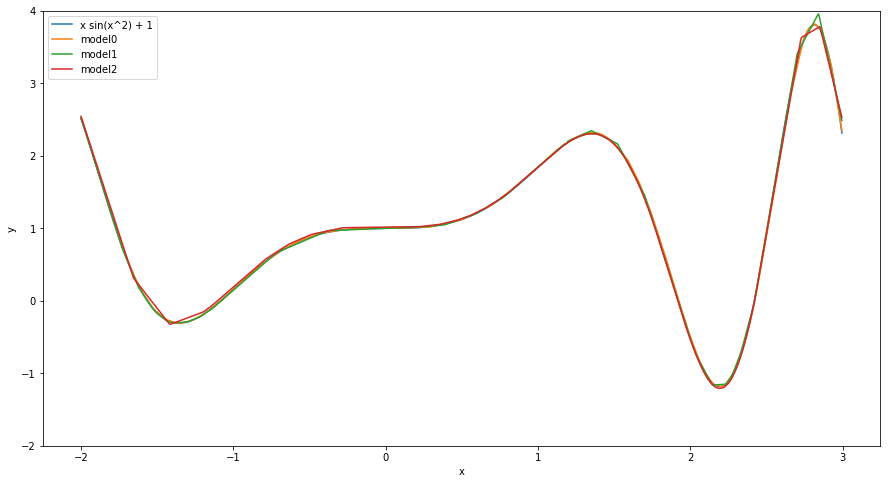

In [92]:
plt.figure(figsize=(15, 8))
plt.plot(source, target, label="x sin(x^2) + 1")
for i in range(3):
    plt.plot(source, predictions[i], label="model"+str(i))
plt.xlabel('x')
plt.ylabel('y')
plt.ylim((-2, 4))
plt.legend(loc='best')
plt.show()

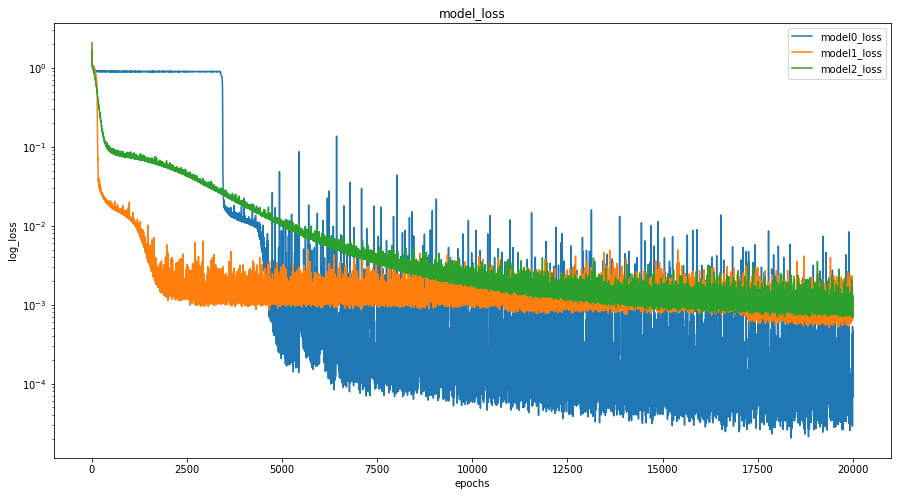

In [93]:
plt.figure(figsize=(15, 8))
for i in range(3):
    plt.semilogy(np.arange(0, nm_epochs), loss_summary[i], label="model"+str(i)+"_loss")
plt.xlabel('epochs')
plt.ylabel('log_loss')
plt.title('model_loss')
plt.legend(loc='best')
plt.show()